In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier, XGBRFRegressor, plot_importance
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
%matplotlib inline


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
alldata = pd.read_csv('alldata.csv', index_col = False)
drop = []
for i, each in enumerate(alldata['sshs(t=0)']):
    if each == -3:
        drop.append(i)
alldatapositive = alldata.drop(drop, axis = 0)


In [4]:
train, test = train_test_split(alldatapositive, random_state = 3, test_size=0.2)
# seperate the independent and target variable on training data
train_x = train.drop(columns=['month','freq(t=0)', 'sshs(t=0)'],axis=1).reset_index(drop = True)
train_y = train['sshs(t=0)'].reset_index(drop = True)
 
# seperate the independent and target variable on testing data
test_x = test.drop(columns=['month','freq(t=0)', 'sshs(t=0)'],axis=1).reset_index(drop = True)
test_y = test['sshs(t=0)'].reset_index(drop = True)


In [4]:
model = XGBClassifier(tree_method='gpu_hist', gpu_id=0, max_depth=6, n_estimators=150, subsample = 0.5)

In [5]:
model.fit(train_x, train_y, early_stopping_rounds=20, eval_set=[(test_x, test_y)], verbose=True)

[0]	validation_0-merror:0.846154
Will train until validation_0-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.769231
[2]	validation_0-merror:0.769231
[3]	validation_0-merror:0.653846
[4]	validation_0-merror:0.692308
[5]	validation_0-merror:0.692308
[6]	validation_0-merror:0.653846
[7]	validation_0-merror:0.538462
[8]	validation_0-merror:0.576923
[9]	validation_0-merror:0.615385
[10]	validation_0-merror:0.615385
[11]	validation_0-merror:0.615385
[12]	validation_0-merror:0.615385
[13]	validation_0-merror:0.538462
[14]	validation_0-merror:0.576923
[15]	validation_0-merror:0.576923
[16]	validation_0-merror:0.615385
[17]	validation_0-merror:0.576923
[18]	validation_0-merror:0.5
[19]	validation_0-merror:0.538462
[20]	validation_0-merror:0.5
[21]	validation_0-merror:0.5
[22]	validation_0-merror:0.5
[23]	validation_0-merror:0.538462
[24]	validation_0-merror:0.538462
[25]	validation_0-merror:0.576923
[26]	validation_0-merror:0.576923
[27]	validation_0-merror:0.615385
[28]	valida

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, tree_method='gpu_hist', verbosity=1)

In [3]:
del model

NameError: name 'model' is not defined

In [3]:
model = pickle.load(open('75model.pkl', 'rb'))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [8]:
vars(model)['_le']

LabelEncoder()

In [4]:
train, test = train_test_split(alldata, test_size=0.2)
# seperate the independent and target variable on training data
train_x = train.drop(columns=['month','freq(t=0)', 'sshs(t=0)'],axis=1).reset_index(drop = True)
train_y = train['sshs(t=0)'].reset_index(drop = True)
 
# seperate the independent and target variable on testing data
test_x = test.drop(columns=['month','freq(t=0)', 'sshs(t=0)'],axis=1).reset_index(drop = True)
test_y = test['sshs(t=0)'].reset_index(drop = True)



In [5]:
predictions = model.predict(alldata.drop(columns=['month','freq(t=0)', 'sshs(t=0)'],axis=1).reset_index(drop = True))
accuracy = accuracy_score(alldata['sshs(t=0)'], predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.14%


In [1]:
del model

NameError: name 'model' is not defined

In [8]:
model.predict([1, 2])

ValueError: feature_names mismatch: ['sst(t=-1)0.0N262.0E', 'sst(t=-1)0.0N264.0E', 'sst(t=-1)0.0N266.0E', 'sst(t=-1)0.0N268.0E', 'sst(t=-1)0.0N270.0E', 'sst(t=-1)0.0N272.0E', 'sst(t=-1)0.0N274.0E', 'sst(t=-1)0.0N276.0E', 'sst(t=-1)0.0N278.0E', 'sst(t=-1)0.0N280.0E', 'sst(t=-1)0.0N312.0E', 'sst(t=-1)0.0N314.0E', 'sst(t=-1)0.0N316.0E', 'sst(t=-1)0.0N318.0E', 'sst(t=-1)0.0N320.0E', 'sst(t=-1)0.0N322.0E', 'sst(t=-1)0.0N324.0E', 'sst(t=-1)0.0N326.0E', 'sst(t=-1)0.0N328.0E', 'sst(t=-1)0.0N330.0E', 'sst(t=-1)0.0N332.0E', 'sst(t=-1)0.0N334.0E', 'sst(t=-1)0.0N336.0E', 'sst(t=-1)0.0N338.0E', 'sst(t=-1)0.0N340.0E', 'sst(t=-1)0.0N342.0E', 'sst(t=-1)0.0N344.0E', 'sst(t=-1)0.0N346.0E', 'sst(t=-1)0.0N348.0E', 'sst(t=-1)0.0N350.0E', 'sst(t=-1)0.0N352.0E', 'sst(t=-1)0.0N354.0E', 'sst(t=-1)0.0N356.0E', 'sst(t=-1)0.0N358.0E', 'sst(t=-1)0.0N0.0E', 'sst(t=-1)0.0N2.0E', 'sst(t=-1)0.0N4.0E', 'sst(t=-1)0.0N6.0E', 'sst(t=-1)0.0N8.0E', 'sst(t=-1)0.0N10.0E', 'sst(t=-1)2.0N262.0E', 'sst(t=-1)2.0N264.0E', 'sst(t=-1)2.0N266.0E', 'sst(t=-1)2.0N268.0E', 'sst(t=-1)2.0N270.0E', 'sst(t=-1)2.0N272.0E', 'sst(t=-1)2.0N274.0E', 'sst(t=-1)2.0N276.0E', 'sst(t=-1)2.0N278.0E', 'sst(t=-1)2.0N280.0E', 'sst(t=-1)2.0N312.0E', 'sst(t=-1)2.0N314.0E', 'sst(t=-1)2.0N316.0E', 'sst(t=-1)2.0N318.0E', 'sst(t=-1)2.0N320.0E', 'sst(t=-1)2.0N322.0E', 'sst(t=-1)2.0N324.0E', 'sst(t=-1)2.0N326.0E', 'sst(t=-1)2.0N328.0E', 'sst(t=-1)2.0N330.0E', 'sst(t=-1)2.0N332.0E', 'sst(t=-1)2.0N334.0E', 'sst(t=-1)2.0N336.0E', 'sst(t=-1)2.0N338.0E', 'sst(t=-1)2.0N340.0E', 'sst(t=-1)2.0N342.0E', 'sst(t=-1)2.0N344.0E', 'sst(t=-1)2.0N346.0E', 'sst(t=-1)2.0N348.0E', 'sst(t=-1)2.0N350.0E', 'sst(t=-1)2.0N352.0E', 'sst(t=-1)2.0N354.0E', 'sst(t=-1)2.0N356.0E', 'sst(t=-1)2.0N358.0E', 'sst(t=-1)2.0N0.0E', 'sst(t=-1)2.0N2.0E', 'sst(t=-1)2.0N4.0E', 'sst(t=-1)2.0N6.0E', 'sst(t=-1)2.0N8.0E', 'sst(t=-1)2.0N10.0E', 'sst(t=-1)4.0N262.0E', 'sst(t=-1)4.0N264.0E', 'sst(t=-1)4.0N266.0E', 'sst(t=-1)4.0N268.0E', 'sst(t=-1)4.0N270.0E', 'sst(t=-1)4.0N272.0E', 'sst(t=-1)4.0N274.0E', 'sst(t=-1)4.0N276.0E', 'sst(t=-1)4.0N278.0E', 'sst(t=-1)4.0N280.0E', 'sst(t=-1)4.0N282.0E', 'sst(t=-1)4.0N310.0E', 'sst(t=-1)4.0N312.0E', 'sst(t=-1)4.0N314.0E', 'sst(t=-1)4.0N316.0E', 'sst(t=-1)4.0N318.0E', 'sst(t=-1)4.0N320.0E', 'sst(t=-1)4.0N322.0E', 'sst(t=-1)4.0N324.0E', 'sst(t=-1)4.0N326.0E', 'sst(t=-1)4.0N328.0E', 'sst(t=-1)4.0N330.0E', 'sst(t=-1)4.0N332.0E', 'sst(t=-1)4.0N334.0E', 'sst(t=-1)4.0N336.0E', 'sst(t=-1)4.0N338.0E', 'sst(t=-1)4.0N340.0E', 'sst(t=-1)4.0N342.0E', 'sst(t=-1)4.0N344.0E', 'sst(t=-1)4.0N346.0E', 'sst(t=-1)4.0N348.0E', 'sst(t=-1)4.0N350.0E', 'sst(t=-1)4.0N352.0E', 'sst(t=-1)4.0N354.0E', 'sst(t=-1)4.0N356.0E', 'sst(t=-1)4.0N358.0E', 'sst(t=-1)4.0N0.0E', 'sst(t=-1)4.0N2.0E', 'sst(t=-1)4.0N4.0E', 'sst(t=-1)4.0N6.0E', 'sst(t=-1)4.0N8.0E', 'sst(t=-1)4.0N10.0E', 'sst(t=-1)6.0N262.0E', 'sst(t=-1)6.0N264.0E', 'sst(t=-1)6.0N266.0E', 'sst(t=-1)6.0N268.0E', 'sst(t=-1)6.0N270.0E', 'sst(t=-1)6.0N272.0E', 'sst(t=-1)6.0N274.0E', 'sst(t=-1)6.0N276.0E', 'sst(t=-1)6.0N278.0E', 'sst(t=-1)6.0N280.0E', 'sst(t=-1)6.0N282.0E', 'sst(t=-1)6.0N308.0E', 'sst(t=-1)6.0N310.0E', 'sst(t=-1)6.0N312.0E', 'sst(t=-1)6.0N314.0E', 'sst(t=-1)6.0N316.0E', 'sst(t=-1)6.0N318.0E', 'sst(t=-1)6.0N320.0E', 'sst(t=-1)6.0N322.0E', 'sst(t=-1)6.0N324.0E', 'sst(t=-1)6.0N326.0E', 'sst(t=-1)6.0N328.0E', 'sst(t=-1)6.0N330.0E', 'sst(t=-1)6.0N332.0E', 'sst(t=-1)6.0N334.0E', 'sst(t=-1)6.0N336.0E', 'sst(t=-1)6.0N338.0E', 'sst(t=-1)6.0N340.0E', 'sst(t=-1)6.0N342.0E', 'sst(t=-1)6.0N344.0E', 'sst(t=-1)6.0N346.0E', 'sst(t=-1)6.0N348.0E', 'sst(t=-1)6.0N350.0E', 'sst(t=-1)6.0N0.0E', 'sst(t=-1)6.0N2.0E', 'sst(t=-1)6.0N4.0E', 'sst(t=-1)6.0N6.0E', 'sst(t=-1)8.0N262.0E', 'sst(t=-1)8.0N264.0E', 'sst(t=-1)8.0N266.0E', 'sst(t=-1)8.0N268.0E', 'sst(t=-1)8.0N270.0E', 'sst(t=-1)8.0N272.0E', 'sst(t=-1)8.0N274.0E', 'sst(t=-1)8.0N276.0E', 'sst(t=-1)8.0N278.0E', 'sst(t=-1)8.0N280.0E', 'sst(t=-1)8.0N282.0E', 'sst(t=-1)8.0N302.0E', 'sst(t=-1)8.0N304.0E', 'sst(t=-1)8.0N306.0E', 'sst(t=-1)8.0N308.0E', 'sst(t=-1)8.0N310.0E', 'sst(t=-1)8.0N312.0E', 'sst(t=-1)8.0N314.0E', 'sst(t=-1)8.0N316.0E', 'sst(t=-1)8.0N318.0E', 'sst(t=-1)8.0N320.0E', 'sst(t=-1)8.0N322.0E', 'sst(t=-1)8.0N324.0E', 'sst(t=-1)8.0N326.0E', 'sst(t=-1)8.0N328.0E', 'sst(t=-1)8.0N330.0E', 'sst(t=-1)8.0N332.0E', 'sst(t=-1)8.0N334.0E', 'sst(t=-1)8.0N336.0E', 'sst(t=-1)8.0N338.0E', 'sst(t=-1)8.0N340.0E', 'sst(t=-1)8.0N342.0E', 'sst(t=-1)8.0N344.0E', 'sst(t=-1)8.0N346.0E', 'sst(t=-1)8.0N348.0E', 'sst(t=-1)10.0N262.0E', 'sst(t=-1)10.0N264.0E', 'sst(t=-1)10.0N266.0E', 'sst(t=-1)10.0N268.0E', 'sst(t=-1)10.0N270.0E', 'sst(t=-1)10.0N272.0E', 'sst(t=-1)10.0N274.0E', 'sst(t=-1)10.0N276.0E', 'sst(t=-1)10.0N278.0E', 'sst(t=-1)10.0N280.0E', 'sst(t=-1)10.0N282.0E', 'sst(t=-1)10.0N284.0E', 'sst(t=-1)10.0N300.0E', 'sst(t=-1)10.0N302.0E', 'sst(t=-1)10.0N304.0E', 'sst(t=-1)10.0N306.0E', 'sst(t=-1)10.0N308.0E', 'sst(t=-1)10.0N310.0E', 'sst(t=-1)10.0N312.0E', 'sst(t=-1)10.0N314.0E', 'sst(t=-1)10.0N316.0E', 'sst(t=-1)10.0N318.0E', 'sst(t=-1)10.0N320.0E', 'sst(t=-1)10.0N322.0E', 'sst(t=-1)10.0N324.0E', 'sst(t=-1)10.0N326.0E', 'sst(t=-1)10.0N328.0E', 'sst(t=-1)10.0N330.0E', 'sst(t=-1)10.0N332.0E', 'sst(t=-1)10.0N334.0E', 'sst(t=-1)10.0N336.0E', 'sst(t=-1)10.0N338.0E', 'sst(t=-1)10.0N340.0E', 'sst(t=-1)10.0N342.0E', 'sst(t=-1)10.0N344.0E', 'sst(t=-1)10.0N346.0E', 'sst(t=-1)12.0N262.0E', 'sst(t=-1)12.0N264.0E', 'sst(t=-1)12.0N266.0E', 'sst(t=-1)12.0N268.0E', 'sst(t=-1)12.0N270.0E', 'sst(t=-1)12.0N272.0E', 'sst(t=-1)12.0N274.0E', 'sst(t=-1)12.0N278.0E', 'sst(t=-1)12.0N280.0E', 'sst(t=-1)12.0N282.0E', 'sst(t=-1)12.0N284.0E', 'sst(t=-1)12.0N286.0E', 'sst(t=-1)12.0N290.0E', 'sst(t=-1)12.0N292.0E', 'sst(t=-1)12.0N294.0E', 'sst(t=-1)12.0N296.0E', 'sst(t=-1)12.0N298.0E', 'sst(t=-1)12.0N300.0E', 'sst(t=-1)12.0N302.0E', 'sst(t=-1)12.0N304.0E', 'sst(t=-1)12.0N306.0E', 'sst(t=-1)12.0N308.0E', 'sst(t=-1)12.0N310.0E', 'sst(t=-1)12.0N312.0E', 'sst(t=-1)12.0N314.0E', 'sst(t=-1)12.0N316.0E', 'sst(t=-1)12.0N318.0E', 'sst(t=-1)12.0N320.0E', 'sst(t=-1)12.0N322.0E', 'sst(t=-1)12.0N324.0E', 'sst(t=-1)12.0N326.0E', 'sst(t=-1)12.0N328.0E', 'sst(t=-1)12.0N330.0E', 'sst(t=-1)12.0N332.0E', 'sst(t=-1)12.0N334.0E', 'sst(t=-1)12.0N336.0E', 'sst(t=-1)12.0N338.0E', 'sst(t=-1)12.0N340.0E', 'sst(t=-1)12.0N342.0E', 'sst(t=-1)12.0N344.0E', 'sst(t=-1)14.0N262.0E', 'sst(t=-1)14.0N264.0E', 'sst(t=-1)14.0N266.0E', 'sst(t=-1)14.0N268.0E', 'sst(t=-1)14.0N270.0E', 'sst(t=-1)14.0N272.0E', 'sst(t=-1)14.0N278.0E', 'sst(t=-1)14.0N280.0E', 'sst(t=-1)14.0N282.0E', 'sst(t=-1)14.0N284.0E', 'sst(t=-1)14.0N286.0E', 'sst(t=-1)14.0N288.0E', 'sst(t=-1)14.0N290.0E', 'sst(t=-1)14.0N292.0E', 'sst(t=-1)14.0N294.0E', 'sst(t=-1)14.0N296.0E', 'sst(t=-1)14.0N298.0E', 'sst(t=-1)14.0N300.0E', 'sst(t=-1)14.0N302.0E', 'sst(t=-1)14.0N304.0E', 'sst(t=-1)14.0N306.0E', 'sst(t=-1)14.0N308.0E', 'sst(t=-1)14.0N310.0E', 'sst(t=-1)14.0N312.0E', 'sst(t=-1)14.0N314.0E', 'sst(t=-1)14.0N316.0E', 'sst(t=-1)14.0N318.0E', 'sst(t=-1)14.0N320.0E', 'sst(t=-1)14.0N322.0E', 'sst(t=-1)14.0N324.0E', 'sst(t=-1)14.0N326.0E', 'sst(t=-1)14.0N328.0E', 'sst(t=-1)14.0N330.0E', 'sst(t=-1)14.0N332.0E', 'sst(t=-1)14.0N334.0E', 'sst(t=-1)14.0N336.0E', 'sst(t=-1)14.0N338.0E', 'sst(t=-1)14.0N340.0E', 'sst(t=-1)14.0N342.0E', 'sst(t=-1)14.0N344.0E', 'sst(t=-1)16.0N262.0E', 'sst(t=-1)16.0N264.0E', 'sst(t=-1)16.0N266.0E', 'sst(t=-1)16.0N278.0E', 'sst(t=-1)16.0N280.0E', 'sst(t=-1)16.0N282.0E', 'sst(t=-1)16.0N284.0E', 'sst(t=-1)16.0N286.0E', 'sst(t=-1)16.0N288.0E', 'sst(t=-1)16.0N290.0E', 'sst(t=-1)16.0N292.0E', 'sst(t=-1)16.0N294.0E', 'sst(t=-1)16.0N296.0E', 'sst(t=-1)16.0N298.0E', 'sst(t=-1)16.0N300.0E', 'sst(t=-1)16.0N302.0E', 'sst(t=-1)16.0N304.0E', 'sst(t=-1)16.0N306.0E', 'sst(t=-1)16.0N308.0E', 'sst(t=-1)16.0N310.0E', 'sst(t=-1)16.0N312.0E', 'sst(t=-1)16.0N314.0E', 'sst(t=-1)16.0N316.0E', 'sst(t=-1)16.0N318.0E', 'sst(t=-1)16.0N320.0E', 'sst(t=-1)16.0N322.0E', 'sst(t=-1)16.0N324.0E', 'sst(t=-1)16.0N326.0E', 'sst(t=-1)16.0N328.0E', 'sst(t=-1)16.0N330.0E', 'sst(t=-1)16.0N332.0E', 'sst(t=-1)16.0N334.0E', 'sst(t=-1)16.0N336.0E', 'sst(t=-1)16.0N338.0E', 'sst(t=-1)16.0N340.0E', 'sst(t=-1)16.0N342.0E', 'sst(t=-1)16.0N344.0E', 'sst(t=-1)18.0N272.0E', 'sst(t=-1)18.0N274.0E', 'sst(t=-1)18.0N276.0E', 'sst(t=-1)18.0N278.0E', 'sst(t=-1)18.0N280.0E', 'sst(t=-1)18.0N282.0E', 'sst(t=-1)18.0N284.0E', 'sst(t=-1)18.0N286.0E', 'sst(t=-1)18.0N288.0E', 'sst(t=-1)18.0N290.0E', 'sst(t=-1)18.0N292.0E', 'sst(t=-1)18.0N294.0E', 'sst(t=-1)18.0N296.0E', 'sst(t=-1)18.0N298.0E', 'sst(t=-1)18.0N300.0E', 'sst(t=-1)18.0N302.0E', 'sst(t=-1)18.0N304.0E', 'sst(t=-1)18.0N306.0E', 'sst(t=-1)18.0N308.0E', 'sst(t=-1)18.0N310.0E', 'sst(t=-1)18.0N312.0E', 'sst(t=-1)18.0N314.0E', 'sst(t=-1)18.0N316.0E', 'sst(t=-1)18.0N318.0E', 'sst(t=-1)18.0N320.0E', 'sst(t=-1)18.0N322.0E', 'sst(t=-1)18.0N324.0E', 'sst(t=-1)18.0N326.0E', 'sst(t=-1)18.0N328.0E', 'sst(t=-1)18.0N330.0E', 'sst(t=-1)18.0N332.0E', 'sst(t=-1)18.0N334.0E', 'sst(t=-1)18.0N336.0E', 'sst(t=-1)18.0N338.0E', 'sst(t=-1)18.0N340.0E', 'sst(t=-1)18.0N342.0E', 'sst(t=-1)18.0N344.0E', 'sst(t=-1)20.0N264.0E', 'sst(t=-1)20.0N266.0E', 'sst(t=-1)20.0N268.0E', 'sst(t=-1)20.0N270.0E', 'sst(t=-1)20.0N274.0E', 'sst(t=-1)20.0N276.0E', 'sst(t=-1)20.0N278.0E', 'sst(t=-1)20.0N280.0E', 'sst(t=-1)20.0N282.0E', 'sst(t=-1)20.0N284.0E', 'sst(t=-1)20.0N286.0E', 'sst(t=-1)20.0N288.0E', 'sst(t=-1)20.0N290.0E', 'sst(t=-1)20.0N292.0E', 'sst(t=-1)20.0N294.0E', 'sst(t=-1)20.0N296.0E', 'sst(t=-1)20.0N298.0E', 'sst(t=-1)20.0N300.0E', 'sst(t=-1)20.0N302.0E', 'sst(t=-1)20.0N304.0E', 'sst(t=-1)20.0N306.0E', 'sst(t=-1)20.0N308.0E', 'sst(t=-1)20.0N310.0E', 'sst(t=-1)20.0N312.0E', 'sst(t=-1)20.0N314.0E', 'sst(t=-1)20.0N316.0E', 'sst(t=-1)20.0N318.0E', 'sst(t=-1)20.0N320.0E', 'sst(t=-1)20.0N322.0E', 'sst(t=-1)20.0N324.0E', 'sst(t=-1)20.0N326.0E', 'sst(t=-1)20.0N328.0E', 'sst(t=-1)20.0N330.0E', 'sst(t=-1)20.0N332.0E', 'sst(t=-1)20.0N334.0E', 'sst(t=-1)20.0N336.0E', 'sst(t=-1)20.0N338.0E', 'sst(t=-1)20.0N340.0E', 'sst(t=-1)20.0N342.0E', 'sst(t=-1)20.0N344.0E', 'sst(t=-1)22.0N264.0E', 'sst(t=-1)22.0N266.0E', 'sst(t=-1)22.0N268.0E', 'sst(t=-1)22.0N270.0E', 'sst(t=-1)22.0N272.0E', 'sst(t=-1)22.0N274.0E', 'sst(t=-1)22.0N276.0E', 'sst(t=-1)22.0N278.0E', 'sst(t=-1)22.0N280.0E', 'sst(t=-1)22.0N282.0E', 'sst(t=-1)22.0N284.0E', 'sst(t=-1)22.0N286.0E', 'sst(t=-1)22.0N288.0E', 'sst(t=-1)22.0N290.0E', 'sst(t=-1)22.0N292.0E', 'sst(t=-1)22.0N294.0E', 'sst(t=-1)22.0N296.0E', 'sst(t=-1)22.0N298.0E', 'sst(t=-1)22.0N300.0E', 'sst(t=-1)22.0N302.0E', 'sst(t=-1)22.0N304.0E', 'sst(t=-1)22.0N306.0E', 'sst(t=-1)22.0N308.0E', 'sst(t=-1)22.0N310.0E', 'sst(t=-1)22.0N312.0E', 'sst(t=-1)22.0N314.0E', 'sst(t=-1)22.0N316.0E', 'sst(t=-1)22.0N318.0E', 'sst(t=-1)22.0N320.0E', 'sst(t=-1)22.0N322.0E', 'sst(t=-1)22.0N324.0E', 'sst(t=-1)22.0N326.0E', 'sst(t=-1)22.0N328.0E', 'sst(t=-1)22.0N330.0E', 'sst(t=-1)22.0N332.0E', 'sst(t=-1)22.0N334.0E', 'sst(t=-1)22.0N336.0E', 'sst(t=-1)22.0N338.0E', 'sst(t=-1)22.0N340.0E', 'sst(t=-1)22.0N342.0E', 'sst(t=-1)24.0N264.0E', 'sst(t=-1)24.0N266.0E', 'sst(t=-1)24.0N268.0E', 'sst(t=-1)24.0N270.0E', 'sst(t=-1)24.0N272.0E', 'sst(t=-1)24.0N274.0E', 'sst(t=-1)24.0N276.0E', 'sst(t=-1)24.0N278.0E', 'sst(t=-1)24.0N280.0E', 'sst(t=-1)24.0N282.0E', 'sst(t=-1)24.0N284.0E', 'sst(t=-1)24.0N286.0E', 'sst(t=-1)24.0N288.0E', 'sst(t=-1)24.0N290.0E', 'sst(t=-1)24.0N292.0E', 'sst(t=-1)24.0N294.0E', 'sst(t=-1)24.0N296.0E', 'sst(t=-1)24.0N298.0E', 'sst(t=-1)24.0N300.0E', 'sst(t=-1)24.0N302.0E', 'sst(t=-1)24.0N304.0E', 'sst(t=-1)24.0N306.0E', 'sst(t=-1)24.0N308.0E', 'sst(t=-1)24.0N310.0E', 'sst(t=-1)24.0N312.0E', 'sst(t=-1)24.0N314.0E', 'sst(t=-1)24.0N316.0E', 'sst(t=-1)24.0N318.0E', 'sst(t=-1)24.0N320.0E', 'sst(t=-1)24.0N322.0E', 'sst(t=-1)24.0N324.0E', 'sst(t=-1)24.0N326.0E', 'sst(t=-1)24.0N328.0E', 'sst(t=-1)24.0N330.0E', 'sst(t=-1)24.0N332.0E', 'sst(t=-1)24.0N334.0E', 'sst(t=-1)24.0N336.0E', 'sst(t=-1)24.0N338.0E', 'sst(t=-1)24.0N340.0E', 'sst(t=-1)24.0N342.0E', 'sst(t=-1)24.0N344.0E', 'sst(t=-1)26.0N264.0E', 'sst(t=-1)26.0N266.0E', 'sst(t=-1)26.0N268.0E', 'sst(t=-1)26.0N270.0E', 'sst(t=-1)26.0N272.0E', 'sst(t=-1)26.0N274.0E', 'sst(t=-1)26.0N276.0E', 'sst(t=-1)26.0N278.0E', 'sst(t=-1)26.0N280.0E', 'sst(t=-1)26.0N282.0E', 'sst(t=-1)26.0N284.0E', 'sst(t=-1)26.0N286.0E', 'sst(t=-1)26.0N288.0E', 'sst(t=-1)26.0N290.0E', 'sst(t=-1)26.0N292.0E', 'sst(t=-1)26.0N294.0E', 'sst(t=-1)26.0N296.0E', 'sst(t=-1)26.0N298.0E', 'sst(t=-1)26.0N300.0E', 'sst(t=-1)26.0N302.0E', 'sst(t=-1)26.0N304.0E', 'sst(t=-1)26.0N306.0E', 'sst(t=-1)26.0N308.0E', 'sst(t=-1)26.0N310.0E', 'sst(t=-1)26.0N312.0E', 'sst(t=-1)26.0N314.0E', 'sst(t=-1)26.0N316.0E', 'sst(t=-1)26.0N318.0E', 'sst(t=-1)26.0N320.0E', 'sst(t=-1)26.0N322.0E', 'sst(t=-1)26.0N324.0E', 'sst(t=-1)26.0N326.0E', 'sst(t=-1)26.0N328.0E', 'sst(t=-1)26.0N330.0E', 'sst(t=-1)26.0N332.0E', 'sst(t=-1)26.0N334.0E', 'sst(t=-1)26.0N336.0E', 'sst(t=-1)26.0N338.0E', 'sst(t=-1)26.0N340.0E', 'sst(t=-1)26.0N342.0E', 'sst(t=-1)26.0N344.0E', 'sst(t=-1)26.0N346.0E', 'sst(t=-1)28.0N264.0E', 'sst(t=-1)28.0N266.0E', 'sst(t=-1)28.0N268.0E', 'sst(t=-1)28.0N270.0E', 'sst(t=-1)28.0N272.0E', 'sst(t=-1)28.0N274.0E', 'sst(t=-1)28.0N276.0E', 'sst(t=-1)28.0N278.0E', 'sst(t=-1)28.0N280.0E', 'sst(t=-1)28.0N282.0E', 'sst(t=-1)28.0N284.0E', 'sst(t=-1)28.0N286.0E', 'sst(t=-1)28.0N288.0E', 'sst(t=-1)28.0N290.0E', 'sst(t=-1)28.0N292.0E', 'sst(t=-1)28.0N294.0E', 'sst(t=-1)28.0N296.0E', 'sst(t=-1)28.0N298.0E', 'sst(t=-1)28.0N300.0E', 'sst(t=-1)28.0N302.0E', 'sst(t=-1)28.0N304.0E', 'sst(t=-1)28.0N306.0E', 'sst(t=-1)28.0N308.0E', 'sst(t=-1)28.0N310.0E', 'sst(t=-1)28.0N312.0E', 'sst(t=-1)28.0N314.0E', 'sst(t=-1)28.0N316.0E', 'sst(t=-1)28.0N318.0E', 'sst(t=-1)28.0N320.0E', 'sst(t=-1)28.0N322.0E', 'sst(t=-1)28.0N324.0E', 'sst(t=-1)28.0N326.0E', 'sst(t=-1)28.0N328.0E', 'sst(t=-1)28.0N330.0E', 'sst(t=-1)28.0N332.0E', 'sst(t=-1)28.0N334.0E', 'sst(t=-1)28.0N336.0E', 'sst(t=-1)28.0N338.0E', 'sst(t=-1)28.0N340.0E', 'sst(t=-1)28.0N342.0E', 'sst(t=-1)28.0N344.0E', 'sst(t=-1)28.0N346.0E', 'sst(t=-1)30.0N266.0E', 'sst(t=-1)30.0N268.0E', 'sst(t=-1)30.0N270.0E', 'sst(t=-1)30.0N272.0E', 'sst(t=-1)30.0N274.0E', 'sst(t=-1)30.0N276.0E', 'sst(t=-1)30.0N280.0E', 'sst(t=-1)30.0N282.0E', 'sst(t=-1)30.0N284.0E', 'sst(t=-1)30.0N286.0E', 'sst(t=-1)30.0N288.0E', 'sst(t=-1)30.0N290.0E', 'sst(t=-1)30.0N292.0E', 'sst(t=-1)30.0N294.0E', 'sst(t=-1)30.0N296.0E', 'sst(t=-1)30.0N298.0E', 'sst(t=-1)30.0N300.0E', 'sst(t=-1)30.0N302.0E', 'sst(t=-1)30.0N304.0E', 'sst(t=-1)30.0N306.0E', 'sst(t=-1)30.0N308.0E', 'sst(t=-1)30.0N310.0E', 'sst(t=-1)30.0N312.0E', 'sst(t=-1)30.0N314.0E', 'sst(t=-1)30.0N316.0E', 'sst(t=-1)30.0N318.0E', 'sst(t=-1)30.0N320.0E', 'sst(t=-1)30.0N322.0E', 'sst(t=-1)30.0N324.0E', 'sst(t=-1)30.0N326.0E', 'sst(t=-1)30.0N328.0E', 'sst(t=-1)30.0N330.0E', 'sst(t=-1)30.0N332.0E', 'sst(t=-1)30.0N334.0E', 'sst(t=-1)30.0N336.0E', 'sst(t=-1)30.0N338.0E', 'sst(t=-1)30.0N340.0E', 'sst(t=-1)30.0N342.0E', 'sst(t=-1)30.0N344.0E', 'sst(t=-1)30.0N346.0E', 'sst(t=-1)30.0N348.0E', 'sst(t=-1)30.0N350.0E', 'sst(t=-1)32.0N280.0E', 'sst(t=-1)32.0N282.0E', 'sst(t=-1)32.0N284.0E', 'sst(t=-1)32.0N286.0E', 'sst(t=-1)32.0N288.0E', 'sst(t=-1)32.0N290.0E', 'sst(t=-1)32.0N292.0E', 'sst(t=-1)32.0N294.0E', 'sst(t=-1)32.0N296.0E', 'sst(t=-1)32.0N298.0E', 'sst(t=-1)32.0N300.0E', 'sst(t=-1)32.0N302.0E', 'sst(t=-1)32.0N304.0E', 'sst(t=-1)32.0N306.0E', 'sst(t=-1)32.0N308.0E', 'sst(t=-1)32.0N310.0E', 'sst(t=-1)32.0N312.0E', 'sst(t=-1)32.0N314.0E', 'sst(t=-1)32.0N316.0E', 'sst(t=-1)32.0N318.0E', 'sst(t=-1)32.0N320.0E', 'sst(t=-1)32.0N322.0E', 'sst(t=-1)32.0N324.0E', 'sst(t=-1)32.0N326.0E', 'sst(t=-1)32.0N328.0E', 'sst(t=-1)32.0N330.0E', 'sst(t=-1)32.0N332.0E', 'sst(t=-1)32.0N334.0E', 'sst(t=-1)32.0N336.0E', 'sst(t=-1)32.0N338.0E', 'sst(t=-1)32.0N340.0E', 'sst(t=-1)32.0N342.0E', 'sst(t=-1)32.0N344.0E', 'sst(t=-1)32.0N346.0E', 'sst(t=-1)32.0N348.0E', 'sst(t=-1)32.0N350.0E', 'sst(t=-1)34.0N282.0E', 'sst(t=-1)34.0N284.0E', 'sst(t=-1)34.0N286.0E', 'sst(t=-1)34.0N288.0E', 'sst(t=-1)34.0N290.0E', 'sst(t=-1)34.0N292.0E', 'sst(t=-1)34.0N294.0E', 'sst(t=-1)34.0N296.0E', 'sst(t=-1)34.0N298.0E', 'sst(t=-1)34.0N300.0E', 'sst(t=-1)34.0N302.0E', 'sst(t=-1)34.0N304.0E', 'sst(t=-1)34.0N306.0E', 'sst(t=-1)34.0N308.0E', 'sst(t=-1)34.0N310.0E', 'sst(t=-1)34.0N312.0E', 'sst(t=-1)34.0N314.0E', 'sst(t=-1)34.0N316.0E', 'sst(t=-1)34.0N318.0E', 'sst(t=-1)34.0N320.0E', 'sst(t=-1)34.0N322.0E', 'sst(t=-1)34.0N324.0E', 'sst(t=-1)34.0N326.0E', 'sst(t=-1)34.0N328.0E', 'sst(t=-1)34.0N330.0E', 'sst(t=-1)34.0N332.0E', 'sst(t=-1)34.0N334.0E', 'sst(t=-1)34.0N336.0E', 'sst(t=-1)34.0N338.0E', 'sst(t=-1)34.0N340.0E', 'sst(t=-1)34.0N342.0E', 'sst(t=-1)34.0N344.0E', 'sst(t=-1)34.0N346.0E', 'sst(t=-1)34.0N348.0E', 'sst(t=-1)34.0N350.0E', 'sst(t=-1)34.0N352.0E', 'sst(t=-1)34.0N12.0E', 'sst(t=-1)34.0N14.0E', 'sst(t=-1)36.0N284.0E', 'sst(t=-1)36.0N286.0E', 'sst(t=-1)36.0N288.0E', 'sst(t=-1)36.0N290.0E', 'sst(t=-1)36.0N292.0E', 'sst(t=-1)36.0N294.0E', 'sst(t=-1)36.0N296.0E', 'sst(t=-1)36.0N298.0E', 'sst(t=-1)36.0N300.0E', 'sst(t=-1)36.0N302.0E', 'sst(t=-1)36.0N304.0E', 'sst(t=-1)36.0N306.0E', 'sst(t=-1)36.0N308.0E', 'sst(t=-1)36.0N310.0E', 'sst(t=-1)36.0N312.0E', 'sst(t=-1)36.0N314.0E', 'sst(t=-1)36.0N316.0E', 'sst(t=-1)36.0N318.0E', 'sst(t=-1)36.0N320.0E', 'sst(t=-1)36.0N322.0E', 'sst(t=-1)36.0N324.0E', 'sst(t=-1)36.0N326.0E', 'sst(t=-1)36.0N328.0E', 'sst(t=-1)36.0N330.0E', 'sst(t=-1)36.0N332.0E', 'sst(t=-1)36.0N334.0E', 'sst(t=-1)36.0N336.0E', 'sst(t=-1)36.0N338.0E', 'sst(t=-1)36.0N340.0E', 'sst(t=-1)36.0N342.0E', 'sst(t=-1)36.0N344.0E', 'sst(t=-1)36.0N346.0E', 'sst(t=-1)36.0N348.0E', 'sst(t=-1)36.0N350.0E', 'sst(t=-1)36.0N352.0E', 'sst(t=-1)36.0N354.0E', 'sst(t=-1)36.0N356.0E', 'sst(t=-1)36.0N358.0E', 'sst(t=-1)36.0N12.0E', 'sst(t=-1)36.0N14.0E', 'sst(t=-1)38.0N284.0E', 'sst(t=-1)38.0N286.0E', 'sst(t=-1)38.0N288.0E', 'sst(t=-1)38.0N290.0E', 'sst(t=-1)38.0N292.0E', 'sst(t=-1)38.0N294.0E', 'sst(t=-1)38.0N296.0E', 'sst(t=-1)38.0N298.0E', 'sst(t=-1)38.0N300.0E', 'sst(t=-1)38.0N302.0E', 'sst(t=-1)38.0N304.0E', 'sst(t=-1)38.0N306.0E', 'sst(t=-1)38.0N308.0E', 'sst(t=-1)38.0N310.0E', 'sst(t=-1)38.0N312.0E', 'sst(t=-1)38.0N314.0E', 'sst(t=-1)38.0N316.0E', 'sst(t=-1)38.0N318.0E', 'sst(t=-1)38.0N320.0E', 'sst(t=-1)38.0N322.0E', 'sst(t=-1)38.0N324.0E', 'sst(t=-1)38.0N326.0E', 'sst(t=-1)38.0N328.0E', 'sst(t=-1)38.0N330.0E', 'sst(t=-1)38.0N332.0E', 'sst(t=-1)38.0N334.0E', 'sst(t=-1)38.0N336.0E', 'sst(t=-1)38.0N338.0E', 'sst(t=-1)38.0N340.0E', 'sst(t=-1)38.0N342.0E', 'sst(t=-1)38.0N344.0E', 'sst(t=-1)38.0N346.0E', 'sst(t=-1)38.0N348.0E', 'sst(t=-1)38.0N350.0E', 'sst(t=-1)38.0N352.0E', 'sst(t=-1)38.0N0.0E', 'sst(t=-1)38.0N2.0E', 'sst(t=-1)38.0N4.0E', 'sst(t=-1)38.0N6.0E', 'sst(t=-1)38.0N8.0E', 'sst(t=-1)38.0N10.0E', 'sst(t=-1)38.0N12.0E', 'sst(t=-1)38.0N14.0E', 'sst(t=-1)40.0N284.0E', 'sst(t=-1)40.0N286.0E', 'sst(t=-1)40.0N288.0E', 'sst(t=-1)40.0N290.0E', 'sst(t=-1)40.0N292.0E', 'sst(t=-1)40.0N294.0E', 'sst(t=-1)40.0N296.0E', 'sst(t=-1)40.0N298.0E', 'sst(t=-1)40.0N300.0E', 'sst(t=-1)40.0N302.0E', 'sst(t=-1)40.0N304.0E', 'sst(t=-1)40.0N306.0E', 'sst(t=-1)40.0N308.0E', 'sst(t=-1)40.0N310.0E', 'sst(t=-1)40.0N312.0E', 'sst(t=-1)40.0N314.0E', 'sst(t=-1)40.0N316.0E', 'sst(t=-1)40.0N318.0E', 'sst(t=-1)40.0N320.0E', 'sst(t=-1)40.0N322.0E', 'sst(t=-1)40.0N324.0E', 'sst(t=-1)40.0N326.0E', 'sst(t=-1)40.0N328.0E', 'sst(t=-1)40.0N330.0E', 'sst(t=-1)40.0N332.0E', 'sst(t=-1)40.0N334.0E', 'sst(t=-1)40.0N336.0E', 'sst(t=-1)40.0N338.0E', 'sst(t=-1)40.0N340.0E', 'sst(t=-1)40.0N342.0E', 'sst(t=-1)40.0N344.0E', 'sst(t=-1)40.0N346.0E', 'sst(t=-1)40.0N348.0E', 'sst(t=-1)40.0N350.0E', 'sst(t=-1)40.0N0.0E', 'sst(t=-1)40.0N2.0E', 'sst(t=-1)40.0N4.0E', 'sst(t=-1)40.0N6.0E', 'sst(t=-1)40.0N8.0E', 'sst(t=-1)40.0N10.0E', 'sst(t=-1)40.0N12.0E', 'sst(t=-1)40.0N14.0E', 'sst(t=-1)42.0N278.0E', 'sst(t=-1)42.0N280.0E', 'sst(t=-1)42.0N288.0E', 'sst(t=-1)42.0N290.0E', 'sst(t=-1)42.0N292.0E', 'sst(t=-1)42.0N294.0E', 'sst(t=-1)42.0N296.0E', 'sst(t=-1)42.0N298.0E', 'sst(t=-1)42.0N300.0E', 'sst(t=-1)42.0N302.0E', 'sst(t=-1)42.0N304.0E', 'sst(t=-1)42.0N306.0E', 'sst(t=-1)42.0N308.0E', 'sst(t=-1)42.0N310.0E', 'sst(t=-1)42.0N312.0E', 'sst(t=-1)42.0N314.0E', 'sst(t=-1)42.0N316.0E', 'sst(t=-1)42.0N318.0E', 'sst(t=-1)42.0N320.0E', 'sst(t=-1)42.0N322.0E', 'sst(t=-1)42.0N324.0E', 'sst(t=-1)42.0N326.0E', 'sst(t=-1)42.0N328.0E', 'sst(t=-1)42.0N330.0E', 'sst(t=-1)42.0N332.0E', 'sst(t=-1)42.0N334.0E', 'sst(t=-1)42.0N336.0E', 'sst(t=-1)42.0N338.0E', 'sst(t=-1)42.0N340.0E', 'sst(t=-1)42.0N342.0E', 'sst(t=-1)42.0N344.0E', 'sst(t=-1)42.0N346.0E', 'sst(t=-1)42.0N348.0E', 'sst(t=-1)42.0N350.0E', 'sst(t=-1)42.0N352.0E', 'sst(t=-1)42.0N4.0E', 'sst(t=-1)42.0N6.0E', 'sst(t=-1)42.0N8.0E', 'sst(t=-1)42.0N10.0E', 'sst(t=-1)42.0N12.0E', 'sst(t=-1)42.0N14.0E', 'sst(t=-2)0.0N262.0E', 'sst(t=-2)0.0N264.0E', 'sst(t=-2)0.0N266.0E', 'sst(t=-2)0.0N268.0E', 'sst(t=-2)0.0N270.0E', 'sst(t=-2)0.0N272.0E', 'sst(t=-2)0.0N274.0E', 'sst(t=-2)0.0N276.0E', 'sst(t=-2)0.0N278.0E', 'sst(t=-2)0.0N280.0E', 'sst(t=-2)0.0N312.0E', 'sst(t=-2)0.0N314.0E', 'sst(t=-2)0.0N316.0E', 'sst(t=-2)0.0N318.0E', 'sst(t=-2)0.0N320.0E', 'sst(t=-2)0.0N322.0E', 'sst(t=-2)0.0N324.0E', 'sst(t=-2)0.0N326.0E', 'sst(t=-2)0.0N328.0E', 'sst(t=-2)0.0N330.0E', 'sst(t=-2)0.0N332.0E', 'sst(t=-2)0.0N334.0E', 'sst(t=-2)0.0N336.0E', 'sst(t=-2)0.0N338.0E', 'sst(t=-2)0.0N340.0E', 'sst(t=-2)0.0N342.0E', 'sst(t=-2)0.0N344.0E', 'sst(t=-2)0.0N346.0E', 'sst(t=-2)0.0N348.0E', 'sst(t=-2)0.0N350.0E', 'sst(t=-2)0.0N352.0E', 'sst(t=-2)0.0N354.0E', 'sst(t=-2)0.0N356.0E', 'sst(t=-2)0.0N358.0E', 'sst(t=-2)0.0N0.0E', 'sst(t=-2)0.0N2.0E', 'sst(t=-2)0.0N4.0E', 'sst(t=-2)0.0N6.0E', 'sst(t=-2)0.0N8.0E', 'sst(t=-2)0.0N10.0E', 'sst(t=-2)2.0N262.0E', 'sst(t=-2)2.0N264.0E', 'sst(t=-2)2.0N266.0E', 'sst(t=-2)2.0N268.0E', 'sst(t=-2)2.0N270.0E', 'sst(t=-2)2.0N272.0E', 'sst(t=-2)2.0N274.0E', 'sst(t=-2)2.0N276.0E', 'sst(t=-2)2.0N278.0E', 'sst(t=-2)2.0N280.0E', 'sst(t=-2)2.0N312.0E', 'sst(t=-2)2.0N314.0E', 'sst(t=-2)2.0N316.0E', 'sst(t=-2)2.0N318.0E', 'sst(t=-2)2.0N320.0E', 'sst(t=-2)2.0N322.0E', 'sst(t=-2)2.0N324.0E', 'sst(t=-2)2.0N326.0E', 'sst(t=-2)2.0N328.0E', 'sst(t=-2)2.0N330.0E', 'sst(t=-2)2.0N332.0E', 'sst(t=-2)2.0N334.0E', 'sst(t=-2)2.0N336.0E', 'sst(t=-2)2.0N338.0E', 'sst(t=-2)2.0N340.0E', 'sst(t=-2)2.0N342.0E', 'sst(t=-2)2.0N344.0E', 'sst(t=-2)2.0N346.0E', 'sst(t=-2)2.0N348.0E', 'sst(t=-2)2.0N350.0E', 'sst(t=-2)2.0N352.0E', 'sst(t=-2)2.0N354.0E', 'sst(t=-2)2.0N356.0E', 'sst(t=-2)2.0N358.0E', 'sst(t=-2)2.0N0.0E', 'sst(t=-2)2.0N2.0E', 'sst(t=-2)2.0N4.0E', 'sst(t=-2)2.0N6.0E', 'sst(t=-2)2.0N8.0E', 'sst(t=-2)2.0N10.0E', 'sst(t=-2)4.0N262.0E', 'sst(t=-2)4.0N264.0E', 'sst(t=-2)4.0N266.0E', 'sst(t=-2)4.0N268.0E', 'sst(t=-2)4.0N270.0E', 'sst(t=-2)4.0N272.0E', 'sst(t=-2)4.0N274.0E', 'sst(t=-2)4.0N276.0E', 'sst(t=-2)4.0N278.0E', 'sst(t=-2)4.0N280.0E', 'sst(t=-2)4.0N282.0E', 'sst(t=-2)4.0N310.0E', 'sst(t=-2)4.0N312.0E', 'sst(t=-2)4.0N314.0E', 'sst(t=-2)4.0N316.0E', 'sst(t=-2)4.0N318.0E', 'sst(t=-2)4.0N320.0E', 'sst(t=-2)4.0N322.0E', 'sst(t=-2)4.0N324.0E', 'sst(t=-2)4.0N326.0E', 'sst(t=-2)4.0N328.0E', 'sst(t=-2)4.0N330.0E', 'sst(t=-2)4.0N332.0E', 'sst(t=-2)4.0N334.0E', 'sst(t=-2)4.0N336.0E', 'sst(t=-2)4.0N338.0E', 'sst(t=-2)4.0N340.0E', 'sst(t=-2)4.0N342.0E', 'sst(t=-2)4.0N344.0E', 'sst(t=-2)4.0N346.0E', 'sst(t=-2)4.0N348.0E', 'sst(t=-2)4.0N350.0E', 'sst(t=-2)4.0N352.0E', 'sst(t=-2)4.0N354.0E', 'sst(t=-2)4.0N356.0E', 'sst(t=-2)4.0N358.0E', 'sst(t=-2)4.0N0.0E', 'sst(t=-2)4.0N2.0E', 'sst(t=-2)4.0N4.0E', 'sst(t=-2)4.0N6.0E', 'sst(t=-2)4.0N8.0E', 'sst(t=-2)4.0N10.0E', 'sst(t=-2)6.0N262.0E', 'sst(t=-2)6.0N264.0E', 'sst(t=-2)6.0N266.0E', 'sst(t=-2)6.0N268.0E', 'sst(t=-2)6.0N270.0E', 'sst(t=-2)6.0N272.0E', 'sst(t=-2)6.0N274.0E', 'sst(t=-2)6.0N276.0E', 'sst(t=-2)6.0N278.0E', 'sst(t=-2)6.0N280.0E', 'sst(t=-2)6.0N282.0E', 'sst(t=-2)6.0N308.0E', 'sst(t=-2)6.0N310.0E', 'sst(t=-2)6.0N312.0E', 'sst(t=-2)6.0N314.0E', 'sst(t=-2)6.0N316.0E', 'sst(t=-2)6.0N318.0E', 'sst(t=-2)6.0N320.0E', 'sst(t=-2)6.0N322.0E', 'sst(t=-2)6.0N324.0E', 'sst(t=-2)6.0N326.0E', 'sst(t=-2)6.0N328.0E', 'sst(t=-2)6.0N330.0E', 'sst(t=-2)6.0N332.0E', 'sst(t=-2)6.0N334.0E', 'sst(t=-2)6.0N336.0E', 'sst(t=-2)6.0N338.0E', 'sst(t=-2)6.0N340.0E', 'sst(t=-2)6.0N342.0E', 'sst(t=-2)6.0N344.0E', 'sst(t=-2)6.0N346.0E', 'sst(t=-2)6.0N348.0E', 'sst(t=-2)6.0N350.0E', 'sst(t=-2)6.0N0.0E', 'sst(t=-2)6.0N2.0E', 'sst(t=-2)6.0N4.0E', 'sst(t=-2)6.0N6.0E', 'sst(t=-2)8.0N262.0E', 'sst(t=-2)8.0N264.0E', 'sst(t=-2)8.0N266.0E', 'sst(t=-2)8.0N268.0E', 'sst(t=-2)8.0N270.0E', 'sst(t=-2)8.0N272.0E', 'sst(t=-2)8.0N274.0E', 'sst(t=-2)8.0N276.0E', 'sst(t=-2)8.0N278.0E', 'sst(t=-2)8.0N280.0E', 'sst(t=-2)8.0N282.0E', 'sst(t=-2)8.0N302.0E', 'sst(t=-2)8.0N304.0E', 'sst(t=-2)8.0N306.0E', 'sst(t=-2)8.0N308.0E', 'sst(t=-2)8.0N310.0E', 'sst(t=-2)8.0N312.0E', 'sst(t=-2)8.0N314.0E', 'sst(t=-2)8.0N316.0E', 'sst(t=-2)8.0N318.0E', 'sst(t=-2)8.0N320.0E', 'sst(t=-2)8.0N322.0E', 'sst(t=-2)8.0N324.0E', 'sst(t=-2)8.0N326.0E', 'sst(t=-2)8.0N328.0E', 'sst(t=-2)8.0N330.0E', 'sst(t=-2)8.0N332.0E', 'sst(t=-2)8.0N334.0E', 'sst(t=-2)8.0N336.0E', 'sst(t=-2)8.0N338.0E', 'sst(t=-2)8.0N340.0E', 'sst(t=-2)8.0N342.0E', 'sst(t=-2)8.0N344.0E', 'sst(t=-2)8.0N346.0E', 'sst(t=-2)8.0N348.0E', 'sst(t=-2)10.0N262.0E', 'sst(t=-2)10.0N264.0E', 'sst(t=-2)10.0N266.0E', 'sst(t=-2)10.0N268.0E', 'sst(t=-2)10.0N270.0E', 'sst(t=-2)10.0N272.0E', 'sst(t=-2)10.0N274.0E', 'sst(t=-2)10.0N276.0E', 'sst(t=-2)10.0N278.0E', 'sst(t=-2)10.0N280.0E', 'sst(t=-2)10.0N282.0E', 'sst(t=-2)10.0N284.0E', 'sst(t=-2)10.0N300.0E', 'sst(t=-2)10.0N302.0E', 'sst(t=-2)10.0N304.0E', 'sst(t=-2)10.0N306.0E', 'sst(t=-2)10.0N308.0E', 'sst(t=-2)10.0N310.0E', 'sst(t=-2)10.0N312.0E', 'sst(t=-2)10.0N314.0E', 'sst(t=-2)10.0N316.0E', 'sst(t=-2)10.0N318.0E', 'sst(t=-2)10.0N320.0E', 'sst(t=-2)10.0N322.0E', 'sst(t=-2)10.0N324.0E', 'sst(t=-2)10.0N326.0E', 'sst(t=-2)10.0N328.0E', 'sst(t=-2)10.0N330.0E', 'sst(t=-2)10.0N332.0E', 'sst(t=-2)10.0N334.0E', 'sst(t=-2)10.0N336.0E', 'sst(t=-2)10.0N338.0E', 'sst(t=-2)10.0N340.0E', 'sst(t=-2)10.0N342.0E', 'sst(t=-2)10.0N344.0E', 'sst(t=-2)10.0N346.0E', 'sst(t=-2)12.0N262.0E', 'sst(t=-2)12.0N264.0E', 'sst(t=-2)12.0N266.0E', 'sst(t=-2)12.0N268.0E', 'sst(t=-2)12.0N270.0E', 'sst(t=-2)12.0N272.0E', 'sst(t=-2)12.0N274.0E', 'sst(t=-2)12.0N278.0E', 'sst(t=-2)12.0N280.0E', 'sst(t=-2)12.0N282.0E', 'sst(t=-2)12.0N284.0E', 'sst(t=-2)12.0N286.0E', 'sst(t=-2)12.0N290.0E', 'sst(t=-2)12.0N292.0E', 'sst(t=-2)12.0N294.0E', 'sst(t=-2)12.0N296.0E', 'sst(t=-2)12.0N298.0E', 'sst(t=-2)12.0N300.0E', 'sst(t=-2)12.0N302.0E', 'sst(t=-2)12.0N304.0E', 'sst(t=-2)12.0N306.0E', 'sst(t=-2)12.0N308.0E', 'sst(t=-2)12.0N310.0E', 'sst(t=-2)12.0N312.0E', 'sst(t=-2)12.0N314.0E', 'sst(t=-2)12.0N316.0E', 'sst(t=-2)12.0N318.0E', 'sst(t=-2)12.0N320.0E', 'sst(t=-2)12.0N322.0E', 'sst(t=-2)12.0N324.0E', 'sst(t=-2)12.0N326.0E', 'sst(t=-2)12.0N328.0E', 'sst(t=-2)12.0N330.0E', 'sst(t=-2)12.0N332.0E', 'sst(t=-2)12.0N334.0E', 'sst(t=-2)12.0N336.0E', 'sst(t=-2)12.0N338.0E', 'sst(t=-2)12.0N340.0E', 'sst(t=-2)12.0N342.0E', 'sst(t=-2)12.0N344.0E', 'sst(t=-2)14.0N262.0E', 'sst(t=-2)14.0N264.0E', 'sst(t=-2)14.0N266.0E', 'sst(t=-2)14.0N268.0E', 'sst(t=-2)14.0N270.0E', 'sst(t=-2)14.0N272.0E', 'sst(t=-2)14.0N278.0E', 'sst(t=-2)14.0N280.0E', 'sst(t=-2)14.0N282.0E', 'sst(t=-2)14.0N284.0E', 'sst(t=-2)14.0N286.0E', 'sst(t=-2)14.0N288.0E', 'sst(t=-2)14.0N290.0E', 'sst(t=-2)14.0N292.0E', 'sst(t=-2)14.0N294.0E', 'sst(t=-2)14.0N296.0E', 'sst(t=-2)14.0N298.0E', 'sst(t=-2)14.0N300.0E', 'sst(t=-2)14.0N302.0E', 'sst(t=-2)14.0N304.0E', 'sst(t=-2)14.0N306.0E', 'sst(t=-2)14.0N308.0E', 'sst(t=-2)14.0N310.0E', 'sst(t=-2)14.0N312.0E', 'sst(t=-2)14.0N314.0E', 'sst(t=-2)14.0N316.0E', 'sst(t=-2)14.0N318.0E', 'sst(t=-2)14.0N320.0E', 'sst(t=-2)14.0N322.0E', 'sst(t=-2)14.0N324.0E', 'sst(t=-2)14.0N326.0E', 'sst(t=-2)14.0N328.0E', 'sst(t=-2)14.0N330.0E', 'sst(t=-2)14.0N332.0E', 'sst(t=-2)14.0N334.0E', 'sst(t=-2)14.0N336.0E', 'sst(t=-2)14.0N338.0E', 'sst(t=-2)14.0N340.0E', 'sst(t=-2)14.0N342.0E', 'sst(t=-2)14.0N344.0E', 'sst(t=-2)16.0N262.0E', 'sst(t=-2)16.0N264.0E', 'sst(t=-2)16.0N266.0E', 'sst(t=-2)16.0N278.0E', 'sst(t=-2)16.0N280.0E', 'sst(t=-2)16.0N282.0E', 'sst(t=-2)16.0N284.0E', 'sst(t=-2)16.0N286.0E', 'sst(t=-2)16.0N288.0E', 'sst(t=-2)16.0N290.0E', 'sst(t=-2)16.0N292.0E', 'sst(t=-2)16.0N294.0E', 'sst(t=-2)16.0N296.0E', 'sst(t=-2)16.0N298.0E', 'sst(t=-2)16.0N300.0E', 'sst(t=-2)16.0N302.0E', 'sst(t=-2)16.0N304.0E', 'sst(t=-2)16.0N306.0E', 'sst(t=-2)16.0N308.0E', 'sst(t=-2)16.0N310.0E', 'sst(t=-2)16.0N312.0E', 'sst(t=-2)16.0N314.0E', 'sst(t=-2)16.0N316.0E', 'sst(t=-2)16.0N318.0E', 'sst(t=-2)16.0N320.0E', 'sst(t=-2)16.0N322.0E', 'sst(t=-2)16.0N324.0E', 'sst(t=-2)16.0N326.0E', 'sst(t=-2)16.0N328.0E', 'sst(t=-2)16.0N330.0E', 'sst(t=-2)16.0N332.0E', 'sst(t=-2)16.0N334.0E', 'sst(t=-2)16.0N336.0E', 'sst(t=-2)16.0N338.0E', 'sst(t=-2)16.0N340.0E', 'sst(t=-2)16.0N342.0E', 'sst(t=-2)16.0N344.0E', 'sst(t=-2)18.0N272.0E', 'sst(t=-2)18.0N274.0E', 'sst(t=-2)18.0N276.0E', 'sst(t=-2)18.0N278.0E', 'sst(t=-2)18.0N280.0E', 'sst(t=-2)18.0N282.0E', 'sst(t=-2)18.0N284.0E', 'sst(t=-2)18.0N286.0E', 'sst(t=-2)18.0N288.0E', 'sst(t=-2)18.0N290.0E', 'sst(t=-2)18.0N292.0E', 'sst(t=-2)18.0N294.0E', 'sst(t=-2)18.0N296.0E', 'sst(t=-2)18.0N298.0E', 'sst(t=-2)18.0N300.0E', 'sst(t=-2)18.0N302.0E', 'sst(t=-2)18.0N304.0E', 'sst(t=-2)18.0N306.0E', 'sst(t=-2)18.0N308.0E', 'sst(t=-2)18.0N310.0E', 'sst(t=-2)18.0N312.0E', 'sst(t=-2)18.0N314.0E', 'sst(t=-2)18.0N316.0E', 'sst(t=-2)18.0N318.0E', 'sst(t=-2)18.0N320.0E', 'sst(t=-2)18.0N322.0E', 'sst(t=-2)18.0N324.0E', 'sst(t=-2)18.0N326.0E', 'sst(t=-2)18.0N328.0E', 'sst(t=-2)18.0N330.0E', 'sst(t=-2)18.0N332.0E', 'sst(t=-2)18.0N334.0E', 'sst(t=-2)18.0N336.0E', 'sst(t=-2)18.0N338.0E', 'sst(t=-2)18.0N340.0E', 'sst(t=-2)18.0N342.0E', 'sst(t=-2)18.0N344.0E', 'sst(t=-2)20.0N264.0E', 'sst(t=-2)20.0N266.0E', 'sst(t=-2)20.0N268.0E', 'sst(t=-2)20.0N270.0E', 'sst(t=-2)20.0N274.0E', 'sst(t=-2)20.0N276.0E', 'sst(t=-2)20.0N278.0E', 'sst(t=-2)20.0N280.0E', 'sst(t=-2)20.0N282.0E', 'sst(t=-2)20.0N284.0E', 'sst(t=-2)20.0N286.0E', 'sst(t=-2)20.0N288.0E', 'sst(t=-2)20.0N290.0E', 'sst(t=-2)20.0N292.0E', 'sst(t=-2)20.0N294.0E', 'sst(t=-2)20.0N296.0E', 'sst(t=-2)20.0N298.0E', 'sst(t=-2)20.0N300.0E', 'sst(t=-2)20.0N302.0E', 'sst(t=-2)20.0N304.0E', 'sst(t=-2)20.0N306.0E', 'sst(t=-2)20.0N308.0E', 'sst(t=-2)20.0N310.0E', 'sst(t=-2)20.0N312.0E', 'sst(t=-2)20.0N314.0E', 'sst(t=-2)20.0N316.0E', 'sst(t=-2)20.0N318.0E', 'sst(t=-2)20.0N320.0E', 'sst(t=-2)20.0N322.0E', 'sst(t=-2)20.0N324.0E', 'sst(t=-2)20.0N326.0E', 'sst(t=-2)20.0N328.0E', 'sst(t=-2)20.0N330.0E', 'sst(t=-2)20.0N332.0E', 'sst(t=-2)20.0N334.0E', 'sst(t=-2)20.0N336.0E', 'sst(t=-2)20.0N338.0E', 'sst(t=-2)20.0N340.0E', 'sst(t=-2)20.0N342.0E', 'sst(t=-2)20.0N344.0E', 'sst(t=-2)22.0N264.0E', 'sst(t=-2)22.0N266.0E', 'sst(t=-2)22.0N268.0E', 'sst(t=-2)22.0N270.0E', 'sst(t=-2)22.0N272.0E', 'sst(t=-2)22.0N274.0E', 'sst(t=-2)22.0N276.0E', 'sst(t=-2)22.0N278.0E', 'sst(t=-2)22.0N280.0E', 'sst(t=-2)22.0N282.0E', 'sst(t=-2)22.0N284.0E', 'sst(t=-2)22.0N286.0E', 'sst(t=-2)22.0N288.0E', 'sst(t=-2)22.0N290.0E', 'sst(t=-2)22.0N292.0E', 'sst(t=-2)22.0N294.0E', 'sst(t=-2)22.0N296.0E', 'sst(t=-2)22.0N298.0E', 'sst(t=-2)22.0N300.0E', 'sst(t=-2)22.0N302.0E', 'sst(t=-2)22.0N304.0E', 'sst(t=-2)22.0N306.0E', 'sst(t=-2)22.0N308.0E', 'sst(t=-2)22.0N310.0E', 'sst(t=-2)22.0N312.0E', 'sst(t=-2)22.0N314.0E', 'sst(t=-2)22.0N316.0E', 'sst(t=-2)22.0N318.0E', 'sst(t=-2)22.0N320.0E', 'sst(t=-2)22.0N322.0E', 'sst(t=-2)22.0N324.0E', 'sst(t=-2)22.0N326.0E', 'sst(t=-2)22.0N328.0E', 'sst(t=-2)22.0N330.0E', 'sst(t=-2)22.0N332.0E', 'sst(t=-2)22.0N334.0E', 'sst(t=-2)22.0N336.0E', 'sst(t=-2)22.0N338.0E', 'sst(t=-2)22.0N340.0E', 'sst(t=-2)22.0N342.0E', 'sst(t=-2)24.0N264.0E', 'sst(t=-2)24.0N266.0E', 'sst(t=-2)24.0N268.0E', 'sst(t=-2)24.0N270.0E', 'sst(t=-2)24.0N272.0E', 'sst(t=-2)24.0N274.0E', 'sst(t=-2)24.0N276.0E', 'sst(t=-2)24.0N278.0E', 'sst(t=-2)24.0N280.0E', 'sst(t=-2)24.0N282.0E', 'sst(t=-2)24.0N284.0E', 'sst(t=-2)24.0N286.0E', 'sst(t=-2)24.0N288.0E', 'sst(t=-2)24.0N290.0E', 'sst(t=-2)24.0N292.0E', 'sst(t=-2)24.0N294.0E', 'sst(t=-2)24.0N296.0E', 'sst(t=-2)24.0N298.0E', 'sst(t=-2)24.0N300.0E', 'sst(t=-2)24.0N302.0E', 'sst(t=-2)24.0N304.0E', 'sst(t=-2)24.0N306.0E', 'sst(t=-2)24.0N308.0E', 'sst(t=-2)24.0N310.0E', 'sst(t=-2)24.0N312.0E', 'sst(t=-2)24.0N314.0E', 'sst(t=-2)24.0N316.0E', 'sst(t=-2)24.0N318.0E', 'sst(t=-2)24.0N320.0E', 'sst(t=-2)24.0N322.0E', 'sst(t=-2)24.0N324.0E', 'sst(t=-2)24.0N326.0E', 'sst(t=-2)24.0N328.0E', 'sst(t=-2)24.0N330.0E', 'sst(t=-2)24.0N332.0E', 'sst(t=-2)24.0N334.0E', 'sst(t=-2)24.0N336.0E', 'sst(t=-2)24.0N338.0E', 'sst(t=-2)24.0N340.0E', 'sst(t=-2)24.0N342.0E', 'sst(t=-2)24.0N344.0E', 'sst(t=-2)26.0N264.0E', 'sst(t=-2)26.0N266.0E', 'sst(t=-2)26.0N268.0E', 'sst(t=-2)26.0N270.0E', 'sst(t=-2)26.0N272.0E', 'sst(t=-2)26.0N274.0E', 'sst(t=-2)26.0N276.0E', 'sst(t=-2)26.0N278.0E', 'sst(t=-2)26.0N280.0E', 'sst(t=-2)26.0N282.0E', 'sst(t=-2)26.0N284.0E', 'sst(t=-2)26.0N286.0E', 'sst(t=-2)26.0N288.0E', 'sst(t=-2)26.0N290.0E', 'sst(t=-2)26.0N292.0E', 'sst(t=-2)26.0N294.0E', 'sst(t=-2)26.0N296.0E', 'sst(t=-2)26.0N298.0E', 'sst(t=-2)26.0N300.0E', 'sst(t=-2)26.0N302.0E', 'sst(t=-2)26.0N304.0E', 'sst(t=-2)26.0N306.0E', 'sst(t=-2)26.0N308.0E', 'sst(t=-2)26.0N310.0E', 'sst(t=-2)26.0N312.0E', 'sst(t=-2)26.0N314.0E', 'sst(t=-2)26.0N316.0E', 'sst(t=-2)26.0N318.0E', 'sst(t=-2)26.0N320.0E', 'sst(t=-2)26.0N322.0E', 'sst(t=-2)26.0N324.0E', 'sst(t=-2)26.0N326.0E', 'sst(t=-2)26.0N328.0E', 'sst(t=-2)26.0N330.0E', 'sst(t=-2)26.0N332.0E', 'sst(t=-2)26.0N334.0E', 'sst(t=-2)26.0N336.0E', 'sst(t=-2)26.0N338.0E', 'sst(t=-2)26.0N340.0E', 'sst(t=-2)26.0N342.0E', 'sst(t=-2)26.0N344.0E', 'sst(t=-2)26.0N346.0E', 'sst(t=-2)28.0N264.0E', 'sst(t=-2)28.0N266.0E', 'sst(t=-2)28.0N268.0E', 'sst(t=-2)28.0N270.0E', 'sst(t=-2)28.0N272.0E', 'sst(t=-2)28.0N274.0E', 'sst(t=-2)28.0N276.0E', 'sst(t=-2)28.0N278.0E', 'sst(t=-2)28.0N280.0E', 'sst(t=-2)28.0N282.0E', 'sst(t=-2)28.0N284.0E', 'sst(t=-2)28.0N286.0E', 'sst(t=-2)28.0N288.0E', 'sst(t=-2)28.0N290.0E', 'sst(t=-2)28.0N292.0E', 'sst(t=-2)28.0N294.0E', 'sst(t=-2)28.0N296.0E', 'sst(t=-2)28.0N298.0E', 'sst(t=-2)28.0N300.0E', 'sst(t=-2)28.0N302.0E', 'sst(t=-2)28.0N304.0E', 'sst(t=-2)28.0N306.0E', 'sst(t=-2)28.0N308.0E', 'sst(t=-2)28.0N310.0E', 'sst(t=-2)28.0N312.0E', 'sst(t=-2)28.0N314.0E', 'sst(t=-2)28.0N316.0E', 'sst(t=-2)28.0N318.0E', 'sst(t=-2)28.0N320.0E', 'sst(t=-2)28.0N322.0E', 'sst(t=-2)28.0N324.0E', 'sst(t=-2)28.0N326.0E', 'sst(t=-2)28.0N328.0E', 'sst(t=-2)28.0N330.0E', 'sst(t=-2)28.0N332.0E', 'sst(t=-2)28.0N334.0E', 'sst(t=-2)28.0N336.0E', 'sst(t=-2)28.0N338.0E', 'sst(t=-2)28.0N340.0E', 'sst(t=-2)28.0N342.0E', 'sst(t=-2)28.0N344.0E', 'sst(t=-2)28.0N346.0E', 'sst(t=-2)30.0N266.0E', 'sst(t=-2)30.0N268.0E', 'sst(t=-2)30.0N270.0E', 'sst(t=-2)30.0N272.0E', 'sst(t=-2)30.0N274.0E', 'sst(t=-2)30.0N276.0E', 'sst(t=-2)30.0N280.0E', 'sst(t=-2)30.0N282.0E', 'sst(t=-2)30.0N284.0E', 'sst(t=-2)30.0N286.0E', 'sst(t=-2)30.0N288.0E', 'sst(t=-2)30.0N290.0E', 'sst(t=-2)30.0N292.0E', 'sst(t=-2)30.0N294.0E', 'sst(t=-2)30.0N296.0E', 'sst(t=-2)30.0N298.0E', 'sst(t=-2)30.0N300.0E', 'sst(t=-2)30.0N302.0E', 'sst(t=-2)30.0N304.0E', 'sst(t=-2)30.0N306.0E', 'sst(t=-2)30.0N308.0E', 'sst(t=-2)30.0N310.0E', 'sst(t=-2)30.0N312.0E', 'sst(t=-2)30.0N314.0E', 'sst(t=-2)30.0N316.0E', 'sst(t=-2)30.0N318.0E', 'sst(t=-2)30.0N320.0E', 'sst(t=-2)30.0N322.0E', 'sst(t=-2)30.0N324.0E', 'sst(t=-2)30.0N326.0E', 'sst(t=-2)30.0N328.0E', 'sst(t=-2)30.0N330.0E', 'sst(t=-2)30.0N332.0E', 'sst(t=-2)30.0N334.0E', 'sst(t=-2)30.0N336.0E', 'sst(t=-2)30.0N338.0E', 'sst(t=-2)30.0N340.0E', 'sst(t=-2)30.0N342.0E', 'sst(t=-2)30.0N344.0E', 'sst(t=-2)30.0N346.0E', 'sst(t=-2)30.0N348.0E', 'sst(t=-2)30.0N350.0E', 'sst(t=-2)32.0N280.0E', 'sst(t=-2)32.0N282.0E', 'sst(t=-2)32.0N284.0E', 'sst(t=-2)32.0N286.0E', 'sst(t=-2)32.0N288.0E', 'sst(t=-2)32.0N290.0E', 'sst(t=-2)32.0N292.0E', 'sst(t=-2)32.0N294.0E', 'sst(t=-2)32.0N296.0E', 'sst(t=-2)32.0N298.0E', 'sst(t=-2)32.0N300.0E', 'sst(t=-2)32.0N302.0E', 'sst(t=-2)32.0N304.0E', 'sst(t=-2)32.0N306.0E', 'sst(t=-2)32.0N308.0E', 'sst(t=-2)32.0N310.0E', 'sst(t=-2)32.0N312.0E', 'sst(t=-2)32.0N314.0E', 'sst(t=-2)32.0N316.0E', 'sst(t=-2)32.0N318.0E', 'sst(t=-2)32.0N320.0E', 'sst(t=-2)32.0N322.0E', 'sst(t=-2)32.0N324.0E', 'sst(t=-2)32.0N326.0E', 'sst(t=-2)32.0N328.0E', 'sst(t=-2)32.0N330.0E', 'sst(t=-2)32.0N332.0E', 'sst(t=-2)32.0N334.0E', 'sst(t=-2)32.0N336.0E', 'sst(t=-2)32.0N338.0E', 'sst(t=-2)32.0N340.0E', 'sst(t=-2)32.0N342.0E', 'sst(t=-2)32.0N344.0E', 'sst(t=-2)32.0N346.0E', 'sst(t=-2)32.0N348.0E', 'sst(t=-2)32.0N350.0E', 'sst(t=-2)34.0N282.0E', 'sst(t=-2)34.0N284.0E', 'sst(t=-2)34.0N286.0E', 'sst(t=-2)34.0N288.0E', 'sst(t=-2)34.0N290.0E', 'sst(t=-2)34.0N292.0E', 'sst(t=-2)34.0N294.0E', 'sst(t=-2)34.0N296.0E', 'sst(t=-2)34.0N298.0E', 'sst(t=-2)34.0N300.0E', 'sst(t=-2)34.0N302.0E', 'sst(t=-2)34.0N304.0E', 'sst(t=-2)34.0N306.0E', 'sst(t=-2)34.0N308.0E', 'sst(t=-2)34.0N310.0E', 'sst(t=-2)34.0N312.0E', 'sst(t=-2)34.0N314.0E', 'sst(t=-2)34.0N316.0E', 'sst(t=-2)34.0N318.0E', 'sst(t=-2)34.0N320.0E', 'sst(t=-2)34.0N322.0E', 'sst(t=-2)34.0N324.0E', 'sst(t=-2)34.0N326.0E', 'sst(t=-2)34.0N328.0E', 'sst(t=-2)34.0N330.0E', 'sst(t=-2)34.0N332.0E', 'sst(t=-2)34.0N334.0E', 'sst(t=-2)34.0N336.0E', 'sst(t=-2)34.0N338.0E', 'sst(t=-2)34.0N340.0E', 'sst(t=-2)34.0N342.0E', 'sst(t=-2)34.0N344.0E', 'sst(t=-2)34.0N346.0E', 'sst(t=-2)34.0N348.0E', 'sst(t=-2)34.0N350.0E', 'sst(t=-2)34.0N352.0E', 'sst(t=-2)34.0N12.0E', 'sst(t=-2)34.0N14.0E', 'sst(t=-2)36.0N284.0E', 'sst(t=-2)36.0N286.0E', 'sst(t=-2)36.0N288.0E', 'sst(t=-2)36.0N290.0E', 'sst(t=-2)36.0N292.0E', 'sst(t=-2)36.0N294.0E', 'sst(t=-2)36.0N296.0E', 'sst(t=-2)36.0N298.0E', 'sst(t=-2)36.0N300.0E', 'sst(t=-2)36.0N302.0E', 'sst(t=-2)36.0N304.0E', 'sst(t=-2)36.0N306.0E', 'sst(t=-2)36.0N308.0E', 'sst(t=-2)36.0N310.0E', 'sst(t=-2)36.0N312.0E', 'sst(t=-2)36.0N314.0E', 'sst(t=-2)36.0N316.0E', 'sst(t=-2)36.0N318.0E', 'sst(t=-2)36.0N320.0E', 'sst(t=-2)36.0N322.0E', 'sst(t=-2)36.0N324.0E', 'sst(t=-2)36.0N326.0E', 'sst(t=-2)36.0N328.0E', 'sst(t=-2)36.0N330.0E', 'sst(t=-2)36.0N332.0E', 'sst(t=-2)36.0N334.0E', 'sst(t=-2)36.0N336.0E', 'sst(t=-2)36.0N338.0E', 'sst(t=-2)36.0N340.0E', 'sst(t=-2)36.0N342.0E', 'sst(t=-2)36.0N344.0E', 'sst(t=-2)36.0N346.0E', 'sst(t=-2)36.0N348.0E', 'sst(t=-2)36.0N350.0E', 'sst(t=-2)36.0N352.0E', 'sst(t=-2)36.0N354.0E', 'sst(t=-2)36.0N356.0E', 'sst(t=-2)36.0N358.0E', 'sst(t=-2)36.0N12.0E', 'sst(t=-2)36.0N14.0E', 'sst(t=-2)38.0N284.0E', 'sst(t=-2)38.0N286.0E', 'sst(t=-2)38.0N288.0E', 'sst(t=-2)38.0N290.0E', 'sst(t=-2)38.0N292.0E', 'sst(t=-2)38.0N294.0E', 'sst(t=-2)38.0N296.0E', 'sst(t=-2)38.0N298.0E', 'sst(t=-2)38.0N300.0E', 'sst(t=-2)38.0N302.0E', 'sst(t=-2)38.0N304.0E', 'sst(t=-2)38.0N306.0E', 'sst(t=-2)38.0N308.0E', 'sst(t=-2)38.0N310.0E', 'sst(t=-2)38.0N312.0E', 'sst(t=-2)38.0N314.0E', 'sst(t=-2)38.0N316.0E', 'sst(t=-2)38.0N318.0E', 'sst(t=-2)38.0N320.0E', 'sst(t=-2)38.0N322.0E', 'sst(t=-2)38.0N324.0E', 'sst(t=-2)38.0N326.0E', 'sst(t=-2)38.0N328.0E', 'sst(t=-2)38.0N330.0E', 'sst(t=-2)38.0N332.0E', 'sst(t=-2)38.0N334.0E', 'sst(t=-2)38.0N336.0E', 'sst(t=-2)38.0N338.0E', 'sst(t=-2)38.0N340.0E', 'sst(t=-2)38.0N342.0E', 'sst(t=-2)38.0N344.0E', 'sst(t=-2)38.0N346.0E', 'sst(t=-2)38.0N348.0E', 'sst(t=-2)38.0N350.0E', 'sst(t=-2)38.0N352.0E', 'sst(t=-2)38.0N0.0E', 'sst(t=-2)38.0N2.0E', 'sst(t=-2)38.0N4.0E', 'sst(t=-2)38.0N6.0E', 'sst(t=-2)38.0N8.0E', 'sst(t=-2)38.0N10.0E', 'sst(t=-2)38.0N12.0E', 'sst(t=-2)38.0N14.0E', 'sst(t=-2)40.0N284.0E', 'sst(t=-2)40.0N286.0E', 'sst(t=-2)40.0N288.0E', 'sst(t=-2)40.0N290.0E', 'sst(t=-2)40.0N292.0E', 'sst(t=-2)40.0N294.0E', 'sst(t=-2)40.0N296.0E', 'sst(t=-2)40.0N298.0E', 'sst(t=-2)40.0N300.0E', 'sst(t=-2)40.0N302.0E', 'sst(t=-2)40.0N304.0E', 'sst(t=-2)40.0N306.0E', 'sst(t=-2)40.0N308.0E', 'sst(t=-2)40.0N310.0E', 'sst(t=-2)40.0N312.0E', 'sst(t=-2)40.0N314.0E', 'sst(t=-2)40.0N316.0E', 'sst(t=-2)40.0N318.0E', 'sst(t=-2)40.0N320.0E', 'sst(t=-2)40.0N322.0E', 'sst(t=-2)40.0N324.0E', 'sst(t=-2)40.0N326.0E', 'sst(t=-2)40.0N328.0E', 'sst(t=-2)40.0N330.0E', 'sst(t=-2)40.0N332.0E', 'sst(t=-2)40.0N334.0E', 'sst(t=-2)40.0N336.0E', 'sst(t=-2)40.0N338.0E', 'sst(t=-2)40.0N340.0E', 'sst(t=-2)40.0N342.0E', 'sst(t=-2)40.0N344.0E', 'sst(t=-2)40.0N346.0E', 'sst(t=-2)40.0N348.0E', 'sst(t=-2)40.0N350.0E', 'sst(t=-2)40.0N0.0E', 'sst(t=-2)40.0N2.0E', 'sst(t=-2)40.0N4.0E', 'sst(t=-2)40.0N6.0E', 'sst(t=-2)40.0N8.0E', 'sst(t=-2)40.0N10.0E', 'sst(t=-2)40.0N12.0E', 'sst(t=-2)40.0N14.0E', 'sst(t=-2)42.0N278.0E', 'sst(t=-2)42.0N280.0E', 'sst(t=-2)42.0N288.0E', 'sst(t=-2)42.0N290.0E', 'sst(t=-2)42.0N292.0E', 'sst(t=-2)42.0N294.0E', 'sst(t=-2)42.0N296.0E', 'sst(t=-2)42.0N298.0E', 'sst(t=-2)42.0N300.0E', 'sst(t=-2)42.0N302.0E', 'sst(t=-2)42.0N304.0E', 'sst(t=-2)42.0N306.0E', 'sst(t=-2)42.0N308.0E', 'sst(t=-2)42.0N310.0E', 'sst(t=-2)42.0N312.0E', 'sst(t=-2)42.0N314.0E', 'sst(t=-2)42.0N316.0E', 'sst(t=-2)42.0N318.0E', 'sst(t=-2)42.0N320.0E', 'sst(t=-2)42.0N322.0E', 'sst(t=-2)42.0N324.0E', 'sst(t=-2)42.0N326.0E', 'sst(t=-2)42.0N328.0E', 'sst(t=-2)42.0N330.0E', 'sst(t=-2)42.0N332.0E', 'sst(t=-2)42.0N334.0E', 'sst(t=-2)42.0N336.0E', 'sst(t=-2)42.0N338.0E', 'sst(t=-2)42.0N340.0E', 'sst(t=-2)42.0N342.0E', 'sst(t=-2)42.0N344.0E', 'sst(t=-2)42.0N346.0E', 'sst(t=-2)42.0N348.0E', 'sst(t=-2)42.0N350.0E', 'sst(t=-2)42.0N352.0E', 'sst(t=-2)42.0N4.0E', 'sst(t=-2)42.0N6.0E', 'sst(t=-2)42.0N8.0E', 'sst(t=-2)42.0N10.0E', 'sst(t=-2)42.0N12.0E', 'sst(t=-2)42.0N14.0E', 'sst(t=-3)0.0N262.0E', 'sst(t=-3)0.0N264.0E', 'sst(t=-3)0.0N266.0E', 'sst(t=-3)0.0N268.0E', 'sst(t=-3)0.0N270.0E', 'sst(t=-3)0.0N272.0E', 'sst(t=-3)0.0N274.0E', 'sst(t=-3)0.0N276.0E', 'sst(t=-3)0.0N278.0E', 'sst(t=-3)0.0N280.0E', 'sst(t=-3)0.0N312.0E', 'sst(t=-3)0.0N314.0E', 'sst(t=-3)0.0N316.0E', 'sst(t=-3)0.0N318.0E', 'sst(t=-3)0.0N320.0E', 'sst(t=-3)0.0N322.0E', 'sst(t=-3)0.0N324.0E', 'sst(t=-3)0.0N326.0E', 'sst(t=-3)0.0N328.0E', 'sst(t=-3)0.0N330.0E', 'sst(t=-3)0.0N332.0E', 'sst(t=-3)0.0N334.0E', 'sst(t=-3)0.0N336.0E', 'sst(t=-3)0.0N338.0E', 'sst(t=-3)0.0N340.0E', 'sst(t=-3)0.0N342.0E', 'sst(t=-3)0.0N344.0E', 'sst(t=-3)0.0N346.0E', 'sst(t=-3)0.0N348.0E', 'sst(t=-3)0.0N350.0E', 'sst(t=-3)0.0N352.0E', 'sst(t=-3)0.0N354.0E', 'sst(t=-3)0.0N356.0E', 'sst(t=-3)0.0N358.0E', 'sst(t=-3)0.0N0.0E', 'sst(t=-3)0.0N2.0E', 'sst(t=-3)0.0N4.0E', 'sst(t=-3)0.0N6.0E', 'sst(t=-3)0.0N8.0E', 'sst(t=-3)0.0N10.0E', 'sst(t=-3)2.0N262.0E', 'sst(t=-3)2.0N264.0E', 'sst(t=-3)2.0N266.0E', 'sst(t=-3)2.0N268.0E', 'sst(t=-3)2.0N270.0E', 'sst(t=-3)2.0N272.0E', 'sst(t=-3)2.0N274.0E', 'sst(t=-3)2.0N276.0E', 'sst(t=-3)2.0N278.0E', 'sst(t=-3)2.0N280.0E', 'sst(t=-3)2.0N312.0E', 'sst(t=-3)2.0N314.0E', 'sst(t=-3)2.0N316.0E', 'sst(t=-3)2.0N318.0E', 'sst(t=-3)2.0N320.0E', 'sst(t=-3)2.0N322.0E', 'sst(t=-3)2.0N324.0E', 'sst(t=-3)2.0N326.0E', 'sst(t=-3)2.0N328.0E', 'sst(t=-3)2.0N330.0E', 'sst(t=-3)2.0N332.0E', 'sst(t=-3)2.0N334.0E', 'sst(t=-3)2.0N336.0E', 'sst(t=-3)2.0N338.0E', 'sst(t=-3)2.0N340.0E', 'sst(t=-3)2.0N342.0E', 'sst(t=-3)2.0N344.0E', 'sst(t=-3)2.0N346.0E', 'sst(t=-3)2.0N348.0E', 'sst(t=-3)2.0N350.0E', 'sst(t=-3)2.0N352.0E', 'sst(t=-3)2.0N354.0E', 'sst(t=-3)2.0N356.0E', 'sst(t=-3)2.0N358.0E', 'sst(t=-3)2.0N0.0E', 'sst(t=-3)2.0N2.0E', 'sst(t=-3)2.0N4.0E', 'sst(t=-3)2.0N6.0E', 'sst(t=-3)2.0N8.0E', 'sst(t=-3)2.0N10.0E', 'sst(t=-3)4.0N262.0E', 'sst(t=-3)4.0N264.0E', 'sst(t=-3)4.0N266.0E', 'sst(t=-3)4.0N268.0E', 'sst(t=-3)4.0N270.0E', 'sst(t=-3)4.0N272.0E', 'sst(t=-3)4.0N274.0E', 'sst(t=-3)4.0N276.0E', 'sst(t=-3)4.0N278.0E', 'sst(t=-3)4.0N280.0E', 'sst(t=-3)4.0N282.0E', 'sst(t=-3)4.0N310.0E', 'sst(t=-3)4.0N312.0E', 'sst(t=-3)4.0N314.0E', 'sst(t=-3)4.0N316.0E', 'sst(t=-3)4.0N318.0E', 'sst(t=-3)4.0N320.0E', 'sst(t=-3)4.0N322.0E', 'sst(t=-3)4.0N324.0E', 'sst(t=-3)4.0N326.0E', 'sst(t=-3)4.0N328.0E', 'sst(t=-3)4.0N330.0E', 'sst(t=-3)4.0N332.0E', 'sst(t=-3)4.0N334.0E', 'sst(t=-3)4.0N336.0E', 'sst(t=-3)4.0N338.0E', 'sst(t=-3)4.0N340.0E', 'sst(t=-3)4.0N342.0E', 'sst(t=-3)4.0N344.0E', 'sst(t=-3)4.0N346.0E', 'sst(t=-3)4.0N348.0E', 'sst(t=-3)4.0N350.0E', 'sst(t=-3)4.0N352.0E', 'sst(t=-3)4.0N354.0E', 'sst(t=-3)4.0N356.0E', 'sst(t=-3)4.0N358.0E', 'sst(t=-3)4.0N0.0E', 'sst(t=-3)4.0N2.0E', 'sst(t=-3)4.0N4.0E', 'sst(t=-3)4.0N6.0E', 'sst(t=-3)4.0N8.0E', 'sst(t=-3)4.0N10.0E', 'sst(t=-3)6.0N262.0E', 'sst(t=-3)6.0N264.0E', 'sst(t=-3)6.0N266.0E', 'sst(t=-3)6.0N268.0E', 'sst(t=-3)6.0N270.0E', 'sst(t=-3)6.0N272.0E', 'sst(t=-3)6.0N274.0E', 'sst(t=-3)6.0N276.0E', 'sst(t=-3)6.0N278.0E', 'sst(t=-3)6.0N280.0E', 'sst(t=-3)6.0N282.0E', 'sst(t=-3)6.0N308.0E', 'sst(t=-3)6.0N310.0E', 'sst(t=-3)6.0N312.0E', 'sst(t=-3)6.0N314.0E', 'sst(t=-3)6.0N316.0E', 'sst(t=-3)6.0N318.0E', 'sst(t=-3)6.0N320.0E', 'sst(t=-3)6.0N322.0E', 'sst(t=-3)6.0N324.0E', 'sst(t=-3)6.0N326.0E', 'sst(t=-3)6.0N328.0E', 'sst(t=-3)6.0N330.0E', 'sst(t=-3)6.0N332.0E', 'sst(t=-3)6.0N334.0E', 'sst(t=-3)6.0N336.0E', 'sst(t=-3)6.0N338.0E', 'sst(t=-3)6.0N340.0E', 'sst(t=-3)6.0N342.0E', 'sst(t=-3)6.0N344.0E', 'sst(t=-3)6.0N346.0E', 'sst(t=-3)6.0N348.0E', 'sst(t=-3)6.0N350.0E', 'sst(t=-3)6.0N0.0E', 'sst(t=-3)6.0N2.0E', 'sst(t=-3)6.0N4.0E', 'sst(t=-3)6.0N6.0E', 'sst(t=-3)8.0N262.0E', 'sst(t=-3)8.0N264.0E', 'sst(t=-3)8.0N266.0E', 'sst(t=-3)8.0N268.0E', 'sst(t=-3)8.0N270.0E', 'sst(t=-3)8.0N272.0E', 'sst(t=-3)8.0N274.0E', 'sst(t=-3)8.0N276.0E', 'sst(t=-3)8.0N278.0E', 'sst(t=-3)8.0N280.0E', 'sst(t=-3)8.0N282.0E', 'sst(t=-3)8.0N302.0E', 'sst(t=-3)8.0N304.0E', 'sst(t=-3)8.0N306.0E', 'sst(t=-3)8.0N308.0E', 'sst(t=-3)8.0N310.0E', 'sst(t=-3)8.0N312.0E', 'sst(t=-3)8.0N314.0E', 'sst(t=-3)8.0N316.0E', 'sst(t=-3)8.0N318.0E', 'sst(t=-3)8.0N320.0E', 'sst(t=-3)8.0N322.0E', 'sst(t=-3)8.0N324.0E', 'sst(t=-3)8.0N326.0E', 'sst(t=-3)8.0N328.0E', 'sst(t=-3)8.0N330.0E', 'sst(t=-3)8.0N332.0E', 'sst(t=-3)8.0N334.0E', 'sst(t=-3)8.0N336.0E', 'sst(t=-3)8.0N338.0E', 'sst(t=-3)8.0N340.0E', 'sst(t=-3)8.0N342.0E', 'sst(t=-3)8.0N344.0E', 'sst(t=-3)8.0N346.0E', 'sst(t=-3)8.0N348.0E', 'sst(t=-3)10.0N262.0E', 'sst(t=-3)10.0N264.0E', 'sst(t=-3)10.0N266.0E', 'sst(t=-3)10.0N268.0E', 'sst(t=-3)10.0N270.0E', 'sst(t=-3)10.0N272.0E', 'sst(t=-3)10.0N274.0E', 'sst(t=-3)10.0N276.0E', 'sst(t=-3)10.0N278.0E', 'sst(t=-3)10.0N280.0E', 'sst(t=-3)10.0N282.0E', 'sst(t=-3)10.0N284.0E', 'sst(t=-3)10.0N300.0E', 'sst(t=-3)10.0N302.0E', 'sst(t=-3)10.0N304.0E', 'sst(t=-3)10.0N306.0E', 'sst(t=-3)10.0N308.0E', 'sst(t=-3)10.0N310.0E', 'sst(t=-3)10.0N312.0E', 'sst(t=-3)10.0N314.0E', 'sst(t=-3)10.0N316.0E', 'sst(t=-3)10.0N318.0E', 'sst(t=-3)10.0N320.0E', 'sst(t=-3)10.0N322.0E', 'sst(t=-3)10.0N324.0E', 'sst(t=-3)10.0N326.0E', 'sst(t=-3)10.0N328.0E', 'sst(t=-3)10.0N330.0E', 'sst(t=-3)10.0N332.0E', 'sst(t=-3)10.0N334.0E', 'sst(t=-3)10.0N336.0E', 'sst(t=-3)10.0N338.0E', 'sst(t=-3)10.0N340.0E', 'sst(t=-3)10.0N342.0E', 'sst(t=-3)10.0N344.0E', 'sst(t=-3)10.0N346.0E', 'sst(t=-3)12.0N262.0E', 'sst(t=-3)12.0N264.0E', 'sst(t=-3)12.0N266.0E', 'sst(t=-3)12.0N268.0E', 'sst(t=-3)12.0N270.0E', 'sst(t=-3)12.0N272.0E', 'sst(t=-3)12.0N274.0E', 'sst(t=-3)12.0N278.0E', 'sst(t=-3)12.0N280.0E', 'sst(t=-3)12.0N282.0E', 'sst(t=-3)12.0N284.0E', 'sst(t=-3)12.0N286.0E', 'sst(t=-3)12.0N290.0E', 'sst(t=-3)12.0N292.0E', 'sst(t=-3)12.0N294.0E', 'sst(t=-3)12.0N296.0E', 'sst(t=-3)12.0N298.0E', 'sst(t=-3)12.0N300.0E', 'sst(t=-3)12.0N302.0E', 'sst(t=-3)12.0N304.0E', 'sst(t=-3)12.0N306.0E', 'sst(t=-3)12.0N308.0E', 'sst(t=-3)12.0N310.0E', 'sst(t=-3)12.0N312.0E', 'sst(t=-3)12.0N314.0E', 'sst(t=-3)12.0N316.0E', 'sst(t=-3)12.0N318.0E', 'sst(t=-3)12.0N320.0E', 'sst(t=-3)12.0N322.0E', 'sst(t=-3)12.0N324.0E', 'sst(t=-3)12.0N326.0E', 'sst(t=-3)12.0N328.0E', 'sst(t=-3)12.0N330.0E', 'sst(t=-3)12.0N332.0E', 'sst(t=-3)12.0N334.0E', 'sst(t=-3)12.0N336.0E', 'sst(t=-3)12.0N338.0E', 'sst(t=-3)12.0N340.0E', 'sst(t=-3)12.0N342.0E', 'sst(t=-3)12.0N344.0E', 'sst(t=-3)14.0N262.0E', 'sst(t=-3)14.0N264.0E', 'sst(t=-3)14.0N266.0E', 'sst(t=-3)14.0N268.0E', 'sst(t=-3)14.0N270.0E', 'sst(t=-3)14.0N272.0E', 'sst(t=-3)14.0N278.0E', 'sst(t=-3)14.0N280.0E', 'sst(t=-3)14.0N282.0E', 'sst(t=-3)14.0N284.0E', 'sst(t=-3)14.0N286.0E', 'sst(t=-3)14.0N288.0E', 'sst(t=-3)14.0N290.0E', 'sst(t=-3)14.0N292.0E', 'sst(t=-3)14.0N294.0E', 'sst(t=-3)14.0N296.0E', 'sst(t=-3)14.0N298.0E', 'sst(t=-3)14.0N300.0E', 'sst(t=-3)14.0N302.0E', 'sst(t=-3)14.0N304.0E', 'sst(t=-3)14.0N306.0E', 'sst(t=-3)14.0N308.0E', 'sst(t=-3)14.0N310.0E', 'sst(t=-3)14.0N312.0E', 'sst(t=-3)14.0N314.0E', 'sst(t=-3)14.0N316.0E', 'sst(t=-3)14.0N318.0E', 'sst(t=-3)14.0N320.0E', 'sst(t=-3)14.0N322.0E', 'sst(t=-3)14.0N324.0E', 'sst(t=-3)14.0N326.0E', 'sst(t=-3)14.0N328.0E', 'sst(t=-3)14.0N330.0E', 'sst(t=-3)14.0N332.0E', 'sst(t=-3)14.0N334.0E', 'sst(t=-3)14.0N336.0E', 'sst(t=-3)14.0N338.0E', 'sst(t=-3)14.0N340.0E', 'sst(t=-3)14.0N342.0E', 'sst(t=-3)14.0N344.0E', 'sst(t=-3)16.0N262.0E', 'sst(t=-3)16.0N264.0E', 'sst(t=-3)16.0N266.0E', 'sst(t=-3)16.0N278.0E', 'sst(t=-3)16.0N280.0E', 'sst(t=-3)16.0N282.0E', 'sst(t=-3)16.0N284.0E', 'sst(t=-3)16.0N286.0E', 'sst(t=-3)16.0N288.0E', 'sst(t=-3)16.0N290.0E', 'sst(t=-3)16.0N292.0E', 'sst(t=-3)16.0N294.0E', 'sst(t=-3)16.0N296.0E', 'sst(t=-3)16.0N298.0E', 'sst(t=-3)16.0N300.0E', 'sst(t=-3)16.0N302.0E', 'sst(t=-3)16.0N304.0E', 'sst(t=-3)16.0N306.0E', 'sst(t=-3)16.0N308.0E', 'sst(t=-3)16.0N310.0E', 'sst(t=-3)16.0N312.0E', 'sst(t=-3)16.0N314.0E', 'sst(t=-3)16.0N316.0E', 'sst(t=-3)16.0N318.0E', 'sst(t=-3)16.0N320.0E', 'sst(t=-3)16.0N322.0E', 'sst(t=-3)16.0N324.0E', 'sst(t=-3)16.0N326.0E', 'sst(t=-3)16.0N328.0E', 'sst(t=-3)16.0N330.0E', 'sst(t=-3)16.0N332.0E', 'sst(t=-3)16.0N334.0E', 'sst(t=-3)16.0N336.0E', 'sst(t=-3)16.0N338.0E', 'sst(t=-3)16.0N340.0E', 'sst(t=-3)16.0N342.0E', 'sst(t=-3)16.0N344.0E', 'sst(t=-3)18.0N272.0E', 'sst(t=-3)18.0N274.0E', 'sst(t=-3)18.0N276.0E', 'sst(t=-3)18.0N278.0E', 'sst(t=-3)18.0N280.0E', 'sst(t=-3)18.0N282.0E', 'sst(t=-3)18.0N284.0E', 'sst(t=-3)18.0N286.0E', 'sst(t=-3)18.0N288.0E', 'sst(t=-3)18.0N290.0E', 'sst(t=-3)18.0N292.0E', 'sst(t=-3)18.0N294.0E', 'sst(t=-3)18.0N296.0E', 'sst(t=-3)18.0N298.0E', 'sst(t=-3)18.0N300.0E', 'sst(t=-3)18.0N302.0E', 'sst(t=-3)18.0N304.0E', 'sst(t=-3)18.0N306.0E', 'sst(t=-3)18.0N308.0E', 'sst(t=-3)18.0N310.0E', 'sst(t=-3)18.0N312.0E', 'sst(t=-3)18.0N314.0E', 'sst(t=-3)18.0N316.0E', 'sst(t=-3)18.0N318.0E', 'sst(t=-3)18.0N320.0E', 'sst(t=-3)18.0N322.0E', 'sst(t=-3)18.0N324.0E', 'sst(t=-3)18.0N326.0E', 'sst(t=-3)18.0N328.0E', 'sst(t=-3)18.0N330.0E', 'sst(t=-3)18.0N332.0E', 'sst(t=-3)18.0N334.0E', 'sst(t=-3)18.0N336.0E', 'sst(t=-3)18.0N338.0E', 'sst(t=-3)18.0N340.0E', 'sst(t=-3)18.0N342.0E', 'sst(t=-3)18.0N344.0E', 'sst(t=-3)20.0N264.0E', 'sst(t=-3)20.0N266.0E', 'sst(t=-3)20.0N268.0E', 'sst(t=-3)20.0N270.0E', 'sst(t=-3)20.0N274.0E', 'sst(t=-3)20.0N276.0E', 'sst(t=-3)20.0N278.0E', 'sst(t=-3)20.0N280.0E', 'sst(t=-3)20.0N282.0E', 'sst(t=-3)20.0N284.0E', 'sst(t=-3)20.0N286.0E', 'sst(t=-3)20.0N288.0E', 'sst(t=-3)20.0N290.0E', 'sst(t=-3)20.0N292.0E', 'sst(t=-3)20.0N294.0E', 'sst(t=-3)20.0N296.0E', 'sst(t=-3)20.0N298.0E', 'sst(t=-3)20.0N300.0E', 'sst(t=-3)20.0N302.0E', 'sst(t=-3)20.0N304.0E', 'sst(t=-3)20.0N306.0E', 'sst(t=-3)20.0N308.0E', 'sst(t=-3)20.0N310.0E', 'sst(t=-3)20.0N312.0E', 'sst(t=-3)20.0N314.0E', 'sst(t=-3)20.0N316.0E', 'sst(t=-3)20.0N318.0E', 'sst(t=-3)20.0N320.0E', 'sst(t=-3)20.0N322.0E', 'sst(t=-3)20.0N324.0E', 'sst(t=-3)20.0N326.0E', 'sst(t=-3)20.0N328.0E', 'sst(t=-3)20.0N330.0E', 'sst(t=-3)20.0N332.0E', 'sst(t=-3)20.0N334.0E', 'sst(t=-3)20.0N336.0E', 'sst(t=-3)20.0N338.0E', 'sst(t=-3)20.0N340.0E', 'sst(t=-3)20.0N342.0E', 'sst(t=-3)20.0N344.0E', 'sst(t=-3)22.0N264.0E', 'sst(t=-3)22.0N266.0E', 'sst(t=-3)22.0N268.0E', 'sst(t=-3)22.0N270.0E', 'sst(t=-3)22.0N272.0E', 'sst(t=-3)22.0N274.0E', 'sst(t=-3)22.0N276.0E', 'sst(t=-3)22.0N278.0E', 'sst(t=-3)22.0N280.0E', 'sst(t=-3)22.0N282.0E', 'sst(t=-3)22.0N284.0E', 'sst(t=-3)22.0N286.0E', 'sst(t=-3)22.0N288.0E', 'sst(t=-3)22.0N290.0E', 'sst(t=-3)22.0N292.0E', 'sst(t=-3)22.0N294.0E', 'sst(t=-3)22.0N296.0E', 'sst(t=-3)22.0N298.0E', 'sst(t=-3)22.0N300.0E', 'sst(t=-3)22.0N302.0E', 'sst(t=-3)22.0N304.0E', 'sst(t=-3)22.0N306.0E', 'sst(t=-3)22.0N308.0E', 'sst(t=-3)22.0N310.0E', 'sst(t=-3)22.0N312.0E', 'sst(t=-3)22.0N314.0E', 'sst(t=-3)22.0N316.0E', 'sst(t=-3)22.0N318.0E', 'sst(t=-3)22.0N320.0E', 'sst(t=-3)22.0N322.0E', 'sst(t=-3)22.0N324.0E', 'sst(t=-3)22.0N326.0E', 'sst(t=-3)22.0N328.0E', 'sst(t=-3)22.0N330.0E', 'sst(t=-3)22.0N332.0E', 'sst(t=-3)22.0N334.0E', 'sst(t=-3)22.0N336.0E', 'sst(t=-3)22.0N338.0E', 'sst(t=-3)22.0N340.0E', 'sst(t=-3)22.0N342.0E', 'sst(t=-3)24.0N264.0E', 'sst(t=-3)24.0N266.0E', 'sst(t=-3)24.0N268.0E', 'sst(t=-3)24.0N270.0E', 'sst(t=-3)24.0N272.0E', 'sst(t=-3)24.0N274.0E', 'sst(t=-3)24.0N276.0E', 'sst(t=-3)24.0N278.0E', 'sst(t=-3)24.0N280.0E', 'sst(t=-3)24.0N282.0E', 'sst(t=-3)24.0N284.0E', 'sst(t=-3)24.0N286.0E', 'sst(t=-3)24.0N288.0E', 'sst(t=-3)24.0N290.0E', 'sst(t=-3)24.0N292.0E', 'sst(t=-3)24.0N294.0E', 'sst(t=-3)24.0N296.0E', 'sst(t=-3)24.0N298.0E', 'sst(t=-3)24.0N300.0E', 'sst(t=-3)24.0N302.0E', 'sst(t=-3)24.0N304.0E', 'sst(t=-3)24.0N306.0E', 'sst(t=-3)24.0N308.0E', 'sst(t=-3)24.0N310.0E', 'sst(t=-3)24.0N312.0E', 'sst(t=-3)24.0N314.0E', 'sst(t=-3)24.0N316.0E', 'sst(t=-3)24.0N318.0E', 'sst(t=-3)24.0N320.0E', 'sst(t=-3)24.0N322.0E', 'sst(t=-3)24.0N324.0E', 'sst(t=-3)24.0N326.0E', 'sst(t=-3)24.0N328.0E', 'sst(t=-3)24.0N330.0E', 'sst(t=-3)24.0N332.0E', 'sst(t=-3)24.0N334.0E', 'sst(t=-3)24.0N336.0E', 'sst(t=-3)24.0N338.0E', 'sst(t=-3)24.0N340.0E', 'sst(t=-3)24.0N342.0E', 'sst(t=-3)24.0N344.0E', 'sst(t=-3)26.0N264.0E', 'sst(t=-3)26.0N266.0E', 'sst(t=-3)26.0N268.0E', 'sst(t=-3)26.0N270.0E', 'sst(t=-3)26.0N272.0E', 'sst(t=-3)26.0N274.0E', 'sst(t=-3)26.0N276.0E', 'sst(t=-3)26.0N278.0E', 'sst(t=-3)26.0N280.0E', 'sst(t=-3)26.0N282.0E', 'sst(t=-3)26.0N284.0E', 'sst(t=-3)26.0N286.0E', 'sst(t=-3)26.0N288.0E', 'sst(t=-3)26.0N290.0E', 'sst(t=-3)26.0N292.0E', 'sst(t=-3)26.0N294.0E', 'sst(t=-3)26.0N296.0E', 'sst(t=-3)26.0N298.0E', 'sst(t=-3)26.0N300.0E', 'sst(t=-3)26.0N302.0E', 'sst(t=-3)26.0N304.0E', 'sst(t=-3)26.0N306.0E', 'sst(t=-3)26.0N308.0E', 'sst(t=-3)26.0N310.0E', 'sst(t=-3)26.0N312.0E', 'sst(t=-3)26.0N314.0E', 'sst(t=-3)26.0N316.0E', 'sst(t=-3)26.0N318.0E', 'sst(t=-3)26.0N320.0E', 'sst(t=-3)26.0N322.0E', 'sst(t=-3)26.0N324.0E', 'sst(t=-3)26.0N326.0E', 'sst(t=-3)26.0N328.0E', 'sst(t=-3)26.0N330.0E', 'sst(t=-3)26.0N332.0E', 'sst(t=-3)26.0N334.0E', 'sst(t=-3)26.0N336.0E', 'sst(t=-3)26.0N338.0E', 'sst(t=-3)26.0N340.0E', 'sst(t=-3)26.0N342.0E', 'sst(t=-3)26.0N344.0E', 'sst(t=-3)26.0N346.0E', 'sst(t=-3)28.0N264.0E', 'sst(t=-3)28.0N266.0E', 'sst(t=-3)28.0N268.0E', 'sst(t=-3)28.0N270.0E', 'sst(t=-3)28.0N272.0E', 'sst(t=-3)28.0N274.0E', 'sst(t=-3)28.0N276.0E', 'sst(t=-3)28.0N278.0E', 'sst(t=-3)28.0N280.0E', 'sst(t=-3)28.0N282.0E', 'sst(t=-3)28.0N284.0E', 'sst(t=-3)28.0N286.0E', 'sst(t=-3)28.0N288.0E', 'sst(t=-3)28.0N290.0E', 'sst(t=-3)28.0N292.0E', 'sst(t=-3)28.0N294.0E', 'sst(t=-3)28.0N296.0E', 'sst(t=-3)28.0N298.0E', 'sst(t=-3)28.0N300.0E', 'sst(t=-3)28.0N302.0E', 'sst(t=-3)28.0N304.0E', 'sst(t=-3)28.0N306.0E', 'sst(t=-3)28.0N308.0E', 'sst(t=-3)28.0N310.0E', 'sst(t=-3)28.0N312.0E', 'sst(t=-3)28.0N314.0E', 'sst(t=-3)28.0N316.0E', 'sst(t=-3)28.0N318.0E', 'sst(t=-3)28.0N320.0E', 'sst(t=-3)28.0N322.0E', 'sst(t=-3)28.0N324.0E', 'sst(t=-3)28.0N326.0E', 'sst(t=-3)28.0N328.0E', 'sst(t=-3)28.0N330.0E', 'sst(t=-3)28.0N332.0E', 'sst(t=-3)28.0N334.0E', 'sst(t=-3)28.0N336.0E', 'sst(t=-3)28.0N338.0E', 'sst(t=-3)28.0N340.0E', 'sst(t=-3)28.0N342.0E', 'sst(t=-3)28.0N344.0E', 'sst(t=-3)28.0N346.0E', 'sst(t=-3)30.0N266.0E', 'sst(t=-3)30.0N268.0E', 'sst(t=-3)30.0N270.0E', 'sst(t=-3)30.0N272.0E', 'sst(t=-3)30.0N274.0E', 'sst(t=-3)30.0N276.0E', 'sst(t=-3)30.0N280.0E', 'sst(t=-3)30.0N282.0E', 'sst(t=-3)30.0N284.0E', 'sst(t=-3)30.0N286.0E', 'sst(t=-3)30.0N288.0E', 'sst(t=-3)30.0N290.0E', 'sst(t=-3)30.0N292.0E', 'sst(t=-3)30.0N294.0E', 'sst(t=-3)30.0N296.0E', 'sst(t=-3)30.0N298.0E', 'sst(t=-3)30.0N300.0E', 'sst(t=-3)30.0N302.0E', 'sst(t=-3)30.0N304.0E', 'sst(t=-3)30.0N306.0E', 'sst(t=-3)30.0N308.0E', 'sst(t=-3)30.0N310.0E', 'sst(t=-3)30.0N312.0E', 'sst(t=-3)30.0N314.0E', 'sst(t=-3)30.0N316.0E', 'sst(t=-3)30.0N318.0E', 'sst(t=-3)30.0N320.0E', 'sst(t=-3)30.0N322.0E', 'sst(t=-3)30.0N324.0E', 'sst(t=-3)30.0N326.0E', 'sst(t=-3)30.0N328.0E', 'sst(t=-3)30.0N330.0E', 'sst(t=-3)30.0N332.0E', 'sst(t=-3)30.0N334.0E', 'sst(t=-3)30.0N336.0E', 'sst(t=-3)30.0N338.0E', 'sst(t=-3)30.0N340.0E', 'sst(t=-3)30.0N342.0E', 'sst(t=-3)30.0N344.0E', 'sst(t=-3)30.0N346.0E', 'sst(t=-3)30.0N348.0E', 'sst(t=-3)30.0N350.0E', 'sst(t=-3)32.0N280.0E', 'sst(t=-3)32.0N282.0E', 'sst(t=-3)32.0N284.0E', 'sst(t=-3)32.0N286.0E', 'sst(t=-3)32.0N288.0E', 'sst(t=-3)32.0N290.0E', 'sst(t=-3)32.0N292.0E', 'sst(t=-3)32.0N294.0E', 'sst(t=-3)32.0N296.0E', 'sst(t=-3)32.0N298.0E', 'sst(t=-3)32.0N300.0E', 'sst(t=-3)32.0N302.0E', 'sst(t=-3)32.0N304.0E', 'sst(t=-3)32.0N306.0E', 'sst(t=-3)32.0N308.0E', 'sst(t=-3)32.0N310.0E', 'sst(t=-3)32.0N312.0E', 'sst(t=-3)32.0N314.0E', 'sst(t=-3)32.0N316.0E', 'sst(t=-3)32.0N318.0E', 'sst(t=-3)32.0N320.0E', 'sst(t=-3)32.0N322.0E', 'sst(t=-3)32.0N324.0E', 'sst(t=-3)32.0N326.0E', 'sst(t=-3)32.0N328.0E', 'sst(t=-3)32.0N330.0E', 'sst(t=-3)32.0N332.0E', 'sst(t=-3)32.0N334.0E', 'sst(t=-3)32.0N336.0E', 'sst(t=-3)32.0N338.0E', 'sst(t=-3)32.0N340.0E', 'sst(t=-3)32.0N342.0E', 'sst(t=-3)32.0N344.0E', 'sst(t=-3)32.0N346.0E', 'sst(t=-3)32.0N348.0E', 'sst(t=-3)32.0N350.0E', 'sst(t=-3)34.0N282.0E', 'sst(t=-3)34.0N284.0E', 'sst(t=-3)34.0N286.0E', 'sst(t=-3)34.0N288.0E', 'sst(t=-3)34.0N290.0E', 'sst(t=-3)34.0N292.0E', 'sst(t=-3)34.0N294.0E', 'sst(t=-3)34.0N296.0E', 'sst(t=-3)34.0N298.0E', 'sst(t=-3)34.0N300.0E', 'sst(t=-3)34.0N302.0E', 'sst(t=-3)34.0N304.0E', 'sst(t=-3)34.0N306.0E', 'sst(t=-3)34.0N308.0E', 'sst(t=-3)34.0N310.0E', 'sst(t=-3)34.0N312.0E', 'sst(t=-3)34.0N314.0E', 'sst(t=-3)34.0N316.0E', 'sst(t=-3)34.0N318.0E', 'sst(t=-3)34.0N320.0E', 'sst(t=-3)34.0N322.0E', 'sst(t=-3)34.0N324.0E', 'sst(t=-3)34.0N326.0E', 'sst(t=-3)34.0N328.0E', 'sst(t=-3)34.0N330.0E', 'sst(t=-3)34.0N332.0E', 'sst(t=-3)34.0N334.0E', 'sst(t=-3)34.0N336.0E', 'sst(t=-3)34.0N338.0E', 'sst(t=-3)34.0N340.0E', 'sst(t=-3)34.0N342.0E', 'sst(t=-3)34.0N344.0E', 'sst(t=-3)34.0N346.0E', 'sst(t=-3)34.0N348.0E', 'sst(t=-3)34.0N350.0E', 'sst(t=-3)34.0N352.0E', 'sst(t=-3)34.0N12.0E', 'sst(t=-3)34.0N14.0E', 'sst(t=-3)36.0N284.0E', 'sst(t=-3)36.0N286.0E', 'sst(t=-3)36.0N288.0E', 'sst(t=-3)36.0N290.0E', 'sst(t=-3)36.0N292.0E', 'sst(t=-3)36.0N294.0E', 'sst(t=-3)36.0N296.0E', 'sst(t=-3)36.0N298.0E', 'sst(t=-3)36.0N300.0E', 'sst(t=-3)36.0N302.0E', 'sst(t=-3)36.0N304.0E', 'sst(t=-3)36.0N306.0E', 'sst(t=-3)36.0N308.0E', 'sst(t=-3)36.0N310.0E', 'sst(t=-3)36.0N312.0E', 'sst(t=-3)36.0N314.0E', 'sst(t=-3)36.0N316.0E', 'sst(t=-3)36.0N318.0E', 'sst(t=-3)36.0N320.0E', 'sst(t=-3)36.0N322.0E', 'sst(t=-3)36.0N324.0E', 'sst(t=-3)36.0N326.0E', 'sst(t=-3)36.0N328.0E', 'sst(t=-3)36.0N330.0E', 'sst(t=-3)36.0N332.0E', 'sst(t=-3)36.0N334.0E', 'sst(t=-3)36.0N336.0E', 'sst(t=-3)36.0N338.0E', 'sst(t=-3)36.0N340.0E', 'sst(t=-3)36.0N342.0E', 'sst(t=-3)36.0N344.0E', 'sst(t=-3)36.0N346.0E', 'sst(t=-3)36.0N348.0E', 'sst(t=-3)36.0N350.0E', 'sst(t=-3)36.0N352.0E', 'sst(t=-3)36.0N354.0E', 'sst(t=-3)36.0N356.0E', 'sst(t=-3)36.0N358.0E', 'sst(t=-3)36.0N12.0E', 'sst(t=-3)36.0N14.0E', 'sst(t=-3)38.0N284.0E', 'sst(t=-3)38.0N286.0E', 'sst(t=-3)38.0N288.0E', 'sst(t=-3)38.0N290.0E', 'sst(t=-3)38.0N292.0E', 'sst(t=-3)38.0N294.0E', 'sst(t=-3)38.0N296.0E', 'sst(t=-3)38.0N298.0E', 'sst(t=-3)38.0N300.0E', 'sst(t=-3)38.0N302.0E', 'sst(t=-3)38.0N304.0E', 'sst(t=-3)38.0N306.0E', 'sst(t=-3)38.0N308.0E', 'sst(t=-3)38.0N310.0E', 'sst(t=-3)38.0N312.0E', 'sst(t=-3)38.0N314.0E', 'sst(t=-3)38.0N316.0E', 'sst(t=-3)38.0N318.0E', 'sst(t=-3)38.0N320.0E', 'sst(t=-3)38.0N322.0E', 'sst(t=-3)38.0N324.0E', 'sst(t=-3)38.0N326.0E', 'sst(t=-3)38.0N328.0E', 'sst(t=-3)38.0N330.0E', 'sst(t=-3)38.0N332.0E', 'sst(t=-3)38.0N334.0E', 'sst(t=-3)38.0N336.0E', 'sst(t=-3)38.0N338.0E', 'sst(t=-3)38.0N340.0E', 'sst(t=-3)38.0N342.0E', 'sst(t=-3)38.0N344.0E', 'sst(t=-3)38.0N346.0E', 'sst(t=-3)38.0N348.0E', 'sst(t=-3)38.0N350.0E', 'sst(t=-3)38.0N352.0E', 'sst(t=-3)38.0N0.0E', 'sst(t=-3)38.0N2.0E', 'sst(t=-3)38.0N4.0E', 'sst(t=-3)38.0N6.0E', 'sst(t=-3)38.0N8.0E', 'sst(t=-3)38.0N10.0E', 'sst(t=-3)38.0N12.0E', 'sst(t=-3)38.0N14.0E', 'sst(t=-3)40.0N284.0E', 'sst(t=-3)40.0N286.0E', 'sst(t=-3)40.0N288.0E', 'sst(t=-3)40.0N290.0E', 'sst(t=-3)40.0N292.0E', 'sst(t=-3)40.0N294.0E', 'sst(t=-3)40.0N296.0E', 'sst(t=-3)40.0N298.0E', 'sst(t=-3)40.0N300.0E', 'sst(t=-3)40.0N302.0E', 'sst(t=-3)40.0N304.0E', 'sst(t=-3)40.0N306.0E', 'sst(t=-3)40.0N308.0E', 'sst(t=-3)40.0N310.0E', 'sst(t=-3)40.0N312.0E', 'sst(t=-3)40.0N314.0E', 'sst(t=-3)40.0N316.0E', 'sst(t=-3)40.0N318.0E', 'sst(t=-3)40.0N320.0E', 'sst(t=-3)40.0N322.0E', 'sst(t=-3)40.0N324.0E', 'sst(t=-3)40.0N326.0E', 'sst(t=-3)40.0N328.0E', 'sst(t=-3)40.0N330.0E', 'sst(t=-3)40.0N332.0E', 'sst(t=-3)40.0N334.0E', 'sst(t=-3)40.0N336.0E', 'sst(t=-3)40.0N338.0E', 'sst(t=-3)40.0N340.0E', 'sst(t=-3)40.0N342.0E', 'sst(t=-3)40.0N344.0E', 'sst(t=-3)40.0N346.0E', 'sst(t=-3)40.0N348.0E', 'sst(t=-3)40.0N350.0E', 'sst(t=-3)40.0N0.0E', 'sst(t=-3)40.0N2.0E', 'sst(t=-3)40.0N4.0E', 'sst(t=-3)40.0N6.0E', 'sst(t=-3)40.0N8.0E', 'sst(t=-3)40.0N10.0E', 'sst(t=-3)40.0N12.0E', 'sst(t=-3)40.0N14.0E', 'sst(t=-3)42.0N278.0E', 'sst(t=-3)42.0N280.0E', 'sst(t=-3)42.0N288.0E', 'sst(t=-3)42.0N290.0E', 'sst(t=-3)42.0N292.0E', 'sst(t=-3)42.0N294.0E', 'sst(t=-3)42.0N296.0E', 'sst(t=-3)42.0N298.0E', 'sst(t=-3)42.0N300.0E', 'sst(t=-3)42.0N302.0E', 'sst(t=-3)42.0N304.0E', 'sst(t=-3)42.0N306.0E', 'sst(t=-3)42.0N308.0E', 'sst(t=-3)42.0N310.0E', 'sst(t=-3)42.0N312.0E', 'sst(t=-3)42.0N314.0E', 'sst(t=-3)42.0N316.0E', 'sst(t=-3)42.0N318.0E', 'sst(t=-3)42.0N320.0E', 'sst(t=-3)42.0N322.0E', 'sst(t=-3)42.0N324.0E', 'sst(t=-3)42.0N326.0E', 'sst(t=-3)42.0N328.0E', 'sst(t=-3)42.0N330.0E', 'sst(t=-3)42.0N332.0E', 'sst(t=-3)42.0N334.0E', 'sst(t=-3)42.0N336.0E', 'sst(t=-3)42.0N338.0E', 'sst(t=-3)42.0N340.0E', 'sst(t=-3)42.0N342.0E', 'sst(t=-3)42.0N344.0E', 'sst(t=-3)42.0N346.0E', 'sst(t=-3)42.0N348.0E', 'sst(t=-3)42.0N350.0E', 'sst(t=-3)42.0N352.0E', 'sst(t=-3)42.0N4.0E', 'sst(t=-3)42.0N6.0E', 'sst(t=-3)42.0N8.0E', 'sst(t=-3)42.0N10.0E', 'sst(t=-3)42.0N12.0E', 'sst(t=-3)42.0N14.0E', 'pressure(t=-1)0E,15N', 'pressure(t=-1)5E,15N', 'pressure(t=-1)10E,15N', 'pressure(t=-1)15E,15N', 'pressure(t=-1)20E,15N', 'pressure(t=-1)25E,15N', 'pressure(t=-1)30E,15N', 'pressure(t=-1)35E,15N', 'pressure(t=-1)40E,15N', 'pressure(t=-1)45E,15N', 'pressure(t=-1)50E,15N', 'pressure(t=-1)55E,15N', 'pressure(t=-1)60E,15N', 'pressure(t=-1)65E,15N', 'pressure(t=-1)70E,15N', 'pressure(t=-1)75E,15N', 'pressure(t=-1)80E,15N', 'pressure(t=-1)85E,15N', 'pressure(t=-1)90E,15N', 'pressure(t=-1)95E,15N', 'pressure(t=-1)100E,15N', 'pressure(t=-1)105E,15N', 'pressure(t=-1)110E,15N', 'pressure(t=-1)115E,15N', 'pressure(t=-1)120E,15N', 'pressure(t=-1)125E,15N', 'pressure(t=-1)130E,15N', 'pressure(t=-1)135E,15N', 'pressure(t=-1)140E,15N', 'pressure(t=-1)145E,15N', 'pressure(t=-1)150E,15N', 'pressure(t=-1)155E,15N', 'pressure(t=-1)160E,15N', 'pressure(t=-1)165E,15N', 'pressure(t=-1)170E,15N', 'pressure(t=-1)175E,15N', 'pressure(t=-1)180E,15N', 'pressure(t=-1)185E,15N', 'pressure(t=-1)190E,15N', 'pressure(t=-1)195E,15N', 'pressure(t=-1)200E,15N', 'pressure(t=-1)205E,15N', 'pressure(t=-1)210E,15N', 'pressure(t=-1)215E,15N', 'pressure(t=-1)220E,15N', 'pressure(t=-1)225E,15N', 'pressure(t=-1)230E,15N', 'pressure(t=-1)235E,15N', 'pressure(t=-1)240E,15N', 'pressure(t=-1)245E,15N', 'pressure(t=-1)250E,15N', 'pressure(t=-1)255E,15N', 'pressure(t=-1)260E,15N', 'pressure(t=-1)265E,15N', 'pressure(t=-1)270E,15N', 'pressure(t=-1)275E,15N', 'pressure(t=-1)280E,15N', 'pressure(t=-1)285E,15N', 'pressure(t=-1)290E,15N', 'pressure(t=-1)295E,15N', 'pressure(t=-1)300E,15N', 'pressure(t=-1)305E,15N', 'pressure(t=-1)310E,15N', 'pressure(t=-1)315E,15N', 'pressure(t=-1)320E,15N', 'pressure(t=-1)325E,15N', 'pressure(t=-1)330E,15N', 'pressure(t=-1)335E,15N', 'pressure(t=-1)340E,15N', 'pressure(t=-1)345E,15N', 'pressure(t=-1)350E,15N', 'pressure(t=-1)355E,15N', 'pressure(t=-1)0E,20N', 'pressure(t=-1)5E,20N', 'pressure(t=-1)10E,20N', 'pressure(t=-1)15E,20N', 'pressure(t=-1)20E,20N', 'pressure(t=-1)25E,20N', 'pressure(t=-1)30E,20N', 'pressure(t=-1)35E,20N', 'pressure(t=-1)40E,20N', 'pressure(t=-1)45E,20N', 'pressure(t=-1)50E,20N', 'pressure(t=-1)55E,20N', 'pressure(t=-1)60E,20N', 'pressure(t=-1)65E,20N', 'pressure(t=-1)70E,20N', 'pressure(t=-1)75E,20N', 'pressure(t=-1)80E,20N', 'pressure(t=-1)85E,20N', 'pressure(t=-1)90E,20N', 'pressure(t=-1)95E,20N', 'pressure(t=-1)100E,20N', 'pressure(t=-1)105E,20N', 'pressure(t=-1)110E,20N', 'pressure(t=-1)115E,20N', 'pressure(t=-1)120E,20N', 'pressure(t=-1)125E,20N', 'pressure(t=-1)130E,20N', 'pressure(t=-1)135E,20N', 'pressure(t=-1)140E,20N', 'pressure(t=-1)145E,20N', 'pressure(t=-1)150E,20N', 'pressure(t=-1)155E,20N', 'pressure(t=-1)160E,20N', 'pressure(t=-1)165E,20N', 'pressure(t=-1)170E,20N', 'pressure(t=-1)175E,20N', 'pressure(t=-1)180E,20N', 'pressure(t=-1)185E,20N', 'pressure(t=-1)190E,20N', 'pressure(t=-1)195E,20N', 'pressure(t=-1)200E,20N', 'pressure(t=-1)205E,20N', 'pressure(t=-1)210E,20N', 'pressure(t=-1)215E,20N', 'pressure(t=-1)220E,20N', 'pressure(t=-1)225E,20N', 'pressure(t=-1)230E,20N', 'pressure(t=-1)235E,20N', 'pressure(t=-1)240E,20N', 'pressure(t=-1)245E,20N', 'pressure(t=-1)250E,20N', 'pressure(t=-1)255E,20N', 'pressure(t=-1)260E,20N', 'pressure(t=-1)265E,20N', 'pressure(t=-1)270E,20N', 'pressure(t=-1)275E,20N', 'pressure(t=-1)280E,20N', 'pressure(t=-1)285E,20N', 'pressure(t=-1)290E,20N', 'pressure(t=-1)295E,20N', 'pressure(t=-1)300E,20N', 'pressure(t=-1)305E,20N', 'pressure(t=-1)310E,20N', 'pressure(t=-1)315E,20N', 'pressure(t=-1)320E,20N', 'pressure(t=-1)325E,20N', 'pressure(t=-1)330E,20N', 'pressure(t=-1)335E,20N', 'pressure(t=-1)340E,20N', 'pressure(t=-1)345E,20N', 'pressure(t=-1)350E,20N', 'pressure(t=-1)355E,20N', 'pressure(t=-1)0E,25N', 'pressure(t=-1)5E,25N', 'pressure(t=-1)10E,25N', 'pressure(t=-1)15E,25N', 'pressure(t=-1)20E,25N', 'pressure(t=-1)25E,25N', 'pressure(t=-1)30E,25N', 'pressure(t=-1)35E,25N', 'pressure(t=-1)40E,25N', 'pressure(t=-1)45E,25N', 'pressure(t=-1)50E,25N', 'pressure(t=-1)55E,25N', 'pressure(t=-1)60E,25N', 'pressure(t=-1)65E,25N', 'pressure(t=-1)70E,25N', 'pressure(t=-1)75E,25N', 'pressure(t=-1)80E,25N', 'pressure(t=-1)85E,25N', 'pressure(t=-1)90E,25N', 'pressure(t=-1)95E,25N', 'pressure(t=-1)100E,25N', 'pressure(t=-1)105E,25N', 'pressure(t=-1)110E,25N', 'pressure(t=-1)115E,25N', 'pressure(t=-1)120E,25N', 'pressure(t=-1)125E,25N', 'pressure(t=-1)130E,25N', 'pressure(t=-1)135E,25N', 'pressure(t=-1)140E,25N', 'pressure(t=-1)145E,25N', 'pressure(t=-1)150E,25N', 'pressure(t=-1)155E,25N', 'pressure(t=-1)160E,25N', 'pressure(t=-1)165E,25N', 'pressure(t=-1)170E,25N', 'pressure(t=-1)175E,25N', 'pressure(t=-1)180E,25N', 'pressure(t=-1)185E,25N', 'pressure(t=-1)190E,25N', 'pressure(t=-1)195E,25N', 'pressure(t=-1)200E,25N', 'pressure(t=-1)205E,25N', 'pressure(t=-1)210E,25N', 'pressure(t=-1)215E,25N', 'pressure(t=-1)220E,25N', 'pressure(t=-1)225E,25N', 'pressure(t=-1)230E,25N', 'pressure(t=-1)235E,25N', 'pressure(t=-1)240E,25N', 'pressure(t=-1)245E,25N', 'pressure(t=-1)250E,25N', 'pressure(t=-1)255E,25N', 'pressure(t=-1)260E,25N', 'pressure(t=-1)265E,25N', 'pressure(t=-1)270E,25N', 'pressure(t=-1)275E,25N', 'pressure(t=-1)280E,25N', 'pressure(t=-1)285E,25N', 'pressure(t=-1)290E,25N', 'pressure(t=-1)295E,25N', 'pressure(t=-1)300E,25N', 'pressure(t=-1)305E,25N', 'pressure(t=-1)310E,25N', 'pressure(t=-1)315E,25N', 'pressure(t=-1)320E,25N', 'pressure(t=-1)325E,25N', 'pressure(t=-1)330E,25N', 'pressure(t=-1)335E,25N', 'pressure(t=-1)340E,25N', 'pressure(t=-1)345E,25N', 'pressure(t=-1)350E,25N', 'pressure(t=-1)355E,25N', 'pressure(t=-1)0E,30N', 'pressure(t=-1)5E,30N', 'pressure(t=-1)10E,30N', 'pressure(t=-1)15E,30N', 'pressure(t=-1)20E,30N', 'pressure(t=-1)25E,30N', 'pressure(t=-1)30E,30N', 'pressure(t=-1)35E,30N', 'pressure(t=-1)40E,30N', 'pressure(t=-1)45E,30N', 'pressure(t=-1)50E,30N', 'pressure(t=-1)55E,30N', 'pressure(t=-1)60E,30N', 'pressure(t=-1)65E,30N', 'pressure(t=-1)70E,30N', 'pressure(t=-1)75E,30N', 'pressure(t=-1)80E,30N', 'pressure(t=-1)85E,30N', 'pressure(t=-1)90E,30N', 'pressure(t=-1)95E,30N', 'pressure(t=-1)100E,30N', 'pressure(t=-1)105E,30N', 'pressure(t=-1)110E,30N', 'pressure(t=-1)115E,30N', 'pressure(t=-1)120E,30N', 'pressure(t=-1)125E,30N', 'pressure(t=-1)130E,30N', 'pressure(t=-1)135E,30N', 'pressure(t=-1)140E,30N', 'pressure(t=-1)145E,30N', 'pressure(t=-1)150E,30N', 'pressure(t=-1)155E,30N', 'pressure(t=-1)160E,30N', 'pressure(t=-1)165E,30N', 'pressure(t=-1)170E,30N', 'pressure(t=-1)175E,30N', 'pressure(t=-1)180E,30N', 'pressure(t=-1)185E,30N', 'pressure(t=-1)190E,30N', 'pressure(t=-1)195E,30N', 'pressure(t=-1)200E,30N', 'pressure(t=-1)205E,30N', 'pressure(t=-1)210E,30N', 'pressure(t=-1)215E,30N', 'pressure(t=-1)220E,30N', 'pressure(t=-1)225E,30N', 'pressure(t=-1)230E,30N', 'pressure(t=-1)235E,30N', 'pressure(t=-1)240E,30N', 'pressure(t=-1)245E,30N', 'pressure(t=-1)250E,30N', 'pressure(t=-1)255E,30N', 'pressure(t=-1)260E,30N', 'pressure(t=-1)265E,30N', 'pressure(t=-1)270E,30N', 'pressure(t=-1)275E,30N', 'pressure(t=-1)280E,30N', 'pressure(t=-1)285E,30N', 'pressure(t=-1)290E,30N', 'pressure(t=-1)295E,30N', 'pressure(t=-1)300E,30N', 'pressure(t=-1)305E,30N', 'pressure(t=-1)310E,30N', 'pressure(t=-1)315E,30N', 'pressure(t=-1)320E,30N', 'pressure(t=-1)325E,30N', 'pressure(t=-1)330E,30N', 'pressure(t=-1)335E,30N', 'pressure(t=-1)340E,30N', 'pressure(t=-1)345E,30N', 'pressure(t=-1)350E,30N', 'pressure(t=-1)355E,30N', 'pressure(t=-1)0E,35N', 'pressure(t=-1)5E,35N', 'pressure(t=-1)10E,35N', 'pressure(t=-1)15E,35N', 'pressure(t=-1)20E,35N', 'pressure(t=-1)25E,35N', 'pressure(t=-1)30E,35N', 'pressure(t=-1)35E,35N', 'pressure(t=-1)40E,35N', 'pressure(t=-1)45E,35N', 'pressure(t=-1)50E,35N', 'pressure(t=-1)55E,35N', 'pressure(t=-1)60E,35N', 'pressure(t=-1)65E,35N', 'pressure(t=-1)70E,35N', 'pressure(t=-1)75E,35N', 'pressure(t=-1)80E,35N', 'pressure(t=-1)85E,35N', 'pressure(t=-1)90E,35N', 'pressure(t=-1)95E,35N', 'pressure(t=-1)100E,35N', 'pressure(t=-1)105E,35N', 'pressure(t=-1)110E,35N', 'pressure(t=-1)115E,35N', 'pressure(t=-1)120E,35N', 'pressure(t=-1)125E,35N', 'pressure(t=-1)130E,35N', 'pressure(t=-1)135E,35N', 'pressure(t=-1)140E,35N', 'pressure(t=-1)145E,35N', 'pressure(t=-1)150E,35N', 'pressure(t=-1)155E,35N', 'pressure(t=-1)160E,35N', 'pressure(t=-1)165E,35N', 'pressure(t=-1)170E,35N', 'pressure(t=-1)175E,35N', 'pressure(t=-1)180E,35N', 'pressure(t=-1)185E,35N', 'pressure(t=-1)190E,35N', 'pressure(t=-1)195E,35N', 'pressure(t=-1)200E,35N', 'pressure(t=-1)205E,35N', 'pressure(t=-1)210E,35N', 'pressure(t=-1)215E,35N', 'pressure(t=-1)220E,35N', 'pressure(t=-1)225E,35N', 'pressure(t=-1)230E,35N', 'pressure(t=-1)235E,35N', 'pressure(t=-1)240E,35N', 'pressure(t=-1)245E,35N', 'pressure(t=-1)250E,35N', 'pressure(t=-1)255E,35N', 'pressure(t=-1)260E,35N', 'pressure(t=-1)265E,35N', 'pressure(t=-1)270E,35N', 'pressure(t=-1)275E,35N', 'pressure(t=-1)280E,35N', 'pressure(t=-1)285E,35N', 'pressure(t=-1)290E,35N', 'pressure(t=-1)295E,35N', 'pressure(t=-1)300E,35N', 'pressure(t=-1)305E,35N', 'pressure(t=-1)310E,35N', 'pressure(t=-1)315E,35N', 'pressure(t=-1)320E,35N', 'pressure(t=-1)325E,35N', 'pressure(t=-1)330E,35N', 'pressure(t=-1)335E,35N', 'pressure(t=-1)340E,35N', 'pressure(t=-1)345E,35N', 'pressure(t=-1)350E,35N', 'pressure(t=-1)355E,35N', 'pressure(t=-1)0E,40N', 'pressure(t=-1)5E,40N', 'pressure(t=-1)10E,40N', 'pressure(t=-1)15E,40N', 'pressure(t=-1)20E,40N', 'pressure(t=-1)25E,40N', 'pressure(t=-1)30E,40N', 'pressure(t=-1)35E,40N', 'pressure(t=-1)40E,40N', 'pressure(t=-1)45E,40N', 'pressure(t=-1)50E,40N', 'pressure(t=-1)55E,40N', 'pressure(t=-1)60E,40N', 'pressure(t=-1)65E,40N', 'pressure(t=-1)70E,40N', 'pressure(t=-1)75E,40N', 'pressure(t=-1)80E,40N', 'pressure(t=-1)85E,40N', 'pressure(t=-1)90E,40N', 'pressure(t=-1)95E,40N', 'pressure(t=-1)100E,40N', 'pressure(t=-1)105E,40N', 'pressure(t=-1)110E,40N', 'pressure(t=-1)115E,40N', 'pressure(t=-1)120E,40N', 'pressure(t=-1)125E,40N', 'pressure(t=-1)130E,40N', 'pressure(t=-1)135E,40N', 'pressure(t=-1)140E,40N', 'pressure(t=-1)145E,40N', 'pressure(t=-1)150E,40N', 'pressure(t=-1)155E,40N', 'pressure(t=-1)160E,40N', 'pressure(t=-1)165E,40N', 'pressure(t=-1)170E,40N', 'pressure(t=-1)175E,40N', 'pressure(t=-1)180E,40N', 'pressure(t=-1)185E,40N', 'pressure(t=-1)190E,40N', 'pressure(t=-1)195E,40N', 'pressure(t=-1)200E,40N', 'pressure(t=-1)205E,40N', 'pressure(t=-1)210E,40N', 'pressure(t=-1)215E,40N', 'pressure(t=-1)220E,40N', 'pressure(t=-1)225E,40N', 'pressure(t=-1)230E,40N', 'pressure(t=-1)235E,40N', 'pressure(t=-1)240E,40N', 'pressure(t=-1)245E,40N', 'pressure(t=-1)250E,40N', 'pressure(t=-1)255E,40N', 'pressure(t=-1)260E,40N', 'pressure(t=-1)265E,40N', 'pressure(t=-1)270E,40N', 'pressure(t=-1)275E,40N', 'pressure(t=-1)280E,40N', 'pressure(t=-1)285E,40N', 'pressure(t=-1)290E,40N', 'pressure(t=-1)295E,40N', 'pressure(t=-1)300E,40N', 'pressure(t=-1)305E,40N', 'pressure(t=-1)310E,40N', 'pressure(t=-1)315E,40N', 'pressure(t=-1)320E,40N', 'pressure(t=-1)325E,40N', 'pressure(t=-1)330E,40N', 'pressure(t=-1)335E,40N', 'pressure(t=-1)340E,40N', 'pressure(t=-1)345E,40N', 'pressure(t=-1)350E,40N', 'pressure(t=-1)355E,40N', 'pressure(t=-1)0E,45N', 'pressure(t=-1)5E,45N', 'pressure(t=-1)10E,45N', 'pressure(t=-1)260E,45N', 'pressure(t=-1)265E,45N', 'pressure(t=-1)270E,45N', 'pressure(t=-1)275E,45N', 'pressure(t=-1)280E,45N', 'pressure(t=-1)285E,45N', 'pressure(t=-1)290E,45N', 'pressure(t=-1)295E,45N', 'pressure(t=-1)300E,45N', 'pressure(t=-1)305E,45N', 'pressure(t=-1)310E,45N', 'pressure(t=-1)315E,45N', 'pressure(t=-1)320E,45N', 'pressure(t=-1)325E,45N', 'pressure(t=-1)330E,45N', 'pressure(t=-1)335E,45N', 'pressure(t=-1)340E,45N', 'pressure(t=-1)345E,45N', 'pressure(t=-1)350E,45N', 'pressure(t=-1)355E,45N', 'pressure(t=-1)0E,50N', 'pressure(t=-1)5E,50N', 'pressure(t=-1)10E,50N', 'pressure(t=-1)260E,50N', 'pressure(t=-1)265E,50N', 'pressure(t=-1)270E,50N', 'pressure(t=-1)275E,50N', 'pressure(t=-1)280E,50N', 'pressure(t=-1)285E,50N', 'pressure(t=-1)290E,50N', 'pressure(t=-1)295E,50N', 'pressure(t=-1)300E,50N', 'pressure(t=-1)305E,50N', 'pressure(t=-1)310E,50N', 'pressure(t=-1)315E,50N', 'pressure(t=-1)320E,50N', 'pressure(t=-1)325E,50N', 'pressure(t=-1)330E,50N', 'pressure(t=-1)335E,50N', 'pressure(t=-1)340E,50N', 'pressure(t=-1)345E,50N', 'pressure(t=-1)350E,50N', 'pressure(t=-1)355E,50N', 'pressure(t=-1)0E,55N', 'pressure(t=-1)5E,55N', 'pressure(t=-1)10E,55N', 'pressure(t=-1)260E,55N', 'pressure(t=-1)265E,55N', 'pressure(t=-1)270E,55N', 'pressure(t=-1)275E,55N', 'pressure(t=-1)280E,55N', 'pressure(t=-1)285E,55N', 'pressure(t=-1)290E,55N', 'pressure(t=-1)295E,55N', 'pressure(t=-1)300E,55N', 'pressure(t=-1)305E,55N', 'pressure(t=-1)310E,55N', 'pressure(t=-1)315E,55N', 'pressure(t=-1)320E,55N', 'pressure(t=-1)325E,55N', 'pressure(t=-1)330E,55N', 'pressure(t=-1)335E,55N', 'pressure(t=-1)340E,55N', 'pressure(t=-1)345E,55N', 'pressure(t=-1)350E,55N', 'pressure(t=-1)355E,55N', 'pressure(t=-1)0E,60N', 'pressure(t=-1)5E,60N', 'pressure(t=-1)10E,60N', 'pressure(t=-1)260E,60N', 'pressure(t=-1)265E,60N', 'pressure(t=-1)270E,60N', 'pressure(t=-1)275E,60N', 'pressure(t=-1)280E,60N', 'pressure(t=-1)285E,60N', 'pressure(t=-1)290E,60N', 'pressure(t=-1)295E,60N', 'pressure(t=-1)300E,60N', 'pressure(t=-1)305E,60N', 'pressure(t=-1)310E,60N', 'pressure(t=-1)315E,60N', 'pressure(t=-1)320E,60N', 'pressure(t=-1)325E,60N', 'pressure(t=-1)330E,60N', 'pressure(t=-1)335E,60N', 'pressure(t=-1)340E,60N', 'pressure(t=-1)345E,60N', 'pressure(t=-1)350E,60N', 'pressure(t=-1)355E,60N', 'pressure(t=-1)0E,65N', 'pressure(t=-1)5E,65N', 'pressure(t=-1)10E,65N', 'pressure(t=-1)260E,65N', 'pressure(t=-1)265E,65N', 'pressure(t=-1)270E,65N', 'pressure(t=-1)275E,65N', 'pressure(t=-1)280E,65N', 'pressure(t=-1)285E,65N', 'pressure(t=-1)290E,65N', 'pressure(t=-1)295E,65N', 'pressure(t=-1)300E,65N', 'pressure(t=-1)305E,65N', 'pressure(t=-1)310E,65N', 'pressure(t=-1)315E,65N', 'pressure(t=-1)320E,65N', 'pressure(t=-1)325E,65N', 'pressure(t=-1)330E,65N', 'pressure(t=-1)335E,65N', 'pressure(t=-1)340E,65N', 'pressure(t=-1)345E,65N', 'pressure(t=-1)350E,65N', 'pressure(t=-1)355E,65N', 'pressure(t=-1)0E,70N', 'pressure(t=-1)5E,70N', 'pressure(t=-1)10E,70N', 'pressure(t=-1)260E,70N', 'pressure(t=-1)265E,70N', 'pressure(t=-1)270E,70N', 'pressure(t=-1)275E,70N', 'pressure(t=-1)280E,70N', 'pressure(t=-1)285E,70N', 'pressure(t=-1)290E,70N', 'pressure(t=-1)295E,70N', 'pressure(t=-1)300E,70N', 'pressure(t=-1)305E,70N', 'pressure(t=-1)310E,70N', 'pressure(t=-1)315E,70N', 'pressure(t=-1)320E,70N', 'pressure(t=-1)325E,70N', 'pressure(t=-1)330E,70N', 'pressure(t=-1)335E,70N', 'pressure(t=-1)340E,70N', 'pressure(t=-1)345E,70N', 'pressure(t=-1)350E,70N', 'pressure(t=-1)355E,70N', 'pressure(t=-1)0E,75N', 'pressure(t=-1)5E,75N', 'pressure(t=-1)10E,75N', 'pressure(t=-1)260E,75N', 'pressure(t=-1)265E,75N', 'pressure(t=-1)270E,75N', 'pressure(t=-1)275E,75N', 'pressure(t=-1)280E,75N', 'pressure(t=-1)285E,75N', 'pressure(t=-1)290E,75N', 'pressure(t=-1)295E,75N', 'pressure(t=-1)300E,75N', 'pressure(t=-1)305E,75N', 'pressure(t=-1)310E,75N', 'pressure(t=-1)315E,75N', 'pressure(t=-1)320E,75N', 'pressure(t=-1)325E,75N', 'pressure(t=-1)330E,75N', 'pressure(t=-1)335E,75N', 'pressure(t=-1)340E,75N', 'pressure(t=-1)345E,75N', 'pressure(t=-1)350E,75N', 'pressure(t=-1)355E,75N', 'pressure(t=-1)0E,80N', 'pressure(t=-1)5E,80N', 'pressure(t=-1)10E,80N', 'pressure(t=-1)260E,80N', 'pressure(t=-1)265E,80N', 'pressure(t=-1)270E,80N', 'pressure(t=-1)275E,80N', 'pressure(t=-1)280E,80N', 'pressure(t=-1)285E,80N', 'pressure(t=-1)290E,80N', 'pressure(t=-1)295E,80N', 'pressure(t=-1)300E,80N', 'pressure(t=-1)305E,80N', 'pressure(t=-1)310E,80N', 'pressure(t=-1)315E,80N', 'pressure(t=-1)320E,80N', 'pressure(t=-1)325E,80N', 'pressure(t=-1)330E,80N', 'pressure(t=-1)335E,80N', 'pressure(t=-1)340E,80N', 'pressure(t=-1)345E,80N', 'pressure(t=-1)350E,80N', 'pressure(t=-1)355E,80N', 'pressure(t=-1)0E,85N', 'pressure(t=-1)5E,85N', 'pressure(t=-1)10E,85N', 'pressure(t=-1)260E,85N', 'pressure(t=-1)265E,85N', 'pressure(t=-1)270E,85N', 'pressure(t=-1)275E,85N', 'pressure(t=-1)280E,85N', 'pressure(t=-1)285E,85N', 'pressure(t=-1)290E,85N', 'pressure(t=-1)295E,85N', 'pressure(t=-1)300E,85N', 'pressure(t=-1)305E,85N', 'pressure(t=-1)310E,85N', 'pressure(t=-1)315E,85N', 'pressure(t=-1)320E,85N', 'pressure(t=-1)325E,85N', 'pressure(t=-1)330E,85N', 'pressure(t=-1)335E,85N', 'pressure(t=-1)340E,85N', 'pressure(t=-1)345E,85N', 'pressure(t=-1)350E,85N', 'pressure(t=-1)355E,85N', 'windshearx(t=-1)0N262E', 'windshearx(t=-1)0N263E', 'windshearx(t=-1)0N264E', 'windshearx(t=-1)0N265E', 'windshearx(t=-1)0N266E', 'windshearx(t=-1)0N267E', 'windshearx(t=-1)0N270E', 'windshearx(t=-1)0N271E', 'windshearx(t=-1)0N272E', 'windshearx(t=-1)0N273E', 'windshearx(t=-1)0N274E', 'windshearx(t=-1)0N275E', 'windshearx(t=-1)0N276E', 'windshearx(t=-1)0N277E', 'windshearx(t=-1)0N278E', 'windshearx(t=-1)0N279E', 'windshearx(t=-1)0N311E', 'windshearx(t=-1)0N312E', 'windshearx(t=-1)0N313E', 'windshearx(t=-1)0N314E', 'windshearx(t=-1)0N315E', 'windshearx(t=-1)0N316E', 'windshearx(t=-1)0N317E', 'windshearx(t=-1)0N318E', 'windshearx(t=-1)0N319E', 'windshearx(t=-1)0N320E', 'windshearx(t=-1)0N321E', 'windshearx(t=-1)0N322E', 'windshearx(t=-1)0N323E', 'windshearx(t=-1)0N324E', 'windshearx(t=-1)0N325E', 'windshearx(t=-1)0N326E', 'windshearx(t=-1)0N327E', 'windshearx(t=-1)0N328E', 'windshearx(t=-1)0N329E', 'windshearx(t=-1)0N330E', 'windshearx(t=-1)0N331E', 'windshearx(t=-1)0N332E', 'windshearx(t=-1)0N333E', 'windshearx(t=-1)0N334E', 'windshearx(t=-1)0N335E', 'windshearx(t=-1)0N336E', 'windshearx(t=-1)0N337E', 'windshearx(t=-1)0N338E', 'windshearx(t=-1)0N339E', 'windshearx(t=-1)0N340E', 'windshearx(t=-1)0N341E', 'windshearx(t=-1)0N342E', 'windshearx(t=-1)0N343E', 'windshearx(t=-1)0N344E', 'windshearx(t=-1)0N345E', 'windshearx(t=-1)0N346E', 'windshearx(t=-1)0N347E', 'windshearx(t=-1)0N348E', 'windshearx(t=-1)0N349E', 'windshearx(t=-1)0N350E', 'windshearx(t=-1)0N351E', 'windshearx(t=-1)0N352E', 'windshearx(t=-1)0N353E', 'windshearx(t=-1)0N354E', 'windshearx(t=-1)0N355E', 'windshearx(t=-1)0N356E', 'windshearx(t=-1)0N357E', 'windshearx(t=-1)0N358E', 'windshearx(t=-1)0N359E', 'windshearx(t=-1)0N0E', 'windshearx(t=-1)0N1E', 'windshearx(t=-1)0N2E', 'windshearx(t=-1)0N3E', 'windshearx(t=-1)0N4E', 'windshearx(t=-1)0N5E', 'windshearx(t=-1)0N6E', 'windshearx(t=-1)0N7E', 'windshearx(t=-1)0N8E', 'windshearx(t=-1)1N262E', 'windshearx(t=-1)1N263E', 'windshearx(t=-1)1N264E', 'windshearx(t=-1)1N265E', 'windshearx(t=-1)1N266E', 'windshearx(t=-1)1N267E', 'windshearx(t=-1)1N268E', 'windshearx(t=-1)1N269E', 'windshearx(t=-1)1N270E', 'windshearx(t=-1)1N271E', 'windshearx(t=-1)1N272E', 'windshearx(t=-1)1N273E', 'windshearx(t=-1)1N274E', 'windshearx(t=-1)1N275E', 'windshearx(t=-1)1N276E', 'windshearx(t=-1)1N277E', 'windshearx(t=-1)1N278E', 'windshearx(t=-1)1N279E', 'windshearx(t=-1)1N311E', 'windshearx(t=-1)1N312E', 'windshearx(t=-1)1N313E', 'windshearx(t=-1)1N314E', 'windshearx(t=-1)1N315E', 'windshearx(t=-1)1N316E', 'windshearx(t=-1)1N317E', 'windshearx(t=-1)1N318E', 'windshearx(t=-1)1N319E', 'windshearx(t=-1)1N320E', 'windshearx(t=-1)1N321E', 'windshearx(t=-1)1N322E', 'windshearx(t=-1)1N323E', 'windshearx(t=-1)1N324E', 'windshearx(t=-1)1N325E', 'windshearx(t=-1)1N326E', 'windshearx(t=-1)1N327E', 'windshearx(t=-1)1N328E', 'windshearx(t=-1)1N329E', 'windshearx(t=-1)1N330E', 'windshearx(t=-1)1N331E', 'windshearx(t=-1)1N332E', 'windshearx(t=-1)1N333E', 'windshearx(t=-1)1N334E', 'windshearx(t=-1)1N335E', 'windshearx(t=-1)1N336E', 'windshearx(t=-1)1N337E', 'windshearx(t=-1)1N338E', 'windshearx(t=-1)1N339E', 'windshearx(t=-1)1N340E', 'windshearx(t=-1)1N341E', 'windshearx(t=-1)1N342E', 'windshearx(t=-1)1N343E', 'windshearx(t=-1)1N344E', 'windshearx(t=-1)1N345E', 'windshearx(t=-1)1N346E', 'windshearx(t=-1)1N347E', 'windshearx(t=-1)1N348E', 'windshearx(t=-1)1N349E', 'windshearx(t=-1)1N350E', 'windshearx(t=-1)1N351E', 'windshearx(t=-1)1N352E', 'windshearx(t=-1)1N353E', 'windshearx(t=-1)1N354E', 'windshearx(t=-1)1N355E', 'windshearx(t=-1)1N356E', 'windshearx(t=-1)1N357E', 'windshearx(t=-1)1N358E', 'windshearx(t=-1)1N359E', 'windshearx(t=-1)1N0E', 'windshearx(t=-1)1N1E', 'windshearx(t=-1)1N2E', 'windshearx(t=-1)1N3E', 'windshearx(t=-1)1N4E', 'windshearx(t=-1)1N5E', 'windshearx(t=-1)1N6E', 'windshearx(t=-1)1N7E', 'windshearx(t=-1)1N8E', 'windshearx(t=-1)2N262E', 'windshearx(t=-1)2N263E', 'windshearx(t=-1)2N264E', 'windshearx(t=-1)2N265E', 'windshearx(t=-1)2N266E', 'windshearx(t=-1)2N267E', 'windshearx(t=-1)2N268E', 'windshearx(t=-1)2N269E', 'windshearx(t=-1)2N270E', 'windshearx(t=-1)2N271E', 'windshearx(t=-1)2N272E', 'windshearx(t=-1)2N273E', 'windshearx(t=-1)2N274E', 'windshearx(t=-1)2N275E', 'windshearx(t=-1)2N276E', 'windshearx(t=-1)2N277E', 'windshearx(t=-1)2N278E', 'windshearx(t=-1)2N279E', 'windshearx(t=-1)2N280E', 'windshearx(t=-1)2N310E', 'windshearx(t=-1)2N311E', 'windshearx(t=-1)2N312E', 'windshearx(t=-1)2N313E', 'windshearx(t=-1)2N314E', 'windshearx(t=-1)2N315E', 'windshearx(t=-1)2N316E', 'windshearx(t=-1)2N317E', 'windshearx(t=-1)2N318E', 'windshearx(t=-1)2N319E', 'windshearx(t=-1)2N320E', 'windshearx(t=-1)2N321E', 'windshearx(t=-1)2N322E', 'windshearx(t=-1)2N323E', 'windshearx(t=-1)2N324E', 'windshearx(t=-1)2N325E', 'windshearx(t=-1)2N326E', 'windshearx(t=-1)2N327E', 'windshearx(t=-1)2N328E', 'windshearx(t=-1)2N329E', 'windshearx(t=-1)2N330E', 'windshearx(t=-1)2N331E', 'windshearx(t=-1)2N332E', 'windshearx(t=-1)2N333E', 'windshearx(t=-1)2N334E', 'windshearx(t=-1)2N335E', 'windshearx(t=-1)2N336E', 'windshearx(t=-1)2N337E', 'windshearx(t=-1)2N338E', 'windshearx(t=-1)2N339E', 'windshearx(t=-1)2N340E', 'windshearx(t=-1)2N341E', 'windshearx(t=-1)2N342E', 'windshearx(t=-1)2N343E', 'windshearx(t=-1)2N344E', 'windshearx(t=-1)2N345E', 'windshearx(t=-1)2N346E', 'windshearx(t=-1)2N347E', 'windshearx(t=-1)2N348E', 'windshearx(t=-1)2N349E', 'windshearx(t=-1)2N350E', 'windshearx(t=-1)2N351E', 'windshearx(t=-1)2N352E', 'windshearx(t=-1)2N353E', 'windshearx(t=-1)2N354E', 'windshearx(t=-1)2N355E', 'windshearx(t=-1)2N356E', 'windshearx(t=-1)2N357E', 'windshearx(t=-1)2N358E', 'windshearx(t=-1)2N359E', 'windshearx(t=-1)2N0E', 'windshearx(t=-1)2N1E', 'windshearx(t=-1)2N2E', 'windshearx(t=-1)2N3E', 'windshearx(t=-1)2N4E', 'windshearx(t=-1)2N5E', 'windshearx(t=-1)2N6E', 'windshearx(t=-1)2N7E', 'windshearx(t=-1)2N8E', 'windshearx(t=-1)3N262E', 'windshearx(t=-1)3N263E', 'windshearx(t=-1)3N264E', 'windshearx(t=-1)3N265E', 'windshearx(t=-1)3N266E', 'windshearx(t=-1)3N267E', 'windshearx(t=-1)3N268E', 'windshearx(t=-1)3N269E', 'windshearx(t=-1)3N270E', 'windshearx(t=-1)3N271E', 'windshearx(t=-1)3N272E', 'windshearx(t=-1)3N273E', 'windshearx(t=-1)3N274E', 'windshearx(t=-1)3N275E', 'windshearx(t=-1)3N276E', 'windshearx(t=-1)3N277E', 'windshearx(t=-1)3N278E', 'windshearx(t=-1)3N279E', 'windshearx(t=-1)3N280E', 'windshearx(t=-1)3N281E', 'windshearx(t=-1)3N310E', 'windshearx(t=-1)3N311E', 'windshearx(t=-1)3N312E', 'windshearx(t=-1)3N313E', 'windshearx(t=-1)3N314E', 'windshearx(t=-1)3N315E', 'windshearx(t=-1)3N316E', 'windshearx(t=-1)3N317E', 'windshearx(t=-1)3N318E', 'windshearx(t=-1)3N319E', 'windshearx(t=-1)3N320E', 'windshearx(t=-1)3N321E', 'windshearx(t=-1)3N322E', 'windshearx(t=-1)3N323E', 'windshearx(t=-1)3N324E', 'windshearx(t=-1)3N325E', 'windshearx(t=-1)3N326E', 'windshearx(t=-1)3N327E', 'windshearx(t=-1)3N328E', 'windshearx(t=-1)3N329E', 'windshearx(t=-1)3N330E', 'windshearx(t=-1)3N331E', 'windshearx(t=-1)3N332E', 'windshearx(t=-1)3N333E', 'windshearx(t=-1)3N334E', 'windshearx(t=-1)3N335E', 'windshearx(t=-1)3N336E', 'windshearx(t=-1)3N337E', 'windshearx(t=-1)3N338E', 'windshearx(t=-1)3N339E', 'windshearx(t=-1)3N340E', 'windshearx(t=-1)3N341E', 'windshearx(t=-1)3N342E', 'windshearx(t=-1)3N343E', 'windshearx(t=-1)3N344E', 'windshearx(t=-1)3N345E', 'windshearx(t=-1)3N346E', 'windshearx(t=-1)3N347E', 'windshearx(t=-1)3N348E', 'windshearx(t=-1)3N349E', 'windshearx(t=-1)3N350E', 'windshearx(t=-1)3N351E', 'windshearx(t=-1)3N352E', 'windshearx(t=-1)3N353E', 'windshearx(t=-1)3N354E', 'windshearx(t=-1)3N355E', 'windshearx(t=-1)3N356E', 'windshearx(t=-1)3N357E', 'windshearx(t=-1)3N358E', 'windshearx(t=-1)3N359E', 'windshearx(t=-1)3N0E', 'windshearx(t=-1)3N1E', 'windshearx(t=-1)3N2E', 'windshearx(t=-1)3N3E', 'windshearx(t=-1)3N4E', 'windshearx(t=-1)3N5E', 'windshearx(t=-1)3N6E', 'windshearx(t=-1)3N7E', 'windshearx(t=-1)4N262E', 'windshearx(t=-1)4N263E', 'windshearx(t=-1)4N264E', 'windshearx(t=-1)4N265E', 'windshearx(t=-1)4N266E', 'windshearx(t=-1)4N267E', 'windshearx(t=-1)4N268E', 'windshearx(t=-1)4N269E', 'windshearx(t=-1)4N270E', 'windshearx(t=-1)4N271E', 'windshearx(t=-1)4N272E', 'windshearx(t=-1)4N273E', 'windshearx(t=-1)4N274E', 'windshearx(t=-1)4N275E', 'windshearx(t=-1)4N276E', 'windshearx(t=-1)4N277E', 'windshearx(t=-1)4N278E', 'windshearx(t=-1)4N279E', 'windshearx(t=-1)4N280E', 'windshearx(t=-1)4N281E', 'windshearx(t=-1)4N309E', 'windshearx(t=-1)4N310E', 'windshearx(t=-1)4N311E', 'windshearx(t=-1)4N312E', 'windshearx(t=-1)4N313E', 'windshearx(t=-1)4N314E', 'windshearx(t=-1)4N315E', 'windshearx(t=-1)4N316E', 'windshearx(t=-1)4N317E', 'windshearx(t=-1)4N318E', 'windshearx(t=-1)4N319E', 'windshearx(t=-1)4N320E', 'windshearx(t=-1)4N321E', 'windshearx(t=-1)4N322E', 'windshearx(t=-1)4N323E', 'windshearx(t=-1)4N324E', 'windshearx(t=-1)4N325E', 'windshearx(t=-1)4N326E', 'windshearx(t=-1)4N327E', 'windshearx(t=-1)4N328E', 'windshearx(t=-1)4N329E', 'windshearx(t=-1)4N330E', 'windshearx(t=-1)4N331E', 'windshearx(t=-1)4N332E', 'windshearx(t=-1)4N333E', 'windshearx(t=-1)4N334E', 'windshearx(t=-1)4N335E', 'windshearx(t=-1)4N336E', 'windshearx(t=-1)4N337E', 'windshearx(t=-1)4N338E', 'windshearx(t=-1)4N339E', 'windshearx(t=-1)4N340E', 'windshearx(t=-1)4N341E', 'windshearx(t=-1)4N342E', 'windshearx(t=-1)4N343E', 'windshearx(t=-1)4N344E', 'windshearx(t=-1)4N345E', 'windshearx(t=-1)4N346E', 'windshearx(t=-1)4N347E', 'windshearx(t=-1)4N348E', 'windshearx(t=-1)4N349E', 'windshearx(t=-1)4N350E', 'windshearx(t=-1)4N354E', 'windshearx(t=-1)4N355E', 'windshearx(t=-1)4N356E', 'windshearx(t=-1)4N357E', 'windshearx(t=-1)4N358E', 'windshearx(t=-1)4N359E', 'windshearx(t=-1)4N0E', 'windshearx(t=-1)4N1E', 'windshearx(t=-1)4N2E', 'windshearx(t=-1)4N3E', 'windshearx(t=-1)4N4E', 'windshearx(t=-1)4N5E', 'windshearx(t=-1)5N262E', 'windshearx(t=-1)5N263E', 'windshearx(t=-1)5N264E', 'windshearx(t=-1)5N265E', 'windshearx(t=-1)5N266E', 'windshearx(t=-1)5N267E', 'windshearx(t=-1)5N268E', 'windshearx(t=-1)5N269E', 'windshearx(t=-1)5N270E', 'windshearx(t=-1)5N271E', 'windshearx(t=-1)5N272E', 'windshearx(t=-1)5N273E', 'windshearx(t=-1)5N274E', 'windshearx(t=-1)5N275E', 'windshearx(t=-1)5N276E', 'windshearx(t=-1)5N277E', 'windshearx(t=-1)5N278E', 'windshearx(t=-1)5N279E', 'windshearx(t=-1)5N280E', 'windshearx(t=-1)5N281E', 'windshearx(t=-1)5N308E', 'windshearx(t=-1)5N309E', 'windshearx(t=-1)5N310E', 'windshearx(t=-1)5N311E', 'windshearx(t=-1)5N312E', 'windshearx(t=-1)5N313E', 'windshearx(t=-1)5N314E', 'windshearx(t=-1)5N315E', 'windshearx(t=-1)5N316E', 'windshearx(t=-1)5N317E', 'windshearx(t=-1)5N318E', 'windshearx(t=-1)5N319E', 'windshearx(t=-1)5N320E', 'windshearx(t=-1)5N321E', 'windshearx(t=-1)5N322E', 'windshearx(t=-1)5N323E', 'windshearx(t=-1)5N324E', 'windshearx(t=-1)5N325E', 'windshearx(t=-1)5N326E', 'windshearx(t=-1)5N327E', 'windshearx(t=-1)5N328E', 'windshearx(t=-1)5N329E', 'windshearx(t=-1)5N330E', 'windshearx(t=-1)5N331E', 'windshearx(t=-1)5N332E', 'windshearx(t=-1)5N333E', 'windshearx(t=-1)5N334E', 'windshearx(t=-1)5N335E', 'windshearx(t=-1)5N336E', 'windshearx(t=-1)5N337E', 'windshearx(t=-1)5N338E', 'windshearx(t=-1)5N339E', 'windshearx(t=-1)5N340E', 'windshearx(t=-1)5N341E', 'windshearx(t=-1)5N342E', 'windshearx(t=-1)5N343E', 'windshearx(t=-1)5N344E', 'windshearx(t=-1)5N345E', 'windshearx(t=-1)5N346E', 'windshearx(t=-1)5N347E', 'windshearx(t=-1)5N348E', 'windshearx(t=-1)5N349E', 'windshearx(t=-1)5N1E', 'windshearx(t=-1)5N2E', 'windshearx(t=-1)5N3E', 'windshearx(t=-1)5N4E', 'windshearx(t=-1)6N262E', 'windshearx(t=-1)6N263E', 'windshearx(t=-1)6N264E', 'windshearx(t=-1)6N265E', 'windshearx(t=-1)6N266E', 'windshearx(t=-1)6N267E', 'windshearx(t=-1)6N268E', 'windshearx(t=-1)6N269E', 'windshearx(t=-1)6N270E', 'windshearx(t=-1)6N271E', 'windshearx(t=-1)6N272E', 'windshearx(t=-1)6N273E', 'windshearx(t=-1)6N274E', 'windshearx(t=-1)6N275E', 'windshearx(t=-1)6N276E', 'windshearx(t=-1)6N277E', 'windshearx(t=-1)6N278E', 'windshearx(t=-1)6N279E', 'windshearx(t=-1)6N280E', 'windshearx(t=-1)6N281E', 'windshearx(t=-1)6N306E', 'windshearx(t=-1)6N307E', 'windshearx(t=-1)6N308E', 'windshearx(t=-1)6N309E', 'windshearx(t=-1)6N310E', 'windshearx(t=-1)6N311E', 'windshearx(t=-1)6N312E', 'windshearx(t=-1)6N313E', 'windshearx(t=-1)6N314E', 'windshearx(t=-1)6N315E', 'windshearx(t=-1)6N316E', 'windshearx(t=-1)6N317E', 'windshearx(t=-1)6N318E', 'windshearx(t=-1)6N319E', 'windshearx(t=-1)6N320E', 'windshearx(t=-1)6N321E', 'windshearx(t=-1)6N322E', 'windshearx(t=-1)6N323E', 'windshearx(t=-1)6N324E', 'windshearx(t=-1)6N325E', 'windshearx(t=-1)6N326E', 'windshearx(t=-1)6N327E', 'windshearx(t=-1)6N328E', 'windshearx(t=-1)6N329E', 'windshearx(t=-1)6N330E', 'windshearx(t=-1)6N331E', 'windshearx(t=-1)6N332E', 'windshearx(t=-1)6N333E', 'windshearx(t=-1)6N334E', 'windshearx(t=-1)6N335E', 'windshearx(t=-1)6N336E', 'windshearx(t=-1)6N337E', 'windshearx(t=-1)6N338E', 'windshearx(t=-1)6N339E', 'windshearx(t=-1)6N340E', 'windshearx(t=-1)6N341E', 'windshearx(t=-1)6N342E', 'windshearx(t=-1)6N343E', 'windshearx(t=-1)6N344E', 'windshearx(t=-1)6N345E', 'windshearx(t=-1)6N346E', 'windshearx(t=-1)6N347E', 'windshearx(t=-1)7N262E', 'windshearx(t=-1)7N263E', 'windshearx(t=-1)7N264E', 'windshearx(t=-1)7N265E', 'windshearx(t=-1)7N266E', 'windshearx(t=-1)7N267E', 'windshearx(t=-1)7N268E', 'windshearx(t=-1)7N269E', 'windshearx(t=-1)7N270E', 'windshearx(t=-1)7N271E', 'windshearx(t=-1)7N272E', 'windshearx(t=-1)7N273E', 'windshearx(t=-1)7N274E', 'windshearx(t=-1)7N275E', 'windshearx(t=-1)7N276E', 'windshearx(t=-1)7N277E', 'windshearx(t=-1)7N302E', 'windshearx(t=-1)7N303E', 'windshearx(t=-1)7N304E', 'windshearx(t=-1)7N305E', 'windshearx(t=-1)7N306E', 'windshearx(t=-1)7N307E', 'windshearx(t=-1)7N308E', 'windshearx(t=-1)7N309E', 'windshearx(t=-1)7N310E', 'windshearx(t=-1)7N311E', 'windshearx(t=-1)7N312E', 'windshearx(t=-1)7N313E', 'windshearx(t=-1)7N314E', 'windshearx(t=-1)7N315E', 'windshearx(t=-1)7N316E', 'windshearx(t=-1)7N317E', 'windshearx(t=-1)7N318E', 'windshearx(t=-1)7N319E', 'windshearx(t=-1)7N320E', 'windshearx(t=-1)7N321E', 'windshearx(t=-1)7N322E', 'windshearx(t=-1)7N323E', 'windshearx(t=-1)7N324E', 'windshearx(t=-1)7N325E', 'windshearx(t=-1)7N326E', 'windshearx(t=-1)7N327E', 'windshearx(t=-1)7N328E', 'windshearx(t=-1)7N329E', 'windshearx(t=-1)7N330E', 'windshearx(t=-1)7N331E', 'windshearx(t=-1)7N332E', 'windshearx(t=-1)7N333E', 'windshearx(t=-1)7N334E', 'windshearx(t=-1)7N335E', 'windshearx(t=-1)7N336E', 'windshearx(t=-1)7N337E', 'windshearx(t=-1)7N338E', 'windshearx(t=-1)7N339E', 'windshearx(t=-1)7N340E', 'windshearx(t=-1)7N341E', 'windshearx(t=-1)7N342E', 'windshearx(t=-1)7N343E', 'windshearx(t=-1)7N344E', 'windshearx(t=-1)7N345E', 'windshearx(t=-1)7N346E', 'windshearx(t=-1)8N262E', 'windshearx(t=-1)8N263E', 'windshearx(t=-1)8N264E', 'windshearx(t=-1)8N265E', 'windshearx(t=-1)8N266E', 'windshearx(t=-1)8N267E', 'windshearx(t=-1)8N268E', 'windshearx(t=-1)8N269E', 'windshearx(t=-1)8N270E', 'windshearx(t=-1)8N271E', 'windshearx(t=-1)8N272E', 'windshearx(t=-1)8N273E', 'windshearx(t=-1)8N274E', 'windshearx(t=-1)8N275E', 'windshearx(t=-1)8N301E', 'windshearx(t=-1)8N302E', 'windshearx(t=-1)8N303E', 'windshearx(t=-1)8N304E', 'windshearx(t=-1)8N305E', 'windshearx(t=-1)8N306E', 'windshearx(t=-1)8N307E', 'windshearx(t=-1)8N308E', 'windshearx(t=-1)8N309E', 'windshearx(t=-1)8N310E', 'windshearx(t=-1)8N311E', 'windshearx(t=-1)8N312E', 'windshearx(t=-1)8N313E', 'windshearx(t=-1)8N314E', 'windshearx(t=-1)8N315E', 'windshearx(t=-1)8N316E', 'windshearx(t=-1)8N317E', 'windshearx(t=-1)8N318E', 'windshearx(t=-1)8N319E', 'windshearx(t=-1)8N320E', 'windshearx(t=-1)8N321E', 'windshearx(t=-1)8N322E', 'windshearx(t=-1)8N323E', 'windshearx(t=-1)8N324E', 'windshearx(t=-1)8N325E', 'windshearx(t=-1)8N326E', 'windshearx(t=-1)8N327E', 'windshearx(t=-1)8N328E', 'windshearx(t=-1)8N329E', 'windshearx(t=-1)8N330E', 'windshearx(t=-1)8N331E', 'windshearx(t=-1)8N332E', 'windshearx(t=-1)8N333E', 'windshearx(t=-1)8N334E', 'windshearx(t=-1)8N335E', 'windshearx(t=-1)8N336E', 'windshearx(t=-1)8N337E', 'windshearx(t=-1)8N338E', 'windshearx(t=-1)8N339E', 'windshearx(t=-1)8N340E', 'windshearx(t=-1)8N341E', 'windshearx(t=-1)8N342E', 'windshearx(t=-1)8N343E', 'windshearx(t=-1)8N344E', 'windshearx(t=-1)8N345E', 'windshearx(t=-1)9N262E', 'windshearx(t=-1)9N263E', 'windshearx(t=-1)9N264E', 'windshearx(t=-1)9N265E', 'windshearx(t=-1)9N266E', 'windshearx(t=-1)9N267E', 'windshearx(t=-1)9N268E', 'windshearx(t=-1)9N269E', 'windshearx(t=-1)9N270E', 'windshearx(t=-1)9N271E', 'windshearx(t=-1)9N272E', 'windshearx(t=-1)9N273E', 'windshearx(t=-1)9N274E', 'windshearx(t=-1)9N300E', 'windshearx(t=-1)9N301E', 'windshearx(t=-1)9N302E', 'windshearx(t=-1)9N303E', 'windshearx(t=-1)9N304E', 'windshearx(t=-1)9N305E', 'windshearx(t=-1)9N306E', 'windshearx(t=-1)9N307E', 'windshearx(t=-1)9N308E', 'windshearx(t=-1)9N309E', 'windshearx(t=-1)9N310E', 'windshearx(t=-1)9N311E', 'windshearx(t=-1)9N312E', 'windshearx(t=-1)9N313E', 'windshearx(t=-1)9N314E', 'windshearx(t=-1)9N315E', 'windshearx(t=-1)9N316E', 'windshearx(t=-1)9N317E', 'windshearx(t=-1)9N318E', 'windshearx(t=-1)9N319E', 'windshearx(t=-1)9N320E', 'windshearx(t=-1)9N321E', 'windshearx(t=-1)9N322E', 'windshearx(t=-1)9N323E', 'windshearx(t=-1)9N324E', 'windshearx(t=-1)9N325E', 'windshearx(t=-1)9N326E', 'windshearx(t=-1)9N327E', 'windshearx(t=-1)9N328E', 'windshearx(t=-1)9N329E', 'windshearx(t=-1)9N330E', 'windshearx(t=-1)9N331E', 'windshearx(t=-1)9N332E', 'windshearx(t=-1)9N333E', 'windshearx(t=-1)9N334E', 'windshearx(t=-1)9N335E', 'windshearx(t=-1)9N336E', 'windshearx(t=-1)9N337E', 'windshearx(t=-1)9N338E', 'windshearx(t=-1)9N339E', 'windshearx(t=-1)9N340E', 'windshearx(t=-1)9N341E', 'windshearx(t=-1)9N342E', 'windshearx(t=-1)9N343E', 'windshearx(t=-1)9N344E', 'windshearx(t=-1)9N345E', 'windshearx(t=-1)10N262E', 'windshearx(t=-1)10N263E', 'windshearx(t=-1)10N264E', 'windshearx(t=-1)10N265E', 'windshearx(t=-1)10N266E', 'windshearx(t=-1)10N267E', 'windshearx(t=-1)10N268E', 'windshearx(t=-1)10N269E', 'windshearx(t=-1)10N270E', 'windshearx(t=-1)10N271E', 'windshearx(t=-1)10N272E', 'windshearx(t=-1)10N273E', 'windshearx(t=-1)10N278E', 'windshearx(t=-1)10N279E', 'windshearx(t=-1)10N280E', 'windshearx(t=-1)10N281E', 'windshearx(t=-1)10N282E', 'windshearx(t=-1)10N283E', 'windshearx(t=-1)10N300E', 'windshearx(t=-1)10N301E', 'windshearx(t=-1)10N302E', 'windshearx(t=-1)10N303E', 'windshearx(t=-1)10N304E', 'windshearx(t=-1)10N305E', 'windshearx(t=-1)10N306E', 'windshearx(t=-1)10N307E', 'windshearx(t=-1)10N308E', 'windshearx(t=-1)10N309E', 'windshearx(t=-1)10N310E', 'windshearx(t=-1)10N311E', 'windshearx(t=-1)10N312E', 'windshearx(t=-1)10N313E', 'windshearx(t=-1)10N314E', 'windshearx(t=-1)10N315E', 'windshearx(t=-1)10N316E', 'windshearx(t=-1)10N317E', 'windshearx(t=-1)10N318E', 'windshearx(t=-1)10N319E', 'windshearx(t=-1)10N320E', 'windshearx(t=-1)10N321E', 'windshearx(t=-1)10N322E', 'windshearx(t=-1)10N323E', 'windshearx(t=-1)10N324E', 'windshearx(t=-1)10N325E', 'windshearx(t=-1)10N326E', 'windshearx(t=-1)10N327E', 'windshearx(t=-1)10N328E', 'windshearx(t=-1)10N329E', 'windshearx(t=-1)10N330E', 'windshearx(t=-1)10N331E', 'windshearx(t=-1)10N332E', 'windshearx(t=-1)10N333E', 'windshearx(t=-1)10N334E', 'windshearx(t=-1)10N335E', 'windshearx(t=-1)10N336E', 'windshearx(t=-1)10N337E', 'windshearx(t=-1)10N338E', 'windshearx(t=-1)10N339E', 'windshearx(t=-1)10N340E', 'windshearx(t=-1)10N341E', 'windshearx(t=-1)10N342E', 'windshearx(t=-1)10N343E', 'windshearx(t=-1)10N344E', 'windshearx(t=-1)11N262E', 'windshearx(t=-1)11N263E', 'windshearx(t=-1)11N264E', 'windshearx(t=-1)11N265E', 'windshearx(t=-1)11N266E', 'windshearx(t=-1)11N267E', 'windshearx(t=-1)11N268E', 'windshearx(t=-1)11N269E', 'windshearx(t=-1)11N270E', 'windshearx(t=-1)11N271E', 'windshearx(t=-1)11N272E', 'windshearx(t=-1)11N277E', 'windshearx(t=-1)11N278E', 'windshearx(t=-1)11N279E', 'windshearx(t=-1)11N280E', 'windshearx(t=-1)11N281E', 'windshearx(t=-1)11N282E', 'windshearx(t=-1)11N283E', 'windshearx(t=-1)11N284E', 'windshearx(t=-1)11N292E', 'windshearx(t=-1)11N293E', 'windshearx(t=-1)11N294E', 'windshearx(t=-1)11N295E', 'windshearx(t=-1)11N297E', 'windshearx(t=-1)11N298E', 'windshearx(t=-1)11N299E', 'windshearx(t=-1)11N300E', 'windshearx(t=-1)11N301E', 'windshearx(t=-1)11N302E', 'windshearx(t=-1)11N303E', 'windshearx(t=-1)11N304E', 'windshearx(t=-1)11N305E', 'windshearx(t=-1)11N306E', 'windshearx(t=-1)11N307E', 'windshearx(t=-1)11N308E', 'windshearx(t=-1)11N309E', 'windshearx(t=-1)11N310E', 'windshearx(t=-1)11N311E', 'windshearx(t=-1)11N312E', 'windshearx(t=-1)11N313E', 'windshearx(t=-1)11N314E', 'windshearx(t=-1)11N315E', 'windshearx(t=-1)11N316E', 'windshearx(t=-1)11N317E', 'windshearx(t=-1)11N318E', 'windshearx(t=-1)11N319E', 'windshearx(t=-1)11N320E', 'windshearx(t=-1)11N321E', 'windshearx(t=-1)11N322E', 'windshearx(t=-1)11N323E', 'windshearx(t=-1)11N324E', 'windshearx(t=-1)11N325E', 'windshearx(t=-1)11N326E', 'windshearx(t=-1)11N327E', 'windshearx(t=-1)11N328E', 'windshearx(t=-1)11N329E', 'windshearx(t=-1)11N330E', 'windshearx(t=-1)11N331E', 'windshearx(t=-1)11N332E', 'windshearx(t=-1)11N333E', 'windshearx(t=-1)11N334E', 'windshearx(t=-1)11N335E', 'windshearx(t=-1)11N336E', 'windshearx(t=-1)11N337E', 'windshearx(t=-1)11N338E', 'windshearx(t=-1)11N339E', 'windshearx(t=-1)11N340E', 'windshearx(t=-1)11N341E', 'windshearx(t=-1)11N342E', 'windshearx(t=-1)12N262E', 'windshearx(t=-1)12N263E', 'windshearx(t=-1)12N264E', 'windshearx(t=-1)12N265E', 'windshearx(t=-1)12N266E', 'windshearx(t=-1)12N267E', 'windshearx(t=-1)12N268E', 'windshearx(t=-1)12N269E', 'windshearx(t=-1)12N270E', 'windshearx(t=-1)12N271E', 'windshearx(t=-1)12N277E', 'windshearx(t=-1)12N278E', 'windshearx(t=-1)12N279E', 'windshearx(t=-1)12N280E', 'windshearx(t=-1)12N281E', 'windshearx(t=-1)12N282E', 'windshearx(t=-1)12N283E', 'windshearx(t=-1)12N284E', 'windshearx(t=-1)12N285E', 'windshearx(t=-1)12N286E', 'windshearx(t=-1)12N287E', 'windshearx(t=-1)12N289E', 'windshearx(t=-1)12N292E', 'windshearx(t=-1)12N293E', 'windshearx(t=-1)12N294E', 'windshearx(t=-1)12N295E', 'windshearx(t=-1)12N296E', 'windshearx(t=-1)12N297E', 'windshearx(t=-1)12N298E', 'windshearx(t=-1)12N299E', 'windshearx(t=-1)12N300E', 'windshearx(t=-1)12N301E', 'windshearx(t=-1)12N302E', 'windshearx(t=-1)12N303E', 'windshearx(t=-1)12N304E', 'windshearx(t=-1)12N305E', 'windshearx(t=-1)12N306E', 'windshearx(t=-1)12N307E', 'windshearx(t=-1)12N308E', 'windshearx(t=-1)12N309E', 'windshearx(t=-1)12N310E', 'windshearx(t=-1)12N311E', 'windshearx(t=-1)12N312E', 'windshearx(t=-1)12N313E', 'windshearx(t=-1)12N314E', 'windshearx(t=-1)12N315E', 'windshearx(t=-1)12N316E', 'windshearx(t=-1)12N317E', 'windshearx(t=-1)12N318E', 'windshearx(t=-1)12N319E', 'windshearx(t=-1)12N320E', 'windshearx(t=-1)12N321E', 'windshearx(t=-1)12N322E', 'windshearx(t=-1)12N323E', 'windshearx(t=-1)12N324E', 'windshearx(t=-1)12N325E', 'windshearx(t=-1)12N326E', 'windshearx(t=-1)12N327E', 'windshearx(t=-1)12N328E', 'windshearx(t=-1)12N329E', 'windshearx(t=-1)12N330E', 'windshearx(t=-1)12N331E', 'windshearx(t=-1)12N332E', 'windshearx(t=-1)12N333E', 'windshearx(t=-1)12N334E', 'windshearx(t=-1)12N335E', 'windshearx(t=-1)12N336E', 'windshearx(t=-1)12N337E', 'windshearx(t=-1)12N338E', 'windshearx(t=-1)12N339E', 'windshearx(t=-1)12N340E', 'windshearx(t=-1)12N341E', 'windshearx(t=-1)12N342E', 'windshearx(t=-1)13N262E', 'windshearx(t=-1)13N263E', 'windshearx(t=-1)13N264E', 'windshearx(t=-1)13N265E', 'windshearx(t=-1)13N266E', 'windshearx(t=-1)13N267E', 'windshearx(t=-1)13N268E', 'windshearx(t=-1)13N269E', 'windshearx(t=-1)13N277E', 'windshearx(t=-1)13N278E', 'windshearx(t=-1)13N279E', 'windshearx(t=-1)13N280E', 'windshearx(t=-1)13N281E', 'windshearx(t=-1)13N282E', 'windshearx(t=-1)13N283E', 'windshearx(t=-1)13N284E', 'windshearx(t=-1)13N285E', 'windshearx(t=-1)13N286E', 'windshearx(t=-1)13N287E', 'windshearx(t=-1)13N288E', 'windshearx(t=-1)13N289E', 'windshearx(t=-1)13N290E', 'windshearx(t=-1)13N291E', 'windshearx(t=-1)13N292E', 'windshearx(t=-1)13N293E', 'windshearx(t=-1)13N294E', 'windshearx(t=-1)13N295E', 'windshearx(t=-1)13N296E', 'windshearx(t=-1)13N297E', 'windshearx(t=-1)13N298E', 'windshearx(t=-1)13N299E', 'windshearx(t=-1)13N300E', 'windshearx(t=-1)13N301E', 'windshearx(t=-1)13N302E', 'windshearx(t=-1)13N303E', 'windshearx(t=-1)13N304E', 'windshearx(t=-1)13N305E', 'windshearx(t=-1)13N306E', 'windshearx(t=-1)13N307E', 'windshearx(t=-1)13N308E', 'windshearx(t=-1)13N309E', 'windshearx(t=-1)13N310E', 'windshearx(t=-1)13N311E', 'windshearx(t=-1)13N312E', 'windshearx(t=-1)13N313E', 'windshearx(t=-1)13N314E', 'windshearx(t=-1)13N315E', 'windshearx(t=-1)13N316E', 'windshearx(t=-1)13N317E', 'windshearx(t=-1)13N318E', 'windshearx(t=-1)13N319E', 'windshearx(t=-1)13N320E', 'windshearx(t=-1)13N321E', 'windshearx(t=-1)13N322E', 'windshearx(t=-1)13N323E', 'windshearx(t=-1)13N324E', 'windshearx(t=-1)13N325E', 'windshearx(t=-1)13N326E', 'windshearx(t=-1)13N327E', 'windshearx(t=-1)13N328E', 'windshearx(t=-1)13N329E', 'windshearx(t=-1)13N330E', 'windshearx(t=-1)13N331E', 'windshearx(t=-1)13N332E', 'windshearx(t=-1)13N333E', 'windshearx(t=-1)13N334E', 'windshearx(t=-1)13N335E', 'windshearx(t=-1)13N336E', 'windshearx(t=-1)13N337E', 'windshearx(t=-1)13N338E', 'windshearx(t=-1)13N339E', 'windshearx(t=-1)13N340E', 'windshearx(t=-1)13N341E', 'windshearx(t=-1)13N342E', 'windshearx(t=-1)14N262E', 'windshearx(t=-1)14N263E', 'windshearx(t=-1)14N264E', 'windshearx(t=-1)14N265E', 'windshearx(t=-1)14N266E', 'windshearx(t=-1)14N277E', 'windshearx(t=-1)14N278E', 'windshearx(t=-1)14N279E', 'windshearx(t=-1)14N280E', 'windshearx(t=-1)14N281E', 'windshearx(t=-1)14N282E', 'windshearx(t=-1)14N283E', 'windshearx(t=-1)14N284E', 'windshearx(t=-1)14N285E', 'windshearx(t=-1)14N286E', 'windshearx(t=-1)14N287E', 'windshearx(t=-1)14N288E', 'windshearx(t=-1)14N289E', 'windshearx(t=-1)14N290E', 'windshearx(t=-1)14N291E', 'windshearx(t=-1)14N292E', 'windshearx(t=-1)14N293E', 'windshearx(t=-1)14N294E', 'windshearx(t=-1)14N295E', 'windshearx(t=-1)14N296E', 'windshearx(t=-1)14N297E', 'windshearx(t=-1)14N298E', 'windshearx(t=-1)14N299E', 'windshearx(t=-1)14N300E', 'windshearx(t=-1)14N301E', 'windshearx(t=-1)14N302E', 'windshearx(t=-1)14N303E', 'windshearx(t=-1)14N304E', 'windshearx(t=-1)14N305E', 'windshearx(t=-1)14N306E', 'windshearx(t=-1)14N307E', 'windshearx(t=-1)14N308E', 'windshearx(t=-1)14N309E', 'windshearx(t=-1)14N310E', 'windshearx(t=-1)14N311E', 'windshearx(t=-1)14N312E', 'windshearx(t=-1)14N313E', 'windshearx(t=-1)14N314E', 'windshearx(t=-1)14N315E', 'windshearx(t=-1)14N316E', 'windshearx(t=-1)14N317E', 'windshearx(t=-1)14N318E', 'windshearx(t=-1)14N319E', 'windshearx(t=-1)14N320E', 'windshearx(t=-1)14N321E', 'windshearx(t=-1)14N322E', 'windshearx(t=-1)14N323E', 'windshearx(t=-1)14N324E', 'windshearx(t=-1)14N325E', 'windshearx(t=-1)14N326E', 'windshearx(t=-1)14N327E', 'windshearx(t=-1)14N328E', 'windshearx(t=-1)14N329E', 'windshearx(t=-1)14N330E', 'windshearx(t=-1)14N331E', 'windshearx(t=-1)14N332E', 'windshearx(t=-1)14N333E', 'windshearx(t=-1)14N334E', 'windshearx(t=-1)14N335E', 'windshearx(t=-1)14N336E', 'windshearx(t=-1)14N337E', 'windshearx(t=-1)14N338E', 'windshearx(t=-1)14N339E', 'windshearx(t=-1)14N340E', 'windshearx(t=-1)14N341E', 'windshearx(t=-1)14N342E', 'windshearx(t=-1)15N262E', 'windshearx(t=-1)15N263E', 'windshearx(t=-1)15N264E', 'windshearx(t=-1)15N265E', 'windshearx(t=-1)15N277E', 'windshearx(t=-1)15N278E', 'windshearx(t=-1)15N279E', 'windshearx(t=-1)15N280E', 'windshearx(t=-1)15N281E', 'windshearx(t=-1)15N282E', 'windshearx(t=-1)15N283E', 'windshearx(t=-1)15N284E', 'windshearx(t=-1)15N285E', 'windshearx(t=-1)15N286E', 'windshearx(t=-1)15N287E', 'windshearx(t=-1)15N288E', 'windshearx(t=-1)15N289E', 'windshearx(t=-1)15N290E', 'windshearx(t=-1)15N291E', 'windshearx(t=-1)15N292E', 'windshearx(t=-1)15N293E', 'windshearx(t=-1)15N294E', 'windshearx(t=-1)15N295E', 'windshearx(t=-1)15N296E', 'windshearx(t=-1)15N297E', 'windshearx(t=-1)15N298E', 'windshearx(t=-1)15N299E', 'windshearx(t=-1)15N300E', 'windshearx(t=-1)15N301E', 'windshearx(t=-1)15N302E', 'windshearx(t=-1)15N303E', 'windshearx(t=-1)15N304E', 'windshearx(t=-1)15N305E', 'windshearx(t=-1)15N306E', 'windshearx(t=-1)15N307E', 'windshearx(t=-1)15N308E', 'windshearx(t=-1)15N309E', 'windshearx(t=-1)15N310E', 'windshearx(t=-1)15N311E', 'windshearx(t=-1)15N312E', 'windshearx(t=-1)15N313E', 'windshearx(t=-1)15N314E', 'windshearx(t=-1)15N315E', 'windshearx(t=-1)15N316E', 'windshearx(t=-1)15N317E', 'windshearx(t=-1)15N318E', 'windshearx(t=-1)15N319E', 'windshearx(t=-1)15N320E', 'windshearx(t=-1)15N321E', 'windshearx(t=-1)15N322E', 'windshearx(t=-1)15N323E', 'windshearx(t=-1)15N324E', 'windshearx(t=-1)15N325E', 'windshearx(t=-1)15N326E', 'windshearx(t=-1)15N327E', 'windshearx(t=-1)15N328E', 'windshearx(t=-1)15N329E', 'windshearx(t=-1)15N330E', 'windshearx(t=-1)15N331E', 'windshearx(t=-1)15N332E', 'windshearx(t=-1)15N333E', 'windshearx(t=-1)15N334E', 'windshearx(t=-1)15N335E', 'windshearx(t=-1)15N336E', 'windshearx(t=-1)15N337E', 'windshearx(t=-1)15N338E', 'windshearx(t=-1)15N339E', 'windshearx(t=-1)15N340E', 'windshearx(t=-1)15N341E', 'windshearx(t=-1)15N342E', 'windshearx(t=-1)16N275E', 'windshearx(t=-1)16N276E', 'windshearx(t=-1)16N277E', 'windshearx(t=-1)16N278E', 'windshearx(t=-1)16N279E', 'windshearx(t=-1)16N280E', 'windshearx(t=-1)16N281E', 'windshearx(t=-1)16N282E', 'windshearx(t=-1)16N283E', 'windshearx(t=-1)16N284E', 'windshearx(t=-1)16N285E', 'windshearx(t=-1)16N286E', 'windshearx(t=-1)16N287E', 'windshearx(t=-1)16N288E', 'windshearx(t=-1)16N289E', 'windshearx(t=-1)16N290E', 'windshearx(t=-1)16N291E', 'windshearx(t=-1)16N292E', 'windshearx(t=-1)16N293E', 'windshearx(t=-1)16N294E', 'windshearx(t=-1)16N295E', 'windshearx(t=-1)16N296E', 'windshearx(t=-1)16N297E', 'windshearx(t=-1)16N299E', 'windshearx(t=-1)16N300E', 'windshearx(t=-1)16N301E', 'windshearx(t=-1)16N302E', 'windshearx(t=-1)16N303E', 'windshearx(t=-1)16N304E', 'windshearx(t=-1)16N305E', 'windshearx(t=-1)16N306E', 'windshearx(t=-1)16N307E', 'windshearx(t=-1)16N308E', 'windshearx(t=-1)16N309E', 'windshearx(t=-1)16N310E', 'windshearx(t=-1)16N311E', 'windshearx(t=-1)16N312E', 'windshearx(t=-1)16N313E', 'windshearx(t=-1)16N314E', 'windshearx(t=-1)16N315E', 'windshearx(t=-1)16N316E', 'windshearx(t=-1)16N317E', 'windshearx(t=-1)16N318E', 'windshearx(t=-1)16N319E', 'windshearx(t=-1)16N320E', 'windshearx(t=-1)16N321E', 'windshearx(t=-1)16N322E', 'windshearx(t=-1)16N323E', 'windshearx(t=-1)16N324E', 'windshearx(t=-1)16N325E', 'windshearx(t=-1)16N326E', 'windshearx(t=-1)16N327E', 'windshearx(t=-1)16N328E', 'windshearx(t=-1)16N329E', 'windshearx(t=-1)16N330E', 'windshearx(t=-1)16N331E', 'windshearx(t=-1)16N332E', 'windshearx(t=-1)16N333E', 'windshearx(t=-1)16N334E', 'windshearx(t=-1)16N335E', 'windshearx(t=-1)16N336E', 'windshearx(t=-1)16N337E', 'windshearx(t=-1)16N338E', 'windshearx(t=-1)16N339E', 'windshearx(t=-1)16N340E', 'windshearx(t=-1)16N341E', 'windshearx(t=-1)16N342E', 'windshearx(t=-1)17N273E', 'windshearx(t=-1)17N274E', 'windshearx(t=-1)17N275E', 'windshearx(t=-1)17N276E', 'windshearx(t=-1)17N277E', 'windshearx(t=-1)17N278E', 'windshearx(t=-1)17N279E', 'windshearx(t=-1)17N280E', 'windshearx(t=-1)17N281E', 'windshearx(t=-1)17N282E', 'windshearx(t=-1)17N283E', 'windshearx(t=-1)17N284E', 'windshearx(t=-1)17N285E', 'windshearx(t=-1)17N286E', 'windshearx(t=-1)17N287E', 'windshearx(t=-1)17N288E', 'windshearx(t=-1)17N289E', 'windshearx(t=-1)17N290E', 'windshearx(t=-1)17N291E', 'windshearx(t=-1)17N292E', 'windshearx(t=-1)17N293E', 'windshearx(t=-1)17N294E', 'windshearx(t=-1)17N295E', 'windshearx(t=-1)17N296E', 'windshearx(t=-1)17N297E', 'windshearx(t=-1)17N298E', 'windshearx(t=-1)17N299E', 'windshearx(t=-1)17N300E', 'windshearx(t=-1)17N301E', 'windshearx(t=-1)17N302E', 'windshearx(t=-1)17N303E', 'windshearx(t=-1)17N304E', 'windshearx(t=-1)17N305E', 'windshearx(t=-1)17N306E', 'windshearx(t=-1)17N307E', 'windshearx(t=-1)17N308E', 'windshearx(t=-1)17N309E', 'windshearx(t=-1)17N310E', 'windshearx(t=-1)17N311E', 'windshearx(t=-1)17N312E', 'windshearx(t=-1)17N313E', 'windshearx(t=-1)17N314E', 'windshearx(t=-1)17N315E', 'windshearx(t=-1)17N316E', 'windshearx(t=-1)17N317E', 'windshearx(t=-1)17N318E', 'windshearx(t=-1)17N319E', 'windshearx(t=-1)17N320E', 'windshearx(t=-1)17N321E', 'windshearx(t=-1)17N322E', 'windshearx(t=-1)17N323E', 'windshearx(t=-1)17N324E', 'windshearx(t=-1)17N325E', 'windshearx(t=-1)17N326E', 'windshearx(t=-1)17N327E', 'windshearx(t=-1)17N328E', 'windshearx(t=-1)17N329E', 'windshearx(t=-1)17N330E', 'windshearx(t=-1)17N331E', 'windshearx(t=-1)17N332E', 'windshearx(t=-1)17N333E', 'windshearx(t=-1)17N334E', 'windshearx(t=-1)17N335E', 'windshearx(t=-1)17N336E', 'windshearx(t=-1)17N337E', 'windshearx(t=-1)17N338E', 'windshearx(t=-1)17N339E', 'windshearx(t=-1)17N340E', 'windshearx(t=-1)17N341E', 'windshearx(t=-1)17N342E', 'windshearx(t=-1)18N273E', 'windshearx(t=-1)18N274E', 'windshearx(t=-1)18N275E', 'windshearx(t=-1)18N276E', 'windshearx(t=-1)18N277E', 'windshearx(t=-1)18N278E', 'windshearx(t=-1)18N279E', 'windshearx(t=-1)18N280E', 'windshearx(t=-1)18N281E', 'windshearx(t=-1)18N284E', 'windshearx(t=-1)18N285E', 'windshearx(t=-1)18N292E', 'windshearx(t=-1)18N296E', 'windshearx(t=-1)18N297E', 'windshearx(t=-1)18N298E', 'windshearx(t=-1)18N299E', 'windshearx(t=-1)18N300E', 'windshearx(t=-1)18N301E', 'windshearx(t=-1)18N302E', 'windshearx(t=-1)18N303E', 'windshearx(t=-1)18N304E', 'windshearx(t=-1)18N305E', 'windshearx(t=-1)18N306E', 'windshearx(t=-1)18N307E', 'windshearx(t=-1)18N308E', 'windshearx(t=-1)18N309E', 'windshearx(t=-1)18N310E', 'windshearx(t=-1)18N311E', 'windshearx(t=-1)18N312E', 'windshearx(t=-1)18N313E', 'windshearx(t=-1)18N314E', 'windshearx(t=-1)18N315E', 'windshearx(t=-1)18N316E', 'windshearx(t=-1)18N317E', 'windshearx(t=-1)18N318E', 'windshearx(t=-1)18N319E', 'windshearx(t=-1)18N320E', 'windshearx(t=-1)18N321E', 'windshearx(t=-1)18N322E', 'windshearx(t=-1)18N323E', 'windshearx(t=-1)18N324E', 'windshearx(t=-1)18N325E', 'windshearx(t=-1)18N326E', 'windshearx(t=-1)18N327E', 'windshearx(t=-1)18N328E', 'windshearx(t=-1)18N329E', 'windshearx(t=-1)18N330E', 'windshearx(t=-1)18N331E', 'windshearx(t=-1)18N332E', 'windshearx(t=-1)18N333E', 'windshearx(t=-1)18N334E', 'windshearx(t=-1)18N335E', 'windshearx(t=-1)18N336E', 'windshearx(t=-1)18N337E', 'windshearx(t=-1)18N338E', 'windshearx(t=-1)18N339E', 'windshearx(t=-1)18N340E', 'windshearx(t=-1)18N341E', 'windshearx(t=-1)18N342E', 'windshearx(t=-1)18N343E', 'windshearx(t=-1)19N265E', 'windshearx(t=-1)19N266E', 'windshearx(t=-1)19N267E', 'windshearx(t=-1)19N273E', 'windshearx(t=-1)19N274E', 'windshearx(t=-1)19N275E', 'windshearx(t=-1)19N276E', 'windshearx(t=-1)19N277E', 'windshearx(t=-1)19N278E', 'windshearx(t=-1)19N279E', 'windshearx(t=-1)19N280E', 'windshearx(t=-1)19N281E', 'windshearx(t=-1)19N282E', 'windshearx(t=-1)19N283E', 'windshearx(t=-1)19N284E', 'windshearx(t=-1)19N285E', 'windshearx(t=-1)19N291E', 'windshearx(t=-1)19N292E', 'windshearx(t=-1)19N293E', 'windshearx(t=-1)19N294E', 'windshearx(t=-1)19N295E', 'windshearx(t=-1)19N296E', 'windshearx(t=-1)19N297E', 'windshearx(t=-1)19N298E', 'windshearx(t=-1)19N299E', 'windshearx(t=-1)19N300E', 'windshearx(t=-1)19N301E', 'windshearx(t=-1)19N302E', 'windshearx(t=-1)19N303E', 'windshearx(t=-1)19N304E', 'windshearx(t=-1)19N305E', 'windshearx(t=-1)19N306E', 'windshearx(t=-1)19N307E', 'windshearx(t=-1)19N308E', 'windshearx(t=-1)19N309E', 'windshearx(t=-1)19N310E', 'windshearx(t=-1)19N311E', 'windshearx(t=-1)19N312E', 'windshearx(t=-1)19N313E', 'windshearx(t=-1)19N314E', 'windshearx(t=-1)19N315E', 'windshearx(t=-1)19N316E', 'windshearx(t=-1)19N317E', 'windshearx(t=-1)19N318E', 'windshearx(t=-1)19N319E', 'windshearx(t=-1)19N320E', 'windshearx(t=-1)19N321E', 'windshearx(t=-1)19N322E', 'windshearx(t=-1)19N323E', 'windshearx(t=-1)19N324E', 'windshearx(t=-1)19N325E', 'windshearx(t=-1)19N326E', 'windshearx(t=-1)19N327E', 'windshearx(t=-1)19N328E', 'windshearx(t=-1)19N329E', 'windshearx(t=-1)19N330E', 'windshearx(t=-1)19N331E', 'windshearx(t=-1)19N332E', 'windshearx(t=-1)19N333E', 'windshearx(t=-1)19N334E', 'windshearx(t=-1)19N335E', 'windshearx(t=-1)19N336E', 'windshearx(t=-1)19N337E', 'windshearx(t=-1)19N338E', 'windshearx(t=-1)19N339E', 'windshearx(t=-1)19N340E', 'windshearx(t=-1)19N341E', 'windshearx(t=-1)19N342E', 'windshearx(t=-1)20N264E', 'windshearx(t=-1)20N265E', 'windshearx(t=-1)20N266E', 'windshearx(t=-1)20N267E', 'windshearx(t=-1)20N268E', 'windshearx(t=-1)20N274E', 'windshearx(t=-1)20N275E', 'windshearx(t=-1)20N276E', 'windshearx(t=-1)20N277E', 'windshearx(t=-1)20N278E', 'windshearx(t=-1)20N279E', 'windshearx(t=-1)20N280E', 'windshearx(t=-1)20N286E', 'windshearx(t=-1)20N288E', 'windshearx(t=-1)20N289E', 'windshearx(t=-1)20N290E', 'windshearx(t=-1)20N291E', 'windshearx(t=-1)20N292E', 'windshearx(t=-1)20N293E', 'windshearx(t=-1)20N294E', 'windshearx(t=-1)20N295E', 'windshearx(t=-1)20N296E', 'windshearx(t=-1)20N297E', 'windshearx(t=-1)20N298E', 'windshearx(t=-1)20N299E', 'windshearx(t=-1)20N300E', 'windshearx(t=-1)20N301E', 'windshearx(t=-1)20N302E', 'windshearx(t=-1)20N303E', 'windshearx(t=-1)20N304E', 'windshearx(t=-1)20N305E', 'windshearx(t=-1)20N306E', 'windshearx(t=-1)20N307E', 'windshearx(t=-1)20N308E', 'windshearx(t=-1)20N309E', 'windshearx(t=-1)20N310E', 'windshearx(t=-1)20N311E', 'windshearx(t=-1)20N312E', 'windshearx(t=-1)20N313E', 'windshearx(t=-1)20N314E', 'windshearx(t=-1)20N315E', 'windshearx(t=-1)20N316E', 'windshearx(t=-1)20N317E', 'windshearx(t=-1)20N318E', 'windshearx(t=-1)20N319E', 'windshearx(t=-1)20N320E', 'windshearx(t=-1)20N321E', 'windshearx(t=-1)20N322E', 'windshearx(t=-1)20N323E', 'windshearx(t=-1)20N324E', 'windshearx(t=-1)20N325E', 'windshearx(t=-1)20N326E', 'windshearx(t=-1)20N327E', 'windshearx(t=-1)20N328E', 'windshearx(t=-1)20N329E', 'windshearx(t=-1)20N330E', 'windshearx(t=-1)20N331E', 'windshearx(t=-1)20N332E', 'windshearx(t=-1)20N333E', 'windshearx(t=-1)20N334E', 'windshearx(t=-1)20N335E', 'windshearx(t=-1)20N336E', 'windshearx(t=-1)20N337E', 'windshearx(t=-1)20N338E', 'windshearx(t=-1)20N339E', 'windshearx(t=-1)20N340E', 'windshearx(t=-1)20N341E', 'windshearx(t=-1)20N342E', 'windshearx(t=-1)21N263E', 'windshearx(t=-1)21N264E', 'windshearx(t=-1)21N265E', 'windshearx(t=-1)21N266E', 'windshearx(t=-1)21N267E', 'windshearx(t=-1)21N268E', 'windshearx(t=-1)21N269E', 'windshearx(t=-1)21N274E', 'windshearx(t=-1)21N275E', 'windshearx(t=-1)21N276E', 'windshearx(t=-1)21N278E', 'windshearx(t=-1)21N279E', 'windshearx(t=-1)21N285E', 'windshearx(t=-1)21N286E', 'windshearx(t=-1)21N287E', 'windshearx(t=-1)21N288E', 'windshearx(t=-1)21N289E', 'windshearx(t=-1)21N290E', 'windshearx(t=-1)21N291E', 'windshearx(t=-1)21N292E', 'windshearx(t=-1)21N293E', 'windshearx(t=-1)21N294E', 'windshearx(t=-1)21N295E', 'windshearx(t=-1)21N296E', 'windshearx(t=-1)21N297E', 'windshearx(t=-1)21N298E', 'windshearx(t=-1)21N299E', 'windshearx(t=-1)21N300E', 'windshearx(t=-1)21N301E', 'windshearx(t=-1)21N302E', 'windshearx(t=-1)21N303E', 'windshearx(t=-1)21N304E', 'windshearx(t=-1)21N305E', 'windshearx(t=-1)21N306E', 'windshearx(t=-1)21N307E', 'windshearx(t=-1)21N308E', 'windshearx(t=-1)21N309E', 'windshearx(t=-1)21N310E', 'windshearx(t=-1)21N311E', 'windshearx(t=-1)21N312E', 'windshearx(t=-1)21N313E', 'windshearx(t=-1)21N314E', 'windshearx(t=-1)21N315E', 'windshearx(t=-1)21N316E', 'windshearx(t=-1)21N317E', 'windshearx(t=-1)21N318E', 'windshearx(t=-1)21N319E', 'windshearx(t=-1)21N320E', 'windshearx(t=-1)21N321E', 'windshearx(t=-1)21N322E', 'windshearx(t=-1)21N323E', 'windshearx(t=-1)21N324E', 'windshearx(t=-1)21N325E', 'windshearx(t=-1)21N326E', 'windshearx(t=-1)21N327E', 'windshearx(t=-1)21N328E', 'windshearx(t=-1)21N329E', 'windshearx(t=-1)21N330E', 'windshearx(t=-1)21N331E', 'windshearx(t=-1)21N332E', 'windshearx(t=-1)21N333E', 'windshearx(t=-1)21N334E', 'windshearx(t=-1)21N335E', 'windshearx(t=-1)21N336E', 'windshearx(t=-1)21N337E', 'windshearx(t=-1)21N338E', 'windshearx(t=-1)21N339E', 'windshearx(t=-1)21N340E', 'windshearx(t=-1)21N341E', 'windshearx(t=-1)21N342E', 'windshearx(t=-1)22N263E', 'windshearx(t=-1)22N264E', 'windshearx(t=-1)22N265E', 'windshearx(t=-1)22N266E', 'windshearx(t=-1)22N267E', 'windshearx(t=-1)22N268E', 'windshearx(t=-1)22N269E', 'windshearx(t=-1)22N270E', 'windshearx(t=-1)22N271E', 'windshearx(t=-1)22N272E', 'windshearx(t=-1)22N273E', 'windshearx(t=-1)22N274E', 'windshearx(t=-1)22N275E', 'windshearx(t=-1)22N283E', 'windshearx(t=-1)22N284E', 'windshearx(t=-1)22N285E', 'windshearx(t=-1)22N287E', 'windshearx(t=-1)22N288E', 'windshearx(t=-1)22N289E', 'windshearx(t=-1)22N290E', 'windshearx(t=-1)22N291E', 'windshearx(t=-1)22N292E', 'windshearx(t=-1)22N293E', 'windshearx(t=-1)22N294E', 'windshearx(t=-1)22N295E', 'windshearx(t=-1)22N296E', 'windshearx(t=-1)22N297E', 'windshearx(t=-1)22N298E', 'windshearx(t=-1)22N299E', 'windshearx(t=-1)22N300E', 'windshearx(t=-1)22N301E', 'windshearx(t=-1)22N302E', 'windshearx(t=-1)22N303E', 'windshearx(t=-1)22N304E', 'windshearx(t=-1)22N305E', 'windshearx(t=-1)22N306E', 'windshearx(t=-1)22N307E', 'windshearx(t=-1)22N308E', 'windshearx(t=-1)22N309E', 'windshearx(t=-1)22N310E', 'windshearx(t=-1)22N311E', 'windshearx(t=-1)22N312E', 'windshearx(t=-1)22N313E', 'windshearx(t=-1)22N314E', 'windshearx(t=-1)22N315E', 'windshearx(t=-1)22N316E', 'windshearx(t=-1)22N317E', 'windshearx(t=-1)22N318E', 'windshearx(t=-1)22N319E', 'windshearx(t=-1)22N320E', 'windshearx(t=-1)22N321E', 'windshearx(t=-1)22N322E', 'windshearx(t=-1)22N323E', 'windshearx(t=-1)22N324E', 'windshearx(t=-1)22N325E', 'windshearx(t=-1)22N326E', 'windshearx(t=-1)22N327E', 'windshearx(t=-1)22N328E', 'windshearx(t=-1)22N329E', 'windshearx(t=-1)22N330E', 'windshearx(t=-1)22N331E', 'windshearx(t=-1)22N332E', 'windshearx(t=-1)22N333E', 'windshearx(t=-1)22N334E', 'windshearx(t=-1)22N335E', 'windshearx(t=-1)22N336E', 'windshearx(t=-1)22N337E', 'windshearx(t=-1)22N338E', 'windshearx(t=-1)22N339E', 'windshearx(t=-1)22N340E', 'windshearx(t=-1)22N341E', 'windshearx(t=-1)22N342E', 'windshearx(t=-1)23N263E', 'windshearx(t=-1)23N264E', 'windshearx(t=-1)23N265E', 'windshearx(t=-1)23N266E', 'windshearx(t=-1)23N267E', 'windshearx(t=-1)23N268E', 'windshearx(t=-1)23N269E', 'windshearx(t=-1)23N270E', 'windshearx(t=-1)23N271E', 'windshearx(t=-1)23N272E', 'windshearx(t=-1)23N273E', 'windshearx(t=-1)23N274E', 'windshearx(t=-1)23N275E', 'windshearx(t=-1)23N276E', 'windshearx(t=-1)23N281E', 'windshearx(t=-1)23N282E', 'windshearx(t=-1)23N283E', 'windshearx(t=-1)23N286E', 'windshearx(t=-1)23N287E', 'windshearx(t=-1)23N288E', 'windshearx(t=-1)23N289E', 'windshearx(t=-1)23N290E', 'windshearx(t=-1)23N291E', 'windshearx(t=-1)23N292E', 'windshearx(t=-1)23N293E', 'windshearx(t=-1)23N294E', 'windshearx(t=-1)23N295E', 'windshearx(t=-1)23N296E', 'windshearx(t=-1)23N297E', 'windshearx(t=-1)23N298E', 'windshearx(t=-1)23N299E', 'windshearx(t=-1)23N300E', 'windshearx(t=-1)23N301E', 'windshearx(t=-1)23N302E', 'windshearx(t=-1)23N303E', 'windshearx(t=-1)23N304E', 'windshearx(t=-1)23N305E', 'windshearx(t=-1)23N306E', 'windshearx(t=-1)23N307E', 'windshearx(t=-1)23N308E', 'windshearx(t=-1)23N309E', 'windshearx(t=-1)23N310E', 'windshearx(t=-1)23N311E', 'windshearx(t=-1)23N312E', 'windshearx(t=-1)23N313E', 'windshearx(t=-1)23N314E', 'windshearx(t=-1)23N315E', 'windshearx(t=-1)23N316E', 'windshearx(t=-1)23N317E', 'windshearx(t=-1)23N318E', 'windshearx(t=-1)23N319E', 'windshearx(t=-1)23N320E', 'windshearx(t=-1)23N321E', 'windshearx(t=-1)23N322E', 'windshearx(t=-1)23N323E', 'windshearx(t=-1)23N324E', 'windshearx(t=-1)23N325E', 'windshearx(t=-1)23N326E', 'windshearx(t=-1)23N327E', 'windshearx(t=-1)23N328E', 'windshearx(t=-1)23N329E', 'windshearx(t=-1)23N330E', 'windshearx(t=-1)23N331E', 'windshearx(t=-1)23N332E', 'windshearx(t=-1)23N333E', 'windshearx(t=-1)23N334E', 'windshearx(t=-1)23N335E', 'windshearx(t=-1)23N336E', 'windshearx(t=-1)23N337E', 'windshearx(t=-1)23N338E', 'windshearx(t=-1)23N339E', 'windshearx(t=-1)23N340E', 'windshearx(t=-1)23N341E', 'windshearx(t=-1)23N342E', 'windshearx(t=-1)23N343E', 'windshearx(t=-1)24N263E', 'windshearx(t=-1)24N264E', 'windshearx(t=-1)24N265E', 'windshearx(t=-1)24N266E', 'windshearx(t=-1)24N267E', 'windshearx(t=-1)24N268E', 'windshearx(t=-1)24N269E', 'windshearx(t=-1)24N270E', 'windshearx(t=-1)24N271E', 'windshearx(t=-1)24N272E', 'windshearx(t=-1)24N273E', 'windshearx(t=-1)24N274E', 'windshearx(t=-1)24N275E', 'windshearx(t=-1)24N276E', 'windshearx(t=-1)24N277E', 'windshearx(t=-1)24N278E', 'windshearx(t=-1)24N279E', 'windshearx(t=-1)24N280E', 'windshearx(t=-1)24N281E', 'windshearx(t=-1)24N283E', 'windshearx(t=-1)24N285E', 'windshearx(t=-1)24N286E', 'windshearx(t=-1)24N287E', 'windshearx(t=-1)24N288E', 'windshearx(t=-1)24N289E', 'windshearx(t=-1)24N290E', 'windshearx(t=-1)24N291E', 'windshearx(t=-1)24N292E', 'windshearx(t=-1)24N293E', 'windshearx(t=-1)24N294E', 'windshearx(t=-1)24N295E', 'windshearx(t=-1)24N296E', 'windshearx(t=-1)24N297E', 'windshearx(t=-1)24N298E', 'windshearx(t=-1)24N299E', 'windshearx(t=-1)24N300E', 'windshearx(t=-1)24N301E', 'windshearx(t=-1)24N302E', 'windshearx(t=-1)24N303E', 'windshearx(t=-1)24N304E', 'windshearx(t=-1)24N305E', 'windshearx(t=-1)24N306E', 'windshearx(t=-1)24N307E', 'windshearx(t=-1)24N308E', 'windshearx(t=-1)24N309E', 'windshearx(t=-1)24N310E', 'windshearx(t=-1)24N311E', 'windshearx(t=-1)24N312E', 'windshearx(t=-1)24N313E', 'windshearx(t=-1)24N314E', 'windshearx(t=-1)24N315E', 'windshearx(t=-1)24N316E', 'windshearx(t=-1)24N317E', 'windshearx(t=-1)24N318E', 'windshearx(t=-1)24N319E', 'windshearx(t=-1)24N320E', 'windshearx(t=-1)24N321E', 'windshearx(t=-1)24N322E', 'windshearx(t=-1)24N323E', 'windshearx(t=-1)24N324E', 'windshearx(t=-1)24N325E', 'windshearx(t=-1)24N326E', 'windshearx(t=-1)24N327E', 'windshearx(t=-1)24N328E', 'windshearx(t=-1)24N329E', 'windshearx(t=-1)24N330E', 'windshearx(t=-1)24N331E', 'windshearx(t=-1)24N332E', 'windshearx(t=-1)24N333E', 'windshearx(t=-1)24N334E', 'windshearx(t=-1)24N335E', 'windshearx(t=-1)24N336E', 'windshearx(t=-1)24N337E', 'windshearx(t=-1)24N338E', 'windshearx(t=-1)24N339E', 'windshearx(t=-1)24N340E', 'windshearx(t=-1)24N341E', 'windshearx(t=-1)24N342E', 'windshearx(t=-1)24N343E', 'windshearx(t=-1)25N263E', 'windshearx(t=-1)25N264E', 'windshearx(t=-1)25N265E', 'windshearx(t=-1)25N266E', 'windshearx(t=-1)25N267E', 'windshearx(t=-1)25N268E', 'windshearx(t=-1)25N269E', 'windshearx(t=-1)25N270E', 'windshearx(t=-1)25N271E', 'windshearx(t=-1)25N272E', 'windshearx(t=-1)25N273E', 'windshearx(t=-1)25N274E', 'windshearx(t=-1)25N275E', 'windshearx(t=-1)25N276E', 'windshearx(t=-1)25N277E', 'windshearx(t=-1)25N280E', 'windshearx(t=-1)25N281E', 'windshearx(t=-1)25N283E', 'windshearx(t=-1)25N284E', 'windshearx(t=-1)25N285E', 'windshearx(t=-1)25N286E', 'windshearx(t=-1)25N287E', 'windshearx(t=-1)25N288E', 'windshearx(t=-1)25N289E', 'windshearx(t=-1)25N290E', 'windshearx(t=-1)25N291E', 'windshearx(t=-1)25N292E', 'windshearx(t=-1)25N293E', 'windshearx(t=-1)25N294E', 'windshearx(t=-1)25N295E', 'windshearx(t=-1)25N296E', 'windshearx(t=-1)25N297E', 'windshearx(t=-1)25N298E', 'windshearx(t=-1)25N299E', 'windshearx(t=-1)25N300E', 'windshearx(t=-1)25N301E', 'windshearx(t=-1)25N302E', 'windshearx(t=-1)25N303E', 'windshearx(t=-1)25N304E', 'windshearx(t=-1)25N305E', 'windshearx(t=-1)25N306E', 'windshearx(t=-1)25N307E', 'windshearx(t=-1)25N308E', 'windshearx(t=-1)25N309E', 'windshearx(t=-1)25N310E', 'windshearx(t=-1)25N311E', 'windshearx(t=-1)25N312E', 'windshearx(t=-1)25N313E', 'windshearx(t=-1)25N314E', 'windshearx(t=-1)25N315E', 'windshearx(t=-1)25N316E', 'windshearx(t=-1)25N317E', 'windshearx(t=-1)25N318E', 'windshearx(t=-1)25N319E', 'windshearx(t=-1)25N320E', 'windshearx(t=-1)25N321E', 'windshearx(t=-1)25N322E', 'windshearx(t=-1)25N323E', 'windshearx(t=-1)25N324E', 'windshearx(t=-1)25N325E', 'windshearx(t=-1)25N326E', 'windshearx(t=-1)25N327E', 'windshearx(t=-1)25N328E', 'windshearx(t=-1)25N329E', 'windshearx(t=-1)25N330E', 'windshearx(t=-1)25N331E', 'windshearx(t=-1)25N332E', 'windshearx(t=-1)25N333E', 'windshearx(t=-1)25N334E', 'windshearx(t=-1)25N335E', 'windshearx(t=-1)25N336E', 'windshearx(t=-1)25N337E', 'windshearx(t=-1)25N338E', 'windshearx(t=-1)25N339E', 'windshearx(t=-1)25N340E', 'windshearx(t=-1)25N341E', 'windshearx(t=-1)25N342E', 'windshearx(t=-1)25N343E', 'windshearx(t=-1)25N344E', 'windshearx(t=-1)26N263E', 'windshearx(t=-1)26N264E', 'windshearx(t=-1)26N265E', 'windshearx(t=-1)26N266E', 'windshearx(t=-1)26N267E', 'windshearx(t=-1)26N268E', 'windshearx(t=-1)26N269E', 'windshearx(t=-1)26N270E', 'windshearx(t=-1)26N271E', 'windshearx(t=-1)26N272E', 'windshearx(t=-1)26N273E', 'windshearx(t=-1)26N274E', 'windshearx(t=-1)26N275E', 'windshearx(t=-1)26N276E', 'windshearx(t=-1)26N277E', 'windshearx(t=-1)26N281E', 'windshearx(t=-1)26N283E', 'windshearx(t=-1)26N284E', 'windshearx(t=-1)26N285E', 'windshearx(t=-1)26N286E', 'windshearx(t=-1)26N287E', 'windshearx(t=-1)26N288E', 'windshearx(t=-1)26N289E', 'windshearx(t=-1)26N290E', 'windshearx(t=-1)26N291E', 'windshearx(t=-1)26N292E', 'windshearx(t=-1)26N293E', 'windshearx(t=-1)26N294E', 'windshearx(t=-1)26N295E', 'windshearx(t=-1)26N296E', 'windshearx(t=-1)26N297E', 'windshearx(t=-1)26N298E', 'windshearx(t=-1)26N299E', 'windshearx(t=-1)26N300E', 'windshearx(t=-1)26N301E', 'windshearx(t=-1)26N302E', 'windshearx(t=-1)26N303E', 'windshearx(t=-1)26N304E', 'windshearx(t=-1)26N305E', 'windshearx(t=-1)26N306E', 'windshearx(t=-1)26N307E', 'windshearx(t=-1)26N308E', 'windshearx(t=-1)26N309E', 'windshearx(t=-1)26N310E', 'windshearx(t=-1)26N311E', 'windshearx(t=-1)26N312E', 'windshearx(t=-1)26N313E', 'windshearx(t=-1)26N314E', 'windshearx(t=-1)26N315E', 'windshearx(t=-1)26N316E', 'windshearx(t=-1)26N317E', 'windshearx(t=-1)26N318E', 'windshearx(t=-1)26N319E', 'windshearx(t=-1)26N320E', 'windshearx(t=-1)26N321E', 'windshearx(t=-1)26N322E', 'windshearx(t=-1)26N323E', 'windshearx(t=-1)26N324E', 'windshearx(t=-1)26N325E', 'windshearx(t=-1)26N326E', 'windshearx(t=-1)26N327E', 'windshearx(t=-1)26N328E', 'windshearx(t=-1)26N329E', 'windshearx(t=-1)26N330E', 'windshearx(t=-1)26N331E', 'windshearx(t=-1)26N332E', 'windshearx(t=-1)26N333E', 'windshearx(t=-1)26N334E', 'windshearx(t=-1)26N335E', 'windshearx(t=-1)26N336E', 'windshearx(t=-1)26N337E', 'windshearx(t=-1)26N338E', 'windshearx(t=-1)26N339E', 'windshearx(t=-1)26N340E', 'windshearx(t=-1)26N341E', 'windshearx(t=-1)26N342E', 'windshearx(t=-1)26N343E', 'windshearx(t=-1)26N344E', 'windshearx(t=-1)27N264E', 'windshearx(t=-1)27N265E', 'windshearx(t=-1)27N266E', 'windshearx(t=-1)27N267E', 'windshearx(t=-1)27N268E', 'windshearx(t=-1)27N269E', 'windshearx(t=-1)27N270E', 'windshearx(t=-1)27N271E', 'windshearx(t=-1)27N272E', 'windshearx(t=-1)27N273E', 'windshearx(t=-1)27N274E', 'windshearx(t=-1)27N275E', 'windshearx(t=-1)27N276E', 'windshearx(t=-1)27N281E', 'windshearx(t=-1)27N282E', 'windshearx(t=-1)27N283E', 'windshearx(t=-1)27N284E', 'windshearx(t=-1)27N285E', 'windshearx(t=-1)27N286E', 'windshearx(t=-1)27N287E', 'windshearx(t=-1)27N288E', 'windshearx(t=-1)27N289E', 'windshearx(t=-1)27N290E', 'windshearx(t=-1)27N291E', 'windshearx(t=-1)27N292E', 'windshearx(t=-1)27N293E', 'windshearx(t=-1)27N294E', 'windshearx(t=-1)27N295E', 'windshearx(t=-1)27N296E', 'windshearx(t=-1)27N297E', 'windshearx(t=-1)27N298E', 'windshearx(t=-1)27N299E', 'windshearx(t=-1)27N300E', 'windshearx(t=-1)27N301E', 'windshearx(t=-1)27N302E', 'windshearx(t=-1)27N303E', 'windshearx(t=-1)27N304E', 'windshearx(t=-1)27N305E', 'windshearx(t=-1)27N306E', 'windshearx(t=-1)27N307E', 'windshearx(t=-1)27N308E', 'windshearx(t=-1)27N309E', 'windshearx(t=-1)27N310E', 'windshearx(t=-1)27N311E', 'windshearx(t=-1)27N312E', 'windshearx(t=-1)27N313E', 'windshearx(t=-1)27N314E', 'windshearx(t=-1)27N315E', 'windshearx(t=-1)27N316E', 'windshearx(t=-1)27N317E', 'windshearx(t=-1)27N318E', 'windshearx(t=-1)27N319E', 'windshearx(t=-1)27N320E', 'windshearx(t=-1)27N321E', 'windshearx(t=-1)27N322E', 'windshearx(t=-1)27N323E', 'windshearx(t=-1)27N324E', 'windshearx(t=-1)27N325E', 'windshearx(t=-1)27N326E', 'windshearx(t=-1)27N327E', 'windshearx(t=-1)27N328E', 'windshearx(t=-1)27N329E', 'windshearx(t=-1)27N330E', 'windshearx(t=-1)27N331E', 'windshearx(t=-1)27N332E', 'windshearx(t=-1)27N333E', 'windshearx(t=-1)27N334E', 'windshearx(t=-1)27N335E', 'windshearx(t=-1)27N336E', 'windshearx(t=-1)27N337E', 'windshearx(t=-1)27N338E', 'windshearx(t=-1)27N339E', 'windshearx(t=-1)27N340E', 'windshearx(t=-1)27N341E', 'windshearx(t=-1)27N342E', 'windshearx(t=-1)27N343E', 'windshearx(t=-1)27N344E', 'windshearx(t=-1)27N345E', 'windshearx(t=-1)28N265E', 'windshearx(t=-1)28N266E', 'windshearx(t=-1)28N267E', 'windshearx(t=-1)28N268E', 'windshearx(t=-1)28N269E', 'windshearx(t=-1)28N270E', 'windshearx(t=-1)28N271E', 'windshearx(t=-1)28N272E', 'windshearx(t=-1)28N273E', 'windshearx(t=-1)28N274E', 'windshearx(t=-1)28N275E', 'windshearx(t=-1)28N276E', 'windshearx(t=-1)28N280E', 'windshearx(t=-1)28N281E', 'windshearx(t=-1)28N282E', 'windshearx(t=-1)28N283E', 'windshearx(t=-1)28N284E', 'windshearx(t=-1)28N285E', 'windshearx(t=-1)28N286E', 'windshearx(t=-1)28N287E', 'windshearx(t=-1)28N288E', 'windshearx(t=-1)28N289E', 'windshearx(t=-1)28N290E', 'windshearx(t=-1)28N291E', 'windshearx(t=-1)28N292E', 'windshearx(t=-1)28N293E', 'windshearx(t=-1)28N294E', 'windshearx(t=-1)28N295E', 'windshearx(t=-1)28N296E', 'windshearx(t=-1)28N297E', 'windshearx(t=-1)28N298E', 'windshearx(t=-1)28N299E', 'windshearx(t=-1)28N300E', 'windshearx(t=-1)28N301E', 'windshearx(t=-1)28N302E', 'windshearx(t=-1)28N303E', 'windshearx(t=-1)28N304E', 'windshearx(t=-1)28N305E', 'windshearx(t=-1)28N306E', 'windshearx(t=-1)28N307E', 'windshearx(t=-1)28N308E', 'windshearx(t=-1)28N309E', 'windshearx(t=-1)28N310E', 'windshearx(t=-1)28N311E', 'windshearx(t=-1)28N312E', 'windshearx(t=-1)28N313E', 'windshearx(t=-1)28N314E', 'windshearx(t=-1)28N315E', 'windshearx(t=-1)28N316E', 'windshearx(t=-1)28N317E', 'windshearx(t=-1)28N318E', 'windshearx(t=-1)28N319E', 'windshearx(t=-1)28N320E', 'windshearx(t=-1)28N321E', 'windshearx(t=-1)28N322E', 'windshearx(t=-1)28N323E', 'windshearx(t=-1)28N324E', 'windshearx(t=-1)28N325E', 'windshearx(t=-1)28N326E', 'windshearx(t=-1)28N327E', 'windshearx(t=-1)28N328E', 'windshearx(t=-1)28N329E', 'windshearx(t=-1)28N330E', 'windshearx(t=-1)28N331E', 'windshearx(t=-1)28N332E', 'windshearx(t=-1)28N333E', 'windshearx(t=-1)28N334E', 'windshearx(t=-1)28N335E', 'windshearx(t=-1)28N336E', 'windshearx(t=-1)28N337E', 'windshearx(t=-1)28N338E', 'windshearx(t=-1)28N339E', 'windshearx(t=-1)28N340E', 'windshearx(t=-1)28N341E', 'windshearx(t=-1)28N342E', 'windshearx(t=-1)28N344E', 'windshearx(t=-1)28N345E', 'windshearx(t=-1)29N272E', 'windshearx(t=-1)29N273E', 'windshearx(t=-1)29N274E', 'windshearx(t=-1)29N280E', 'windshearx(t=-1)29N281E', 'windshearx(t=-1)29N282E', 'windshearx(t=-1)29N283E', 'windshearx(t=-1)29N284E', 'windshearx(t=-1)29N285E', 'windshearx(t=-1)29N286E', 'windshearx(t=-1)29N287E', 'windshearx(t=-1)29N288E', 'windshearx(t=-1)29N289E', 'windshearx(t=-1)29N290E', 'windshearx(t=-1)29N291E', 'windshearx(t=-1)29N292E', 'windshearx(t=-1)29N293E', 'windshearx(t=-1)29N294E', 'windshearx(t=-1)29N295E', 'windshearx(t=-1)29N296E', 'windshearx(t=-1)29N297E', 'windshearx(t=-1)29N298E', 'windshearx(t=-1)29N299E', 'windshearx(t=-1)29N300E', 'windshearx(t=-1)29N301E', 'windshearx(t=-1)29N302E', 'windshearx(t=-1)29N303E', 'windshearx(t=-1)29N304E', 'windshearx(t=-1)29N305E', 'windshearx(t=-1)29N306E', 'windshearx(t=-1)29N307E', 'windshearx(t=-1)29N308E', 'windshearx(t=-1)29N309E', 'windshearx(t=-1)29N310E', 'windshearx(t=-1)29N311E', 'windshearx(t=-1)29N312E', 'windshearx(t=-1)29N313E', 'windshearx(t=-1)29N314E', 'windshearx(t=-1)29N315E', 'windshearx(t=-1)29N316E', 'windshearx(t=-1)29N317E', 'windshearx(t=-1)29N318E', 'windshearx(t=-1)29N319E', 'windshearx(t=-1)29N320E', 'windshearx(t=-1)29N321E', 'windshearx(t=-1)29N322E', 'windshearx(t=-1)29N323E', 'windshearx(t=-1)29N324E', 'windshearx(t=-1)29N325E', 'windshearx(t=-1)29N326E', 'windshearx(t=-1)29N327E', 'windshearx(t=-1)29N328E', 'windshearx(t=-1)29N329E', 'windshearx(t=-1)29N330E', 'windshearx(t=-1)29N331E', 'windshearx(t=-1)29N332E', 'windshearx(t=-1)29N333E', 'windshearx(t=-1)29N334E', 'windshearx(t=-1)29N335E', 'windshearx(t=-1)29N336E', 'windshearx(t=-1)29N337E', 'windshearx(t=-1)29N338E', 'windshearx(t=-1)29N339E', 'windshearx(t=-1)29N340E', 'windshearx(t=-1)29N341E', 'windshearx(t=-1)29N342E', 'windshearx(t=-1)29N343E', 'windshearx(t=-1)29N344E', 'windshearx(t=-1)29N345E', 'windshearx(t=-1)29N346E', 'windshearx(t=-1)29N347E', 'windshearx(t=-1)29N348E', 'windshearx(t=-1)30N279E', 'windshearx(t=-1)30N280E', 'windshearx(t=-1)30N281E', 'windshearx(t=-1)30N282E', 'windshearx(t=-1)30N283E', 'windshearx(t=-1)30N284E', 'windshearx(t=-1)30N285E', 'windshearx(t=-1)30N286E', 'windshearx(t=-1)30N287E', 'windshearx(t=-1)30N288E', 'windshearx(t=-1)30N289E', 'windshearx(t=-1)30N290E', 'windshearx(t=-1)30N291E', 'windshearx(t=-1)30N292E', 'windshearx(t=-1)30N293E', 'windshearx(t=-1)30N294E', 'windshearx(t=-1)30N295E', 'windshearx(t=-1)30N296E', 'windshearx(t=-1)30N297E', 'windshearx(t=-1)30N298E', 'windshearx(t=-1)30N299E', 'windshearx(t=-1)30N300E', 'windshearx(t=-1)30N301E', 'windshearx(t=-1)30N302E', 'windshearx(t=-1)30N303E', 'windshearx(t=-1)30N304E', 'windshearx(t=-1)30N305E', 'windshearx(t=-1)30N306E', 'windshearx(t=-1)30N307E', 'windshearx(t=-1)30N308E', 'windshearx(t=-1)30N309E', 'windshearx(t=-1)30N310E', 'windshearx(t=-1)30N311E', 'windshearx(t=-1)30N312E', 'windshearx(t=-1)30N313E', 'windshearx(t=-1)30N314E', 'windshearx(t=-1)30N315E', 'windshearx(t=-1)30N316E', 'windshearx(t=-1)30N317E', 'windshearx(t=-1)30N318E', 'windshearx(t=-1)30N319E', 'windshearx(t=-1)30N320E', 'windshearx(t=-1)30N321E', 'windshearx(t=-1)30N322E', 'windshearx(t=-1)30N323E', 'windshearx(t=-1)30N324E', 'windshearx(t=-1)30N325E', 'windshearx(t=-1)30N326E', 'windshearx(t=-1)30N327E', 'windshearx(t=-1)30N328E', 'windshearx(t=-1)30N329E', 'windshearx(t=-1)30N330E', 'windshearx(t=-1)30N331E', 'windshearx(t=-1)30N332E', 'windshearx(t=-1)30N333E', 'windshearx(t=-1)30N334E', 'windshearx(t=-1)30N335E', 'windshearx(t=-1)30N336E', 'windshearx(t=-1)30N337E', 'windshearx(t=-1)30N338E', 'windshearx(t=-1)30N339E', 'windshearx(t=-1)30N340E', 'windshearx(t=-1)30N341E', 'windshearx(t=-1)30N342E', 'windshearx(t=-1)30N343E', 'windshearx(t=-1)30N344E', 'windshearx(t=-1)30N345E', 'windshearx(t=-1)30N346E', 'windshearx(t=-1)30N347E', 'windshearx(t=-1)30N348E', 'windshearx(t=-1)30N349E', 'windshearx(t=-1)31N280E', 'windshearx(t=-1)31N281E', 'windshearx(t=-1)31N282E', 'windshearx(t=-1)31N283E', 'windshearx(t=-1)31N284E', 'windshearx(t=-1)31N285E', 'windshearx(t=-1)31N286E', 'windshearx(t=-1)31N287E', 'windshearx(t=-1)31N288E', 'windshearx(t=-1)31N289E', 'windshearx(t=-1)31N290E', 'windshearx(t=-1)31N291E', 'windshearx(t=-1)31N292E', 'windshearx(t=-1)31N293E', 'windshearx(t=-1)31N294E', 'windshearx(t=-1)31N295E', 'windshearx(t=-1)31N296E', 'windshearx(t=-1)31N297E', 'windshearx(t=-1)31N298E', 'windshearx(t=-1)31N299E', 'windshearx(t=-1)31N300E', 'windshearx(t=-1)31N301E', 'windshearx(t=-1)31N302E', 'windshearx(t=-1)31N303E', 'windshearx(t=-1)31N304E', 'windshearx(t=-1)31N305E', 'windshearx(t=-1)31N306E', 'windshearx(t=-1)31N307E', 'windshearx(t=-1)31N308E', 'windshearx(t=-1)31N309E', 'windshearx(t=-1)31N310E', 'windshearx(t=-1)31N311E', 'windshearx(t=-1)31N312E', 'windshearx(t=-1)31N313E', 'windshearx(t=-1)31N314E', 'windshearx(t=-1)31N315E', 'windshearx(t=-1)31N316E', 'windshearx(t=-1)31N317E', 'windshearx(t=-1)31N318E', 'windshearx(t=-1)31N319E', 'windshearx(t=-1)31N320E', 'windshearx(t=-1)31N321E', 'windshearx(t=-1)31N322E', 'windshearx(t=-1)31N323E', 'windshearx(t=-1)31N324E', 'windshearx(t=-1)31N325E', 'windshearx(t=-1)31N326E', 'windshearx(t=-1)31N327E', 'windshearx(t=-1)31N328E', 'windshearx(t=-1)31N329E', 'windshearx(t=-1)31N330E', 'windshearx(t=-1)31N331E', 'windshearx(t=-1)31N332E', 'windshearx(t=-1)31N333E', 'windshearx(t=-1)31N334E', 'windshearx(t=-1)31N335E', 'windshearx(t=-1)31N336E', 'windshearx(t=-1)31N337E', 'windshearx(t=-1)31N338E', 'windshearx(t=-1)31N339E', 'windshearx(t=-1)31N340E', 'windshearx(t=-1)31N341E', 'windshearx(t=-1)31N342E', 'windshearx(t=-1)31N343E', 'windshearx(t=-1)31N344E', 'windshearx(t=-1)31N345E', 'windshearx(t=-1)31N346E', 'windshearx(t=-1)31N347E', 'windshearx(t=-1)31N348E', 'windshearx(t=-1)31N349E', 'windshearx(t=-1)32N281E', 'windshearx(t=-1)32N282E', 'windshearx(t=-1)32N283E', 'windshearx(t=-1)32N284E', 'windshearx(t=-1)32N285E', 'windshearx(t=-1)32N286E', 'windshearx(t=-1)32N287E', 'windshearx(t=-1)32N288E', 'windshearx(t=-1)32N289E', 'windshearx(t=-1)32N290E', 'windshearx(t=-1)32N291E', 'windshearx(t=-1)32N292E', 'windshearx(t=-1)32N293E', 'windshearx(t=-1)32N294E', 'windshearx(t=-1)32N295E', 'windshearx(t=-1)32N296E', 'windshearx(t=-1)32N297E', 'windshearx(t=-1)32N298E', 'windshearx(t=-1)32N299E', 'windshearx(t=-1)32N300E', 'windshearx(t=-1)32N301E', 'windshearx(t=-1)32N302E', 'windshearx(t=-1)32N303E', 'windshearx(t=-1)32N304E', 'windshearx(t=-1)32N305E', 'windshearx(t=-1)32N306E', 'windshearx(t=-1)32N307E', 'windshearx(t=-1)32N308E', 'windshearx(t=-1)32N309E', 'windshearx(t=-1)32N310E', 'windshearx(t=-1)32N311E', 'windshearx(t=-1)32N312E', 'windshearx(t=-1)32N313E', 'windshearx(t=-1)32N314E', 'windshearx(t=-1)32N315E', 'windshearx(t=-1)32N316E', 'windshearx(t=-1)32N317E', 'windshearx(t=-1)32N318E', 'windshearx(t=-1)32N319E', 'windshearx(t=-1)32N320E', 'windshearx(t=-1)32N321E', 'windshearx(t=-1)32N322E', 'windshearx(t=-1)32N323E', 'windshearx(t=-1)32N324E', 'windshearx(t=-1)32N325E', 'windshearx(t=-1)32N326E', 'windshearx(t=-1)32N327E', 'windshearx(t=-1)32N328E', 'windshearx(t=-1)32N329E', 'windshearx(t=-1)32N330E', 'windshearx(t=-1)32N331E', 'windshearx(t=-1)32N332E', 'windshearx(t=-1)32N333E', 'windshearx(t=-1)32N334E', 'windshearx(t=-1)32N335E', 'windshearx(t=-1)32N336E', 'windshearx(t=-1)32N337E', 'windshearx(t=-1)32N338E', 'windshearx(t=-1)32N339E', 'windshearx(t=-1)32N340E', 'windshearx(t=-1)32N341E', 'windshearx(t=-1)32N342E', 'windshearx(t=-1)32N343E', 'windshearx(t=-1)32N344E', 'windshearx(t=-1)32N345E', 'windshearx(t=-1)32N346E', 'windshearx(t=-1)32N347E', 'windshearx(t=-1)32N348E', 'windshearx(t=-1)32N349E', 'windshearx(t=-1)33N282E', 'windshearx(t=-1)33N283E', 'windshearx(t=-1)33N284E', 'windshearx(t=-1)33N285E', 'windshearx(t=-1)33N286E', 'windshearx(t=-1)33N287E', 'windshearx(t=-1)33N288E', 'windshearx(t=-1)33N289E', 'windshearx(t=-1)33N290E', 'windshearx(t=-1)33N291E', 'windshearx(t=-1)33N292E', 'windshearx(t=-1)33N293E', 'windshearx(t=-1)33N294E', 'windshearx(t=-1)33N295E', 'windshearx(t=-1)33N296E', 'windshearx(t=-1)33N297E', 'windshearx(t=-1)33N298E', 'windshearx(t=-1)33N299E', 'windshearx(t=-1)33N300E', 'windshearx(t=-1)33N301E', 'windshearx(t=-1)33N302E', 'windshearx(t=-1)33N303E', 'windshearx(t=-1)33N304E', 'windshearx(t=-1)33N305E', 'windshearx(t=-1)33N306E', 'windshearx(t=-1)33N307E', 'windshearx(t=-1)33N308E', 'windshearx(t=-1)33N309E', 'windshearx(t=-1)33N310E', 'windshearx(t=-1)33N311E', 'windshearx(t=-1)33N312E', 'windshearx(t=-1)33N313E', 'windshearx(t=-1)33N314E', 'windshearx(t=-1)33N315E', 'windshearx(t=-1)33N316E', 'windshearx(t=-1)33N317E', 'windshearx(t=-1)33N318E', 'windshearx(t=-1)33N319E', 'windshearx(t=-1)33N320E', 'windshearx(t=-1)33N321E', 'windshearx(t=-1)33N322E', 'windshearx(t=-1)33N323E', 'windshearx(t=-1)33N324E', 'windshearx(t=-1)33N325E', 'windshearx(t=-1)33N326E', 'windshearx(t=-1)33N327E', 'windshearx(t=-1)33N328E', 'windshearx(t=-1)33N329E', 'windshearx(t=-1)33N330E', 'windshearx(t=-1)33N331E', 'windshearx(t=-1)33N332E', 'windshearx(t=-1)33N333E', 'windshearx(t=-1)33N334E', 'windshearx(t=-1)33N335E', 'windshearx(t=-1)33N336E', 'windshearx(t=-1)33N337E', 'windshearx(t=-1)33N338E', 'windshearx(t=-1)33N339E', 'windshearx(t=-1)33N340E', 'windshearx(t=-1)33N341E', 'windshearx(t=-1)33N342E', 'windshearx(t=-1)33N343E', 'windshearx(t=-1)33N344E', 'windshearx(t=-1)33N345E', 'windshearx(t=-1)33N346E', 'windshearx(t=-1)33N347E', 'windshearx(t=-1)33N348E', 'windshearx(t=-1)33N349E', 'windshearx(t=-1)33N350E', 'windshearx(t=-1)33N13E', 'windshearx(t=-1)34N284E', 'windshearx(t=-1)34N285E', 'windshearx(t=-1)34N286E', 'windshearx(t=-1)34N287E', 'windshearx(t=-1)34N288E', 'windshearx(t=-1)34N289E', 'windshearx(t=-1)34N290E', 'windshearx(t=-1)34N291E', 'windshearx(t=-1)34N292E', 'windshearx(t=-1)34N293E', 'windshearx(t=-1)34N294E', 'windshearx(t=-1)34N295E', 'windshearx(t=-1)34N296E', 'windshearx(t=-1)34N297E', 'windshearx(t=-1)34N298E', 'windshearx(t=-1)34N299E', 'windshearx(t=-1)34N300E', 'windshearx(t=-1)34N301E', 'windshearx(t=-1)34N302E', 'windshearx(t=-1)34N303E', 'windshearx(t=-1)34N304E', 'windshearx(t=-1)34N305E', 'windshearx(t=-1)34N306E', 'windshearx(t=-1)34N307E', 'windshearx(t=-1)34N308E', 'windshearx(t=-1)34N309E', 'windshearx(t=-1)34N310E', 'windshearx(t=-1)34N311E', 'windshearx(t=-1)34N312E', 'windshearx(t=-1)34N313E', 'windshearx(t=-1)34N314E', 'windshearx(t=-1)34N315E', 'windshearx(t=-1)34N316E', 'windshearx(t=-1)34N317E', 'windshearx(t=-1)34N318E', 'windshearx(t=-1)34N319E', 'windshearx(t=-1)34N320E', 'windshearx(t=-1)34N321E', 'windshearx(t=-1)34N322E', 'windshearx(t=-1)34N323E', 'windshearx(t=-1)34N324E', 'windshearx(t=-1)34N325E', 'windshearx(t=-1)34N326E', 'windshearx(t=-1)34N327E', 'windshearx(t=-1)34N328E', 'windshearx(t=-1)34N329E', 'windshearx(t=-1)34N330E', 'windshearx(t=-1)34N331E', 'windshearx(t=-1)34N332E', 'windshearx(t=-1)34N333E', 'windshearx(t=-1)34N334E', 'windshearx(t=-1)34N335E', 'windshearx(t=-1)34N336E', 'windshearx(t=-1)34N337E', 'windshearx(t=-1)34N338E', 'windshearx(t=-1)34N339E', 'windshearx(t=-1)34N340E', 'windshearx(t=-1)34N341E', 'windshearx(t=-1)34N342E', 'windshearx(t=-1)34N343E', 'windshearx(t=-1)34N344E', 'windshearx(t=-1)34N345E', 'windshearx(t=-1)34N346E', 'windshearx(t=-1)34N347E', 'windshearx(t=-1)34N348E', 'windshearx(t=-1)34N349E', 'windshearx(t=-1)34N350E', 'windshearx(t=-1)34N351E', 'windshearx(t=-1)34N352E', 'windshearx(t=-1)34N12E', 'windshearx(t=-1)34N13E', 'windshearx(t=-1)35N285E', 'windshearx(t=-1)35N286E', 'windshearx(t=-1)35N287E', 'windshearx(t=-1)35N288E', 'windshearx(t=-1)35N289E', 'windshearx(t=-1)35N290E', 'windshearx(t=-1)35N291E', 'windshearx(t=-1)35N292E', 'windshearx(t=-1)35N293E', 'windshearx(t=-1)35N294E', 'windshearx(t=-1)35N295E', 'windshearx(t=-1)35N296E', 'windshearx(t=-1)35N297E', 'windshearx(t=-1)35N298E', 'windshearx(t=-1)35N299E', 'windshearx(t=-1)35N300E', 'windshearx(t=-1)35N301E', 'windshearx(t=-1)35N302E', 'windshearx(t=-1)35N303E', 'windshearx(t=-1)35N304E', 'windshearx(t=-1)35N305E', 'windshearx(t=-1)35N306E', 'windshearx(t=-1)35N307E', 'windshearx(t=-1)35N308E', 'windshearx(t=-1)35N309E', 'windshearx(t=-1)35N310E', 'windshearx(t=-1)35N311E', 'windshearx(t=-1)35N312E', 'windshearx(t=-1)35N313E', 'windshearx(t=-1)35N314E', 'windshearx(t=-1)35N315E', 'windshearx(t=-1)35N316E', 'windshearx(t=-1)35N317E', 'windshearx(t=-1)35N318E', 'windshearx(t=-1)35N319E', 'windshearx(t=-1)35N320E', 'windshearx(t=-1)35N321E', 'windshearx(t=-1)35N322E', 'windshearx(t=-1)35N323E', 'windshearx(t=-1)35N324E', 'windshearx(t=-1)35N325E', 'windshearx(t=-1)35N326E', 'windshearx(t=-1)35N327E', 'windshearx(t=-1)35N328E', 'windshearx(t=-1)35N329E', 'windshearx(t=-1)35N330E', 'windshearx(t=-1)35N331E', 'windshearx(t=-1)35N332E', 'windshearx(t=-1)35N333E', 'windshearx(t=-1)35N334E', 'windshearx(t=-1)35N335E', 'windshearx(t=-1)35N336E', 'windshearx(t=-1)35N337E', 'windshearx(t=-1)35N338E', 'windshearx(t=-1)35N339E', 'windshearx(t=-1)35N340E', 'windshearx(t=-1)35N341E', 'windshearx(t=-1)35N342E', 'windshearx(t=-1)35N343E', 'windshearx(t=-1)35N344E', 'windshearx(t=-1)35N345E', 'windshearx(t=-1)35N346E', 'windshearx(t=-1)35N347E', 'windshearx(t=-1)35N348E', 'windshearx(t=-1)35N349E', 'windshearx(t=-1)35N350E', 'windshearx(t=-1)35N351E', 'windshearx(t=-1)35N352E', 'windshearx(t=-1)35N353E', 'windshearx(t=-1)35N12E', 'windshearx(t=-1)35N13E', 'windshearx(t=-1)36N285E', 'windshearx(t=-1)36N286E', 'windshearx(t=-1)36N287E', 'windshearx(t=-1)36N288E', 'windshearx(t=-1)36N289E', 'windshearx(t=-1)36N290E', 'windshearx(t=-1)36N291E', 'windshearx(t=-1)36N292E', 'windshearx(t=-1)36N293E', 'windshearx(t=-1)36N294E', 'windshearx(t=-1)36N295E', 'windshearx(t=-1)36N296E', 'windshearx(t=-1)36N297E', 'windshearx(t=-1)36N298E', 'windshearx(t=-1)36N299E', 'windshearx(t=-1)36N300E', 'windshearx(t=-1)36N301E', 'windshearx(t=-1)36N302E', 'windshearx(t=-1)36N303E', 'windshearx(t=-1)36N304E', 'windshearx(t=-1)36N305E', 'windshearx(t=-1)36N306E', 'windshearx(t=-1)36N307E', 'windshearx(t=-1)36N308E', 'windshearx(t=-1)36N309E', 'windshearx(t=-1)36N310E', 'windshearx(t=-1)36N311E', 'windshearx(t=-1)36N312E', 'windshearx(t=-1)36N313E', 'windshearx(t=-1)36N314E', 'windshearx(t=-1)36N315E', 'windshearx(t=-1)36N316E', 'windshearx(t=-1)36N317E', 'windshearx(t=-1)36N318E', 'windshearx(t=-1)36N319E', 'windshearx(t=-1)36N320E', 'windshearx(t=-1)36N321E', 'windshearx(t=-1)36N322E', 'windshearx(t=-1)36N323E', 'windshearx(t=-1)36N324E', 'windshearx(t=-1)36N325E', 'windshearx(t=-1)36N326E', 'windshearx(t=-1)36N327E', 'windshearx(t=-1)36N328E', 'windshearx(t=-1)36N329E', 'windshearx(t=-1)36N330E', 'windshearx(t=-1)36N331E', 'windshearx(t=-1)36N332E', 'windshearx(t=-1)36N333E', 'windshearx(t=-1)36N334E', 'windshearx(t=-1)36N335E', 'windshearx(t=-1)36N336E', 'windshearx(t=-1)36N337E', 'windshearx(t=-1)36N338E', 'windshearx(t=-1)36N339E', 'windshearx(t=-1)36N340E', 'windshearx(t=-1)36N341E', 'windshearx(t=-1)36N342E', 'windshearx(t=-1)36N343E', 'windshearx(t=-1)36N344E', 'windshearx(t=-1)36N345E', 'windshearx(t=-1)36N346E', 'windshearx(t=-1)36N347E', 'windshearx(t=-1)36N348E', 'windshearx(t=-1)36N349E', 'windshearx(t=-1)36N350E', 'windshearx(t=-1)36N351E', 'windshearx(t=-1)36N352E', 'windshearx(t=-1)36N12E', 'windshearx(t=-1)36N13E', 'windshearx(t=-1)37N285E', 'windshearx(t=-1)37N286E', 'windshearx(t=-1)37N287E', 'windshearx(t=-1)37N288E', 'windshearx(t=-1)37N289E', 'windshearx(t=-1)37N290E', 'windshearx(t=-1)37N291E', 'windshearx(t=-1)37N292E', 'windshearx(t=-1)37N293E', 'windshearx(t=-1)37N294E', 'windshearx(t=-1)37N295E', 'windshearx(t=-1)37N296E', 'windshearx(t=-1)37N297E', 'windshearx(t=-1)37N298E', 'windshearx(t=-1)37N299E', 'windshearx(t=-1)37N300E', 'windshearx(t=-1)37N301E', 'windshearx(t=-1)37N302E', 'windshearx(t=-1)37N303E', 'windshearx(t=-1)37N304E', 'windshearx(t=-1)37N305E', 'windshearx(t=-1)37N306E', 'windshearx(t=-1)37N307E', 'windshearx(t=-1)37N308E', 'windshearx(t=-1)37N309E', 'windshearx(t=-1)37N310E', 'windshearx(t=-1)37N311E', 'windshearx(t=-1)37N312E', 'windshearx(t=-1)37N313E', 'windshearx(t=-1)37N314E', 'windshearx(t=-1)37N315E', 'windshearx(t=-1)37N316E', 'windshearx(t=-1)37N317E', 'windshearx(t=-1)37N318E', 'windshearx(t=-1)37N319E', 'windshearx(t=-1)37N320E', 'windshearx(t=-1)37N321E', 'windshearx(t=-1)37N322E', 'windshearx(t=-1)37N323E', 'windshearx(t=-1)37N324E', 'windshearx(t=-1)37N325E', 'windshearx(t=-1)37N326E', 'windshearx(t=-1)37N327E', 'windshearx(t=-1)37N328E', 'windshearx(t=-1)37N329E', 'windshearx(t=-1)37N330E', 'windshearx(t=-1)37N331E', 'windshearx(t=-1)37N332E', 'windshearx(t=-1)37N333E', 'windshearx(t=-1)37N334E', 'windshearx(t=-1)37N335E', 'windshearx(t=-1)37N336E', 'windshearx(t=-1)37N337E', 'windshearx(t=-1)37N338E', 'windshearx(t=-1)37N339E', 'windshearx(t=-1)37N340E', 'windshearx(t=-1)37N341E', 'windshearx(t=-1)37N342E', 'windshearx(t=-1)37N343E', 'windshearx(t=-1)37N344E', 'windshearx(t=-1)37N345E', 'windshearx(t=-1)37N346E', 'windshearx(t=-1)37N347E', 'windshearx(t=-1)37N348E', 'windshearx(t=-1)37N349E', 'windshearx(t=-1)37N350E', 'windshearx(t=-1)37N0E', 'windshearx(t=-1)37N1E', 'windshearx(t=-1)37N2E', 'windshearx(t=-1)37N3E', 'windshearx(t=-1)37N4E', 'windshearx(t=-1)37N5E', 'windshearx(t=-1)37N6E', 'windshearx(t=-1)37N7E', 'windshearx(t=-1)37N11E', 'windshearx(t=-1)37N12E', 'windshearx(t=-1)38N286E', 'windshearx(t=-1)38N287E', 'windshearx(t=-1)38N288E', 'windshearx(t=-1)38N289E', 'windshearx(t=-1)38N290E', 'windshearx(t=-1)38N291E', 'windshearx(t=-1)38N292E', 'windshearx(t=-1)38N293E', 'windshearx(t=-1)38N294E', 'windshearx(t=-1)38N295E', 'windshearx(t=-1)38N296E', 'windshearx(t=-1)38N297E', 'windshearx(t=-1)38N298E', 'windshearx(t=-1)38N299E', 'windshearx(t=-1)38N300E', 'windshearx(t=-1)38N301E', 'windshearx(t=-1)38N302E', 'windshearx(t=-1)38N303E', 'windshearx(t=-1)38N304E', 'windshearx(t=-1)38N305E', 'windshearx(t=-1)38N306E', 'windshearx(t=-1)38N307E', 'windshearx(t=-1)38N308E', 'windshearx(t=-1)38N309E', 'windshearx(t=-1)38N310E', 'windshearx(t=-1)38N311E', 'windshearx(t=-1)38N312E', 'windshearx(t=-1)38N313E', 'windshearx(t=-1)38N314E', 'windshearx(t=-1)38N315E', 'windshearx(t=-1)38N316E', 'windshearx(t=-1)38N317E', 'windshearx(t=-1)38N318E', 'windshearx(t=-1)38N319E', 'windshearx(t=-1)38N320E', 'windshearx(t=-1)38N321E', 'windshearx(t=-1)38N322E', 'windshearx(t=-1)38N323E', 'windshearx(t=-1)38N324E', 'windshearx(t=-1)38N325E', 'windshearx(t=-1)38N326E', 'windshearx(t=-1)38N327E', 'windshearx(t=-1)38N328E', 'windshearx(t=-1)38N329E', 'windshearx(t=-1)38N330E', 'windshearx(t=-1)38N331E', 'windshearx(t=-1)38N332E', 'windshearx(t=-1)38N333E', 'windshearx(t=-1)38N334E', 'windshearx(t=-1)38N335E', 'windshearx(t=-1)38N336E', 'windshearx(t=-1)38N337E', 'windshearx(t=-1)38N338E', 'windshearx(t=-1)38N339E', 'windshearx(t=-1)38N340E', 'windshearx(t=-1)38N341E', 'windshearx(t=-1)38N342E', 'windshearx(t=-1)38N343E', 'windshearx(t=-1)38N344E', 'windshearx(t=-1)38N345E', 'windshearx(t=-1)38N346E', 'windshearx(t=-1)38N347E', 'windshearx(t=-1)38N348E', 'windshearx(t=-1)38N349E', 'windshearx(t=-1)38N350E', 'windshearx(t=-1)38N0E', 'windshearx(t=-1)38N1E', 'windshearx(t=-1)38N2E', 'windshearx(t=-1)38N3E', 'windshearx(t=-1)38N4E', 'windshearx(t=-1)38N5E', 'windshearx(t=-1)38N6E', 'windshearx(t=-1)38N7E', 'windshearx(t=-1)38N8E', 'windshearx(t=-1)38N9E', 'windshearx(t=-1)38N10E', 'windshearx(t=-1)38N11E', 'windshearx(t=-1)38N12E', 'windshearx(t=-1)39N286E', 'windshearx(t=-1)39N287E', 'windshearx(t=-1)39N288E', 'windshearx(t=-1)39N289E', 'windshearx(t=-1)39N290E', 'windshearx(t=-1)39N291E', 'windshearx(t=-1)39N292E', 'windshearx(t=-1)39N293E', 'windshearx(t=-1)39N294E', 'windshearx(t=-1)39N295E', 'windshearx(t=-1)39N296E', 'windshearx(t=-1)39N297E', 'windshearx(t=-1)39N298E', 'windshearx(t=-1)39N299E', 'windshearx(t=-1)39N300E', 'windshearx(t=-1)39N301E', 'windshearx(t=-1)39N302E', 'windshearx(t=-1)39N303E', 'windshearx(t=-1)39N304E', 'windshearx(t=-1)39N305E', 'windshearx(t=-1)39N306E', 'windshearx(t=-1)39N307E', 'windshearx(t=-1)39N308E', 'windshearx(t=-1)39N309E', 'windshearx(t=-1)39N310E', 'windshearx(t=-1)39N311E', 'windshearx(t=-1)39N312E', 'windshearx(t=-1)39N313E', 'windshearx(t=-1)39N314E', 'windshearx(t=-1)39N315E', 'windshearx(t=-1)39N316E', 'windshearx(t=-1)39N317E', 'windshearx(t=-1)39N318E', 'windshearx(t=-1)39N319E', 'windshearx(t=-1)39N320E', 'windshearx(t=-1)39N321E', 'windshearx(t=-1)39N322E', 'windshearx(t=-1)39N323E', 'windshearx(t=-1)39N324E', 'windshearx(t=-1)39N325E', 'windshearx(t=-1)39N326E', 'windshearx(t=-1)39N327E', 'windshearx(t=-1)39N328E', 'windshearx(t=-1)39N329E', 'windshearx(t=-1)39N330E', 'windshearx(t=-1)39N331E', 'windshearx(t=-1)39N332E', 'windshearx(t=-1)39N333E', 'windshearx(t=-1)39N334E', 'windshearx(t=-1)39N335E', 'windshearx(t=-1)39N336E', 'windshearx(t=-1)39N337E', 'windshearx(t=-1)39N338E', 'windshearx(t=-1)39N339E', 'windshearx(t=-1)39N340E', 'windshearx(t=-1)39N341E', 'windshearx(t=-1)39N342E', 'windshearx(t=-1)39N343E', 'windshearx(t=-1)39N344E', 'windshearx(t=-1)39N345E', 'windshearx(t=-1)39N346E', 'windshearx(t=-1)39N347E', 'windshearx(t=-1)39N348E', 'windshearx(t=-1)39N349E', 'windshearx(t=-1)39N1E', 'windshearx(t=-1)39N4E', 'windshearx(t=-1)39N5E', 'windshearx(t=-1)39N6E', 'windshearx(t=-1)39N7E', 'windshearx(t=-1)39N10E', 'windshearx(t=-1)39N11E', 'windshearx(t=-1)39N12E', 'windshearx(t=-1)39N13E', 'windshearx(t=-1)40N288E', 'windshearx(t=-1)40N289E', 'windshearx(t=-1)40N290E', 'windshearx(t=-1)40N291E', 'windshearx(t=-1)40N292E', 'windshearx(t=-1)40N293E', 'windshearx(t=-1)40N294E', 'windshearx(t=-1)40N295E', 'windshearx(t=-1)40N296E', 'windshearx(t=-1)40N297E', 'windshearx(t=-1)40N298E', 'windshearx(t=-1)40N299E', 'windshearx(t=-1)40N300E', 'windshearx(t=-1)40N301E', 'windshearx(t=-1)40N302E', 'windshearx(t=-1)40N303E', 'windshearx(t=-1)40N304E', 'windshearx(t=-1)40N305E', 'windshearx(t=-1)40N306E', 'windshearx(t=-1)40N307E', 'windshearx(t=-1)40N308E', 'windshearx(t=-1)40N309E', 'windshearx(t=-1)40N310E', 'windshearx(t=-1)40N311E', 'windshearx(t=-1)40N312E', 'windshearx(t=-1)40N313E', 'windshearx(t=-1)40N314E', 'windshearx(t=-1)40N315E', 'windshearx(t=-1)40N316E', 'windshearx(t=-1)40N317E', 'windshearx(t=-1)40N318E', 'windshearx(t=-1)40N319E', 'windshearx(t=-1)40N320E', 'windshearx(t=-1)40N321E', 'windshearx(t=-1)40N322E', 'windshearx(t=-1)40N323E', 'windshearx(t=-1)40N324E', 'windshearx(t=-1)40N325E', 'windshearx(t=-1)40N326E', 'windshearx(t=-1)40N327E', 'windshearx(t=-1)40N328E', 'windshearx(t=-1)40N329E', 'windshearx(t=-1)40N330E', 'windshearx(t=-1)40N331E', 'windshearx(t=-1)40N332E', 'windshearx(t=-1)40N333E', 'windshearx(t=-1)40N334E', 'windshearx(t=-1)40N335E', 'windshearx(t=-1)40N336E', 'windshearx(t=-1)40N337E', 'windshearx(t=-1)40N338E', 'windshearx(t=-1)40N339E', 'windshearx(t=-1)40N340E', 'windshearx(t=-1)40N341E', 'windshearx(t=-1)40N342E', 'windshearx(t=-1)40N343E', 'windshearx(t=-1)40N344E', 'windshearx(t=-1)40N345E', 'windshearx(t=-1)40N346E', 'windshearx(t=-1)40N347E', 'windshearx(t=-1)40N348E', 'windshearx(t=-1)40N349E', 'windshearx(t=-1)40N350E', 'windshearx(t=-1)40N2E', 'windshearx(t=-1)40N3E', 'windshearx(t=-1)40N4E', 'windshearx(t=-1)40N5E', 'windshearx(t=-1)40N6E', 'windshearx(t=-1)40N7E', 'windshearx(t=-1)40N10E', 'windshearx(t=-1)40N11E', 'windshearx(t=-1)40N12E', 'windshearx(t=-1)40N13E', 'windshearx(t=-1)41N291E', 'windshearx(t=-1)41N292E', 'windshearx(t=-1)41N293E', 'windshearx(t=-1)41N294E', 'windshearx(t=-1)41N295E', 'windshearx(t=-1)41N296E', 'windshearx(t=-1)41N297E', 'windshearx(t=-1)41N298E', 'windshearx(t=-1)41N299E', 'windshearx(t=-1)41N300E', 'windshearx(t=-1)41N301E', 'windshearx(t=-1)41N302E', 'windshearx(t=-1)41N303E', 'windshearx(t=-1)41N304E', 'windshearx(t=-1)41N305E', 'windshearx(t=-1)41N306E', 'windshearx(t=-1)41N307E', 'windshearx(t=-1)41N308E', 'windshearx(t=-1)41N309E', 'windshearx(t=-1)41N310E', 'windshearx(t=-1)41N311E', 'windshearx(t=-1)41N312E', 'windshearx(t=-1)41N313E', 'windshearx(t=-1)41N314E', 'windshearx(t=-1)41N315E', 'windshearx(t=-1)41N316E', 'windshearx(t=-1)41N317E', 'windshearx(t=-1)41N318E', 'windshearx(t=-1)41N319E', 'windshearx(t=-1)41N320E', 'windshearx(t=-1)41N321E', 'windshearx(t=-1)41N322E', 'windshearx(t=-1)41N323E', 'windshearx(t=-1)41N324E', 'windshearx(t=-1)41N325E', 'windshearx(t=-1)41N326E', 'windshearx(t=-1)41N327E', 'windshearx(t=-1)41N328E', 'windshearx(t=-1)41N329E', 'windshearx(t=-1)41N330E', 'windshearx(t=-1)41N331E', 'windshearx(t=-1)41N332E', 'windshearx(t=-1)41N333E', 'windshearx(t=-1)41N334E', 'windshearx(t=-1)41N335E', 'windshearx(t=-1)41N336E', 'windshearx(t=-1)41N337E', 'windshearx(t=-1)41N338E', 'windshearx(t=-1)41N339E', 'windshearx(t=-1)41N340E', 'windshearx(t=-1)41N341E', 'windshearx(t=-1)41N342E', 'windshearx(t=-1)41N343E', 'windshearx(t=-1)41N344E', 'windshearx(t=-1)41N345E', 'windshearx(t=-1)41N346E', 'windshearx(t=-1)41N347E', 'windshearx(t=-1)41N348E', 'windshearx(t=-1)41N349E', 'windshearx(t=-1)41N350E', 'windshearx(t=-1)41N3E', 'windshearx(t=-1)41N4E', 'windshearx(t=-1)41N5E', 'windshearx(t=-1)41N6E', 'windshearx(t=-1)41N7E', 'windshearx(t=-1)41N10E', 'windshearx(t=-1)41N11E', 'windshearx(t=-1)42N290E', 'windshearx(t=-1)42N291E', 'windshearx(t=-1)42N292E', 'windshearx(t=-1)42N293E', 'windshearx(t=-1)42N294E', 'windshearx(t=-1)42N295E', 'windshearx(t=-1)42N296E', 'windshearx(t=-1)42N297E', 'windshearx(t=-1)42N298E', 'windshearx(t=-1)42N299E', 'windshearx(t=-1)42N300E', 'windshearx(t=-1)42N301E', 'windshearx(t=-1)42N302E', 'windshearx(t=-1)42N303E', 'windshearx(t=-1)42N304E', 'windshearx(t=-1)42N305E', 'windshearx(t=-1)42N306E', 'windshearx(t=-1)42N307E', 'windshearx(t=-1)42N308E', 'windshearx(t=-1)42N309E', 'windshearx(t=-1)42N310E', 'windshearx(t=-1)42N311E', 'windshearx(t=-1)42N312E', 'windshearx(t=-1)42N313E', 'windshearx(t=-1)42N314E', 'windshearx(t=-1)42N315E', 'windshearx(t=-1)42N316E', 'windshearx(t=-1)42N317E', 'windshearx(t=-1)42N318E', 'windshearx(t=-1)42N319E', 'windshearx(t=-1)42N320E', 'windshearx(t=-1)42N321E', 'windshearx(t=-1)42N322E', 'windshearx(t=-1)42N323E', 'windshearx(t=-1)42N324E', 'windshearx(t=-1)42N325E', 'windshearx(t=-1)42N326E', 'windshearx(t=-1)42N327E', 'windshearx(t=-1)42N328E', 'windshearx(t=-1)42N329E', 'windshearx(t=-1)42N330E', 'windshearx(t=-1)42N331E', 'windshearx(t=-1)42N332E', 'windshearx(t=-1)42N333E', 'windshearx(t=-1)42N334E', 'windshearx(t=-1)42N335E', 'windshearx(t=-1)42N336E', 'windshearx(t=-1)42N337E', 'windshearx(t=-1)42N338E', 'windshearx(t=-1)42N339E', 'windshearx(t=-1)42N340E', 'windshearx(t=-1)42N341E', 'windshearx(t=-1)42N342E', 'windshearx(t=-1)42N343E', 'windshearx(t=-1)42N344E', 'windshearx(t=-1)42N345E', 'windshearx(t=-1)42N346E', 'windshearx(t=-1)42N347E', 'windshearx(t=-1)42N348E', 'windshearx(t=-1)42N349E', 'windshearx(t=-1)42N350E', 'windshearx(t=-1)42N4E', 'windshearx(t=-1)42N5E', 'windshearx(t=-1)42N6E', 'windshearx(t=-1)42N7E', 'windsheary(t=-1)0N262E', 'windsheary(t=-1)0N263E', 'windsheary(t=-1)0N264E', 'windsheary(t=-1)0N265E', 'windsheary(t=-1)0N266E', 'windsheary(t=-1)0N267E', 'windsheary(t=-1)0N270E', 'windsheary(t=-1)0N271E', 'windsheary(t=-1)0N272E', 'windsheary(t=-1)0N273E', 'windsheary(t=-1)0N274E', 'windsheary(t=-1)0N275E', 'windsheary(t=-1)0N276E', 'windsheary(t=-1)0N277E', 'windsheary(t=-1)0N278E', 'windsheary(t=-1)0N279E', 'windsheary(t=-1)0N311E', 'windsheary(t=-1)0N312E', 'windsheary(t=-1)0N313E', 'windsheary(t=-1)0N314E', 'windsheary(t=-1)0N315E', 'windsheary(t=-1)0N316E', 'windsheary(t=-1)0N317E', 'windsheary(t=-1)0N318E', 'windsheary(t=-1)0N319E', 'windsheary(t=-1)0N320E', 'windsheary(t=-1)0N321E', 'windsheary(t=-1)0N322E', 'windsheary(t=-1)0N323E', 'windsheary(t=-1)0N324E', 'windsheary(t=-1)0N325E', 'windsheary(t=-1)0N326E', 'windsheary(t=-1)0N327E', 'windsheary(t=-1)0N328E', 'windsheary(t=-1)0N329E', 'windsheary(t=-1)0N330E', 'windsheary(t=-1)0N331E', 'windsheary(t=-1)0N332E', 'windsheary(t=-1)0N333E', 'windsheary(t=-1)0N334E', 'windsheary(t=-1)0N335E', 'windsheary(t=-1)0N336E', 'windsheary(t=-1)0N337E', 'windsheary(t=-1)0N338E', 'windsheary(t=-1)0N339E', 'windsheary(t=-1)0N340E', 'windsheary(t=-1)0N341E', 'windsheary(t=-1)0N342E', 'windsheary(t=-1)0N343E', 'windsheary(t=-1)0N344E', 'windsheary(t=-1)0N345E', 'windsheary(t=-1)0N346E', 'windsheary(t=-1)0N347E', 'windsheary(t=-1)0N348E', 'windsheary(t=-1)0N349E', 'windsheary(t=-1)0N350E', 'windsheary(t=-1)0N351E', 'windsheary(t=-1)0N352E', 'windsheary(t=-1)0N353E', 'windsheary(t=-1)0N354E', 'windsheary(t=-1)0N355E', 'windsheary(t=-1)0N356E', 'windsheary(t=-1)0N357E', 'windsheary(t=-1)0N358E', 'windsheary(t=-1)0N359E', 'windsheary(t=-1)0N0E', 'windsheary(t=-1)0N1E', 'windsheary(t=-1)0N2E', 'windsheary(t=-1)0N3E', 'windsheary(t=-1)0N4E', 'windsheary(t=-1)0N5E', 'windsheary(t=-1)0N6E', 'windsheary(t=-1)0N7E', 'windsheary(t=-1)0N8E', 'windsheary(t=-1)1N262E', 'windsheary(t=-1)1N263E', 'windsheary(t=-1)1N264E', 'windsheary(t=-1)1N265E', 'windsheary(t=-1)1N266E', 'windsheary(t=-1)1N267E', 'windsheary(t=-1)1N268E', 'windsheary(t=-1)1N269E', 'windsheary(t=-1)1N270E', 'windsheary(t=-1)1N271E', 'windsheary(t=-1)1N272E', 'windsheary(t=-1)1N273E', 'windsheary(t=-1)1N274E', 'windsheary(t=-1)1N275E', 'windsheary(t=-1)1N276E', 'windsheary(t=-1)1N277E', 'windsheary(t=-1)1N278E', 'windsheary(t=-1)1N279E', 'windsheary(t=-1)1N311E', 'windsheary(t=-1)1N312E', 'windsheary(t=-1)1N313E', 'windsheary(t=-1)1N314E', 'windsheary(t=-1)1N315E', 'windsheary(t=-1)1N316E', 'windsheary(t=-1)1N317E', 'windsheary(t=-1)1N318E', 'windsheary(t=-1)1N319E', 'windsheary(t=-1)1N320E', 'windsheary(t=-1)1N321E', 'windsheary(t=-1)1N322E', 'windsheary(t=-1)1N323E', 'windsheary(t=-1)1N324E', 'windsheary(t=-1)1N325E', 'windsheary(t=-1)1N326E', 'windsheary(t=-1)1N327E', 'windsheary(t=-1)1N328E', 'windsheary(t=-1)1N329E', 'windsheary(t=-1)1N330E', 'windsheary(t=-1)1N331E', 'windsheary(t=-1)1N332E', 'windsheary(t=-1)1N333E', 'windsheary(t=-1)1N334E', 'windsheary(t=-1)1N335E', 'windsheary(t=-1)1N336E', 'windsheary(t=-1)1N337E', 'windsheary(t=-1)1N338E', 'windsheary(t=-1)1N339E', 'windsheary(t=-1)1N340E', 'windsheary(t=-1)1N341E', 'windsheary(t=-1)1N342E', 'windsheary(t=-1)1N343E', 'windsheary(t=-1)1N344E', 'windsheary(t=-1)1N345E', 'windsheary(t=-1)1N346E', 'windsheary(t=-1)1N347E', 'windsheary(t=-1)1N348E', 'windsheary(t=-1)1N349E', 'windsheary(t=-1)1N350E', 'windsheary(t=-1)1N351E', 'windsheary(t=-1)1N352E', 'windsheary(t=-1)1N353E', 'windsheary(t=-1)1N354E', 'windsheary(t=-1)1N355E', 'windsheary(t=-1)1N356E', 'windsheary(t=-1)1N357E', 'windsheary(t=-1)1N358E', 'windsheary(t=-1)1N359E', 'windsheary(t=-1)1N0E', 'windsheary(t=-1)1N1E', 'windsheary(t=-1)1N2E', 'windsheary(t=-1)1N3E', 'windsheary(t=-1)1N4E', 'windsheary(t=-1)1N5E', 'windsheary(t=-1)1N6E', 'windsheary(t=-1)1N7E', 'windsheary(t=-1)1N8E', 'windsheary(t=-1)2N262E', 'windsheary(t=-1)2N263E', 'windsheary(t=-1)2N264E', 'windsheary(t=-1)2N265E', 'windsheary(t=-1)2N266E', 'windsheary(t=-1)2N267E', 'windsheary(t=-1)2N268E', 'windsheary(t=-1)2N269E', 'windsheary(t=-1)2N270E', 'windsheary(t=-1)2N271E', 'windsheary(t=-1)2N272E', 'windsheary(t=-1)2N273E', 'windsheary(t=-1)2N274E', 'windsheary(t=-1)2N275E', 'windsheary(t=-1)2N276E', 'windsheary(t=-1)2N277E', 'windsheary(t=-1)2N278E', 'windsheary(t=-1)2N279E', 'windsheary(t=-1)2N280E', 'windsheary(t=-1)2N310E', 'windsheary(t=-1)2N311E', 'windsheary(t=-1)2N312E', 'windsheary(t=-1)2N313E', 'windsheary(t=-1)2N314E', 'windsheary(t=-1)2N315E', 'windsheary(t=-1)2N316E', 'windsheary(t=-1)2N317E', 'windsheary(t=-1)2N318E', 'windsheary(t=-1)2N319E', 'windsheary(t=-1)2N320E', 'windsheary(t=-1)2N321E', 'windsheary(t=-1)2N322E', 'windsheary(t=-1)2N323E', 'windsheary(t=-1)2N324E', 'windsheary(t=-1)2N325E', 'windsheary(t=-1)2N326E', 'windsheary(t=-1)2N327E', 'windsheary(t=-1)2N328E', 'windsheary(t=-1)2N329E', 'windsheary(t=-1)2N330E', 'windsheary(t=-1)2N331E', 'windsheary(t=-1)2N332E', 'windsheary(t=-1)2N333E', 'windsheary(t=-1)2N334E', 'windsheary(t=-1)2N335E', 'windsheary(t=-1)2N336E', 'windsheary(t=-1)2N337E', 'windsheary(t=-1)2N338E', 'windsheary(t=-1)2N339E', 'windsheary(t=-1)2N340E', 'windsheary(t=-1)2N341E', 'windsheary(t=-1)2N342E', 'windsheary(t=-1)2N343E', 'windsheary(t=-1)2N344E', 'windsheary(t=-1)2N345E', 'windsheary(t=-1)2N346E', 'windsheary(t=-1)2N347E', 'windsheary(t=-1)2N348E', 'windsheary(t=-1)2N349E', 'windsheary(t=-1)2N350E', 'windsheary(t=-1)2N351E', 'windsheary(t=-1)2N352E', 'windsheary(t=-1)2N353E', 'windsheary(t=-1)2N354E', 'windsheary(t=-1)2N355E', 'windsheary(t=-1)2N356E', 'windsheary(t=-1)2N357E', 'windsheary(t=-1)2N358E', 'windsheary(t=-1)2N359E', 'windsheary(t=-1)2N0E', 'windsheary(t=-1)2N1E', 'windsheary(t=-1)2N2E', 'windsheary(t=-1)2N3E', 'windsheary(t=-1)2N4E', 'windsheary(t=-1)2N5E', 'windsheary(t=-1)2N6E', 'windsheary(t=-1)2N7E', 'windsheary(t=-1)2N8E', 'windsheary(t=-1)3N262E', 'windsheary(t=-1)3N263E', 'windsheary(t=-1)3N264E', 'windsheary(t=-1)3N265E', 'windsheary(t=-1)3N266E', 'windsheary(t=-1)3N267E', 'windsheary(t=-1)3N268E', 'windsheary(t=-1)3N269E', 'windsheary(t=-1)3N270E', 'windsheary(t=-1)3N271E', 'windsheary(t=-1)3N272E', 'windsheary(t=-1)3N273E', 'windsheary(t=-1)3N274E', 'windsheary(t=-1)3N275E', 'windsheary(t=-1)3N276E', 'windsheary(t=-1)3N277E', 'windsheary(t=-1)3N278E', 'windsheary(t=-1)3N279E', 'windsheary(t=-1)3N280E', 'windsheary(t=-1)3N281E', 'windsheary(t=-1)3N310E', 'windsheary(t=-1)3N311E', 'windsheary(t=-1)3N312E', 'windsheary(t=-1)3N313E', 'windsheary(t=-1)3N314E', 'windsheary(t=-1)3N315E', 'windsheary(t=-1)3N316E', 'windsheary(t=-1)3N317E', 'windsheary(t=-1)3N318E', 'windsheary(t=-1)3N319E', 'windsheary(t=-1)3N320E', 'windsheary(t=-1)3N321E', 'windsheary(t=-1)3N322E', 'windsheary(t=-1)3N323E', 'windsheary(t=-1)3N324E', 'windsheary(t=-1)3N325E', 'windsheary(t=-1)3N326E', 'windsheary(t=-1)3N327E', 'windsheary(t=-1)3N328E', 'windsheary(t=-1)3N329E', 'windsheary(t=-1)3N330E', 'windsheary(t=-1)3N331E', 'windsheary(t=-1)3N332E', 'windsheary(t=-1)3N333E', 'windsheary(t=-1)3N334E', 'windsheary(t=-1)3N335E', 'windsheary(t=-1)3N336E', 'windsheary(t=-1)3N337E', 'windsheary(t=-1)3N338E', 'windsheary(t=-1)3N339E', 'windsheary(t=-1)3N340E', 'windsheary(t=-1)3N341E', 'windsheary(t=-1)3N342E', 'windsheary(t=-1)3N343E', 'windsheary(t=-1)3N344E', 'windsheary(t=-1)3N345E', 'windsheary(t=-1)3N346E', 'windsheary(t=-1)3N347E', 'windsheary(t=-1)3N348E', 'windsheary(t=-1)3N349E', 'windsheary(t=-1)3N350E', 'windsheary(t=-1)3N351E', 'windsheary(t=-1)3N352E', 'windsheary(t=-1)3N353E', 'windsheary(t=-1)3N354E', 'windsheary(t=-1)3N355E', 'windsheary(t=-1)3N356E', 'windsheary(t=-1)3N357E', 'windsheary(t=-1)3N358E', 'windsheary(t=-1)3N359E', 'windsheary(t=-1)3N0E', 'windsheary(t=-1)3N1E', 'windsheary(t=-1)3N2E', 'windsheary(t=-1)3N3E', 'windsheary(t=-1)3N4E', 'windsheary(t=-1)3N5E', 'windsheary(t=-1)3N6E', 'windsheary(t=-1)3N7E', 'windsheary(t=-1)4N262E', 'windsheary(t=-1)4N263E', 'windsheary(t=-1)4N264E', 'windsheary(t=-1)4N265E', 'windsheary(t=-1)4N266E', 'windsheary(t=-1)4N267E', 'windsheary(t=-1)4N268E', 'windsheary(t=-1)4N269E', 'windsheary(t=-1)4N270E', 'windsheary(t=-1)4N271E', 'windsheary(t=-1)4N272E', 'windsheary(t=-1)4N273E', 'windsheary(t=-1)4N274E', 'windsheary(t=-1)4N275E', 'windsheary(t=-1)4N276E', 'windsheary(t=-1)4N277E', 'windsheary(t=-1)4N278E', 'windsheary(t=-1)4N279E', 'windsheary(t=-1)4N280E', 'windsheary(t=-1)4N281E', 'windsheary(t=-1)4N309E', 'windsheary(t=-1)4N310E', 'windsheary(t=-1)4N311E', 'windsheary(t=-1)4N312E', 'windsheary(t=-1)4N313E', 'windsheary(t=-1)4N314E', 'windsheary(t=-1)4N315E', 'windsheary(t=-1)4N316E', 'windsheary(t=-1)4N317E', 'windsheary(t=-1)4N318E', 'windsheary(t=-1)4N319E', 'windsheary(t=-1)4N320E', 'windsheary(t=-1)4N321E', 'windsheary(t=-1)4N322E', 'windsheary(t=-1)4N323E', 'windsheary(t=-1)4N324E', 'windsheary(t=-1)4N325E', 'windsheary(t=-1)4N326E', 'windsheary(t=-1)4N327E', 'windsheary(t=-1)4N328E', 'windsheary(t=-1)4N329E', 'windsheary(t=-1)4N330E', 'windsheary(t=-1)4N331E', 'windsheary(t=-1)4N332E', 'windsheary(t=-1)4N333E', 'windsheary(t=-1)4N334E', 'windsheary(t=-1)4N335E', 'windsheary(t=-1)4N336E', 'windsheary(t=-1)4N337E', 'windsheary(t=-1)4N338E', 'windsheary(t=-1)4N339E', 'windsheary(t=-1)4N340E', 'windsheary(t=-1)4N341E', 'windsheary(t=-1)4N342E', 'windsheary(t=-1)4N343E', 'windsheary(t=-1)4N344E', 'windsheary(t=-1)4N345E', 'windsheary(t=-1)4N346E', 'windsheary(t=-1)4N347E', 'windsheary(t=-1)4N348E', 'windsheary(t=-1)4N349E', 'windsheary(t=-1)4N350E', 'windsheary(t=-1)4N354E', 'windsheary(t=-1)4N355E', 'windsheary(t=-1)4N356E', 'windsheary(t=-1)4N357E', 'windsheary(t=-1)4N358E', 'windsheary(t=-1)4N359E', 'windsheary(t=-1)4N0E', 'windsheary(t=-1)4N1E', 'windsheary(t=-1)4N2E', 'windsheary(t=-1)4N3E', 'windsheary(t=-1)4N4E', 'windsheary(t=-1)4N5E', 'windsheary(t=-1)5N262E', 'windsheary(t=-1)5N263E', 'windsheary(t=-1)5N264E', 'windsheary(t=-1)5N265E', 'windsheary(t=-1)5N266E', 'windsheary(t=-1)5N267E', 'windsheary(t=-1)5N268E', 'windsheary(t=-1)5N269E', 'windsheary(t=-1)5N270E', 'windsheary(t=-1)5N271E', 'windsheary(t=-1)5N272E', 'windsheary(t=-1)5N273E', 'windsheary(t=-1)5N274E', 'windsheary(t=-1)5N275E', 'windsheary(t=-1)5N276E', 'windsheary(t=-1)5N277E', 'windsheary(t=-1)5N278E', 'windsheary(t=-1)5N279E', 'windsheary(t=-1)5N280E', 'windsheary(t=-1)5N281E', 'windsheary(t=-1)5N308E', 'windsheary(t=-1)5N309E', 'windsheary(t=-1)5N310E', 'windsheary(t=-1)5N311E', 'windsheary(t=-1)5N312E', 'windsheary(t=-1)5N313E', 'windsheary(t=-1)5N314E', 'windsheary(t=-1)5N315E', 'windsheary(t=-1)5N316E', 'windsheary(t=-1)5N317E', 'windsheary(t=-1)5N318E', 'windsheary(t=-1)5N319E', 'windsheary(t=-1)5N320E', 'windsheary(t=-1)5N321E', 'windsheary(t=-1)5N322E', 'windsheary(t=-1)5N323E', 'windsheary(t=-1)5N324E', 'windsheary(t=-1)5N325E', 'windsheary(t=-1)5N326E', 'windsheary(t=-1)5N327E', 'windsheary(t=-1)5N328E', 'windsheary(t=-1)5N329E', 'windsheary(t=-1)5N330E', 'windsheary(t=-1)5N331E', 'windsheary(t=-1)5N332E', 'windsheary(t=-1)5N333E', 'windsheary(t=-1)5N334E', 'windsheary(t=-1)5N335E', 'windsheary(t=-1)5N336E', 'windsheary(t=-1)5N337E', 'windsheary(t=-1)5N338E', 'windsheary(t=-1)5N339E', 'windsheary(t=-1)5N340E', 'windsheary(t=-1)5N341E', 'windsheary(t=-1)5N342E', 'windsheary(t=-1)5N343E', 'windsheary(t=-1)5N344E', 'windsheary(t=-1)5N345E', 'windsheary(t=-1)5N346E', 'windsheary(t=-1)5N347E', 'windsheary(t=-1)5N348E', 'windsheary(t=-1)5N349E', 'windsheary(t=-1)5N1E', 'windsheary(t=-1)5N2E', 'windsheary(t=-1)5N3E', 'windsheary(t=-1)5N4E', 'windsheary(t=-1)6N262E', 'windsheary(t=-1)6N263E', 'windsheary(t=-1)6N264E', 'windsheary(t=-1)6N265E', 'windsheary(t=-1)6N266E', 'windsheary(t=-1)6N267E', 'windsheary(t=-1)6N268E', 'windsheary(t=-1)6N269E', 'windsheary(t=-1)6N270E', 'windsheary(t=-1)6N271E', 'windsheary(t=-1)6N272E', 'windsheary(t=-1)6N273E', 'windsheary(t=-1)6N274E', 'windsheary(t=-1)6N275E', 'windsheary(t=-1)6N276E', 'windsheary(t=-1)6N277E', 'windsheary(t=-1)6N278E', 'windsheary(t=-1)6N279E', 'windsheary(t=-1)6N280E', 'windsheary(t=-1)6N281E', 'windsheary(t=-1)6N306E', 'windsheary(t=-1)6N307E', 'windsheary(t=-1)6N308E', 'windsheary(t=-1)6N309E', 'windsheary(t=-1)6N310E', 'windsheary(t=-1)6N311E', 'windsheary(t=-1)6N312E', 'windsheary(t=-1)6N313E', 'windsheary(t=-1)6N314E', 'windsheary(t=-1)6N315E', 'windsheary(t=-1)6N316E', 'windsheary(t=-1)6N317E', 'windsheary(t=-1)6N318E', 'windsheary(t=-1)6N319E', 'windsheary(t=-1)6N320E', 'windsheary(t=-1)6N321E', 'windsheary(t=-1)6N322E', 'windsheary(t=-1)6N323E', 'windsheary(t=-1)6N324E', 'windsheary(t=-1)6N325E', 'windsheary(t=-1)6N326E', 'windsheary(t=-1)6N327E', 'windsheary(t=-1)6N328E', 'windsheary(t=-1)6N329E', 'windsheary(t=-1)6N330E', 'windsheary(t=-1)6N331E', 'windsheary(t=-1)6N332E', 'windsheary(t=-1)6N333E', 'windsheary(t=-1)6N334E', 'windsheary(t=-1)6N335E', 'windsheary(t=-1)6N336E', 'windsheary(t=-1)6N337E', 'windsheary(t=-1)6N338E', 'windsheary(t=-1)6N339E', 'windsheary(t=-1)6N340E', 'windsheary(t=-1)6N341E', 'windsheary(t=-1)6N342E', 'windsheary(t=-1)6N343E', 'windsheary(t=-1)6N344E', 'windsheary(t=-1)6N345E', 'windsheary(t=-1)6N346E', 'windsheary(t=-1)6N347E', 'windsheary(t=-1)7N262E', 'windsheary(t=-1)7N263E', 'windsheary(t=-1)7N264E', 'windsheary(t=-1)7N265E', 'windsheary(t=-1)7N266E', 'windsheary(t=-1)7N267E', 'windsheary(t=-1)7N268E', 'windsheary(t=-1)7N269E', 'windsheary(t=-1)7N270E', 'windsheary(t=-1)7N271E', 'windsheary(t=-1)7N272E', 'windsheary(t=-1)7N273E', 'windsheary(t=-1)7N274E', 'windsheary(t=-1)7N275E', 'windsheary(t=-1)7N276E', 'windsheary(t=-1)7N277E', 'windsheary(t=-1)7N302E', 'windsheary(t=-1)7N303E', 'windsheary(t=-1)7N304E', 'windsheary(t=-1)7N305E', 'windsheary(t=-1)7N306E', 'windsheary(t=-1)7N307E', 'windsheary(t=-1)7N308E', 'windsheary(t=-1)7N309E', 'windsheary(t=-1)7N310E', 'windsheary(t=-1)7N311E', 'windsheary(t=-1)7N312E', 'windsheary(t=-1)7N313E', 'windsheary(t=-1)7N314E', 'windsheary(t=-1)7N315E', 'windsheary(t=-1)7N316E', 'windsheary(t=-1)7N317E', 'windsheary(t=-1)7N318E', 'windsheary(t=-1)7N319E', 'windsheary(t=-1)7N320E', 'windsheary(t=-1)7N321E', 'windsheary(t=-1)7N322E', 'windsheary(t=-1)7N323E', 'windsheary(t=-1)7N324E', 'windsheary(t=-1)7N325E', 'windsheary(t=-1)7N326E', 'windsheary(t=-1)7N327E', 'windsheary(t=-1)7N328E', 'windsheary(t=-1)7N329E', 'windsheary(t=-1)7N330E', 'windsheary(t=-1)7N331E', 'windsheary(t=-1)7N332E', 'windsheary(t=-1)7N333E', 'windsheary(t=-1)7N334E', 'windsheary(t=-1)7N335E', 'windsheary(t=-1)7N336E', 'windsheary(t=-1)7N337E', 'windsheary(t=-1)7N338E', 'windsheary(t=-1)7N339E', 'windsheary(t=-1)7N340E', 'windsheary(t=-1)7N341E', 'windsheary(t=-1)7N342E', 'windsheary(t=-1)7N343E', 'windsheary(t=-1)7N344E', 'windsheary(t=-1)7N345E', 'windsheary(t=-1)7N346E', 'windsheary(t=-1)8N262E', 'windsheary(t=-1)8N263E', 'windsheary(t=-1)8N264E', 'windsheary(t=-1)8N265E', 'windsheary(t=-1)8N266E', 'windsheary(t=-1)8N267E', 'windsheary(t=-1)8N268E', 'windsheary(t=-1)8N269E', 'windsheary(t=-1)8N270E', 'windsheary(t=-1)8N271E', 'windsheary(t=-1)8N272E', 'windsheary(t=-1)8N273E', 'windsheary(t=-1)8N274E', 'windsheary(t=-1)8N275E', 'windsheary(t=-1)8N301E', 'windsheary(t=-1)8N302E', 'windsheary(t=-1)8N303E', 'windsheary(t=-1)8N304E', 'windsheary(t=-1)8N305E', 'windsheary(t=-1)8N306E', 'windsheary(t=-1)8N307E', 'windsheary(t=-1)8N308E', 'windsheary(t=-1)8N309E', 'windsheary(t=-1)8N310E', 'windsheary(t=-1)8N311E', 'windsheary(t=-1)8N312E', 'windsheary(t=-1)8N313E', 'windsheary(t=-1)8N314E', 'windsheary(t=-1)8N315E', 'windsheary(t=-1)8N316E', 'windsheary(t=-1)8N317E', 'windsheary(t=-1)8N318E', 'windsheary(t=-1)8N319E', 'windsheary(t=-1)8N320E', 'windsheary(t=-1)8N321E', 'windsheary(t=-1)8N322E', 'windsheary(t=-1)8N323E', 'windsheary(t=-1)8N324E', 'windsheary(t=-1)8N325E', 'windsheary(t=-1)8N326E', 'windsheary(t=-1)8N327E', 'windsheary(t=-1)8N328E', 'windsheary(t=-1)8N329E', 'windsheary(t=-1)8N330E', 'windsheary(t=-1)8N331E', 'windsheary(t=-1)8N332E', 'windsheary(t=-1)8N333E', 'windsheary(t=-1)8N334E', 'windsheary(t=-1)8N335E', 'windsheary(t=-1)8N336E', 'windsheary(t=-1)8N337E', 'windsheary(t=-1)8N338E', 'windsheary(t=-1)8N339E', 'windsheary(t=-1)8N340E', 'windsheary(t=-1)8N341E', 'windsheary(t=-1)8N342E', 'windsheary(t=-1)8N343E', 'windsheary(t=-1)8N344E', 'windsheary(t=-1)8N345E', 'windsheary(t=-1)9N262E', 'windsheary(t=-1)9N263E', 'windsheary(t=-1)9N264E', 'windsheary(t=-1)9N265E', 'windsheary(t=-1)9N266E', 'windsheary(t=-1)9N267E', 'windsheary(t=-1)9N268E', 'windsheary(t=-1)9N269E', 'windsheary(t=-1)9N270E', 'windsheary(t=-1)9N271E', 'windsheary(t=-1)9N272E', 'windsheary(t=-1)9N273E', 'windsheary(t=-1)9N274E', 'windsheary(t=-1)9N300E', 'windsheary(t=-1)9N301E', 'windsheary(t=-1)9N302E', 'windsheary(t=-1)9N303E', 'windsheary(t=-1)9N304E', 'windsheary(t=-1)9N305E', 'windsheary(t=-1)9N306E', 'windsheary(t=-1)9N307E', 'windsheary(t=-1)9N308E', 'windsheary(t=-1)9N309E', 'windsheary(t=-1)9N310E', 'windsheary(t=-1)9N311E', 'windsheary(t=-1)9N312E', 'windsheary(t=-1)9N313E', 'windsheary(t=-1)9N314E', 'windsheary(t=-1)9N315E', 'windsheary(t=-1)9N316E', 'windsheary(t=-1)9N317E', 'windsheary(t=-1)9N318E', 'windsheary(t=-1)9N319E', 'windsheary(t=-1)9N320E', 'windsheary(t=-1)9N321E', 'windsheary(t=-1)9N322E', 'windsheary(t=-1)9N323E', 'windsheary(t=-1)9N324E', 'windsheary(t=-1)9N325E', 'windsheary(t=-1)9N326E', 'windsheary(t=-1)9N327E', 'windsheary(t=-1)9N328E', 'windsheary(t=-1)9N329E', 'windsheary(t=-1)9N330E', 'windsheary(t=-1)9N331E', 'windsheary(t=-1)9N332E', 'windsheary(t=-1)9N333E', 'windsheary(t=-1)9N334E', 'windsheary(t=-1)9N335E', 'windsheary(t=-1)9N336E', 'windsheary(t=-1)9N337E', 'windsheary(t=-1)9N338E', 'windsheary(t=-1)9N339E', 'windsheary(t=-1)9N340E', 'windsheary(t=-1)9N341E', 'windsheary(t=-1)9N342E', 'windsheary(t=-1)9N343E', 'windsheary(t=-1)9N344E', 'windsheary(t=-1)9N345E', 'windsheary(t=-1)10N262E', 'windsheary(t=-1)10N263E', 'windsheary(t=-1)10N264E', 'windsheary(t=-1)10N265E', 'windsheary(t=-1)10N266E', 'windsheary(t=-1)10N267E', 'windsheary(t=-1)10N268E', 'windsheary(t=-1)10N269E', 'windsheary(t=-1)10N270E', 'windsheary(t=-1)10N271E', 'windsheary(t=-1)10N272E', 'windsheary(t=-1)10N273E', 'windsheary(t=-1)10N278E', 'windsheary(t=-1)10N279E', 'windsheary(t=-1)10N280E', 'windsheary(t=-1)10N281E', 'windsheary(t=-1)10N282E', 'windsheary(t=-1)10N283E', 'windsheary(t=-1)10N300E', 'windsheary(t=-1)10N301E', 'windsheary(t=-1)10N302E', 'windsheary(t=-1)10N303E', 'windsheary(t=-1)10N304E', 'windsheary(t=-1)10N305E', 'windsheary(t=-1)10N306E', 'windsheary(t=-1)10N307E', 'windsheary(t=-1)10N308E', 'windsheary(t=-1)10N309E', 'windsheary(t=-1)10N310E', 'windsheary(t=-1)10N311E', 'windsheary(t=-1)10N312E', 'windsheary(t=-1)10N313E', 'windsheary(t=-1)10N314E', 'windsheary(t=-1)10N315E', 'windsheary(t=-1)10N316E', 'windsheary(t=-1)10N317E', 'windsheary(t=-1)10N318E', 'windsheary(t=-1)10N319E', 'windsheary(t=-1)10N320E', 'windsheary(t=-1)10N321E', 'windsheary(t=-1)10N322E', 'windsheary(t=-1)10N323E', 'windsheary(t=-1)10N324E', 'windsheary(t=-1)10N325E', 'windsheary(t=-1)10N326E', 'windsheary(t=-1)10N327E', 'windsheary(t=-1)10N328E', 'windsheary(t=-1)10N329E', 'windsheary(t=-1)10N330E', 'windsheary(t=-1)10N331E', 'windsheary(t=-1)10N332E', 'windsheary(t=-1)10N333E', 'windsheary(t=-1)10N334E', 'windsheary(t=-1)10N335E', 'windsheary(t=-1)10N336E', 'windsheary(t=-1)10N337E', 'windsheary(t=-1)10N338E', 'windsheary(t=-1)10N339E', 'windsheary(t=-1)10N340E', 'windsheary(t=-1)10N341E', 'windsheary(t=-1)10N342E', 'windsheary(t=-1)10N343E', 'windsheary(t=-1)10N344E', 'windsheary(t=-1)11N262E', 'windsheary(t=-1)11N263E', 'windsheary(t=-1)11N264E', 'windsheary(t=-1)11N265E', 'windsheary(t=-1)11N266E', 'windsheary(t=-1)11N267E', 'windsheary(t=-1)11N268E', 'windsheary(t=-1)11N269E', 'windsheary(t=-1)11N270E', 'windsheary(t=-1)11N271E', 'windsheary(t=-1)11N272E', 'windsheary(t=-1)11N277E', 'windsheary(t=-1)11N278E', 'windsheary(t=-1)11N279E', 'windsheary(t=-1)11N280E', 'windsheary(t=-1)11N281E', 'windsheary(t=-1)11N282E', 'windsheary(t=-1)11N283E', 'windsheary(t=-1)11N284E', 'windsheary(t=-1)11N292E', 'windsheary(t=-1)11N293E', 'windsheary(t=-1)11N294E', 'windsheary(t=-1)11N295E', 'windsheary(t=-1)11N297E', 'windsheary(t=-1)11N298E', 'windsheary(t=-1)11N299E', 'windsheary(t=-1)11N300E', 'windsheary(t=-1)11N301E', 'windsheary(t=-1)11N302E', 'windsheary(t=-1)11N303E', 'windsheary(t=-1)11N304E', 'windsheary(t=-1)11N305E', 'windsheary(t=-1)11N306E', 'windsheary(t=-1)11N307E', 'windsheary(t=-1)11N308E', 'windsheary(t=-1)11N309E', 'windsheary(t=-1)11N310E', 'windsheary(t=-1)11N311E', 'windsheary(t=-1)11N312E', 'windsheary(t=-1)11N313E', 'windsheary(t=-1)11N314E', 'windsheary(t=-1)11N315E', 'windsheary(t=-1)11N316E', 'windsheary(t=-1)11N317E', 'windsheary(t=-1)11N318E', 'windsheary(t=-1)11N319E', 'windsheary(t=-1)11N320E', 'windsheary(t=-1)11N321E', 'windsheary(t=-1)11N322E', 'windsheary(t=-1)11N323E', 'windsheary(t=-1)11N324E', 'windsheary(t=-1)11N325E', 'windsheary(t=-1)11N326E', 'windsheary(t=-1)11N327E', 'windsheary(t=-1)11N328E', 'windsheary(t=-1)11N329E', 'windsheary(t=-1)11N330E', 'windsheary(t=-1)11N331E', 'windsheary(t=-1)11N332E', 'windsheary(t=-1)11N333E', 'windsheary(t=-1)11N334E', 'windsheary(t=-1)11N335E', 'windsheary(t=-1)11N336E', 'windsheary(t=-1)11N337E', 'windsheary(t=-1)11N338E', 'windsheary(t=-1)11N339E', 'windsheary(t=-1)11N340E', 'windsheary(t=-1)11N341E', 'windsheary(t=-1)11N342E', 'windsheary(t=-1)12N262E', 'windsheary(t=-1)12N263E', 'windsheary(t=-1)12N264E', 'windsheary(t=-1)12N265E', 'windsheary(t=-1)12N266E', 'windsheary(t=-1)12N267E', 'windsheary(t=-1)12N268E', 'windsheary(t=-1)12N269E', 'windsheary(t=-1)12N270E', 'windsheary(t=-1)12N271E', 'windsheary(t=-1)12N277E', 'windsheary(t=-1)12N278E', 'windsheary(t=-1)12N279E', 'windsheary(t=-1)12N280E', 'windsheary(t=-1)12N281E', 'windsheary(t=-1)12N282E', 'windsheary(t=-1)12N283E', 'windsheary(t=-1)12N284E', 'windsheary(t=-1)12N285E', 'windsheary(t=-1)12N286E', 'windsheary(t=-1)12N287E', 'windsheary(t=-1)12N289E', 'windsheary(t=-1)12N292E', 'windsheary(t=-1)12N293E', 'windsheary(t=-1)12N294E', 'windsheary(t=-1)12N295E', 'windsheary(t=-1)12N296E', 'windsheary(t=-1)12N297E', 'windsheary(t=-1)12N298E', 'windsheary(t=-1)12N299E', 'windsheary(t=-1)12N300E', 'windsheary(t=-1)12N301E', 'windsheary(t=-1)12N302E', 'windsheary(t=-1)12N303E', 'windsheary(t=-1)12N304E', 'windsheary(t=-1)12N305E', 'windsheary(t=-1)12N306E', 'windsheary(t=-1)12N307E', 'windsheary(t=-1)12N308E', 'windsheary(t=-1)12N309E', 'windsheary(t=-1)12N310E', 'windsheary(t=-1)12N311E', 'windsheary(t=-1)12N312E', 'windsheary(t=-1)12N313E', 'windsheary(t=-1)12N314E', 'windsheary(t=-1)12N315E', 'windsheary(t=-1)12N316E', 'windsheary(t=-1)12N317E', 'windsheary(t=-1)12N318E', 'windsheary(t=-1)12N319E', 'windsheary(t=-1)12N320E', 'windsheary(t=-1)12N321E', 'windsheary(t=-1)12N322E', 'windsheary(t=-1)12N323E', 'windsheary(t=-1)12N324E', 'windsheary(t=-1)12N325E', 'windsheary(t=-1)12N326E', 'windsheary(t=-1)12N327E', 'windsheary(t=-1)12N328E', 'windsheary(t=-1)12N329E', 'windsheary(t=-1)12N330E', 'windsheary(t=-1)12N331E', 'windsheary(t=-1)12N332E', 'windsheary(t=-1)12N333E', 'windsheary(t=-1)12N334E', 'windsheary(t=-1)12N335E', 'windsheary(t=-1)12N336E', 'windsheary(t=-1)12N337E', 'windsheary(t=-1)12N338E', 'windsheary(t=-1)12N339E', 'windsheary(t=-1)12N340E', 'windsheary(t=-1)12N341E', 'windsheary(t=-1)12N342E', 'windsheary(t=-1)13N262E', 'windsheary(t=-1)13N263E', 'windsheary(t=-1)13N264E', 'windsheary(t=-1)13N265E', 'windsheary(t=-1)13N266E', 'windsheary(t=-1)13N267E', 'windsheary(t=-1)13N268E', 'windsheary(t=-1)13N269E', 'windsheary(t=-1)13N277E', 'windsheary(t=-1)13N278E', 'windsheary(t=-1)13N279E', 'windsheary(t=-1)13N280E', 'windsheary(t=-1)13N281E', 'windsheary(t=-1)13N282E', 'windsheary(t=-1)13N283E', 'windsheary(t=-1)13N284E', 'windsheary(t=-1)13N285E', 'windsheary(t=-1)13N286E', 'windsheary(t=-1)13N287E', 'windsheary(t=-1)13N288E', 'windsheary(t=-1)13N289E', 'windsheary(t=-1)13N290E', 'windsheary(t=-1)13N291E', 'windsheary(t=-1)13N292E', 'windsheary(t=-1)13N293E', 'windsheary(t=-1)13N294E', 'windsheary(t=-1)13N295E', 'windsheary(t=-1)13N296E', 'windsheary(t=-1)13N297E', 'windsheary(t=-1)13N298E', 'windsheary(t=-1)13N299E', 'windsheary(t=-1)13N300E', 'windsheary(t=-1)13N301E', 'windsheary(t=-1)13N302E', 'windsheary(t=-1)13N303E', 'windsheary(t=-1)13N304E', 'windsheary(t=-1)13N305E', 'windsheary(t=-1)13N306E', 'windsheary(t=-1)13N307E', 'windsheary(t=-1)13N308E', 'windsheary(t=-1)13N309E', 'windsheary(t=-1)13N310E', 'windsheary(t=-1)13N311E', 'windsheary(t=-1)13N312E', 'windsheary(t=-1)13N313E', 'windsheary(t=-1)13N314E', 'windsheary(t=-1)13N315E', 'windsheary(t=-1)13N316E', 'windsheary(t=-1)13N317E', 'windsheary(t=-1)13N318E', 'windsheary(t=-1)13N319E', 'windsheary(t=-1)13N320E', 'windsheary(t=-1)13N321E', 'windsheary(t=-1)13N322E', 'windsheary(t=-1)13N323E', 'windsheary(t=-1)13N324E', 'windsheary(t=-1)13N325E', 'windsheary(t=-1)13N326E', 'windsheary(t=-1)13N327E', 'windsheary(t=-1)13N328E', 'windsheary(t=-1)13N329E', 'windsheary(t=-1)13N330E', 'windsheary(t=-1)13N331E', 'windsheary(t=-1)13N332E', 'windsheary(t=-1)13N333E', 'windsheary(t=-1)13N334E', 'windsheary(t=-1)13N335E', 'windsheary(t=-1)13N336E', 'windsheary(t=-1)13N337E', 'windsheary(t=-1)13N338E', 'windsheary(t=-1)13N339E', 'windsheary(t=-1)13N340E', 'windsheary(t=-1)13N341E', 'windsheary(t=-1)13N342E', 'windsheary(t=-1)14N262E', 'windsheary(t=-1)14N263E', 'windsheary(t=-1)14N264E', 'windsheary(t=-1)14N265E', 'windsheary(t=-1)14N266E', 'windsheary(t=-1)14N277E', 'windsheary(t=-1)14N278E', 'windsheary(t=-1)14N279E', 'windsheary(t=-1)14N280E', 'windsheary(t=-1)14N281E', 'windsheary(t=-1)14N282E', 'windsheary(t=-1)14N283E', 'windsheary(t=-1)14N284E', 'windsheary(t=-1)14N285E', 'windsheary(t=-1)14N286E', 'windsheary(t=-1)14N287E', 'windsheary(t=-1)14N288E', 'windsheary(t=-1)14N289E', 'windsheary(t=-1)14N290E', 'windsheary(t=-1)14N291E', 'windsheary(t=-1)14N292E', 'windsheary(t=-1)14N293E', 'windsheary(t=-1)14N294E', 'windsheary(t=-1)14N295E', 'windsheary(t=-1)14N296E', 'windsheary(t=-1)14N297E', 'windsheary(t=-1)14N298E', 'windsheary(t=-1)14N299E', 'windsheary(t=-1)14N300E', 'windsheary(t=-1)14N301E', 'windsheary(t=-1)14N302E', 'windsheary(t=-1)14N303E', 'windsheary(t=-1)14N304E', 'windsheary(t=-1)14N305E', 'windsheary(t=-1)14N306E', 'windsheary(t=-1)14N307E', 'windsheary(t=-1)14N308E', 'windsheary(t=-1)14N309E', 'windsheary(t=-1)14N310E', 'windsheary(t=-1)14N311E', 'windsheary(t=-1)14N312E', 'windsheary(t=-1)14N313E', 'windsheary(t=-1)14N314E', 'windsheary(t=-1)14N315E', 'windsheary(t=-1)14N316E', 'windsheary(t=-1)14N317E', 'windsheary(t=-1)14N318E', 'windsheary(t=-1)14N319E', 'windsheary(t=-1)14N320E', 'windsheary(t=-1)14N321E', 'windsheary(t=-1)14N322E', 'windsheary(t=-1)14N323E', 'windsheary(t=-1)14N324E', 'windsheary(t=-1)14N325E', 'windsheary(t=-1)14N326E', 'windsheary(t=-1)14N327E', 'windsheary(t=-1)14N328E', 'windsheary(t=-1)14N329E', 'windsheary(t=-1)14N330E', 'windsheary(t=-1)14N331E', 'windsheary(t=-1)14N332E', 'windsheary(t=-1)14N333E', 'windsheary(t=-1)14N334E', 'windsheary(t=-1)14N335E', 'windsheary(t=-1)14N336E', 'windsheary(t=-1)14N337E', 'windsheary(t=-1)14N338E', 'windsheary(t=-1)14N339E', 'windsheary(t=-1)14N340E', 'windsheary(t=-1)14N341E', 'windsheary(t=-1)14N342E', 'windsheary(t=-1)15N262E', 'windsheary(t=-1)15N263E', 'windsheary(t=-1)15N264E', 'windsheary(t=-1)15N265E', 'windsheary(t=-1)15N277E', 'windsheary(t=-1)15N278E', 'windsheary(t=-1)15N279E', 'windsheary(t=-1)15N280E', 'windsheary(t=-1)15N281E', 'windsheary(t=-1)15N282E', 'windsheary(t=-1)15N283E', 'windsheary(t=-1)15N284E', 'windsheary(t=-1)15N285E', 'windsheary(t=-1)15N286E', 'windsheary(t=-1)15N287E', 'windsheary(t=-1)15N288E', 'windsheary(t=-1)15N289E', 'windsheary(t=-1)15N290E', 'windsheary(t=-1)15N291E', 'windsheary(t=-1)15N292E', 'windsheary(t=-1)15N293E', 'windsheary(t=-1)15N294E', 'windsheary(t=-1)15N295E', 'windsheary(t=-1)15N296E', 'windsheary(t=-1)15N297E', 'windsheary(t=-1)15N298E', 'windsheary(t=-1)15N299E', 'windsheary(t=-1)15N300E', 'windsheary(t=-1)15N301E', 'windsheary(t=-1)15N302E', 'windsheary(t=-1)15N303E', 'windsheary(t=-1)15N304E', 'windsheary(t=-1)15N305E', 'windsheary(t=-1)15N306E', 'windsheary(t=-1)15N307E', 'windsheary(t=-1)15N308E', 'windsheary(t=-1)15N309E', 'windsheary(t=-1)15N310E', 'windsheary(t=-1)15N311E', 'windsheary(t=-1)15N312E', 'windsheary(t=-1)15N313E', 'windsheary(t=-1)15N314E', 'windsheary(t=-1)15N315E', 'windsheary(t=-1)15N316E', 'windsheary(t=-1)15N317E', 'windsheary(t=-1)15N318E', 'windsheary(t=-1)15N319E', 'windsheary(t=-1)15N320E', 'windsheary(t=-1)15N321E', 'windsheary(t=-1)15N322E', 'windsheary(t=-1)15N323E', 'windsheary(t=-1)15N324E', 'windsheary(t=-1)15N325E', 'windsheary(t=-1)15N326E', 'windsheary(t=-1)15N327E', 'windsheary(t=-1)15N328E', 'windsheary(t=-1)15N329E', 'windsheary(t=-1)15N330E', 'windsheary(t=-1)15N331E', 'windsheary(t=-1)15N332E', 'windsheary(t=-1)15N333E', 'windsheary(t=-1)15N334E', 'windsheary(t=-1)15N335E', 'windsheary(t=-1)15N336E', 'windsheary(t=-1)15N337E', 'windsheary(t=-1)15N338E', 'windsheary(t=-1)15N339E', 'windsheary(t=-1)15N340E', 'windsheary(t=-1)15N341E', 'windsheary(t=-1)15N342E', 'windsheary(t=-1)16N275E', 'windsheary(t=-1)16N276E', 'windsheary(t=-1)16N277E', 'windsheary(t=-1)16N278E', 'windsheary(t=-1)16N279E', 'windsheary(t=-1)16N280E', 'windsheary(t=-1)16N281E', 'windsheary(t=-1)16N282E', 'windsheary(t=-1)16N283E', 'windsheary(t=-1)16N284E', 'windsheary(t=-1)16N285E', 'windsheary(t=-1)16N286E', 'windsheary(t=-1)16N287E', 'windsheary(t=-1)16N288E', 'windsheary(t=-1)16N289E', 'windsheary(t=-1)16N290E', 'windsheary(t=-1)16N291E', 'windsheary(t=-1)16N292E', 'windsheary(t=-1)16N293E', 'windsheary(t=-1)16N294E', 'windsheary(t=-1)16N295E', 'windsheary(t=-1)16N296E', 'windsheary(t=-1)16N297E', 'windsheary(t=-1)16N299E', 'windsheary(t=-1)16N300E', 'windsheary(t=-1)16N301E', 'windsheary(t=-1)16N302E', 'windsheary(t=-1)16N303E', 'windsheary(t=-1)16N304E', 'windsheary(t=-1)16N305E', 'windsheary(t=-1)16N306E', 'windsheary(t=-1)16N307E', 'windsheary(t=-1)16N308E', 'windsheary(t=-1)16N309E', 'windsheary(t=-1)16N310E', 'windsheary(t=-1)16N311E', 'windsheary(t=-1)16N312E', 'windsheary(t=-1)16N313E', 'windsheary(t=-1)16N314E', 'windsheary(t=-1)16N315E', 'windsheary(t=-1)16N316E', 'windsheary(t=-1)16N317E', 'windsheary(t=-1)16N318E', 'windsheary(t=-1)16N319E', 'windsheary(t=-1)16N320E', 'windsheary(t=-1)16N321E', 'windsheary(t=-1)16N322E', 'windsheary(t=-1)16N323E', 'windsheary(t=-1)16N324E', 'windsheary(t=-1)16N325E', 'windsheary(t=-1)16N326E', 'windsheary(t=-1)16N327E', 'windsheary(t=-1)16N328E', 'windsheary(t=-1)16N329E', 'windsheary(t=-1)16N330E', 'windsheary(t=-1)16N331E', 'windsheary(t=-1)16N332E', 'windsheary(t=-1)16N333E', 'windsheary(t=-1)16N334E', 'windsheary(t=-1)16N335E', 'windsheary(t=-1)16N336E', 'windsheary(t=-1)16N337E', 'windsheary(t=-1)16N338E', 'windsheary(t=-1)16N339E', 'windsheary(t=-1)16N340E', 'windsheary(t=-1)16N341E', 'windsheary(t=-1)16N342E', 'windsheary(t=-1)17N273E', 'windsheary(t=-1)17N274E', 'windsheary(t=-1)17N275E', 'windsheary(t=-1)17N276E', 'windsheary(t=-1)17N277E', 'windsheary(t=-1)17N278E', 'windsheary(t=-1)17N279E', 'windsheary(t=-1)17N280E', 'windsheary(t=-1)17N281E', 'windsheary(t=-1)17N282E', 'windsheary(t=-1)17N283E', 'windsheary(t=-1)17N284E', 'windsheary(t=-1)17N285E', 'windsheary(t=-1)17N286E', 'windsheary(t=-1)17N287E', 'windsheary(t=-1)17N288E', 'windsheary(t=-1)17N289E', 'windsheary(t=-1)17N290E', 'windsheary(t=-1)17N291E', 'windsheary(t=-1)17N292E', 'windsheary(t=-1)17N293E', 'windsheary(t=-1)17N294E', 'windsheary(t=-1)17N295E', 'windsheary(t=-1)17N296E', 'windsheary(t=-1)17N297E', 'windsheary(t=-1)17N298E', 'windsheary(t=-1)17N299E', 'windsheary(t=-1)17N300E', 'windsheary(t=-1)17N301E', 'windsheary(t=-1)17N302E', 'windsheary(t=-1)17N303E', 'windsheary(t=-1)17N304E', 'windsheary(t=-1)17N305E', 'windsheary(t=-1)17N306E', 'windsheary(t=-1)17N307E', 'windsheary(t=-1)17N308E', 'windsheary(t=-1)17N309E', 'windsheary(t=-1)17N310E', 'windsheary(t=-1)17N311E', 'windsheary(t=-1)17N312E', 'windsheary(t=-1)17N313E', 'windsheary(t=-1)17N314E', 'windsheary(t=-1)17N315E', 'windsheary(t=-1)17N316E', 'windsheary(t=-1)17N317E', 'windsheary(t=-1)17N318E', 'windsheary(t=-1)17N319E', 'windsheary(t=-1)17N320E', 'windsheary(t=-1)17N321E', 'windsheary(t=-1)17N322E', 'windsheary(t=-1)17N323E', 'windsheary(t=-1)17N324E', 'windsheary(t=-1)17N325E', 'windsheary(t=-1)17N326E', 'windsheary(t=-1)17N327E', 'windsheary(t=-1)17N328E', 'windsheary(t=-1)17N329E', 'windsheary(t=-1)17N330E', 'windsheary(t=-1)17N331E', 'windsheary(t=-1)17N332E', 'windsheary(t=-1)17N333E', 'windsheary(t=-1)17N334E', 'windsheary(t=-1)17N335E', 'windsheary(t=-1)17N336E', 'windsheary(t=-1)17N337E', 'windsheary(t=-1)17N338E', 'windsheary(t=-1)17N339E', 'windsheary(t=-1)17N340E', 'windsheary(t=-1)17N341E', 'windsheary(t=-1)17N342E', 'windsheary(t=-1)18N273E', 'windsheary(t=-1)18N274E', 'windsheary(t=-1)18N275E', 'windsheary(t=-1)18N276E', 'windsheary(t=-1)18N277E', 'windsheary(t=-1)18N278E', 'windsheary(t=-1)18N279E', 'windsheary(t=-1)18N280E', 'windsheary(t=-1)18N281E', 'windsheary(t=-1)18N284E', 'windsheary(t=-1)18N285E', 'windsheary(t=-1)18N292E', 'windsheary(t=-1)18N296E', 'windsheary(t=-1)18N297E', 'windsheary(t=-1)18N298E', 'windsheary(t=-1)18N299E', 'windsheary(t=-1)18N300E', 'windsheary(t=-1)18N301E', 'windsheary(t=-1)18N302E', 'windsheary(t=-1)18N303E', 'windsheary(t=-1)18N304E', 'windsheary(t=-1)18N305E', 'windsheary(t=-1)18N306E', 'windsheary(t=-1)18N307E', 'windsheary(t=-1)18N308E', 'windsheary(t=-1)18N309E', 'windsheary(t=-1)18N310E', 'windsheary(t=-1)18N311E', 'windsheary(t=-1)18N312E', 'windsheary(t=-1)18N313E', 'windsheary(t=-1)18N314E', 'windsheary(t=-1)18N315E', 'windsheary(t=-1)18N316E', 'windsheary(t=-1)18N317E', 'windsheary(t=-1)18N318E', 'windsheary(t=-1)18N319E', 'windsheary(t=-1)18N320E', 'windsheary(t=-1)18N321E', 'windsheary(t=-1)18N322E', 'windsheary(t=-1)18N323E', 'windsheary(t=-1)18N324E', 'windsheary(t=-1)18N325E', 'windsheary(t=-1)18N326E', 'windsheary(t=-1)18N327E', 'windsheary(t=-1)18N328E', 'windsheary(t=-1)18N329E', 'windsheary(t=-1)18N330E', 'windsheary(t=-1)18N331E', 'windsheary(t=-1)18N332E', 'windsheary(t=-1)18N333E', 'windsheary(t=-1)18N334E', 'windsheary(t=-1)18N335E', 'windsheary(t=-1)18N336E', 'windsheary(t=-1)18N337E', 'windsheary(t=-1)18N338E', 'windsheary(t=-1)18N339E', 'windsheary(t=-1)18N340E', 'windsheary(t=-1)18N341E', 'windsheary(t=-1)18N342E', 'windsheary(t=-1)18N343E', 'windsheary(t=-1)19N265E', 'windsheary(t=-1)19N266E', 'windsheary(t=-1)19N267E', 'windsheary(t=-1)19N273E', 'windsheary(t=-1)19N274E', 'windsheary(t=-1)19N275E', 'windsheary(t=-1)19N276E', 'windsheary(t=-1)19N277E', 'windsheary(t=-1)19N278E', 'windsheary(t=-1)19N279E', 'windsheary(t=-1)19N280E', 'windsheary(t=-1)19N281E', 'windsheary(t=-1)19N282E', 'windsheary(t=-1)19N283E', 'windsheary(t=-1)19N284E', 'windsheary(t=-1)19N285E', 'windsheary(t=-1)19N291E', 'windsheary(t=-1)19N292E', 'windsheary(t=-1)19N293E', 'windsheary(t=-1)19N294E', 'windsheary(t=-1)19N295E', 'windsheary(t=-1)19N296E', 'windsheary(t=-1)19N297E', 'windsheary(t=-1)19N298E', 'windsheary(t=-1)19N299E', 'windsheary(t=-1)19N300E', 'windsheary(t=-1)19N301E', 'windsheary(t=-1)19N302E', 'windsheary(t=-1)19N303E', 'windsheary(t=-1)19N304E', 'windsheary(t=-1)19N305E', 'windsheary(t=-1)19N306E', 'windsheary(t=-1)19N307E', 'windsheary(t=-1)19N308E', 'windsheary(t=-1)19N309E', 'windsheary(t=-1)19N310E', 'windsheary(t=-1)19N311E', 'windsheary(t=-1)19N312E', 'windsheary(t=-1)19N313E', 'windsheary(t=-1)19N314E', 'windsheary(t=-1)19N315E', 'windsheary(t=-1)19N316E', 'windsheary(t=-1)19N317E', 'windsheary(t=-1)19N318E', 'windsheary(t=-1)19N319E', 'windsheary(t=-1)19N320E', 'windsheary(t=-1)19N321E', 'windsheary(t=-1)19N322E', 'windsheary(t=-1)19N323E', 'windsheary(t=-1)19N324E', 'windsheary(t=-1)19N325E', 'windsheary(t=-1)19N326E', 'windsheary(t=-1)19N327E', 'windsheary(t=-1)19N328E', 'windsheary(t=-1)19N329E', 'windsheary(t=-1)19N330E', 'windsheary(t=-1)19N331E', 'windsheary(t=-1)19N332E', 'windsheary(t=-1)19N333E', 'windsheary(t=-1)19N334E', 'windsheary(t=-1)19N335E', 'windsheary(t=-1)19N336E', 'windsheary(t=-1)19N337E', 'windsheary(t=-1)19N338E', 'windsheary(t=-1)19N339E', 'windsheary(t=-1)19N340E', 'windsheary(t=-1)19N341E', 'windsheary(t=-1)19N342E', 'windsheary(t=-1)20N264E', 'windsheary(t=-1)20N265E', 'windsheary(t=-1)20N266E', 'windsheary(t=-1)20N267E', 'windsheary(t=-1)20N268E', 'windsheary(t=-1)20N274E', 'windsheary(t=-1)20N275E', 'windsheary(t=-1)20N276E', 'windsheary(t=-1)20N277E', 'windsheary(t=-1)20N278E', 'windsheary(t=-1)20N279E', 'windsheary(t=-1)20N280E', 'windsheary(t=-1)20N286E', 'windsheary(t=-1)20N288E', 'windsheary(t=-1)20N289E', 'windsheary(t=-1)20N290E', 'windsheary(t=-1)20N291E', 'windsheary(t=-1)20N292E', 'windsheary(t=-1)20N293E', 'windsheary(t=-1)20N294E', 'windsheary(t=-1)20N295E', 'windsheary(t=-1)20N296E', 'windsheary(t=-1)20N297E', 'windsheary(t=-1)20N298E', 'windsheary(t=-1)20N299E', 'windsheary(t=-1)20N300E', 'windsheary(t=-1)20N301E', 'windsheary(t=-1)20N302E', 'windsheary(t=-1)20N303E', 'windsheary(t=-1)20N304E', 'windsheary(t=-1)20N305E', 'windsheary(t=-1)20N306E', 'windsheary(t=-1)20N307E', 'windsheary(t=-1)20N308E', 'windsheary(t=-1)20N309E', 'windsheary(t=-1)20N310E', 'windsheary(t=-1)20N311E', 'windsheary(t=-1)20N312E', 'windsheary(t=-1)20N313E', 'windsheary(t=-1)20N314E', 'windsheary(t=-1)20N315E', 'windsheary(t=-1)20N316E', 'windsheary(t=-1)20N317E', 'windsheary(t=-1)20N318E', 'windsheary(t=-1)20N319E', 'windsheary(t=-1)20N320E', 'windsheary(t=-1)20N321E', 'windsheary(t=-1)20N322E', 'windsheary(t=-1)20N323E', 'windsheary(t=-1)20N324E', 'windsheary(t=-1)20N325E', 'windsheary(t=-1)20N326E', 'windsheary(t=-1)20N327E', 'windsheary(t=-1)20N328E', 'windsheary(t=-1)20N329E', 'windsheary(t=-1)20N330E', 'windsheary(t=-1)20N331E', 'windsheary(t=-1)20N332E', 'windsheary(t=-1)20N333E', 'windsheary(t=-1)20N334E', 'windsheary(t=-1)20N335E', 'windsheary(t=-1)20N336E', 'windsheary(t=-1)20N337E', 'windsheary(t=-1)20N338E', 'windsheary(t=-1)20N339E', 'windsheary(t=-1)20N340E', 'windsheary(t=-1)20N341E', 'windsheary(t=-1)20N342E', 'windsheary(t=-1)21N263E', 'windsheary(t=-1)21N264E', 'windsheary(t=-1)21N265E', 'windsheary(t=-1)21N266E', 'windsheary(t=-1)21N267E', 'windsheary(t=-1)21N268E', 'windsheary(t=-1)21N269E', 'windsheary(t=-1)21N274E', 'windsheary(t=-1)21N275E', 'windsheary(t=-1)21N276E', 'windsheary(t=-1)21N278E', 'windsheary(t=-1)21N279E', 'windsheary(t=-1)21N285E', 'windsheary(t=-1)21N286E', 'windsheary(t=-1)21N287E', 'windsheary(t=-1)21N288E', 'windsheary(t=-1)21N289E', 'windsheary(t=-1)21N290E', 'windsheary(t=-1)21N291E', 'windsheary(t=-1)21N292E', 'windsheary(t=-1)21N293E', 'windsheary(t=-1)21N294E', 'windsheary(t=-1)21N295E', 'windsheary(t=-1)21N296E', 'windsheary(t=-1)21N297E', 'windsheary(t=-1)21N298E', 'windsheary(t=-1)21N299E', 'windsheary(t=-1)21N300E', 'windsheary(t=-1)21N301E', 'windsheary(t=-1)21N302E', 'windsheary(t=-1)21N303E', 'windsheary(t=-1)21N304E', 'windsheary(t=-1)21N305E', 'windsheary(t=-1)21N306E', 'windsheary(t=-1)21N307E', 'windsheary(t=-1)21N308E', 'windsheary(t=-1)21N309E', 'windsheary(t=-1)21N310E', 'windsheary(t=-1)21N311E', 'windsheary(t=-1)21N312E', 'windsheary(t=-1)21N313E', 'windsheary(t=-1)21N314E', 'windsheary(t=-1)21N315E', 'windsheary(t=-1)21N316E', 'windsheary(t=-1)21N317E', 'windsheary(t=-1)21N318E', 'windsheary(t=-1)21N319E', 'windsheary(t=-1)21N320E', 'windsheary(t=-1)21N321E', 'windsheary(t=-1)21N322E', 'windsheary(t=-1)21N323E', 'windsheary(t=-1)21N324E', 'windsheary(t=-1)21N325E', 'windsheary(t=-1)21N326E', 'windsheary(t=-1)21N327E', 'windsheary(t=-1)21N328E', 'windsheary(t=-1)21N329E', 'windsheary(t=-1)21N330E', 'windsheary(t=-1)21N331E', 'windsheary(t=-1)21N332E', 'windsheary(t=-1)21N333E', 'windsheary(t=-1)21N334E', 'windsheary(t=-1)21N335E', 'windsheary(t=-1)21N336E', 'windsheary(t=-1)21N337E', 'windsheary(t=-1)21N338E', 'windsheary(t=-1)21N339E', 'windsheary(t=-1)21N340E', 'windsheary(t=-1)21N341E', 'windsheary(t=-1)21N342E', 'windsheary(t=-1)22N263E', 'windsheary(t=-1)22N264E', 'windsheary(t=-1)22N265E', 'windsheary(t=-1)22N266E', 'windsheary(t=-1)22N267E', 'windsheary(t=-1)22N268E', 'windsheary(t=-1)22N269E', 'windsheary(t=-1)22N270E', 'windsheary(t=-1)22N271E', 'windsheary(t=-1)22N272E', 'windsheary(t=-1)22N273E', 'windsheary(t=-1)22N274E', 'windsheary(t=-1)22N275E', 'windsheary(t=-1)22N283E', 'windsheary(t=-1)22N284E', 'windsheary(t=-1)22N285E', 'windsheary(t=-1)22N287E', 'windsheary(t=-1)22N288E', 'windsheary(t=-1)22N289E', 'windsheary(t=-1)22N290E', 'windsheary(t=-1)22N291E', 'windsheary(t=-1)22N292E', 'windsheary(t=-1)22N293E', 'windsheary(t=-1)22N294E', 'windsheary(t=-1)22N295E', 'windsheary(t=-1)22N296E', 'windsheary(t=-1)22N297E', 'windsheary(t=-1)22N298E', 'windsheary(t=-1)22N299E', 'windsheary(t=-1)22N300E', 'windsheary(t=-1)22N301E', 'windsheary(t=-1)22N302E', 'windsheary(t=-1)22N303E', 'windsheary(t=-1)22N304E', 'windsheary(t=-1)22N305E', 'windsheary(t=-1)22N306E', 'windsheary(t=-1)22N307E', 'windsheary(t=-1)22N308E', 'windsheary(t=-1)22N309E', 'windsheary(t=-1)22N310E', 'windsheary(t=-1)22N311E', 'windsheary(t=-1)22N312E', 'windsheary(t=-1)22N313E', 'windsheary(t=-1)22N314E', 'windsheary(t=-1)22N315E', 'windsheary(t=-1)22N316E', 'windsheary(t=-1)22N317E', 'windsheary(t=-1)22N318E', 'windsheary(t=-1)22N319E', 'windsheary(t=-1)22N320E', 'windsheary(t=-1)22N321E', 'windsheary(t=-1)22N322E', 'windsheary(t=-1)22N323E', 'windsheary(t=-1)22N324E', 'windsheary(t=-1)22N325E', 'windsheary(t=-1)22N326E', 'windsheary(t=-1)22N327E', 'windsheary(t=-1)22N328E', 'windsheary(t=-1)22N329E', 'windsheary(t=-1)22N330E', 'windsheary(t=-1)22N331E', 'windsheary(t=-1)22N332E', 'windsheary(t=-1)22N333E', 'windsheary(t=-1)22N334E', 'windsheary(t=-1)22N335E', 'windsheary(t=-1)22N336E', 'windsheary(t=-1)22N337E', 'windsheary(t=-1)22N338E', 'windsheary(t=-1)22N339E', 'windsheary(t=-1)22N340E', 'windsheary(t=-1)22N341E', 'windsheary(t=-1)22N342E', 'windsheary(t=-1)23N263E', 'windsheary(t=-1)23N264E', 'windsheary(t=-1)23N265E', 'windsheary(t=-1)23N266E', 'windsheary(t=-1)23N267E', 'windsheary(t=-1)23N268E', 'windsheary(t=-1)23N269E', 'windsheary(t=-1)23N270E', 'windsheary(t=-1)23N271E', 'windsheary(t=-1)23N272E', 'windsheary(t=-1)23N273E', 'windsheary(t=-1)23N274E', 'windsheary(t=-1)23N275E', 'windsheary(t=-1)23N276E', 'windsheary(t=-1)23N281E', 'windsheary(t=-1)23N282E', 'windsheary(t=-1)23N283E', 'windsheary(t=-1)23N286E', 'windsheary(t=-1)23N287E', 'windsheary(t=-1)23N288E', 'windsheary(t=-1)23N289E', 'windsheary(t=-1)23N290E', 'windsheary(t=-1)23N291E', 'windsheary(t=-1)23N292E', 'windsheary(t=-1)23N293E', 'windsheary(t=-1)23N294E', 'windsheary(t=-1)23N295E', 'windsheary(t=-1)23N296E', 'windsheary(t=-1)23N297E', 'windsheary(t=-1)23N298E', 'windsheary(t=-1)23N299E', 'windsheary(t=-1)23N300E', 'windsheary(t=-1)23N301E', 'windsheary(t=-1)23N302E', 'windsheary(t=-1)23N303E', 'windsheary(t=-1)23N304E', 'windsheary(t=-1)23N305E', 'windsheary(t=-1)23N306E', 'windsheary(t=-1)23N307E', 'windsheary(t=-1)23N308E', 'windsheary(t=-1)23N309E', 'windsheary(t=-1)23N310E', 'windsheary(t=-1)23N311E', 'windsheary(t=-1)23N312E', 'windsheary(t=-1)23N313E', 'windsheary(t=-1)23N314E', 'windsheary(t=-1)23N315E', 'windsheary(t=-1)23N316E', 'windsheary(t=-1)23N317E', 'windsheary(t=-1)23N318E', 'windsheary(t=-1)23N319E', 'windsheary(t=-1)23N320E', 'windsheary(t=-1)23N321E', 'windsheary(t=-1)23N322E', 'windsheary(t=-1)23N323E', 'windsheary(t=-1)23N324E', 'windsheary(t=-1)23N325E', 'windsheary(t=-1)23N326E', 'windsheary(t=-1)23N327E', 'windsheary(t=-1)23N328E', 'windsheary(t=-1)23N329E', 'windsheary(t=-1)23N330E', 'windsheary(t=-1)23N331E', 'windsheary(t=-1)23N332E', 'windsheary(t=-1)23N333E', 'windsheary(t=-1)23N334E', 'windsheary(t=-1)23N335E', 'windsheary(t=-1)23N336E', 'windsheary(t=-1)23N337E', 'windsheary(t=-1)23N338E', 'windsheary(t=-1)23N339E', 'windsheary(t=-1)23N340E', 'windsheary(t=-1)23N341E', 'windsheary(t=-1)23N342E', 'windsheary(t=-1)23N343E', 'windsheary(t=-1)24N263E', 'windsheary(t=-1)24N264E', 'windsheary(t=-1)24N265E', 'windsheary(t=-1)24N266E', 'windsheary(t=-1)24N267E', 'windsheary(t=-1)24N268E', 'windsheary(t=-1)24N269E', 'windsheary(t=-1)24N270E', 'windsheary(t=-1)24N271E', 'windsheary(t=-1)24N272E', 'windsheary(t=-1)24N273E', 'windsheary(t=-1)24N274E', 'windsheary(t=-1)24N275E', 'windsheary(t=-1)24N276E', 'windsheary(t=-1)24N277E', 'windsheary(t=-1)24N278E', 'windsheary(t=-1)24N279E', 'windsheary(t=-1)24N280E', 'windsheary(t=-1)24N281E', 'windsheary(t=-1)24N283E', 'windsheary(t=-1)24N285E', 'windsheary(t=-1)24N286E', 'windsheary(t=-1)24N287E', 'windsheary(t=-1)24N288E', 'windsheary(t=-1)24N289E', 'windsheary(t=-1)24N290E', 'windsheary(t=-1)24N291E', 'windsheary(t=-1)24N292E', 'windsheary(t=-1)24N293E', 'windsheary(t=-1)24N294E', 'windsheary(t=-1)24N295E', 'windsheary(t=-1)24N296E', 'windsheary(t=-1)24N297E', 'windsheary(t=-1)24N298E', 'windsheary(t=-1)24N299E', 'windsheary(t=-1)24N300E', 'windsheary(t=-1)24N301E', 'windsheary(t=-1)24N302E', 'windsheary(t=-1)24N303E', 'windsheary(t=-1)24N304E', 'windsheary(t=-1)24N305E', 'windsheary(t=-1)24N306E', 'windsheary(t=-1)24N307E', 'windsheary(t=-1)24N308E', 'windsheary(t=-1)24N309E', 'windsheary(t=-1)24N310E', 'windsheary(t=-1)24N311E', 'windsheary(t=-1)24N312E', 'windsheary(t=-1)24N313E', 'windsheary(t=-1)24N314E', 'windsheary(t=-1)24N315E', 'windsheary(t=-1)24N316E', 'windsheary(t=-1)24N317E', 'windsheary(t=-1)24N318E', 'windsheary(t=-1)24N319E', 'windsheary(t=-1)24N320E', 'windsheary(t=-1)24N321E', 'windsheary(t=-1)24N322E', 'windsheary(t=-1)24N323E', 'windsheary(t=-1)24N324E', 'windsheary(t=-1)24N325E', 'windsheary(t=-1)24N326E', 'windsheary(t=-1)24N327E', 'windsheary(t=-1)24N328E', 'windsheary(t=-1)24N329E', 'windsheary(t=-1)24N330E', 'windsheary(t=-1)24N331E', 'windsheary(t=-1)24N332E', 'windsheary(t=-1)24N333E', 'windsheary(t=-1)24N334E', 'windsheary(t=-1)24N335E', 'windsheary(t=-1)24N336E', 'windsheary(t=-1)24N337E', 'windsheary(t=-1)24N338E', 'windsheary(t=-1)24N339E', 'windsheary(t=-1)24N340E', 'windsheary(t=-1)24N341E', 'windsheary(t=-1)24N342E', 'windsheary(t=-1)24N343E', 'windsheary(t=-1)25N263E', 'windsheary(t=-1)25N264E', 'windsheary(t=-1)25N265E', 'windsheary(t=-1)25N266E', 'windsheary(t=-1)25N267E', 'windsheary(t=-1)25N268E', 'windsheary(t=-1)25N269E', 'windsheary(t=-1)25N270E', 'windsheary(t=-1)25N271E', 'windsheary(t=-1)25N272E', 'windsheary(t=-1)25N273E', 'windsheary(t=-1)25N274E', 'windsheary(t=-1)25N275E', 'windsheary(t=-1)25N276E', 'windsheary(t=-1)25N277E', 'windsheary(t=-1)25N280E', 'windsheary(t=-1)25N281E', 'windsheary(t=-1)25N283E', 'windsheary(t=-1)25N284E', 'windsheary(t=-1)25N285E', 'windsheary(t=-1)25N286E', 'windsheary(t=-1)25N287E', 'windsheary(t=-1)25N288E', 'windsheary(t=-1)25N289E', 'windsheary(t=-1)25N290E', 'windsheary(t=-1)25N291E', 'windsheary(t=-1)25N292E', 'windsheary(t=-1)25N293E', 'windsheary(t=-1)25N294E', 'windsheary(t=-1)25N295E', 'windsheary(t=-1)25N296E', 'windsheary(t=-1)25N297E', 'windsheary(t=-1)25N298E', 'windsheary(t=-1)25N299E', 'windsheary(t=-1)25N300E', 'windsheary(t=-1)25N301E', 'windsheary(t=-1)25N302E', 'windsheary(t=-1)25N303E', 'windsheary(t=-1)25N304E', 'windsheary(t=-1)25N305E', 'windsheary(t=-1)25N306E', 'windsheary(t=-1)25N307E', 'windsheary(t=-1)25N308E', 'windsheary(t=-1)25N309E', 'windsheary(t=-1)25N310E', 'windsheary(t=-1)25N311E', 'windsheary(t=-1)25N312E', 'windsheary(t=-1)25N313E', 'windsheary(t=-1)25N314E', 'windsheary(t=-1)25N315E', 'windsheary(t=-1)25N316E', 'windsheary(t=-1)25N317E', 'windsheary(t=-1)25N318E', 'windsheary(t=-1)25N319E', 'windsheary(t=-1)25N320E', 'windsheary(t=-1)25N321E', 'windsheary(t=-1)25N322E', 'windsheary(t=-1)25N323E', 'windsheary(t=-1)25N324E', 'windsheary(t=-1)25N325E', 'windsheary(t=-1)25N326E', 'windsheary(t=-1)25N327E', 'windsheary(t=-1)25N328E', 'windsheary(t=-1)25N329E', 'windsheary(t=-1)25N330E', 'windsheary(t=-1)25N331E', 'windsheary(t=-1)25N332E', 'windsheary(t=-1)25N333E', 'windsheary(t=-1)25N334E', 'windsheary(t=-1)25N335E', 'windsheary(t=-1)25N336E', 'windsheary(t=-1)25N337E', 'windsheary(t=-1)25N338E', 'windsheary(t=-1)25N339E', 'windsheary(t=-1)25N340E', 'windsheary(t=-1)25N341E', 'windsheary(t=-1)25N342E', 'windsheary(t=-1)25N343E', 'windsheary(t=-1)25N344E', 'windsheary(t=-1)26N263E', 'windsheary(t=-1)26N264E', 'windsheary(t=-1)26N265E', 'windsheary(t=-1)26N266E', 'windsheary(t=-1)26N267E', 'windsheary(t=-1)26N268E', 'windsheary(t=-1)26N269E', 'windsheary(t=-1)26N270E', 'windsheary(t=-1)26N271E', 'windsheary(t=-1)26N272E', 'windsheary(t=-1)26N273E', 'windsheary(t=-1)26N274E', 'windsheary(t=-1)26N275E', 'windsheary(t=-1)26N276E', 'windsheary(t=-1)26N277E', 'windsheary(t=-1)26N281E', 'windsheary(t=-1)26N283E', 'windsheary(t=-1)26N284E', 'windsheary(t=-1)26N285E', 'windsheary(t=-1)26N286E', 'windsheary(t=-1)26N287E', 'windsheary(t=-1)26N288E', 'windsheary(t=-1)26N289E', 'windsheary(t=-1)26N290E', 'windsheary(t=-1)26N291E', 'windsheary(t=-1)26N292E', 'windsheary(t=-1)26N293E', 'windsheary(t=-1)26N294E', 'windsheary(t=-1)26N295E', 'windsheary(t=-1)26N296E', 'windsheary(t=-1)26N297E', 'windsheary(t=-1)26N298E', 'windsheary(t=-1)26N299E', 'windsheary(t=-1)26N300E', 'windsheary(t=-1)26N301E', 'windsheary(t=-1)26N302E', 'windsheary(t=-1)26N303E', 'windsheary(t=-1)26N304E', 'windsheary(t=-1)26N305E', 'windsheary(t=-1)26N306E', 'windsheary(t=-1)26N307E', 'windsheary(t=-1)26N308E', 'windsheary(t=-1)26N309E', 'windsheary(t=-1)26N310E', 'windsheary(t=-1)26N311E', 'windsheary(t=-1)26N312E', 'windsheary(t=-1)26N313E', 'windsheary(t=-1)26N314E', 'windsheary(t=-1)26N315E', 'windsheary(t=-1)26N316E', 'windsheary(t=-1)26N317E', 'windsheary(t=-1)26N318E', 'windsheary(t=-1)26N319E', 'windsheary(t=-1)26N320E', 'windsheary(t=-1)26N321E', 'windsheary(t=-1)26N322E', 'windsheary(t=-1)26N323E', 'windsheary(t=-1)26N324E', 'windsheary(t=-1)26N325E', 'windsheary(t=-1)26N326E', 'windsheary(t=-1)26N327E', 'windsheary(t=-1)26N328E', 'windsheary(t=-1)26N329E', 'windsheary(t=-1)26N330E', 'windsheary(t=-1)26N331E', 'windsheary(t=-1)26N332E', 'windsheary(t=-1)26N333E', 'windsheary(t=-1)26N334E', 'windsheary(t=-1)26N335E', 'windsheary(t=-1)26N336E', 'windsheary(t=-1)26N337E', 'windsheary(t=-1)26N338E', 'windsheary(t=-1)26N339E', 'windsheary(t=-1)26N340E', 'windsheary(t=-1)26N341E', 'windsheary(t=-1)26N342E', 'windsheary(t=-1)26N343E', 'windsheary(t=-1)26N344E', 'windsheary(t=-1)27N264E', 'windsheary(t=-1)27N265E', 'windsheary(t=-1)27N266E', 'windsheary(t=-1)27N267E', 'windsheary(t=-1)27N268E', 'windsheary(t=-1)27N269E', 'windsheary(t=-1)27N270E', 'windsheary(t=-1)27N271E', 'windsheary(t=-1)27N272E', 'windsheary(t=-1)27N273E', 'windsheary(t=-1)27N274E', 'windsheary(t=-1)27N275E', 'windsheary(t=-1)27N276E', 'windsheary(t=-1)27N281E', 'windsheary(t=-1)27N282E', 'windsheary(t=-1)27N283E', 'windsheary(t=-1)27N284E', 'windsheary(t=-1)27N285E', 'windsheary(t=-1)27N286E', 'windsheary(t=-1)27N287E', 'windsheary(t=-1)27N288E', 'windsheary(t=-1)27N289E', 'windsheary(t=-1)27N290E', 'windsheary(t=-1)27N291E', 'windsheary(t=-1)27N292E', 'windsheary(t=-1)27N293E', 'windsheary(t=-1)27N294E', 'windsheary(t=-1)27N295E', 'windsheary(t=-1)27N296E', 'windsheary(t=-1)27N297E', 'windsheary(t=-1)27N298E', 'windsheary(t=-1)27N299E', 'windsheary(t=-1)27N300E', 'windsheary(t=-1)27N301E', 'windsheary(t=-1)27N302E', 'windsheary(t=-1)27N303E', 'windsheary(t=-1)27N304E', 'windsheary(t=-1)27N305E', 'windsheary(t=-1)27N306E', 'windsheary(t=-1)27N307E', 'windsheary(t=-1)27N308E', 'windsheary(t=-1)27N309E', 'windsheary(t=-1)27N310E', 'windsheary(t=-1)27N311E', 'windsheary(t=-1)27N312E', 'windsheary(t=-1)27N313E', 'windsheary(t=-1)27N314E', 'windsheary(t=-1)27N315E', 'windsheary(t=-1)27N316E', 'windsheary(t=-1)27N317E', 'windsheary(t=-1)27N318E', 'windsheary(t=-1)27N319E', 'windsheary(t=-1)27N320E', 'windsheary(t=-1)27N321E', 'windsheary(t=-1)27N322E', 'windsheary(t=-1)27N323E', 'windsheary(t=-1)27N324E', 'windsheary(t=-1)27N325E', 'windsheary(t=-1)27N326E', 'windsheary(t=-1)27N327E', 'windsheary(t=-1)27N328E', 'windsheary(t=-1)27N329E', 'windsheary(t=-1)27N330E', 'windsheary(t=-1)27N331E', 'windsheary(t=-1)27N332E', 'windsheary(t=-1)27N333E', 'windsheary(t=-1)27N334E', 'windsheary(t=-1)27N335E', 'windsheary(t=-1)27N336E', 'windsheary(t=-1)27N337E', 'windsheary(t=-1)27N338E', 'windsheary(t=-1)27N339E', 'windsheary(t=-1)27N340E', 'windsheary(t=-1)27N341E', 'windsheary(t=-1)27N342E', 'windsheary(t=-1)27N343E', 'windsheary(t=-1)27N344E', 'windsheary(t=-1)27N345E', 'windsheary(t=-1)28N265E', 'windsheary(t=-1)28N266E', 'windsheary(t=-1)28N267E', 'windsheary(t=-1)28N268E', 'windsheary(t=-1)28N269E', 'windsheary(t=-1)28N270E', 'windsheary(t=-1)28N271E', 'windsheary(t=-1)28N272E', 'windsheary(t=-1)28N273E', 'windsheary(t=-1)28N274E', 'windsheary(t=-1)28N275E', 'windsheary(t=-1)28N276E', 'windsheary(t=-1)28N280E', 'windsheary(t=-1)28N281E', 'windsheary(t=-1)28N282E', 'windsheary(t=-1)28N283E', 'windsheary(t=-1)28N284E', 'windsheary(t=-1)28N285E', 'windsheary(t=-1)28N286E', 'windsheary(t=-1)28N287E', 'windsheary(t=-1)28N288E', 'windsheary(t=-1)28N289E', 'windsheary(t=-1)28N290E', 'windsheary(t=-1)28N291E', 'windsheary(t=-1)28N292E', 'windsheary(t=-1)28N293E', 'windsheary(t=-1)28N294E', 'windsheary(t=-1)28N295E', 'windsheary(t=-1)28N296E', 'windsheary(t=-1)28N297E', 'windsheary(t=-1)28N298E', 'windsheary(t=-1)28N299E', 'windsheary(t=-1)28N300E', 'windsheary(t=-1)28N301E', 'windsheary(t=-1)28N302E', 'windsheary(t=-1)28N303E', 'windsheary(t=-1)28N304E', 'windsheary(t=-1)28N305E', 'windsheary(t=-1)28N306E', 'windsheary(t=-1)28N307E', 'windsheary(t=-1)28N308E', 'windsheary(t=-1)28N309E', 'windsheary(t=-1)28N310E', 'windsheary(t=-1)28N311E', 'windsheary(t=-1)28N312E', 'windsheary(t=-1)28N313E', 'windsheary(t=-1)28N314E', 'windsheary(t=-1)28N315E', 'windsheary(t=-1)28N316E', 'windsheary(t=-1)28N317E', 'windsheary(t=-1)28N318E', 'windsheary(t=-1)28N319E', 'windsheary(t=-1)28N320E', 'windsheary(t=-1)28N321E', 'windsheary(t=-1)28N322E', 'windsheary(t=-1)28N323E', 'windsheary(t=-1)28N324E', 'windsheary(t=-1)28N325E', 'windsheary(t=-1)28N326E', 'windsheary(t=-1)28N327E', 'windsheary(t=-1)28N328E', 'windsheary(t=-1)28N329E', 'windsheary(t=-1)28N330E', 'windsheary(t=-1)28N331E', 'windsheary(t=-1)28N332E', 'windsheary(t=-1)28N333E', 'windsheary(t=-1)28N334E', 'windsheary(t=-1)28N335E', 'windsheary(t=-1)28N336E', 'windsheary(t=-1)28N337E', 'windsheary(t=-1)28N338E', 'windsheary(t=-1)28N339E', 'windsheary(t=-1)28N340E', 'windsheary(t=-1)28N341E', 'windsheary(t=-1)28N342E', 'windsheary(t=-1)28N344E', 'windsheary(t=-1)28N345E', 'windsheary(t=-1)29N272E', 'windsheary(t=-1)29N273E', 'windsheary(t=-1)29N274E', 'windsheary(t=-1)29N280E', 'windsheary(t=-1)29N281E', 'windsheary(t=-1)29N282E', 'windsheary(t=-1)29N283E', 'windsheary(t=-1)29N284E', 'windsheary(t=-1)29N285E', 'windsheary(t=-1)29N286E', 'windsheary(t=-1)29N287E', 'windsheary(t=-1)29N288E', 'windsheary(t=-1)29N289E', 'windsheary(t=-1)29N290E', 'windsheary(t=-1)29N291E', 'windsheary(t=-1)29N292E', 'windsheary(t=-1)29N293E', 'windsheary(t=-1)29N294E', 'windsheary(t=-1)29N295E', 'windsheary(t=-1)29N296E', 'windsheary(t=-1)29N297E', 'windsheary(t=-1)29N298E', 'windsheary(t=-1)29N299E', 'windsheary(t=-1)29N300E', 'windsheary(t=-1)29N301E', 'windsheary(t=-1)29N302E', 'windsheary(t=-1)29N303E', 'windsheary(t=-1)29N304E', 'windsheary(t=-1)29N305E', 'windsheary(t=-1)29N306E', 'windsheary(t=-1)29N307E', 'windsheary(t=-1)29N308E', 'windsheary(t=-1)29N309E', 'windsheary(t=-1)29N310E', 'windsheary(t=-1)29N311E', 'windsheary(t=-1)29N312E', 'windsheary(t=-1)29N313E', 'windsheary(t=-1)29N314E', 'windsheary(t=-1)29N315E', 'windsheary(t=-1)29N316E', 'windsheary(t=-1)29N317E', 'windsheary(t=-1)29N318E', 'windsheary(t=-1)29N319E', 'windsheary(t=-1)29N320E', 'windsheary(t=-1)29N321E', 'windsheary(t=-1)29N322E', 'windsheary(t=-1)29N323E', 'windsheary(t=-1)29N324E', 'windsheary(t=-1)29N325E', 'windsheary(t=-1)29N326E', 'windsheary(t=-1)29N327E', 'windsheary(t=-1)29N328E', 'windsheary(t=-1)29N329E', 'windsheary(t=-1)29N330E', 'windsheary(t=-1)29N331E', 'windsheary(t=-1)29N332E', 'windsheary(t=-1)29N333E', 'windsheary(t=-1)29N334E', 'windsheary(t=-1)29N335E', 'windsheary(t=-1)29N336E', 'windsheary(t=-1)29N337E', 'windsheary(t=-1)29N338E', 'windsheary(t=-1)29N339E', 'windsheary(t=-1)29N340E', 'windsheary(t=-1)29N341E', 'windsheary(t=-1)29N342E', 'windsheary(t=-1)29N343E', 'windsheary(t=-1)29N344E', 'windsheary(t=-1)29N345E', 'windsheary(t=-1)29N346E', 'windsheary(t=-1)29N347E', 'windsheary(t=-1)29N348E', 'windsheary(t=-1)30N279E', 'windsheary(t=-1)30N280E', 'windsheary(t=-1)30N281E', 'windsheary(t=-1)30N282E', 'windsheary(t=-1)30N283E', 'windsheary(t=-1)30N284E', 'windsheary(t=-1)30N285E', 'windsheary(t=-1)30N286E', 'windsheary(t=-1)30N287E', 'windsheary(t=-1)30N288E', 'windsheary(t=-1)30N289E', 'windsheary(t=-1)30N290E', 'windsheary(t=-1)30N291E', 'windsheary(t=-1)30N292E', 'windsheary(t=-1)30N293E', 'windsheary(t=-1)30N294E', 'windsheary(t=-1)30N295E', 'windsheary(t=-1)30N296E', 'windsheary(t=-1)30N297E', 'windsheary(t=-1)30N298E', 'windsheary(t=-1)30N299E', 'windsheary(t=-1)30N300E', 'windsheary(t=-1)30N301E', 'windsheary(t=-1)30N302E', 'windsheary(t=-1)30N303E', 'windsheary(t=-1)30N304E', 'windsheary(t=-1)30N305E', 'windsheary(t=-1)30N306E', 'windsheary(t=-1)30N307E', 'windsheary(t=-1)30N308E', 'windsheary(t=-1)30N309E', 'windsheary(t=-1)30N310E', 'windsheary(t=-1)30N311E', 'windsheary(t=-1)30N312E', 'windsheary(t=-1)30N313E', 'windsheary(t=-1)30N314E', 'windsheary(t=-1)30N315E', 'windsheary(t=-1)30N316E', 'windsheary(t=-1)30N317E', 'windsheary(t=-1)30N318E', 'windsheary(t=-1)30N319E', 'windsheary(t=-1)30N320E', 'windsheary(t=-1)30N321E', 'windsheary(t=-1)30N322E', 'windsheary(t=-1)30N323E', 'windsheary(t=-1)30N324E', 'windsheary(t=-1)30N325E', 'windsheary(t=-1)30N326E', 'windsheary(t=-1)30N327E', 'windsheary(t=-1)30N328E', 'windsheary(t=-1)30N329E', 'windsheary(t=-1)30N330E', 'windsheary(t=-1)30N331E', 'windsheary(t=-1)30N332E', 'windsheary(t=-1)30N333E', 'windsheary(t=-1)30N334E', 'windsheary(t=-1)30N335E', 'windsheary(t=-1)30N336E', 'windsheary(t=-1)30N337E', 'windsheary(t=-1)30N338E', 'windsheary(t=-1)30N339E', 'windsheary(t=-1)30N340E', 'windsheary(t=-1)30N341E', 'windsheary(t=-1)30N342E', 'windsheary(t=-1)30N343E', 'windsheary(t=-1)30N344E', 'windsheary(t=-1)30N345E', 'windsheary(t=-1)30N346E', 'windsheary(t=-1)30N347E', 'windsheary(t=-1)30N348E', 'windsheary(t=-1)30N349E', 'windsheary(t=-1)31N280E', 'windsheary(t=-1)31N281E', 'windsheary(t=-1)31N282E', 'windsheary(t=-1)31N283E', 'windsheary(t=-1)31N284E', 'windsheary(t=-1)31N285E', 'windsheary(t=-1)31N286E', 'windsheary(t=-1)31N287E', 'windsheary(t=-1)31N288E', 'windsheary(t=-1)31N289E', 'windsheary(t=-1)31N290E', 'windsheary(t=-1)31N291E', 'windsheary(t=-1)31N292E', 'windsheary(t=-1)31N293E', 'windsheary(t=-1)31N294E', 'windsheary(t=-1)31N295E', 'windsheary(t=-1)31N296E', 'windsheary(t=-1)31N297E', 'windsheary(t=-1)31N298E', 'windsheary(t=-1)31N299E', 'windsheary(t=-1)31N300E', 'windsheary(t=-1)31N301E', 'windsheary(t=-1)31N302E', 'windsheary(t=-1)31N303E', 'windsheary(t=-1)31N304E', 'windsheary(t=-1)31N305E', 'windsheary(t=-1)31N306E', 'windsheary(t=-1)31N307E', 'windsheary(t=-1)31N308E', 'windsheary(t=-1)31N309E', 'windsheary(t=-1)31N310E', 'windsheary(t=-1)31N311E', 'windsheary(t=-1)31N312E', 'windsheary(t=-1)31N313E', 'windsheary(t=-1)31N314E', 'windsheary(t=-1)31N315E', 'windsheary(t=-1)31N316E', 'windsheary(t=-1)31N317E', 'windsheary(t=-1)31N318E', 'windsheary(t=-1)31N319E', 'windsheary(t=-1)31N320E', 'windsheary(t=-1)31N321E', 'windsheary(t=-1)31N322E', 'windsheary(t=-1)31N323E', 'windsheary(t=-1)31N324E', 'windsheary(t=-1)31N325E', 'windsheary(t=-1)31N326E', 'windsheary(t=-1)31N327E', 'windsheary(t=-1)31N328E', 'windsheary(t=-1)31N329E', 'windsheary(t=-1)31N330E', 'windsheary(t=-1)31N331E', 'windsheary(t=-1)31N332E', 'windsheary(t=-1)31N333E', 'windsheary(t=-1)31N334E', 'windsheary(t=-1)31N335E', 'windsheary(t=-1)31N336E', 'windsheary(t=-1)31N337E', 'windsheary(t=-1)31N338E', 'windsheary(t=-1)31N339E', 'windsheary(t=-1)31N340E', 'windsheary(t=-1)31N341E', 'windsheary(t=-1)31N342E', 'windsheary(t=-1)31N343E', 'windsheary(t=-1)31N344E', 'windsheary(t=-1)31N345E', 'windsheary(t=-1)31N346E', 'windsheary(t=-1)31N347E', 'windsheary(t=-1)31N348E', 'windsheary(t=-1)31N349E', 'windsheary(t=-1)32N281E', 'windsheary(t=-1)32N282E', 'windsheary(t=-1)32N283E', 'windsheary(t=-1)32N284E', 'windsheary(t=-1)32N285E', 'windsheary(t=-1)32N286E', 'windsheary(t=-1)32N287E', 'windsheary(t=-1)32N288E', 'windsheary(t=-1)32N289E', 'windsheary(t=-1)32N290E', 'windsheary(t=-1)32N291E', 'windsheary(t=-1)32N292E', 'windsheary(t=-1)32N293E', 'windsheary(t=-1)32N294E', 'windsheary(t=-1)32N295E', 'windsheary(t=-1)32N296E', 'windsheary(t=-1)32N297E', 'windsheary(t=-1)32N298E', 'windsheary(t=-1)32N299E', 'windsheary(t=-1)32N300E', 'windsheary(t=-1)32N301E', 'windsheary(t=-1)32N302E', 'windsheary(t=-1)32N303E', 'windsheary(t=-1)32N304E', 'windsheary(t=-1)32N305E', 'windsheary(t=-1)32N306E', 'windsheary(t=-1)32N307E', 'windsheary(t=-1)32N308E', 'windsheary(t=-1)32N309E', 'windsheary(t=-1)32N310E', 'windsheary(t=-1)32N311E', 'windsheary(t=-1)32N312E', 'windsheary(t=-1)32N313E', 'windsheary(t=-1)32N314E', 'windsheary(t=-1)32N315E', 'windsheary(t=-1)32N316E', 'windsheary(t=-1)32N317E', 'windsheary(t=-1)32N318E', 'windsheary(t=-1)32N319E', 'windsheary(t=-1)32N320E', 'windsheary(t=-1)32N321E', 'windsheary(t=-1)32N322E', 'windsheary(t=-1)32N323E', 'windsheary(t=-1)32N324E', 'windsheary(t=-1)32N325E', 'windsheary(t=-1)32N326E', 'windsheary(t=-1)32N327E', 'windsheary(t=-1)32N328E', 'windsheary(t=-1)32N329E', 'windsheary(t=-1)32N330E', 'windsheary(t=-1)32N331E', 'windsheary(t=-1)32N332E', 'windsheary(t=-1)32N333E', 'windsheary(t=-1)32N334E', 'windsheary(t=-1)32N335E', 'windsheary(t=-1)32N336E', 'windsheary(t=-1)32N337E', 'windsheary(t=-1)32N338E', 'windsheary(t=-1)32N339E', 'windsheary(t=-1)32N340E', 'windsheary(t=-1)32N341E', 'windsheary(t=-1)32N342E', 'windsheary(t=-1)32N343E', 'windsheary(t=-1)32N344E', 'windsheary(t=-1)32N345E', 'windsheary(t=-1)32N346E', 'windsheary(t=-1)32N347E', 'windsheary(t=-1)32N348E', 'windsheary(t=-1)32N349E', 'windsheary(t=-1)33N282E', 'windsheary(t=-1)33N283E', 'windsheary(t=-1)33N284E', 'windsheary(t=-1)33N285E', 'windsheary(t=-1)33N286E', 'windsheary(t=-1)33N287E', 'windsheary(t=-1)33N288E', 'windsheary(t=-1)33N289E', 'windsheary(t=-1)33N290E', 'windsheary(t=-1)33N291E', 'windsheary(t=-1)33N292E', 'windsheary(t=-1)33N293E', 'windsheary(t=-1)33N294E', 'windsheary(t=-1)33N295E', 'windsheary(t=-1)33N296E', 'windsheary(t=-1)33N297E', 'windsheary(t=-1)33N298E', 'windsheary(t=-1)33N299E', 'windsheary(t=-1)33N300E', 'windsheary(t=-1)33N301E', 'windsheary(t=-1)33N302E', 'windsheary(t=-1)33N303E', 'windsheary(t=-1)33N304E', 'windsheary(t=-1)33N305E', 'windsheary(t=-1)33N306E', 'windsheary(t=-1)33N307E', 'windsheary(t=-1)33N308E', 'windsheary(t=-1)33N309E', 'windsheary(t=-1)33N310E', 'windsheary(t=-1)33N311E', 'windsheary(t=-1)33N312E', 'windsheary(t=-1)33N313E', 'windsheary(t=-1)33N314E', 'windsheary(t=-1)33N315E', 'windsheary(t=-1)33N316E', 'windsheary(t=-1)33N317E', 'windsheary(t=-1)33N318E', 'windsheary(t=-1)33N319E', 'windsheary(t=-1)33N320E', 'windsheary(t=-1)33N321E', 'windsheary(t=-1)33N322E', 'windsheary(t=-1)33N323E', 'windsheary(t=-1)33N324E', 'windsheary(t=-1)33N325E', 'windsheary(t=-1)33N326E', 'windsheary(t=-1)33N327E', 'windsheary(t=-1)33N328E', 'windsheary(t=-1)33N329E', 'windsheary(t=-1)33N330E', 'windsheary(t=-1)33N331E', 'windsheary(t=-1)33N332E', 'windsheary(t=-1)33N333E', 'windsheary(t=-1)33N334E', 'windsheary(t=-1)33N335E', 'windsheary(t=-1)33N336E', 'windsheary(t=-1)33N337E', 'windsheary(t=-1)33N338E', 'windsheary(t=-1)33N339E', 'windsheary(t=-1)33N340E', 'windsheary(t=-1)33N341E', 'windsheary(t=-1)33N342E', 'windsheary(t=-1)33N343E', 'windsheary(t=-1)33N344E', 'windsheary(t=-1)33N345E', 'windsheary(t=-1)33N346E', 'windsheary(t=-1)33N347E', 'windsheary(t=-1)33N348E', 'windsheary(t=-1)33N349E', 'windsheary(t=-1)33N350E', 'windsheary(t=-1)33N13E', 'windsheary(t=-1)34N284E', 'windsheary(t=-1)34N285E', 'windsheary(t=-1)34N286E', 'windsheary(t=-1)34N287E', 'windsheary(t=-1)34N288E', 'windsheary(t=-1)34N289E', 'windsheary(t=-1)34N290E', 'windsheary(t=-1)34N291E', 'windsheary(t=-1)34N292E', 'windsheary(t=-1)34N293E', 'windsheary(t=-1)34N294E', 'windsheary(t=-1)34N295E', 'windsheary(t=-1)34N296E', 'windsheary(t=-1)34N297E', 'windsheary(t=-1)34N298E', 'windsheary(t=-1)34N299E', 'windsheary(t=-1)34N300E', 'windsheary(t=-1)34N301E', 'windsheary(t=-1)34N302E', 'windsheary(t=-1)34N303E', 'windsheary(t=-1)34N304E', 'windsheary(t=-1)34N305E', 'windsheary(t=-1)34N306E', 'windsheary(t=-1)34N307E', 'windsheary(t=-1)34N308E', 'windsheary(t=-1)34N309E', 'windsheary(t=-1)34N310E', 'windsheary(t=-1)34N311E', 'windsheary(t=-1)34N312E', 'windsheary(t=-1)34N313E', 'windsheary(t=-1)34N314E', 'windsheary(t=-1)34N315E', 'windsheary(t=-1)34N316E', 'windsheary(t=-1)34N317E', 'windsheary(t=-1)34N318E', 'windsheary(t=-1)34N319E', 'windsheary(t=-1)34N320E', 'windsheary(t=-1)34N321E', 'windsheary(t=-1)34N322E', 'windsheary(t=-1)34N323E', 'windsheary(t=-1)34N324E', 'windsheary(t=-1)34N325E', 'windsheary(t=-1)34N326E', 'windsheary(t=-1)34N327E', 'windsheary(t=-1)34N328E', 'windsheary(t=-1)34N329E', 'windsheary(t=-1)34N330E', 'windsheary(t=-1)34N331E', 'windsheary(t=-1)34N332E', 'windsheary(t=-1)34N333E', 'windsheary(t=-1)34N334E', 'windsheary(t=-1)34N335E', 'windsheary(t=-1)34N336E', 'windsheary(t=-1)34N337E', 'windsheary(t=-1)34N338E', 'windsheary(t=-1)34N339E', 'windsheary(t=-1)34N340E', 'windsheary(t=-1)34N341E', 'windsheary(t=-1)34N342E', 'windsheary(t=-1)34N343E', 'windsheary(t=-1)34N344E', 'windsheary(t=-1)34N345E', 'windsheary(t=-1)34N346E', 'windsheary(t=-1)34N347E', 'windsheary(t=-1)34N348E', 'windsheary(t=-1)34N349E', 'windsheary(t=-1)34N350E', 'windsheary(t=-1)34N351E', 'windsheary(t=-1)34N352E', 'windsheary(t=-1)34N12E', 'windsheary(t=-1)34N13E', 'windsheary(t=-1)35N285E', 'windsheary(t=-1)35N286E', 'windsheary(t=-1)35N287E', 'windsheary(t=-1)35N288E', 'windsheary(t=-1)35N289E', 'windsheary(t=-1)35N290E', 'windsheary(t=-1)35N291E', 'windsheary(t=-1)35N292E', 'windsheary(t=-1)35N293E', 'windsheary(t=-1)35N294E', 'windsheary(t=-1)35N295E', 'windsheary(t=-1)35N296E', 'windsheary(t=-1)35N297E', 'windsheary(t=-1)35N298E', 'windsheary(t=-1)35N299E', 'windsheary(t=-1)35N300E', 'windsheary(t=-1)35N301E', 'windsheary(t=-1)35N302E', 'windsheary(t=-1)35N303E', 'windsheary(t=-1)35N304E', 'windsheary(t=-1)35N305E', 'windsheary(t=-1)35N306E', 'windsheary(t=-1)35N307E', 'windsheary(t=-1)35N308E', 'windsheary(t=-1)35N309E', 'windsheary(t=-1)35N310E', 'windsheary(t=-1)35N311E', 'windsheary(t=-1)35N312E', 'windsheary(t=-1)35N313E', 'windsheary(t=-1)35N314E', 'windsheary(t=-1)35N315E', 'windsheary(t=-1)35N316E', 'windsheary(t=-1)35N317E', 'windsheary(t=-1)35N318E', 'windsheary(t=-1)35N319E', 'windsheary(t=-1)35N320E', 'windsheary(t=-1)35N321E', 'windsheary(t=-1)35N322E', 'windsheary(t=-1)35N323E', 'windsheary(t=-1)35N324E', 'windsheary(t=-1)35N325E', 'windsheary(t=-1)35N326E', 'windsheary(t=-1)35N327E', 'windsheary(t=-1)35N328E', 'windsheary(t=-1)35N329E', 'windsheary(t=-1)35N330E', 'windsheary(t=-1)35N331E', 'windsheary(t=-1)35N332E', 'windsheary(t=-1)35N333E', 'windsheary(t=-1)35N334E', 'windsheary(t=-1)35N335E', 'windsheary(t=-1)35N336E', 'windsheary(t=-1)35N337E', 'windsheary(t=-1)35N338E', 'windsheary(t=-1)35N339E', 'windsheary(t=-1)35N340E', 'windsheary(t=-1)35N341E', 'windsheary(t=-1)35N342E', 'windsheary(t=-1)35N343E', 'windsheary(t=-1)35N344E', 'windsheary(t=-1)35N345E', 'windsheary(t=-1)35N346E', 'windsheary(t=-1)35N347E', 'windsheary(t=-1)35N348E', 'windsheary(t=-1)35N349E', 'windsheary(t=-1)35N350E', 'windsheary(t=-1)35N351E', 'windsheary(t=-1)35N352E', 'windsheary(t=-1)35N353E', 'windsheary(t=-1)35N12E', 'windsheary(t=-1)35N13E', 'windsheary(t=-1)36N285E', 'windsheary(t=-1)36N286E', 'windsheary(t=-1)36N287E', 'windsheary(t=-1)36N288E', 'windsheary(t=-1)36N289E', 'windsheary(t=-1)36N290E', 'windsheary(t=-1)36N291E', 'windsheary(t=-1)36N292E', 'windsheary(t=-1)36N293E', 'windsheary(t=-1)36N294E', 'windsheary(t=-1)36N295E', 'windsheary(t=-1)36N296E', 'windsheary(t=-1)36N297E', 'windsheary(t=-1)36N298E', 'windsheary(t=-1)36N299E', 'windsheary(t=-1)36N300E', 'windsheary(t=-1)36N301E', 'windsheary(t=-1)36N302E', 'windsheary(t=-1)36N303E', 'windsheary(t=-1)36N304E', 'windsheary(t=-1)36N305E', 'windsheary(t=-1)36N306E', 'windsheary(t=-1)36N307E', 'windsheary(t=-1)36N308E', 'windsheary(t=-1)36N309E', 'windsheary(t=-1)36N310E', 'windsheary(t=-1)36N311E', 'windsheary(t=-1)36N312E', 'windsheary(t=-1)36N313E', 'windsheary(t=-1)36N314E', 'windsheary(t=-1)36N315E', 'windsheary(t=-1)36N316E', 'windsheary(t=-1)36N317E', 'windsheary(t=-1)36N318E', 'windsheary(t=-1)36N319E', 'windsheary(t=-1)36N320E', 'windsheary(t=-1)36N321E', 'windsheary(t=-1)36N322E', 'windsheary(t=-1)36N323E', 'windsheary(t=-1)36N324E', 'windsheary(t=-1)36N325E', 'windsheary(t=-1)36N326E', 'windsheary(t=-1)36N327E', 'windsheary(t=-1)36N328E', 'windsheary(t=-1)36N329E', 'windsheary(t=-1)36N330E', 'windsheary(t=-1)36N331E', 'windsheary(t=-1)36N332E', 'windsheary(t=-1)36N333E', 'windsheary(t=-1)36N334E', 'windsheary(t=-1)36N335E', 'windsheary(t=-1)36N336E', 'windsheary(t=-1)36N337E', 'windsheary(t=-1)36N338E', 'windsheary(t=-1)36N339E', 'windsheary(t=-1)36N340E', 'windsheary(t=-1)36N341E', 'windsheary(t=-1)36N342E', 'windsheary(t=-1)36N343E', 'windsheary(t=-1)36N344E', 'windsheary(t=-1)36N345E', 'windsheary(t=-1)36N346E', 'windsheary(t=-1)36N347E', 'windsheary(t=-1)36N348E', 'windsheary(t=-1)36N349E', 'windsheary(t=-1)36N350E', 'windsheary(t=-1)36N351E', 'windsheary(t=-1)36N352E', 'windsheary(t=-1)36N12E', 'windsheary(t=-1)36N13E', 'windsheary(t=-1)37N285E', 'windsheary(t=-1)37N286E', 'windsheary(t=-1)37N287E', 'windsheary(t=-1)37N288E', 'windsheary(t=-1)37N289E', 'windsheary(t=-1)37N290E', 'windsheary(t=-1)37N291E', 'windsheary(t=-1)37N292E', 'windsheary(t=-1)37N293E', 'windsheary(t=-1)37N294E', 'windsheary(t=-1)37N295E', 'windsheary(t=-1)37N296E', 'windsheary(t=-1)37N297E', 'windsheary(t=-1)37N298E', 'windsheary(t=-1)37N299E', 'windsheary(t=-1)37N300E', 'windsheary(t=-1)37N301E', 'windsheary(t=-1)37N302E', 'windsheary(t=-1)37N303E', 'windsheary(t=-1)37N304E', 'windsheary(t=-1)37N305E', 'windsheary(t=-1)37N306E', 'windsheary(t=-1)37N307E', 'windsheary(t=-1)37N308E', 'windsheary(t=-1)37N309E', 'windsheary(t=-1)37N310E', 'windsheary(t=-1)37N311E', 'windsheary(t=-1)37N312E', 'windsheary(t=-1)37N313E', 'windsheary(t=-1)37N314E', 'windsheary(t=-1)37N315E', 'windsheary(t=-1)37N316E', 'windsheary(t=-1)37N317E', 'windsheary(t=-1)37N318E', 'windsheary(t=-1)37N319E', 'windsheary(t=-1)37N320E', 'windsheary(t=-1)37N321E', 'windsheary(t=-1)37N322E', 'windsheary(t=-1)37N323E', 'windsheary(t=-1)37N324E', 'windsheary(t=-1)37N325E', 'windsheary(t=-1)37N326E', 'windsheary(t=-1)37N327E', 'windsheary(t=-1)37N328E', 'windsheary(t=-1)37N329E', 'windsheary(t=-1)37N330E', 'windsheary(t=-1)37N331E', 'windsheary(t=-1)37N332E', 'windsheary(t=-1)37N333E', 'windsheary(t=-1)37N334E', 'windsheary(t=-1)37N335E', 'windsheary(t=-1)37N336E', 'windsheary(t=-1)37N337E', 'windsheary(t=-1)37N338E', 'windsheary(t=-1)37N339E', 'windsheary(t=-1)37N340E', 'windsheary(t=-1)37N341E', 'windsheary(t=-1)37N342E', 'windsheary(t=-1)37N343E', 'windsheary(t=-1)37N344E', 'windsheary(t=-1)37N345E', 'windsheary(t=-1)37N346E', 'windsheary(t=-1)37N347E', 'windsheary(t=-1)37N348E', 'windsheary(t=-1)37N349E', 'windsheary(t=-1)37N350E', 'windsheary(t=-1)37N0E', 'windsheary(t=-1)37N1E', 'windsheary(t=-1)37N2E', 'windsheary(t=-1)37N3E', 'windsheary(t=-1)37N4E', 'windsheary(t=-1)37N5E', 'windsheary(t=-1)37N6E', 'windsheary(t=-1)37N7E', 'windsheary(t=-1)37N11E', 'windsheary(t=-1)37N12E', 'windsheary(t=-1)38N286E', 'windsheary(t=-1)38N287E', 'windsheary(t=-1)38N288E', 'windsheary(t=-1)38N289E', 'windsheary(t=-1)38N290E', 'windsheary(t=-1)38N291E', 'windsheary(t=-1)38N292E', 'windsheary(t=-1)38N293E', 'windsheary(t=-1)38N294E', 'windsheary(t=-1)38N295E', 'windsheary(t=-1)38N296E', 'windsheary(t=-1)38N297E', 'windsheary(t=-1)38N298E', 'windsheary(t=-1)38N299E', 'windsheary(t=-1)38N300E', 'windsheary(t=-1)38N301E', 'windsheary(t=-1)38N302E', 'windsheary(t=-1)38N303E', 'windsheary(t=-1)38N304E', 'windsheary(t=-1)38N305E', 'windsheary(t=-1)38N306E', 'windsheary(t=-1)38N307E', 'windsheary(t=-1)38N308E', 'windsheary(t=-1)38N309E', 'windsheary(t=-1)38N310E', 'windsheary(t=-1)38N311E', 'windsheary(t=-1)38N312E', 'windsheary(t=-1)38N313E', 'windsheary(t=-1)38N314E', 'windsheary(t=-1)38N315E', 'windsheary(t=-1)38N316E', 'windsheary(t=-1)38N317E', 'windsheary(t=-1)38N318E', 'windsheary(t=-1)38N319E', 'windsheary(t=-1)38N320E', 'windsheary(t=-1)38N321E', 'windsheary(t=-1)38N322E', 'windsheary(t=-1)38N323E', 'windsheary(t=-1)38N324E', 'windsheary(t=-1)38N325E', 'windsheary(t=-1)38N326E', 'windsheary(t=-1)38N327E', 'windsheary(t=-1)38N328E', 'windsheary(t=-1)38N329E', 'windsheary(t=-1)38N330E', 'windsheary(t=-1)38N331E', 'windsheary(t=-1)38N332E', 'windsheary(t=-1)38N333E', 'windsheary(t=-1)38N334E', 'windsheary(t=-1)38N335E', 'windsheary(t=-1)38N336E', 'windsheary(t=-1)38N337E', 'windsheary(t=-1)38N338E', 'windsheary(t=-1)38N339E', 'windsheary(t=-1)38N340E', 'windsheary(t=-1)38N341E', 'windsheary(t=-1)38N342E', 'windsheary(t=-1)38N343E', 'windsheary(t=-1)38N344E', 'windsheary(t=-1)38N345E', 'windsheary(t=-1)38N346E', 'windsheary(t=-1)38N347E', 'windsheary(t=-1)38N348E', 'windsheary(t=-1)38N349E', 'windsheary(t=-1)38N350E', 'windsheary(t=-1)38N0E', 'windsheary(t=-1)38N1E', 'windsheary(t=-1)38N2E', 'windsheary(t=-1)38N3E', 'windsheary(t=-1)38N4E', 'windsheary(t=-1)38N5E', 'windsheary(t=-1)38N6E', 'windsheary(t=-1)38N7E', 'windsheary(t=-1)38N8E', 'windsheary(t=-1)38N9E', 'windsheary(t=-1)38N10E', 'windsheary(t=-1)38N11E', 'windsheary(t=-1)38N12E', 'windsheary(t=-1)39N286E', 'windsheary(t=-1)39N287E', 'windsheary(t=-1)39N288E', 'windsheary(t=-1)39N289E', 'windsheary(t=-1)39N290E', 'windsheary(t=-1)39N291E', 'windsheary(t=-1)39N292E', 'windsheary(t=-1)39N293E', 'windsheary(t=-1)39N294E', 'windsheary(t=-1)39N295E', 'windsheary(t=-1)39N296E', 'windsheary(t=-1)39N297E', 'windsheary(t=-1)39N298E', 'windsheary(t=-1)39N299E', 'windsheary(t=-1)39N300E', 'windsheary(t=-1)39N301E', 'windsheary(t=-1)39N302E', 'windsheary(t=-1)39N303E', 'windsheary(t=-1)39N304E', 'windsheary(t=-1)39N305E', 'windsheary(t=-1)39N306E', 'windsheary(t=-1)39N307E', 'windsheary(t=-1)39N308E', 'windsheary(t=-1)39N309E', 'windsheary(t=-1)39N310E', 'windsheary(t=-1)39N311E', 'windsheary(t=-1)39N312E', 'windsheary(t=-1)39N313E', 'windsheary(t=-1)39N314E', 'windsheary(t=-1)39N315E', 'windsheary(t=-1)39N316E', 'windsheary(t=-1)39N317E', 'windsheary(t=-1)39N318E', 'windsheary(t=-1)39N319E', 'windsheary(t=-1)39N320E', 'windsheary(t=-1)39N321E', 'windsheary(t=-1)39N322E', 'windsheary(t=-1)39N323E', 'windsheary(t=-1)39N324E', 'windsheary(t=-1)39N325E', 'windsheary(t=-1)39N326E', 'windsheary(t=-1)39N327E', 'windsheary(t=-1)39N328E', 'windsheary(t=-1)39N329E', 'windsheary(t=-1)39N330E', 'windsheary(t=-1)39N331E', 'windsheary(t=-1)39N332E', 'windsheary(t=-1)39N333E', 'windsheary(t=-1)39N334E', 'windsheary(t=-1)39N335E', 'windsheary(t=-1)39N336E', 'windsheary(t=-1)39N337E', 'windsheary(t=-1)39N338E', 'windsheary(t=-1)39N339E', 'windsheary(t=-1)39N340E', 'windsheary(t=-1)39N341E', 'windsheary(t=-1)39N342E', 'windsheary(t=-1)39N343E', 'windsheary(t=-1)39N344E', 'windsheary(t=-1)39N345E', 'windsheary(t=-1)39N346E', 'windsheary(t=-1)39N347E', 'windsheary(t=-1)39N348E', 'windsheary(t=-1)39N349E', 'windsheary(t=-1)39N1E', 'windsheary(t=-1)39N4E', 'windsheary(t=-1)39N5E', 'windsheary(t=-1)39N6E', 'windsheary(t=-1)39N7E', 'windsheary(t=-1)39N10E', 'windsheary(t=-1)39N11E', 'windsheary(t=-1)39N12E', 'windsheary(t=-1)39N13E', 'windsheary(t=-1)40N288E', 'windsheary(t=-1)40N289E', 'windsheary(t=-1)40N290E', 'windsheary(t=-1)40N291E', 'windsheary(t=-1)40N292E', 'windsheary(t=-1)40N293E', 'windsheary(t=-1)40N294E', 'windsheary(t=-1)40N295E', 'windsheary(t=-1)40N296E', 'windsheary(t=-1)40N297E', 'windsheary(t=-1)40N298E', 'windsheary(t=-1)40N299E', 'windsheary(t=-1)40N300E', 'windsheary(t=-1)40N301E', 'windsheary(t=-1)40N302E', 'windsheary(t=-1)40N303E', 'windsheary(t=-1)40N304E', 'windsheary(t=-1)40N305E', 'windsheary(t=-1)40N306E', 'windsheary(t=-1)40N307E', 'windsheary(t=-1)40N308E', 'windsheary(t=-1)40N309E', 'windsheary(t=-1)40N310E', 'windsheary(t=-1)40N311E', 'windsheary(t=-1)40N312E', 'windsheary(t=-1)40N313E', 'windsheary(t=-1)40N314E', 'windsheary(t=-1)40N315E', 'windsheary(t=-1)40N316E', 'windsheary(t=-1)40N317E', 'windsheary(t=-1)40N318E', 'windsheary(t=-1)40N319E', 'windsheary(t=-1)40N320E', 'windsheary(t=-1)40N321E', 'windsheary(t=-1)40N322E', 'windsheary(t=-1)40N323E', 'windsheary(t=-1)40N324E', 'windsheary(t=-1)40N325E', 'windsheary(t=-1)40N326E', 'windsheary(t=-1)40N327E', 'windsheary(t=-1)40N328E', 'windsheary(t=-1)40N329E', 'windsheary(t=-1)40N330E', 'windsheary(t=-1)40N331E', 'windsheary(t=-1)40N332E', 'windsheary(t=-1)40N333E', 'windsheary(t=-1)40N334E', 'windsheary(t=-1)40N335E', 'windsheary(t=-1)40N336E', 'windsheary(t=-1)40N337E', 'windsheary(t=-1)40N338E', 'windsheary(t=-1)40N339E', 'windsheary(t=-1)40N340E', 'windsheary(t=-1)40N341E', 'windsheary(t=-1)40N342E', 'windsheary(t=-1)40N343E', 'windsheary(t=-1)40N344E', 'windsheary(t=-1)40N345E', 'windsheary(t=-1)40N346E', 'windsheary(t=-1)40N347E', 'windsheary(t=-1)40N348E', 'windsheary(t=-1)40N349E', 'windsheary(t=-1)40N350E', 'windsheary(t=-1)40N2E', 'windsheary(t=-1)40N3E', 'windsheary(t=-1)40N4E', 'windsheary(t=-1)40N5E', 'windsheary(t=-1)40N6E', 'windsheary(t=-1)40N7E', 'windsheary(t=-1)40N10E', 'windsheary(t=-1)40N11E', 'windsheary(t=-1)40N12E', 'windsheary(t=-1)40N13E', 'windsheary(t=-1)41N291E', 'windsheary(t=-1)41N292E', 'windsheary(t=-1)41N293E', 'windsheary(t=-1)41N294E', 'windsheary(t=-1)41N295E', 'windsheary(t=-1)41N296E', 'windsheary(t=-1)41N297E', 'windsheary(t=-1)41N298E', 'windsheary(t=-1)41N299E', 'windsheary(t=-1)41N300E', 'windsheary(t=-1)41N301E', 'windsheary(t=-1)41N302E', 'windsheary(t=-1)41N303E', 'windsheary(t=-1)41N304E', 'windsheary(t=-1)41N305E', 'windsheary(t=-1)41N306E', 'windsheary(t=-1)41N307E', 'windsheary(t=-1)41N308E', 'windsheary(t=-1)41N309E', 'windsheary(t=-1)41N310E', 'windsheary(t=-1)41N311E', 'windsheary(t=-1)41N312E', 'windsheary(t=-1)41N313E', 'windsheary(t=-1)41N314E', 'windsheary(t=-1)41N315E', 'windsheary(t=-1)41N316E', 'windsheary(t=-1)41N317E', 'windsheary(t=-1)41N318E', 'windsheary(t=-1)41N319E', 'windsheary(t=-1)41N320E', 'windsheary(t=-1)41N321E', 'windsheary(t=-1)41N322E', 'windsheary(t=-1)41N323E', 'windsheary(t=-1)41N324E', 'windsheary(t=-1)41N325E', 'windsheary(t=-1)41N326E', 'windsheary(t=-1)41N327E', 'windsheary(t=-1)41N328E', 'windsheary(t=-1)41N329E', 'windsheary(t=-1)41N330E', 'windsheary(t=-1)41N331E', 'windsheary(t=-1)41N332E', 'windsheary(t=-1)41N333E', 'windsheary(t=-1)41N334E', 'windsheary(t=-1)41N335E', 'windsheary(t=-1)41N336E', 'windsheary(t=-1)41N337E', 'windsheary(t=-1)41N338E', 'windsheary(t=-1)41N339E', 'windsheary(t=-1)41N340E', 'windsheary(t=-1)41N341E', 'windsheary(t=-1)41N342E', 'windsheary(t=-1)41N343E', 'windsheary(t=-1)41N344E', 'windsheary(t=-1)41N345E', 'windsheary(t=-1)41N346E', 'windsheary(t=-1)41N347E', 'windsheary(t=-1)41N348E', 'windsheary(t=-1)41N349E', 'windsheary(t=-1)41N350E', 'windsheary(t=-1)41N3E', 'windsheary(t=-1)41N4E', 'windsheary(t=-1)41N5E', 'windsheary(t=-1)41N6E', 'windsheary(t=-1)41N7E', 'windsheary(t=-1)41N10E', 'windsheary(t=-1)41N11E', 'windsheary(t=-1)42N290E', 'windsheary(t=-1)42N291E', 'windsheary(t=-1)42N292E', 'windsheary(t=-1)42N293E', 'windsheary(t=-1)42N294E', 'windsheary(t=-1)42N295E', 'windsheary(t=-1)42N296E', 'windsheary(t=-1)42N297E', 'windsheary(t=-1)42N298E', 'windsheary(t=-1)42N299E', 'windsheary(t=-1)42N300E', 'windsheary(t=-1)42N301E', 'windsheary(t=-1)42N302E', 'windsheary(t=-1)42N303E', 'windsheary(t=-1)42N304E', 'windsheary(t=-1)42N305E', 'windsheary(t=-1)42N306E', 'windsheary(t=-1)42N307E', 'windsheary(t=-1)42N308E', 'windsheary(t=-1)42N309E', 'windsheary(t=-1)42N310E', 'windsheary(t=-1)42N311E', 'windsheary(t=-1)42N312E', 'windsheary(t=-1)42N313E', 'windsheary(t=-1)42N314E', 'windsheary(t=-1)42N315E', 'windsheary(t=-1)42N316E', 'windsheary(t=-1)42N317E', 'windsheary(t=-1)42N318E', 'windsheary(t=-1)42N319E', 'windsheary(t=-1)42N320E', 'windsheary(t=-1)42N321E', 'windsheary(t=-1)42N322E', 'windsheary(t=-1)42N323E', 'windsheary(t=-1)42N324E', 'windsheary(t=-1)42N325E', 'windsheary(t=-1)42N326E', 'windsheary(t=-1)42N327E', 'windsheary(t=-1)42N328E', 'windsheary(t=-1)42N329E', 'windsheary(t=-1)42N330E', 'windsheary(t=-1)42N331E', 'windsheary(t=-1)42N332E', 'windsheary(t=-1)42N333E', 'windsheary(t=-1)42N334E', 'windsheary(t=-1)42N335E', 'windsheary(t=-1)42N336E', 'windsheary(t=-1)42N337E', 'windsheary(t=-1)42N338E', 'windsheary(t=-1)42N339E', 'windsheary(t=-1)42N340E', 'windsheary(t=-1)42N341E', 'windsheary(t=-1)42N342E', 'windsheary(t=-1)42N343E', 'windsheary(t=-1)42N344E', 'windsheary(t=-1)42N345E', 'windsheary(t=-1)42N346E', 'windsheary(t=-1)42N347E', 'windsheary(t=-1)42N348E', 'windsheary(t=-1)42N349E', 'windsheary(t=-1)42N350E', 'windsheary(t=-1)42N4E', 'windsheary(t=-1)42N5E', 'windsheary(t=-1)42N6E', 'windsheary(t=-1)42N7E'] ['f0', 'f1']
expected windshearx(t=-1)17N291E, windshearx(t=-1)0N273E, windshearx(t=-1)30N302E, windsheary(t=-1)37N12E, sst(t=-3)42.0N340.0E, windshearx(t=-1)40N314E, sst(t=-3)36.0N334.0E, windshearx(t=-1)17N277E, windsheary(t=-1)20N313E, pressure(t=-1)0E,40N, pressure(t=-1)180E,30N, sst(t=-2)8.0N310.0E, windsheary(t=-1)9N268E, windshearx(t=-1)11N300E, sst(t=-2)0.0N334.0E, windshearx(t=-1)39N332E, windshearx(t=-1)7N340E, windshearx(t=-1)30N311E, windsheary(t=-1)20N328E, windsheary(t=-1)26N328E, windshearx(t=-1)2N4E, windshearx(t=-1)17N308E, windsheary(t=-1)36N322E, pressure(t=-1)325E,70N, windsheary(t=-1)16N276E, sst(t=-1)2.0N328.0E, sst(t=-1)40.0N14.0E, sst(t=-2)24.0N300.0E, windsheary(t=-1)24N276E, windshearx(t=-1)37N289E, windshearx(t=-1)24N342E, sst(t=-1)10.0N276.0E, windshearx(t=-1)0N337E, windshearx(t=-1)3N280E, sst(t=-1)14.0N294.0E, windshearx(t=-1)11N339E, windsheary(t=-1)4N271E, windsheary(t=-1)28N285E, sst(t=-3)30.0N342.0E, windshearx(t=-1)32N313E, windsheary(t=-1)35N304E, windshearx(t=-1)7N321E, windsheary(t=-1)9N319E, windsheary(t=-1)18N335E, windshearx(t=-1)22N272E, windsheary(t=-1)31N328E, windshearx(t=-1)12N323E, windshearx(t=-1)0N263E, sst(t=-1)18.0N318.0E, windshearx(t=-1)12N287E, windsheary(t=-1)22N302E, sst(t=-3)16.0N302.0E, pressure(t=-1)10E,35N, windsheary(t=-1)17N278E, windsheary(t=-1)20N311E, pressure(t=-1)205E,15N, windshearx(t=-1)36N323E, sst(t=-1)32.0N320.0E, windshearx(t=-1)4N263E, sst(t=-3)6.0N264.0E, pressure(t=-1)40E,35N, windsheary(t=-1)28N307E, sst(t=-2)2.0N324.0E, sst(t=-2)38.0N292.0E, sst(t=-1)30.0N312.0E, windshearx(t=-1)36N351E, windshearx(t=-1)18N341E, windshearx(t=-1)22N308E, windshearx(t=-1)38N7E, windshearx(t=-1)7N325E, sst(t=-2)6.0N2.0E, sst(t=-2)6.0N310.0E, sst(t=-3)14.0N284.0E, windshearx(t=-1)19N335E, windsheary(t=-1)13N266E, sst(t=-2)26.0N266.0E, sst(t=-1)14.0N266.0E, windsheary(t=-1)27N297E, sst(t=-1)14.0N308.0E, windshearx(t=-1)22N326E, windshearx(t=-1)41N318E, windshearx(t=-1)2N322E, windsheary(t=-1)25N275E, sst(t=-1)4.0N338.0E, windshearx(t=-1)42N308E, windshearx(t=-1)1N335E, windsheary(t=-1)5N340E, sst(t=-2)0.0N336.0E, windsheary(t=-1)20N320E, sst(t=-3)18.0N310.0E, sst(t=-1)16.0N322.0E, sst(t=-2)40.0N334.0E, sst(t=-2)42.0N294.0E, sst(t=-1)32.0N328.0E, sst(t=-2)22.0N292.0E, windshearx(t=-1)33N335E, sst(t=-3)0.0N2.0E, windsheary(t=-1)21N308E, sst(t=-1)2.0N340.0E, windshearx(t=-1)21N336E, windshearx(t=-1)41N312E, sst(t=-1)14.0N280.0E, windshearx(t=-1)0N316E, windshearx(t=-1)17N340E, sst(t=-3)24.0N344.0E, sst(t=-3)26.0N340.0E, windsheary(t=-1)12N310E, sst(t=-2)28.0N342.0E, windshearx(t=-1)15N287E, windsheary(t=-1)14N265E, windshearx(t=-1)1N272E, sst(t=-1)40.0N288.0E, windshearx(t=-1)13N284E, windshearx(t=-1)40N308E, windshearx(t=-1)32N319E, windshearx(t=-1)15N309E, windshearx(t=-1)22N329E, windsheary(t=-1)39N288E, windsheary(t=-1)23N269E, windshearx(t=-1)4N327E, sst(t=-2)30.0N336.0E, windshearx(t=-1)2N7E, windsheary(t=-1)29N335E, windshearx(t=-1)18N313E, windshearx(t=-1)24N294E, windshearx(t=-1)3N326E, windshearx(t=-1)35N291E, windshearx(t=-1)25N328E, sst(t=-3)12.0N278.0E, windshearx(t=-1)32N293E, windsheary(t=-1)17N332E, sst(t=-1)24.0N322.0E, windshearx(t=-1)8N344E, pressure(t=-1)135E,40N, windshearx(t=-1)29N296E, windshearx(t=-1)35N338E, sst(t=-1)36.0N332.0E, windshearx(t=-1)28N280E, windshearx(t=-1)40N330E, windsheary(t=-1)42N323E, sst(t=-2)36.0N348.0E, windsheary(t=-1)2N314E, windshearx(t=-1)13N301E, windsheary(t=-1)5N325E, sst(t=-1)42.0N328.0E, sst(t=-1)32.0N290.0E, sst(t=-2)6.0N276.0E, sst(t=-2)6.0N332.0E, windshearx(t=-1)32N285E, windshearx(t=-1)38N10E, windshearx(t=-1)22N301E, windshearx(t=-1)4N268E, windsheary(t=-1)34N13E, windshearx(t=-1)7N312E, windsheary(t=-1)7N302E, sst(t=-1)12.0N262.0E, windsheary(t=-1)18N307E, windshearx(t=-1)3N312E, sst(t=-2)0.0N324.0E, sst(t=-3)22.0N296.0E, windshearx(t=-1)1N343E, pressure(t=-1)290E,80N, windshearx(t=-1)8N310E, windsheary(t=-1)28N345E, windsheary(t=-1)21N342E, sst(t=-1)28.0N308.0E, windsheary(t=-1)11N272E, sst(t=-2)20.0N274.0E, windsheary(t=-1)42N290E, sst(t=-3)4.0N272.0E, sst(t=-1)18.0N300.0E, windshearx(t=-1)1N345E, windshearx(t=-1)41N295E, windshearx(t=-1)35N347E, sst(t=-1)8.0N348.0E, windshearx(t=-1)35N309E, windshearx(t=-1)37N299E, sst(t=-3)22.0N330.0E, windsheary(t=-1)12N297E, windsheary(t=-1)6N262E, pressure(t=-1)290E,75N, windsheary(t=-1)0N274E, sst(t=-1)20.0N288.0E, sst(t=-3)26.0N270.0E, windsheary(t=-1)32N294E, windshearx(t=-1)31N329E, sst(t=-3)16.0N290.0E, windsheary(t=-1)42N299E, windshearx(t=-1)27N314E, windsheary(t=-1)6N265E, windsheary(t=-1)40N349E, windshearx(t=-1)15N288E, windshearx(t=-1)35N307E, sst(t=-3)8.0N336.0E, sst(t=-2)12.0N342.0E, windshearx(t=-1)0N348E, sst(t=-3)38.0N334.0E, windsheary(t=-1)36N323E, windsheary(t=-1)36N306E, sst(t=-3)28.0N316.0E, windsheary(t=-1)37N346E, windshearx(t=-1)22N332E, windshearx(t=-1)18N324E, windshearx(t=-1)27N303E, sst(t=-3)4.0N264.0E, windsheary(t=-1)2N262E, windsheary(t=-1)22N291E, windshearx(t=-1)33N298E, sst(t=-3)18.0N286.0E, windshearx(t=-1)38N337E, windsheary(t=-1)35N301E, sst(t=-1)2.0N6.0E, sst(t=-1)40.0N332.0E, windsheary(t=-1)25N309E, sst(t=-1)4.0N268.0E, windshearx(t=-1)25N334E, windshearx(t=-1)26N342E, windshearx(t=-1)4N339E, windsheary(t=-1)12N319E, windshearx(t=-1)42N293E, windsheary(t=-1)11N310E, windsheary(t=-1)4N321E, pressure(t=-1)355E,60N, windsheary(t=-1)11N302E, windsheary(t=-1)24N307E, windsheary(t=-1)21N274E, windsheary(t=-1)18N329E, pressure(t=-1)5E,15N, sst(t=-1)42.0N308.0E, windsheary(t=-1)32N293E, windsheary(t=-1)29N290E, windsheary(t=-1)41N350E, pressure(t=-1)310E,80N, sst(t=-1)34.0N312.0E, windshearx(t=-1)40N301E, windshearx(t=-1)31N288E, windshearx(t=-1)42N303E, sst(t=-1)36.0N292.0E, sst(t=-2)24.0N294.0E, sst(t=-2)40.0N314.0E, windshearx(t=-1)1N321E, sst(t=-2)8.0N320.0E, sst(t=-1)26.0N336.0E, sst(t=-2)10.0N300.0E, windshearx(t=-1)8N331E, windshearx(t=-1)41N346E, windsheary(t=-1)33N333E, sst(t=-1)38.0N314.0E, sst(t=-1)14.0N282.0E, windsheary(t=-1)12N264E, sst(t=-2)2.0N328.0E, sst(t=-3)28.0N322.0E, windshearx(t=-1)26N331E, windshearx(t=-1)31N283E, sst(t=-3)36.0N330.0E, windshearx(t=-1)29N346E, windsheary(t=-1)24N332E, windsheary(t=-1)32N315E, windshearx(t=-1)22N325E, windsheary(t=-1)3N331E, windsheary(t=-1)25N317E, sst(t=-3)14.0N294.0E, sst(t=-3)36.0N302.0E, windshearx(t=-1)34N301E, windshearx(t=-1)14N325E, windsheary(t=-1)13N295E, windsheary(t=-1)7N274E, windsheary(t=-1)8N312E, windsheary(t=-1)15N340E, sst(t=-3)22.0N272.0E, windshearx(t=-1)27N345E, windsheary(t=-1)22N296E, windsheary(t=-1)33N288E, windsheary(t=-1)35N300E, sst(t=-3)42.0N330.0E, windsheary(t=-1)31N318E, sst(t=-3)26.0N336.0E, windshearx(t=-1)6N322E, windsheary(t=-1)3N278E, pressure(t=-1)230E,35N, windsheary(t=-1)13N298E, windsheary(t=-1)16N306E, windshearx(t=-1)10N272E, windsheary(t=-1)8N325E, windsheary(t=-1)9N266E, sst(t=-3)40.0N0.0E, windshearx(t=-1)20N311E, sst(t=-3)24.0N268.0E, windshearx(t=-1)18N292E, windshearx(t=-1)40N342E, sst(t=-2)14.0N298.0E, windsheary(t=-1)31N302E, sst(t=-3)4.0N350.0E, windshearx(t=-1)7N271E, windsheary(t=-1)6N326E, sst(t=-3)38.0N302.0E, windshearx(t=-1)29N290E, windshearx(t=-1)11N313E, windshearx(t=-1)1N328E, windshearx(t=-1)36N315E, windsheary(t=-1)0N323E, windsheary(t=-1)33N345E, sst(t=-1)42.0N306.0E, windsheary(t=-1)4N334E, windshearx(t=-1)32N341E, windshearx(t=-1)37N285E, pressure(t=-1)225E,40N, windshearx(t=-1)35N285E, windshearx(t=-1)25N327E, sst(t=-3)8.0N310.0E, windsheary(t=-1)15N293E, windshearx(t=-1)10N304E, windsheary(t=-1)37N343E, pressure(t=-1)45E,40N, windshearx(t=-1)1N277E, windsheary(t=-1)29N309E, windsheary(t=-1)40N290E, windsheary(t=-1)42N345E, pressure(t=-1)335E,85N, windshearx(t=-1)13N278E, windsheary(t=-1)9N342E, windsheary(t=-1)21N317E, windsheary(t=-1)27N309E, pressure(t=-1)335E,40N, windshearx(t=-1)18N315E, sst(t=-1)2.0N334.0E, windsheary(t=-1)5N312E, windsheary(t=-1)26N276E, sst(t=-2)42.0N310.0E, windshearx(t=-1)27N321E, windsheary(t=-1)0N341E, windshearx(t=-1)25N335E, windsheary(t=-1)24N299E, sst(t=-3)22.0N312.0E, sst(t=-3)32.0N316.0E, windshearx(t=-1)33N349E, windshearx(t=-1)13N306E, sst(t=-1)20.0N296.0E, windshearx(t=-1)2N270E, sst(t=-1)36.0N314.0E, windsheary(t=-1)12N292E, windsheary(t=-1)23N264E, windsheary(t=-1)13N299E, windsheary(t=-1)13N334E, sst(t=-1)4.0N318.0E, windsheary(t=-1)20N329E, windsheary(t=-1)5N320E, pressure(t=-1)0E,65N, windshearx(t=-1)28N332E, windshearx(t=-1)10N337E, windsheary(t=-1)8N267E, windsheary(t=-1)28N326E, windsheary(t=-1)26N301E, pressure(t=-1)120E,40N, pressure(t=-1)0E,35N, windshearx(t=-1)4N313E, windsheary(t=-1)3N273E, windsheary(t=-1)38N319E, windshearx(t=-1)11N320E, windshearx(t=-1)21N289E, windshearx(t=-1)23N304E, windshearx(t=-1)4N1E, pressure(t=-1)280E,55N, windshearx(t=-1)36N309E, sst(t=-2)26.0N264.0E, windshearx(t=-1)6N316E, windshearx(t=-1)9N310E, windshearx(t=-1)3N353E, windsheary(t=-1)37N286E, windsheary(t=-1)13N284E, sst(t=-1)4.0N326.0E, sst(t=-2)40.0N326.0E, windsheary(t=-1)7N343E, windsheary(t=-1)17N321E, windsheary(t=-1)26N266E, sst(t=-1)42.0N342.0E, sst(t=-3)14.0N264.0E, windsheary(t=-1)33N292E, windshearx(t=-1)5N267E, sst(t=-3)6.0N282.0E, windshearx(t=-1)17N280E, windsheary(t=-1)6N322E, sst(t=-2)10.0N330.0E, windsheary(t=-1)3N279E, windshearx(t=-1)13N302E, windsheary(t=-1)13N324E, windsheary(t=-1)39N348E, windshearx(t=-1)14N302E, sst(t=-2)26.0N320.0E, pressure(t=-1)250E,25N, windsheary(t=-1)23N271E, sst(t=-2)20.0N302.0E, windsheary(t=-1)40N293E, windshearx(t=-1)5N342E, windsheary(t=-1)5N316E, sst(t=-2)26.0N298.0E, windsheary(t=-1)16N282E, windsheary(t=-1)1N339E, windshearx(t=-1)29N300E, sst(t=-3)36.0N292.0E, windsheary(t=-1)25N269E, windsheary(t=-1)15N303E, sst(t=-3)32.0N324.0E, sst(t=-2)6.0N328.0E, sst(t=-2)24.0N310.0E, sst(t=-1)6.0N276.0E, windsheary(t=-1)31N286E, windshearx(t=-1)9N320E, sst(t=-2)24.0N336.0E, sst(t=-1)28.0N274.0E, windshearx(t=-1)6N335E, windshearx(t=-1)17N326E, windshearx(t=-1)24N286E, sst(t=-2)34.0N302.0E, windshearx(t=-1)34N343E, sst(t=-2)28.0N308.0E, pressure(t=-1)145E,25N, windshearx(t=-1)41N349E, pressure(t=-1)340E,50N, sst(t=-3)16.0N336.0E, windshearx(t=-1)34N332E, sst(t=-3)6.0N330.0E, windshearx(t=-1)0N340E, windshearx(t=-1)41N4E, sst(t=-1)28.0N310.0E, windsheary(t=-1)40N308E, windsheary(t=-1)35N330E, pressure(t=-1)175E,35N, windshearx(t=-1)24N263E, windsheary(t=-1)42N301E, windshearx(t=-1)38N342E, sst(t=-3)14.0N332.0E, windshearx(t=-1)37N2E, windshearx(t=-1)26N317E, windsheary(t=-1)21N296E, windshearx(t=-1)19N294E, pressure(t=-1)260E,85N, windsheary(t=-1)25N328E, sst(t=-3)16.0N264.0E, sst(t=-3)6.0N6.0E, windsheary(t=-1)25N337E, pressure(t=-1)225E,35N, windshearx(t=-1)7N305E, windshearx(t=-1)9N343E, sst(t=-3)42.0N12.0E, sst(t=-1)4.0N342.0E, windshearx(t=-1)35N299E, windshearx(t=-1)5N326E, windsheary(t=-1)33N347E, windshearx(t=-1)32N315E, windshearx(t=-1)37N312E, windsheary(t=-1)37N289E, windsheary(t=-1)37N4E, pressure(t=-1)90E,20N, windsheary(t=-1)39N320E, sst(t=-1)16.0N298.0E, windsheary(t=-1)20N266E, windshearx(t=-1)41N323E, windshearx(t=-1)25N305E, windshearx(t=-1)25N272E, sst(t=-2)30.0N314.0E, windshearx(t=-1)9N309E, sst(t=-3)20.0N322.0E, sst(t=-1)30.0N332.0E, windshearx(t=-1)32N321E, windsheary(t=-1)39N338E, windshearx(t=-1)5N273E, windsheary(t=-1)5N348E, sst(t=-3)6.0N328.0E, windsheary(t=-1)10N338E, windsheary(t=-1)31N319E, pressure(t=-1)320E,65N, sst(t=-3)2.0N340.0E, windsheary(t=-1)28N330E, windsheary(t=-1)40N292E, windsheary(t=-1)13N263E, windsheary(t=-1)39N335E, sst(t=-2)42.0N316.0E, windsheary(t=-1)42N349E, windshearx(t=-1)23N330E, windsheary(t=-1)33N334E, windsheary(t=-1)37N339E, pressure(t=-1)305E,20N, windshearx(t=-1)5N263E, sst(t=-2)34.0N326.0E, windshearx(t=-1)36N320E, windshearx(t=-1)41N3E, windshearx(t=-1)22N334E, windsheary(t=-1)24N316E, sst(t=-3)4.0N318.0E, windsheary(t=-1)13N306E, sst(t=-2)38.0N14.0E, windsheary(t=-1)24N334E, windsheary(t=-1)35N348E, pressure(t=-1)30E,20N, windshearx(t=-1)12N311E, windshearx(t=-1)40N288E, windsheary(t=-1)17N292E, windsheary(t=-1)9N310E, windshearx(t=-1)3N345E, pressure(t=-1)300E,50N, windsheary(t=-1)4N273E, windsheary(t=-1)13N331E, windshearx(t=-1)21N324E, windshearx(t=-1)40N298E, windsheary(t=-1)13N328E, pressure(t=-1)155E,25N, windshearx(t=-1)25N322E, windshearx(t=-1)16N283E, windshearx(t=-1)7N302E, sst(t=-2)16.0N326.0E, windshearx(t=-1)25N288E, windsheary(t=-1)36N308E, sst(t=-1)26.0N324.0E, windshearx(t=-1)36N297E, windsheary(t=-1)5N278E, windshearx(t=-1)33N325E, windsheary(t=-1)38N346E, windshearx(t=-1)24N322E, sst(t=-2)14.0N272.0E, windshearx(t=-1)39N315E, sst(t=-2)38.0N2.0E, windshearx(t=-1)1N265E, windshearx(t=-1)11N307E, pressure(t=-1)330E,55N, windsheary(t=-1)12N285E, windshearx(t=-1)13N340E, windsheary(t=-1)34N342E, windshearx(t=-1)22N340E, sst(t=-2)30.0N324.0E, windsheary(t=-1)17N331E, windsheary(t=-1)25N332E, windsheary(t=-1)42N291E, windshearx(t=-1)14N285E, windshearx(t=-1)36N308E, windsheary(t=-1)7N309E, sst(t=-2)18.0N286.0E, windsheary(t=-1)32N290E, sst(t=-2)34.0N328.0E, windshearx(t=-1)22N342E, pressure(t=-1)295E,20N, windsheary(t=-1)1N341E, windshearx(t=-1)14N298E, windsheary(t=-1)35N331E, windsheary(t=-1)0N352E, sst(t=-3)34.0N334.0E, sst(t=-1)36.0N346.0E, pressure(t=-1)0E,85N, windsheary(t=-1)24N295E, sst(t=-3)38.0N314.0E, pressure(t=-1)205E,30N, windshearx(t=-1)33N303E, sst(t=-2)0.0N320.0E, windshearx(t=-1)26N325E, sst(t=-1)26.0N318.0E, windsheary(t=-1)28N300E, windsheary(t=-1)24N319E, windsheary(t=-1)41N293E, windshearx(t=-1)15N329E, windshearx(t=-1)22N264E, windsheary(t=-1)13N267E, windshearx(t=-1)18N307E, windsheary(t=-1)24N315E, windshearx(t=-1)5N346E, windsheary(t=-1)32N326E, windsheary(t=-1)5N345E, sst(t=-1)38.0N338.0E, sst(t=-3)6.0N346.0E, windshearx(t=-1)1N351E, windsheary(t=-1)1N270E, sst(t=-2)12.0N270.0E, sst(t=-2)30.0N346.0E, windsheary(t=-1)39N302E, sst(t=-1)40.0N314.0E, sst(t=-3)38.0N312.0E, sst(t=-1)24.0N264.0E, sst(t=-3)30.0N350.0E, windshearx(t=-1)11N319E, pressure(t=-1)195E,25N, windsheary(t=-1)14N290E, windshearx(t=-1)25N289E, windshearx(t=-1)35N323E, windshearx(t=-1)2N328E, windshearx(t=-1)17N339E, windshearx(t=-1)26N321E, windshearx(t=-1)38N311E, sst(t=-2)28.0N336.0E, sst(t=-2)28.0N286.0E, windshearx(t=-1)4N356E, windshearx(t=-1)37N333E, windsheary(t=-1)8N322E, windsheary(t=-1)26N317E, sst(t=-3)24.0N278.0E, windsheary(t=-1)16N293E, windsheary(t=-1)31N284E, windshearx(t=-1)30N282E, sst(t=-2)40.0N340.0E, windsheary(t=-1)13N340E, windsheary(t=-1)14N334E, sst(t=-3)10.0N264.0E, windsheary(t=-1)23N266E, windsheary(t=-1)29N292E, windsheary(t=-1)40N346E, windshearx(t=-1)41N313E, pressure(t=-1)355E,85N, windsheary(t=-1)1N321E, windsheary(t=-1)28N305E, windsheary(t=-1)11N332E, sst(t=-1)4.0N10.0E, sst(t=-2)4.0N312.0E, sst(t=-1)6.0N4.0E, windsheary(t=-1)40N345E, windshearx(t=-1)22N293E, windshearx(t=-1)16N307E, sst(t=-2)10.0N332.0E, windsheary(t=-1)5N341E, pressure(t=-1)300E,20N, windsheary(t=-1)0N6E, windsheary(t=-1)29N274E, windsheary(t=-1)36N290E, sst(t=-1)16.0N282.0E, sst(t=-3)42.0N4.0E, sst(t=-1)20.0N276.0E, windshearx(t=-1)12N334E, windshearx(t=-1)1N356E, windshearx(t=-1)40N345E, sst(t=-2)42.0N302.0E, windsheary(t=-1)17N301E, windsheary(t=-1)39N331E, sst(t=-2)28.0N346.0E, windshearx(t=-1)10N341E, windsheary(t=-1)4N278E, sst(t=-3)0.0N322.0E, windsheary(t=-1)8N342E, sst(t=-2)24.0N298.0E, sst(t=-3)42.0N278.0E, windshearx(t=-1)21N302E, windsheary(t=-1)27N283E, windshearx(t=-1)32N337E, windsheary(t=-1)36N321E, windshearx(t=-1)16N288E, windsheary(t=-1)41N326E, windshearx(t=-1)3N3E, sst(t=-1)10.0N306.0E, sst(t=-3)32.0N346.0E, windshearx(t=-1)22N312E, windshearx(t=-1)26N319E, windshearx(t=-1)12N285E, windsheary(t=-1)23N316E, windsheary(t=-1)29N310E, windsheary(t=-1)30N304E, windsheary(t=-1)18N322E, windsheary(t=-1)14N314E, sst(t=-2)20.0N338.0E, windsheary(t=-1)20N288E, sst(t=-1)20.0N300.0E, sst(t=-1)16.0N336.0E, windshearx(t=-1)26N329E, sst(t=-2)6.0N4.0E, sst(t=-2)38.0N312.0E, windshearx(t=-1)32N349E, sst(t=-1)22.0N278.0E, sst(t=-3)28.0N318.0E, windshearx(t=-1)23N298E, sst(t=-2)16.0N288.0E, pressure(t=-1)285E,30N, windshearx(t=-1)27N297E, sst(t=-3)12.0N270.0E, windshearx(t=-1)37N317E, windsheary(t=-1)41N4E, windshearx(t=-1)0N279E, windshearx(t=-1)40N347E, windsheary(t=-1)38N300E, sst(t=-1)26.0N322.0E, windsheary(t=-1)37N324E, windshearx(t=-1)11N263E, sst(t=-1)22.0N320.0E, windsheary(t=-1)1N332E, windshearx(t=-1)28N288E, sst(t=-3)10.0N332.0E, sst(t=-2)4.0N330.0E, windshearx(t=-1)38N4E, windshearx(t=-1)34N284E, sst(t=-3)28.0N314.0E, windshearx(t=-1)7N276E, sst(t=-3)24.0N334.0E, sst(t=-3)36.0N344.0E, pressure(t=-1)120E,15N, windshearx(t=-1)23N269E, windsheary(t=-1)5N349E, windsheary(t=-1)28N315E, sst(t=-3)34.0N348.0E, sst(t=-3)18.0N326.0E, windshearx(t=-1)29N325E, windsheary(t=-1)23N314E, windshearx(t=-1)28N268E, sst(t=-1)6.0N268.0E, sst(t=-1)22.0N270.0E, windshearx(t=-1)16N319E, windshearx(t=-1)21N327E, sst(t=-1)38.0N288.0E, pressure(t=-1)240E,20N, windshearx(t=-1)30N338E, sst(t=-3)20.0N286.0E, sst(t=-2)34.0N336.0E, windshearx(t=-1)23N319E, sst(t=-3)24.0N324.0E, windsheary(t=-1)19N304E, sst(t=-3)8.0N308.0E, windsheary(t=-1)21N310E, windsheary(t=-1)41N330E, windsheary(t=-1)40N341E, windsheary(t=-1)16N303E, windsheary(t=-1)39N287E, sst(t=-2)16.0N314.0E, sst(t=-1)12.0N318.0E, windshearx(t=-1)1N274E, sst(t=-2)26.0N286.0E, windshearx(t=-1)29N315E, windshearx(t=-1)18N285E, sst(t=-1)10.0N310.0E, windshearx(t=-1)13N320E, sst(t=-1)40.0N10.0E, windshearx(t=-1)21N290E, windshearx(t=-1)9N329E, sst(t=-3)24.0N312.0E, windsheary(t=-1)16N279E, sst(t=-1)20.0N310.0E, windsheary(t=-1)39N344E, windsheary(t=-1)26N316E, sst(t=-1)28.0N306.0E, windsheary(t=-1)5N268E, sst(t=-3)40.0N338.0E, windsheary(t=-1)14N297E, pressure(t=-1)305E,65N, windshearx(t=-1)26N269E, sst(t=-3)40.0N284.0E, windsheary(t=-1)29N318E, windsheary(t=-1)24N302E, windsheary(t=-1)4N264E, windsheary(t=-1)39N313E, pressure(t=-1)170E,35N, windshearx(t=-1)24N280E, windshearx(t=-1)15N332E, sst(t=-3)18.0N342.0E, windshearx(t=-1)33N348E, windsheary(t=-1)42N4E, sst(t=-3)16.0N278.0E, windsheary(t=-1)15N302E, sst(t=-3)18.0N294.0E, windshearx(t=-1)1N263E, windsheary(t=-1)26N336E, sst(t=-1)34.0N286.0E, sst(t=-2)8.0N338.0E, windshearx(t=-1)35N331E, windshearx(t=-1)10N320E, windshearx(t=-1)25N290E, sst(t=-1)24.0N328.0E, windshearx(t=-1)40N11E, windsheary(t=-1)25N295E, sst(t=-2)12.0N286.0E, sst(t=-3)24.0N292.0E, sst(t=-2)42.0N344.0E, windsheary(t=-1)16N309E, windsheary(t=-1)7N268E, windsheary(t=-1)32N291E, windsheary(t=-1)17N328E, sst(t=-2)26.0N274.0E, windsheary(t=-1)4N275E, windsheary(t=-1)15N326E, windsheary(t=-1)25N299E, sst(t=-1)36.0N304.0E, windsheary(t=-1)40N311E, windsheary(t=-1)12N336E, windshearx(t=-1)24N266E, windshearx(t=-1)14N264E, pressure(t=-1)290E,45N, sst(t=-3)40.0N302.0E, sst(t=-3)18.0N306.0E, windshearx(t=-1)32N314E, windshearx(t=-1)24N285E, windsheary(t=-1)3N266E, sst(t=-2)42.0N338.0E, windshearx(t=-1)26N291E, windshearx(t=-1)38N302E, windshearx(t=-1)41N292E, windsheary(t=-1)14N283E, sst(t=-3)40.0N308.0E, windshearx(t=-1)26N312E, windsheary(t=-1)15N287E, windsheary(t=-1)38N347E, windsheary(t=-1)34N297E, windshearx(t=-1)25N291E, windshearx(t=-1)23N311E, windsheary(t=-1)24N337E, windshearx(t=-1)34N286E, pressure(t=-1)260E,80N, windsheary(t=-1)14N328E, windshearx(t=-1)30N346E, sst(t=-3)20.0N314.0E, windshearx(t=-1)21N297E, windshearx(t=-1)6N321E, windsheary(t=-1)16N290E, windsheary(t=-1)15N289E, windsheary(t=-1)3N2E, sst(t=-1)16.0N316.0E, sst(t=-3)20.0N288.0E, windshearx(t=-1)18N326E, windsheary(t=-1)13N301E, windsheary(t=-1)13N277E, sst(t=-1)34.0N330.0E, pressure(t=-1)340E,25N, windsheary(t=-1)19N284E, sst(t=-2)18.0N342.0E, windshearx(t=-1)15N320E, windshearx(t=-1)18N321E, windshearx(t=-1)31N308E, windshearx(t=-1)5N276E, windshearx(t=-1)26N309E, windsheary(t=-1)42N336E, windsheary(t=-1)30N327E, windsheary(t=-1)22N337E, windsheary(t=-1)34N325E, pressure(t=-1)45E,35N, windsheary(t=-1)40N330E, windshearx(t=-1)25N326E, sst(t=-2)12.0N326.0E, windsheary(t=-1)22N273E, sst(t=-1)28.0N302.0E, windsheary(t=-1)8N319E, windsheary(t=-1)35N344E, windsheary(t=-1)26N299E, pressure(t=-1)65E,20N, windsheary(t=-1)41N340E, windsheary(t=-1)41N11E, windshearx(t=-1)5N331E, windshearx(t=-1)19N334E, windsheary(t=-1)40N306E, pressure(t=-1)25E,30N, windsheary(t=-1)3N357E, windshearx(t=-1)39N320E, sst(t=-1)24.0N342.0E, windshearx(t=-1)19N318E, windshearx(t=-1)12N339E, pressure(t=-1)295E,75N, windshearx(t=-1)18N279E, windsheary(t=-1)16N338E, sst(t=-2)2.0N348.0E, windshearx(t=-1)27N329E, sst(t=-1)38.0N300.0E, sst(t=-2)18.0N284.0E, windsheary(t=-1)21N294E, sst(t=-1)18.0N316.0E, windsheary(t=-1)13N302E, sst(t=-2)0.0N10.0E, windsheary(t=-1)42N306E, windsheary(t=-1)37N321E, windshearx(t=-1)17N328E, windsheary(t=-1)19N317E, sst(t=-2)10.0N324.0E, windshearx(t=-1)31N337E, windsheary(t=-1)3N354E, sst(t=-3)12.0N326.0E, sst(t=-1)34.0N332.0E, windshearx(t=-1)30N326E, sst(t=-1)28.0N324.0E, sst(t=-3)34.0N330.0E, windshearx(t=-1)15N284E, windshearx(t=-1)23N295E, windsheary(t=-1)1N351E, windsheary(t=-1)29N280E, windsheary(t=-1)28N318E, sst(t=-1)26.0N338.0E, sst(t=-3)28.0N282.0E, windshearx(t=-1)33N323E, windshearx(t=-1)14N332E, sst(t=-3)30.0N324.0E, sst(t=-2)36.0N298.0E, sst(t=-3)6.0N4.0E, windsheary(t=-1)32N310E, windsheary(t=-1)12N331E, windsheary(t=-1)33N301E, windshearx(t=-1)25N310E, sst(t=-3)14.0N334.0E, windsheary(t=-1)40N336E, windshearx(t=-1)18N333E, windsheary(t=-1)41N310E, pressure(t=-1)355E,25N, sst(t=-2)26.0N316.0E, windsheary(t=-1)22N294E, windshearx(t=-1)19N273E, sst(t=-2)36.0N284.0E, windsheary(t=-1)27N311E, windshearx(t=-1)32N334E, sst(t=-1)20.0N326.0E, windsheary(t=-1)4N1E, windsheary(t=-1)36N338E, windshearx(t=-1)11N281E, windsheary(t=-1)7N333E, windshearx(t=-1)10N267E, sst(t=-2)34.0N294.0E, windsheary(t=-1)30N322E, sst(t=-2)8.0N262.0E, pressure(t=-1)355E,30N, windshearx(t=-1)15N322E, sst(t=-1)0.0N330.0E, sst(t=-3)38.0N346.0E, pressure(t=-1)30E,40N, windsheary(t=-1)37N347E, windsheary(t=-1)35N307E, sst(t=-3)30.0N322.0E, windsheary(t=-1)42N309E, windshearx(t=-1)35N294E, windshearx(t=-1)5N329E, windshearx(t=-1)41N7E, windshearx(t=-1)1N270E, windshearx(t=-1)3N269E, windsheary(t=-1)22N334E, windsheary(t=-1)36N336E, windsheary(t=-1)15N330E, windsheary(t=-1)19N277E, windsheary(t=-1)24N265E, windsheary(t=-1)35N290E, windsheary(t=-1)5N336E, windshearx(t=-1)13N319E, windshearx(t=-1)15N283E, sst(t=-3)20.0N298.0E, windsheary(t=-1)12N305E, windsheary(t=-1)40N325E, sst(t=-3)24.0N290.0E, windshearx(t=-1)37N334E, windshearx(t=-1)31N289E, sst(t=-3)26.0N296.0E, windsheary(t=-1)3N313E, windsheary(t=-1)12N282E, windsheary(t=-1)3N333E, windsheary(t=-1)25N320E, windsheary(t=-1)9N315E, windshearx(t=-1)40N13E, pressure(t=-1)265E,60N, windshearx(t=-1)20N329E, windsheary(t=-1)2N273E, windshearx(t=-1)24N311E, windsheary(t=-1)3N337E, windshearx(t=-1)0N356E, windshearx(t=-1)15N317E, windshearx(t=-1)35N318E, windsheary(t=-1)31N317E, sst(t=-3)36.0N320.0E, windshearx(t=-1)28N276E, sst(t=-1)38.0N312.0E, windsheary(t=-1)16N301E, sst(t=-3)36.0N322.0E, pressure(t=-1)245E,25N, windshearx(t=-1)31N306E, sst(t=-1)32.0N350.0E, windshearx(t=-1)22N298E, windsheary(t=-1)35N340E, windshearx(t=-1)4N336E, sst(t=-2)38.0N6.0E, windshearx(t=-1)13N304E, windsheary(t=-1)7N322E, sst(t=-2)0.0N350.0E, sst(t=-1)38.0N298.0E, windsheary(t=-1)36N341E, windshearx(t=-1)12N329E, windsheary(t=-1)16N333E, windshearx(t=-1)38N6E, windsheary(t=-1)0N319E, windsheary(t=-1)3N281E, windshearx(t=-1)5N271E, pressure(t=-1)325E,60N, windshearx(t=-1)9N305E, windshearx(t=-1)26N328E, windshearx(t=-1)28N330E, sst(t=-3)2.0N314.0E, windshearx(t=-1)13N266E, windshearx(t=-1)30N303E, windsheary(t=-1)33N313E, windshearx(t=-1)3N311E, sst(t=-2)8.0N342.0E, windsheary(t=-1)20N336E, windshearx(t=-1)31N309E, sst(t=-1)32.0N316.0E, windshearx(t=-1)9N304E, sst(t=-1)4.0N336.0E, windshearx(t=-1)3N271E, sst(t=-1)10.0N282.0E, windshearx(t=-1)20N306E, sst(t=-3)0.0N340.0E, sst(t=-3)8.0N316.0E, windsheary(t=-1)17N339E, pressure(t=-1)305E,15N, windshearx(t=-1)25N286E, windshearx(t=-1)19N299E, windsheary(t=-1)20N299E, sst(t=-3)2.0N272.0E, windsheary(t=-1)5N343E, sst(t=-1)36.0N288.0E, windshearx(t=-1)11N322E, sst(t=-2)42.0N314.0E, sst(t=-3)34.0N284.0E, sst(t=-1)34.0N284.0E, windsheary(t=-1)26N264E, windshearx(t=-1)15N303E, sst(t=-3)38.0N14.0E, sst(t=-2)34.0N300.0E, pressure(t=-1)260E,30N, windsheary(t=-1)3N352E, windshearx(t=-1)32N340E, pressure(t=-1)70E,20N, windshearx(t=-1)2N350E, windshearx(t=-1)37N345E, windshearx(t=-1)38N333E, sst(t=-3)34.0N286.0E, windshearx(t=-1)32N342E, windshearx(t=-1)39N340E, windsheary(t=-1)14N304E, sst(t=-1)6.0N348.0E, windshearx(t=-1)0N317E, sst(t=-3)12.0N314.0E, pressure(t=-1)340E,30N, windsheary(t=-1)29N302E, windshearx(t=-1)28N308E, windsheary(t=-1)15N307E, pressure(t=-1)295E,25N, sst(t=-3)30.0N304.0E, windshearx(t=-1)40N338E, sst(t=-1)22.0N328.0E, windshearx(t=-1)35N353E, windsheary(t=-1)24N270E, sst(t=-2)2.0N270.0E, windsheary(t=-1)39N310E, windsheary(t=-1)17N304E, windsheary(t=-1)4N279E, windshearx(t=-1)33N324E, windsheary(t=-1)18N312E, windshearx(t=-1)36N335E, windshearx(t=-1)14N308E, windshearx(t=-1)11N316E, sst(t=-2)0.0N278.0E, windshearx(t=-1)31N312E, windshearx(t=-1)0N311E, windsheary(t=-1)18N276E, sst(t=-3)22.0N292.0E, windsheary(t=-1)28N303E, windsheary(t=-1)30N312E, sst(t=-1)0.0N352.0E, sst(t=-1)6.0N350.0E, windsheary(t=-1)12N302E, sst(t=-3)28.0N306.0E, windsheary(t=-1)0N267E, pressure(t=-1)55E,40N, windsheary(t=-1)40N347E, windshearx(t=-1)29N283E, windsheary(t=-1)22N275E, windsheary(t=-1)13N321E, sst(t=-1)34.0N326.0E, windsheary(t=-1)40N329E, pressure(t=-1)305E,30N, sst(t=-1)34.0N14.0E, windsheary(t=-1)12N295E, windshearx(t=-1)26N275E, sst(t=-1)28.0N272.0E, windshearx(t=-1)23N283E, windshearx(t=-1)29N287E, sst(t=-2)22.0N268.0E, windshearx(t=-1)31N331E, windshearx(t=-1)34N336E, windsheary(t=-1)6N341E, windsheary(t=-1)29N339E, windshearx(t=-1)22N319E, sst(t=-2)18.0N278.0E, pressure(t=-1)285E,65N, windsheary(t=-1)28N287E, windsheary(t=-1)38N334E, windshearx(t=-1)27N323E, sst(t=-2)10.0N338.0E, windshearx(t=-1)36N292E, windsheary(t=-1)32N334E, sst(t=-3)24.0N328.0E, sst(t=-3)8.0N280.0E, windshearx(t=-1)26N316E, windsheary(t=-1)23N322E, sst(t=-1)40.0N4.0E, sst(t=-1)24.0N332.0E, windshearx(t=-1)9N318E, windsheary(t=-1)3N345E, windsheary(t=-1)1N335E, windsheary(t=-1)26N300E, windsheary(t=-1)3N355E, windsheary(t=-1)22N297E, windshearx(t=-1)23N306E, sst(t=-3)28.0N266.0E, windshearx(t=-1)28N316E, windshearx(t=-1)23N286E, windshearx(t=-1)35N330E, sst(t=-3)2.0N322.0E, sst(t=-1)2.0N276.0E, windshearx(t=-1)11N324E, windshearx(t=-1)29N302E, sst(t=-1)4.0N310.0E, windshearx(t=-1)36N307E, windsheary(t=-1)10N300E, windsheary(t=-1)2N354E, windshearx(t=-1)34N318E, sst(t=-2)14.0N328.0E, windsheary(t=-1)11N334E, sst(t=-2)40.0N346.0E, windshearx(t=-1)37N344E, windshearx(t=-1)38N293E, pressure(t=-1)130E,15N, sst(t=-2)38.0N316.0E, windsheary(t=-1)16N328E, pressure(t=-1)325E,30N, windsheary(t=-1)8N270E, windsheary(t=-1)18N305E, sst(t=-2)16.0N266.0E, windshearx(t=-1)37N298E, windshearx(t=-1)18N303E, windshearx(t=-1)2N335E, windshearx(t=-1)23N263E, windsheary(t=-1)37N326E, sst(t=-1)34.0N300.0E, windsheary(t=-1)11N292E, windsheary(t=-1)24N274E, windsheary(t=-1)18N328E, windshearx(t=-1)13N337E, windshearx(t=-1)1N355E, sst(t=-3)4.0N270.0E, windshearx(t=-1)3N351E, windsheary(t=-1)21N286E, windsheary(t=-1)20N341E, windsheary(t=-1)31N288E, windsheary(t=-1)34N290E, windshearx(t=-1)0N342E, sst(t=-3)28.0N284.0E, windsheary(t=-1)22N309E, sst(t=-3)28.0N308.0E, windsheary(t=-1)35N328E, windsheary(t=-1)29N291E, windsheary(t=-1)34N340E, sst(t=-1)32.0N284.0E, sst(t=-3)16.0N266.0E, sst(t=-1)38.0N352.0E, windshearx(t=-1)15N280E, windshearx(t=-1)29N335E, windshearx(t=-1)3N359E, windsheary(t=-1)17N325E, sst(t=-1)30.0N308.0E, windshearx(t=-1)34N327E, windshearx(t=-1)0N332E, windshearx(t=-1)13N342E, sst(t=-1)0.0N272.0E, sst(t=-1)30.0N340.0E, sst(t=-2)30.0N274.0E, windshearx(t=-1)2N337E, sst(t=-1)40.0N348.0E, windshearx(t=-1)29N336E, sst(t=-2)6.0N6.0E, windsheary(t=-1)10N344E, sst(t=-3)42.0N344.0E, windsheary(t=-1)31N289E, windsheary(t=-1)2N277E, windshearx(t=-1)3N273E, windshearx(t=-1)16N314E, windshearx(t=-1)10N279E, windsheary(t=-1)5N1E, pressure(t=-1)235E,15N, sst(t=-1)20.0N304.0E, pressure(t=-1)340E,15N, windshearx(t=-1)6N333E, windshearx(t=-1)2N264E, windshearx(t=-1)28N302E, windshearx(t=-1)39N302E, pressure(t=-1)270E,50N, windshearx(t=-1)8N262E, pressure(t=-1)5E,80N, windshearx(t=-1)31N340E, windsheary(t=-1)17N324E, sst(t=-3)30.0N338.0E, windshearx(t=-1)41N327E, windshearx(t=-1)7N339E, windsheary(t=-1)38N1E, windshearx(t=-1)7N303E, windshearx(t=-1)24N310E, sst(t=-2)36.0N320.0E, windshearx(t=-1)42N309E, windsheary(t=-1)18N302E, windshearx(t=-1)9N336E, windsheary(t=-1)25N316E, sst(t=-2)24.0N340.0E, sst(t=-3)12.0N336.0E, windsheary(t=-1)5N330E, windsheary(t=-1)10N273E, windsheary(t=-1)3N334E, windshearx(t=-1)38N306E, windshearx(t=-1)31N319E, windsheary(t=-1)12N320E, pressure(t=-1)345E,25N, sst(t=-3)26.0N318.0E, windsheary(t=-1)35N346E, sst(t=-3)8.0N338.0E, windsheary(t=-1)30N342E, windshearx(t=-1)17N276E, sst(t=-2)24.0N306.0E, windsheary(t=-1)5N319E, windshearx(t=-1)14N339E, sst(t=-2)34.0N282.0E, windshearx(t=-1)10N324E, sst(t=-1)0.0N344.0E, windshearx(t=-1)23N327E, windshearx(t=-1)39N337E, windsheary(t=-1)26N331E, sst(t=-1)4.0N350.0E, windshearx(t=-1)5N327E, sst(t=-3)26.0N298.0E, sst(t=-3)8.0N330.0E, sst(t=-2)8.0N330.0E, pressure(t=-1)315E,20N, sst(t=-3)8.0N270.0E, windsheary(t=-1)11N339E, windshearx(t=-1)40N317E, windshearx(t=-1)14N320E, windsheary(t=-1)33N13E, windshearx(t=-1)7N337E, windshearx(t=-1)32N324E, windsheary(t=-1)31N331E, windshearx(t=-1)25N295E, windshearx(t=-1)24N306E, sst(t=-1)12.0N292.0E, windshearx(t=-1)15N279E, windsheary(t=-1)26N275E, windshearx(t=-1)31N341E, sst(t=-3)20.0N344.0E, windshearx(t=-1)4N348E, windsheary(t=-1)29N316E, windsheary(t=-1)39N341E, sst(t=-1)40.0N336.0E, windsheary(t=-1)28N302E, windshearx(t=-1)21N285E, pressure(t=-1)315E,70N, windsheary(t=-1)27N313E, sst(t=-3)10.0N314.0E, windsheary(t=-1)15N301E, sst(t=-2)36.0N356.0E, windsheary(t=-1)17N307E, sst(t=-3)14.0N318.0E, pressure(t=-1)275E,35N, windshearx(t=-1)38N286E, windsheary(t=-1)24N313E, windshearx(t=-1)8N271E, windshearx(t=-1)17N315E, windsheary(t=-1)1N273E, windshearx(t=-1)26N286E, sst(t=-3)0.0N262.0E, pressure(t=-1)200E,20N, windshearx(t=-1)36N329E, windshearx(t=-1)28N305E, windshearx(t=-1)39N336E, windsheary(t=-1)4N4E, windshearx(t=-1)29N294E, windshearx(t=-1)24N312E, windshearx(t=-1)17N306E, sst(t=-3)26.0N322.0E, windshearx(t=-1)37N336E, sst(t=-1)40.0N292.0E, windsheary(t=-1)16N304E, windshearx(t=-1)20N301E, sst(t=-2)2.0N322.0E, sst(t=-3)22.0N310.0E, pressure(t=-1)230E,40N, windshearx(t=-1)24N326E, sst(t=-1)34.0N304.0E, pressure(t=-1)160E,35N, windsheary(t=-1)23N318E, windshearx(t=-1)38N340E, windshearx(t=-1)2N274E, windshearx(t=-1)37N309E, sst(t=-1)8.0N332.0E, windsheary(t=-1)24N338E, sst(t=-1)38.0N306.0E, sst(t=-2)4.0N314.0E, windsheary(t=-1)20N296E, windsheary(t=-1)27N323E, windshearx(t=-1)33N330E, windshearx(t=-1)9N273E, windshearx(t=-1)22N322E, windsheary(t=-1)2N345E, pressure(t=-1)235E,25N, sst(t=-2)20.0N294.0E, sst(t=-1)22.0N266.0E, windsheary(t=-1)15N296E, windshearx(t=-1)38N321E, pressure(t=-1)20E,20N, windshearx(t=-1)22N333E, windsheary(t=-1)30N318E, windsheary(t=-1)28N306E, windshearx(t=-1)15N311E, sst(t=-1)20.0N274.0E, windshearx(t=-1)37N292E, windsheary(t=-1)27N343E, windsheary(t=-1)40N295E, windshearx(t=-1)11N310E, windshearx(t=-1)0N4E, pressure(t=-1)0E,70N, windshearx(t=-1)19N306E, windsheary(t=-1)15N291E, windshearx(t=-1)12N321E, windsheary(t=-1)39N326E, sst(t=-3)34.0N340.0E, windsheary(t=-1)12N335E, pressure(t=-1)290E,50N, windshearx(t=-1)14N303E, windsheary(t=-1)8N304E, windsheary(t=-1)42N322E, pressure(t=-1)5E,55N, windshearx(t=-1)21N295E, sst(t=-2)10.0N302.0E, windsheary(t=-1)33N335E, windshearx(t=-1)16N341E, windshearx(t=-1)15N277E, windshearx(t=-1)26N292E, windshearx(t=-1)40N12E, windshearx(t=-1)9N315E, windshearx(t=-1)28N287E, sst(t=-3)34.0N352.0E, windshearx(t=-1)38N314E, windsheary(t=-1)7N338E, windsheary(t=-1)21N267E, windsheary(t=-1)3N330E, sst(t=-2)34.0N310.0E, windsheary(t=-1)37N299E, windshearx(t=-1)1N317E, sst(t=-2)38.0N350.0E, sst(t=-1)18.0N288.0E, windshearx(t=-1)24N272E, windshearx(t=-1)17N290E, sst(t=-2)0.0N328.0E, windshearx(t=-1)41N339E, windsheary(t=-1)42N313E, windshearx(t=-1)11N309E, windshearx(t=-1)1N268E, sst(t=-1)2.0N8.0E, sst(t=-2)34.0N318.0E, pressure(t=-1)340E,70N, sst(t=-1)40.0N302.0E, windshearx(t=-1)2N347E, windsheary(t=-1)8N269E, windshearx(t=-1)3N354E, windshearx(t=-1)8N312E, sst(t=-2)30.0N302.0E, sst(t=-2)16.0N344.0E, sst(t=-3)6.0N316.0E, pressure(t=-1)15E,35N, windshearx(t=-1)7N273E, windsheary(t=-1)25N304E, windsheary(t=-1)30N305E, windsheary(t=-1)34N285E, sst(t=-2)22.0N288.0E, windsheary(t=-1)38N2E, windshearx(t=-1)14N263E, windshearx(t=-1)38N320E, windshearx(t=-1)34N331E, sst(t=-2)6.0N338.0E, pressure(t=-1)295E,35N, windshearx(t=-1)34N338E, windshearx(t=-1)42N324E, windshearx(t=-1)31N321E, windsheary(t=-1)33N326E, sst(t=-2)12.0N266.0E, windsheary(t=-1)16N324E, windshearx(t=-1)5N3E, windshearx(t=-1)17N297E, sst(t=-2)4.0N334.0E, windshearx(t=-1)19N304E, windshearx(t=-1)32N332E, windshearx(t=-1)25N274E, windsheary(t=-1)31N291E, windshearx(t=-1)7N331E, sst(t=-2)20.0N270.0E, windshearx(t=-1)18N276E, windshearx(t=-1)35N313E, windsheary(t=-1)21N279E, windshearx(t=-1)25N323E, pressure(t=-1)320E,35N, windshearx(t=-1)32N336E, windsheary(t=-1)24N340E, windsheary(t=-1)9N320E, windsheary(t=-1)14N296E, windsheary(t=-1)15N333E, sst(t=-3)20.0N316.0E, windshearx(t=-1)7N330E, sst(t=-3)4.0N316.0E, pressure(t=-1)320E,45N, windsheary(t=-1)12N329E, windshearx(t=-1)41N329E, pressure(t=-1)245E,40N, pressure(t=-1)250E,40N, windsheary(t=-1)1N328E, windsheary(t=-1)18N330E, windshearx(t=-1)14N280E, sst(t=-2)38.0N344.0E, windshearx(t=-1)37N4E, sst(t=-3)20.0N328.0E, windshearx(t=-1)38N323E, windsheary(t=-1)21N333E, sst(t=-3)38.0N308.0E, windsheary(t=-1)25N297E, windshearx(t=-1)6N325E, windshearx(t=-1)35N286E, windshearx(t=-1)0N327E, windshearx(t=-1)19N342E, windsheary(t=-1)31N283E, windsheary(t=-1)40N301E, sst(t=-3)36.0N348.0E, windshearx(t=-1)25N301E, windshearx(t=-1)27N304E, windshearx(t=-1)32N283E, sst(t=-1)36.0N322.0E, sst(t=-3)36.0N336.0E, windshearx(t=-1)9N314E, windshearx(t=-1)17N310E, sst(t=-3)24.0N284.0E, windshearx(t=-1)24N303E, windshearx(t=-1)28N285E, windsheary(t=-1)18N296E, windsheary(t=-1)25N292E, windsheary(t=-1)23N288E, windshearx(t=-1)4N342E, windshearx(t=-1)37N324E, windsheary(t=-1)25N263E, sst(t=-3)28.0N328.0E, windsheary(t=-1)8N262E, windshearx(t=-1)11N277E, sst(t=-3)16.0N314.0E, windshearx(t=-1)31N295E, windshearx(t=-1)1N359E, pressure(t=-1)345E,35N, sst(t=-1)38.0N320.0E, windshearx(t=-1)1N348E, windshearx(t=-1)28N335E, sst(t=-2)34.0N14.0E, windsheary(t=-1)39N289E, sst(t=-3)26.0N324.0E, windshearx(t=-1)29N297E, windsheary(t=-1)17N280E, windsheary(t=-1)40N294E, windsheary(t=-1)15N334E, sst(t=-3)34.0N332.0E, pressure(t=-1)5E,50N, sst(t=-1)14.0N332.0E, windshearx(t=-1)13N307E, windshearx(t=-1)13N311E, windshearx(t=-1)33N289E, windsheary(t=-1)19N303E, windsheary(t=-1)9N311E, windsheary(t=-1)30N302E, windshearx(t=-1)2N311E, windshearx(t=-1)42N314E, windsheary(t=-1)37N300E, sst(t=-3)0.0N338.0E, windshearx(t=-1)14N282E, windshearx(t=-1)7N268E, windshearx(t=-1)6N308E, windshearx(t=-1)13N269E, windshearx(t=-1)35N329E, sst(t=-3)34.0N282.0E, windshearx(t=-1)32N306E, sst(t=-3)16.0N284.0E, windshearx(t=-1)33N338E, windshearx(t=-1)29N274E, sst(t=-3)18.0N318.0E, windshearx(t=-1)39N5E, windsheary(t=-1)42N340E, windshearx(t=-1)9N326E, windsheary(t=-1)22N320E, sst(t=-3)2.0N266.0E, windsheary(t=-1)34N293E, windshearx(t=-1)30N293E, pressure(t=-1)100E,40N, sst(t=-3)14.0N266.0E, windshearx(t=-1)2N5E, windshearx(t=-1)5N274E, windsheary(t=-1)22N327E, sst(t=-1)8.0N326.0E, windsheary(t=-1)11N282E, sst(t=-2)12.0N298.0E, windshearx(t=-1)12N316E, sst(t=-1)36.0N354.0E, pressure(t=-1)135E,35N, sst(t=-2)2.0N272.0E, windshearx(t=-1)8N320E, pressure(t=-1)20E,35N, windshearx(t=-1)31N313E, windsheary(t=-1)13N288E, windshearx(t=-1)14N328E, sst(t=-3)28.0N276.0E, windsheary(t=-1)15N262E, windsheary(t=-1)17N306E, windsheary(t=-1)38N310E, windsheary(t=-1)32N303E, windsheary(t=-1)34N315E, pressure(t=-1)270E,55N, windsheary(t=-1)42N324E, pressure(t=-1)115E,30N, windshearx(t=-1)19N324E, windsheary(t=-1)2N269E, windshearx(t=-1)37N314E, windsheary(t=-1)21N306E, sst(t=-2)12.0N268.0E, windshearx(t=-1)27N295E, windsheary(t=-1)26N326E, windsheary(t=-1)42N332E, windsheary(t=-1)42N338E, sst(t=-3)30.0N282.0E, sst(t=-1)14.0N284.0E, sst(t=-1)2.0N318.0E, windsheary(t=-1)40N319E, sst(t=-2)40.0N348.0E, windsheary(t=-1)3N339E, windshearx(t=-1)29N341E, windshearx(t=-1)23N291E, windsheary(t=-1)40N337E, windshearx(t=-1)14N281E, sst(t=-3)8.0N342.0E, windsheary(t=-1)3N322E, pressure(t=-1)335E,45N, sst(t=-1)2.0N0.0E, sst(t=-1)16.0N318.0E, windshearx(t=-1)11N306E, pressure(t=-1)245E,15N, sst(t=-1)42.0N324.0E, sst(t=-3)10.0N306.0E, windshearx(t=-1)30N328E, sst(t=-1)34.0N12.0E, sst(t=-3)8.0N346.0E, windshearx(t=-1)33N288E, windsheary(t=-1)21N303E, windshearx(t=-1)7N345E, windsheary(t=-1)28N327E, windsheary(t=-1)22N313E, windshearx(t=-1)33N340E, windshearx(t=-1)6N278E, windshearx(t=-1)7N333E, windshearx(t=-1)10N303E, windshearx(t=-1)20N307E, windshearx(t=-1)34N290E, sst(t=-3)8.0N340.0E, windshearx(t=-1)25N314E, windsheary(t=-1)28N324E, sst(t=-2)0.0N8.0E, sst(t=-2)24.0N338.0E, sst(t=-1)26.0N342.0E, sst(t=-2)32.0N306.0E, windshearx(t=-1)0N325E, windshearx(t=-1)34N347E, sst(t=-1)14.0N344.0E, sst(t=-2)20.0N304.0E, sst(t=-3)38.0N304.0E, windsheary(t=-1)25N301E, windshearx(t=-1)30N331E, windsheary(t=-1)2N321E, windsheary(t=-1)2N341E, windshearx(t=-1)10N310E, sst(t=-2)14.0N316.0E, sst(t=-2)22.0N278.0E, windshearx(t=-1)1N320E, windshearx(t=-1)7N265E, windsheary(t=-1)18N341E, sst(t=-2)16.0N282.0E, windsheary(t=-1)25N339E, windsheary(t=-1)30N340E, windshearx(t=-1)28N310E, sst(t=-2)42.0N334.0E, windsheary(t=-1)13N327E, windsheary(t=-1)7N307E, windshearx(t=-1)20N335E, sst(t=-3)42.0N14.0E, pressure(t=-1)30E,35N, sst(t=-2)4.0N352.0E, windshearx(t=-1)36N13E, windshearx(t=-1)28N307E, windsheary(t=-1)24N289E, windshearx(t=-1)18N319E, windshearx(t=-1)10N282E, windshearx(t=-1)14N330E, windshearx(t=-1)39N303E, sst(t=-1)14.0N326.0E, sst(t=-2)42.0N306.0E, windsheary(t=-1)38N324E, windsheary(t=-1)39N300E, sst(t=-1)20.0N316.0E, windsheary(t=-1)33N284E, windshearx(t=-1)25N268E, windshearx(t=-1)16N309E, windsheary(t=-1)11N331E, sst(t=-1)4.0N266.0E, sst(t=-3)38.0N320.0E, windshearx(t=-1)38N336E, windsheary(t=-1)40N348E, windsheary(t=-1)23N342E, windshearx(t=-1)41N325E, windsheary(t=-1)24N266E, sst(t=-2)8.0N336.0E, windsheary(t=-1)36N326E, sst(t=-2)28.0N284.0E, sst(t=-2)38.0N290.0E, sst(t=-3)18.0N280.0E, windshearx(t=-1)25N325E, windsheary(t=-1)14N301E, windsheary(t=-1)30N334E, windshearx(t=-1)18N296E, windshearx(t=-1)37N297E, windsheary(t=-1)28N299E, windshearx(t=-1)20N320E, windshearx(t=-1)30N323E, windsheary(t=-1)20N278E, windsheary(t=-1)17N279E, windshearx(t=-1)27N272E, windshearx(t=-1)40N316E, windsheary(t=-1)3N317E, pressure(t=-1)275E,85N, sst(t=-2)16.0N334.0E, pressure(t=-1)150E,25N, windshearx(t=-1)37N342E, windsheary(t=-1)1N311E, windshearx(t=-1)16N330E, windsheary(t=-1)3N328E, windsheary(t=-1)27N282E, windsheary(t=-1)25N324E, windsheary(t=-1)31N349E, windsheary(t=-1)9N324E, windshearx(t=-1)38N327E, windshearx(t=-1)6N270E, windshearx(t=-1)36N344E, windsheary(t=-1)40N314E, windshearx(t=-1)26N330E, pressure(t=-1)310E,15N, windsheary(t=-1)7N320E, windsheary(t=-1)35N347E, windsheary(t=-1)17N322E, windsheary(t=-1)36N288E, windsheary(t=-1)28N288E, windshearx(t=-1)38N8E, windshearx(t=-1)2N279E, windsheary(t=-1)12N277E, sst(t=-2)18.0N296.0E, windshearx(t=-1)9N266E, windshearx(t=-1)0N320E, sst(t=-2)2.0N0.0E, windshearx(t=-1)39N331E, windsheary(t=-1)21N332E, sst(t=-1)34.0N318.0E, windsheary(t=-1)30N345E, sst(t=-3)42.0N296.0E, sst(t=-1)28.0N322.0E, windsheary(t=-1)8N343E, sst(t=-2)14.0N336.0E, sst(t=-2)24.0N290.0E, sst(t=-3)4.0N324.0E, windshearx(t=-1)3N350E, windshearx(t=-1)13N325E, windsheary(t=-1)41N302E, windsheary(t=-1)8N333E, windshearx(t=-1)2N325E, sst(t=-3)30.0N336.0E, windsheary(t=-1)14N291E, windshearx(t=-1)32N335E, windsheary(t=-1)15N308E, sst(t=-1)36.0N344.0E, windsheary(t=-1)34N304E, pressure(t=-1)350E,70N, pressure(t=-1)0E,45N, sst(t=-2)4.0N324.0E, windshearx(t=-1)20N310E, pressure(t=-1)305E,70N, sst(t=-2)10.0N284.0E, sst(t=-3)38.0N324.0E, windshearx(t=-1)15N330E, sst(t=-2)8.0N332.0E, pressure(t=-1)215E,25N, windsheary(t=-1)33N309E, sst(t=-1)42.0N338.0E, windsheary(t=-1)33N337E, sst(t=-2)28.0N280.0E, sst(t=-3)14.0N320.0E, sst(t=-2)6.0N350.0E, sst(t=-3)36.0N340.0E, windsheary(t=-1)40N313E, windsheary(t=-1)24N283E, windshearx(t=-1)37N310E, sst(t=-1)20.0N322.0E, sst(t=-1)42.0N310.0E, windshearx(t=-1)7N315E, pressure(t=-1)295E,40N, sst(t=-3)20.0N276.0E, windsheary(t=-1)28N304E, windshearx(t=-1)17N278E, windshearx(t=-1)27N335E, sst(t=-3)10.0N266.0E, windshearx(t=-1)27N310E, windshearx(t=-1)31N299E, sst(t=-1)18.0N286.0E, windsheary(t=-1)36N315E, sst(t=-3)30.0N292.0E, pressure(t=-1)165E,15N, windshearx(t=-1)39N317E, windshearx(t=-1)25N298E, windsheary(t=-1)0N334E, sst(t=-3)6.0N274.0E, windsheary(t=-1)26N263E, windshearx(t=-1)42N348E, windshearx(t=-1)26N341E, windshearx(t=-1)39N6E, windshearx(t=-1)17N284E, sst(t=-2)20.0N342.0E, sst(t=-1)28.0N340.0E, pressure(t=-1)230E,30N, windshearx(t=-1)12N301E, windshearx(t=-1)2N323E, windsheary(t=-1)8N318E, windsheary(t=-1)11N341E, sst(t=-3)22.0N324.0E, sst(t=-3)28.0N346.0E, windshearx(t=-1)18N309E, windshearx(t=-1)0N330E, windsheary(t=-1)13N296E, windsheary(t=-1)15N321E, windsheary(t=-1)22N269E, windsheary(t=-1)7N267E, windsheary(t=-1)15N277E, sst(t=-2)8.0N278.0E, sst(t=-1)40.0N338.0E, windshearx(t=-1)27N340E, windshearx(t=-1)41N303E, windsheary(t=-1)34N329E, sst(t=-3)30.0N340.0E, windsheary(t=-1)39N7E, windshearx(t=-1)10N283E, sst(t=-3)32.0N306.0E, sst(t=-2)22.0N276.0E, windshearx(t=-1)40N336E, windshearx(t=-1)26N264E, sst(t=-3)6.0N326.0E, sst(t=-3)24.0N280.0E, pressure(t=-1)295E,45N, windsheary(t=-1)37N335E, sst(t=-2)14.0N294.0E, windshearx(t=-1)17N333E, windshearx(t=-1)5N318E, sst(t=-3)2.0N270.0E, windshearx(t=-1)8N266E, sst(t=-2)38.0N304.0E, windsheary(t=-1)1N330E, windshearx(t=-1)17N285E, sst(t=-1)30.0N290.0E, windshearx(t=-1)10N332E, windsheary(t=-1)22N292E, windshearx(t=-1)32N288E, pressure(t=-1)0E,15N, sst(t=-1)10.0N336.0E, windshearx(t=-1)3N279E, windshearx(t=-1)20N312E, windshearx(t=-1)32N287E, sst(t=-1)36.0N290.0E, sst(t=-2)4.0N278.0E, sst(t=-3)10.0N272.0E, windshearx(t=-1)28N269E, windsheary(t=-1)2N352E, sst(t=-1)18.0N284.0E, sst(t=-1)18.0N278.0E, windshearx(t=-1)38N11E, sst(t=-3)2.0N276.0E, windshearx(t=-1)11N270E, windsheary(t=-1)7N272E, windsheary(t=-1)32N333E, windsheary(t=-1)25N340E, sst(t=-2)12.0N272.0E, windsheary(t=-1)28N333E, windshearx(t=-1)36N305E, sst(t=-2)42.0N298.0E, windshearx(t=-1)39N326E, windshearx(t=-1)3N336E, sst(t=-1)28.0N298.0E, sst(t=-1)38.0N286.0E, windsheary(t=-1)27N291E, windshearx(t=-1)6N269E, sst(t=-2)4.0N310.0E, sst(t=-3)36.0N14.0E, windsheary(t=-1)39N323E, windsheary(t=-1)30N343E, sst(t=-1)30.0N318.0E, windshearx(t=-1)27N327E, sst(t=-1)20.0N290.0E, windsheary(t=-1)11N308E, sst(t=-2)32.0N318.0E, sst(t=-2)18.0N328.0E, sst(t=-1)4.0N6.0E, pressure(t=-1)325E,50N, windshearx(t=-1)6N279E, windshearx(t=-1)22N327E, windsheary(t=-1)3N269E, windsheary(t=-1)21N319E, sst(t=-3)26.0N280.0E, windsheary(t=-1)1N277E, windsheary(t=-1)27N281E, windsheary(t=-1)20N295E, pressure(t=-1)355E,65N, windsheary(t=-1)2N329E, windshearx(t=-1)22N318E, windsheary(t=-1)5N315E, sst(t=-1)38.0N6.0E, windsheary(t=-1)3N351E, sst(t=-1)22.0N300.0E, sst(t=-3)8.0N302.0E, sst(t=-3)32.0N286.0E, windshearx(t=-1)3N342E, sst(t=-2)18.0N324.0E, sst(t=-3)30.0N274.0E, windsheary(t=-1)38N306E, sst(t=-2)36.0N288.0E, windshearx(t=-1)36N352E, sst(t=-3)38.0N286.0E, windshearx(t=-1)31N285E, windsheary(t=-1)12N339E, windsheary(t=-1)40N307E, pressure(t=-1)355E,40N, pressure(t=-1)115E,15N, windsheary(t=-1)38N299E, windshearx(t=-1)29N298E, windshearx(t=-1)26N305E, sst(t=-3)36.0N328.0E, windsheary(t=-1)21N312E, sst(t=-2)26.0N290.0E, sst(t=-2)0.0N344.0E, sst(t=-3)18.0N340.0E, windsheary(t=-1)31N341E, sst(t=-2)0.0N262.0E, sst(t=-3)20.0N342.0E, windshearx(t=-1)26N266E, windsheary(t=-1)0N326E, windshearx(t=-1)8N308E, sst(t=-3)42.0N350.0E, sst(t=-2)4.0N340.0E, windsheary(t=-1)15N263E, windshearx(t=-1)42N328E, sst(t=-2)6.0N344.0E, sst(t=-3)30.0N308.0E, sst(t=-2)6.0N334.0E, sst(t=-1)28.0N326.0E, sst(t=-2)16.0N324.0E, windshearx(t=-1)40N319E, windsheary(t=-1)14N323E, sst(t=-1)16.0N344.0E, windshearx(t=-1)37N288E, windshearx(t=-1)5N324E, windsheary(t=-1)35N306E, windsheary(t=-1)15N310E, sst(t=-2)28.0N288.0E, sst(t=-1)30.0N338.0E, windsheary(t=-1)27N298E, sst(t=-3)38.0N10.0E, sst(t=-2)6.0N0.0E, windshearx(t=-1)17N316E, windshearx(t=-1)23N300E, windshearx(t=-1)39N339E, windshearx(t=-1)26N273E, windshearx(t=-1)28N314E, sst(t=-2)4.0N2.0E, windsheary(t=-1)23N307E, windsheary(t=-1)33N287E, sst(t=-3)2.0N356.0E, windshearx(t=-1)42N290E, windsheary(t=-1)6N270E, pressure(t=-1)30E,30N, windshearx(t=-1)1N357E, windsheary(t=-1)30N314E, windsheary(t=-1)41N312E, windsheary(t=-1)38N344E, sst(t=-1)32.0N282.0E, windshearx(t=-1)2N357E, windshearx(t=-1)36N295E, windshearx(t=-1)7N318E, sst(t=-3)0.0N326.0E, sst(t=-2)4.0N8.0E, sst(t=-3)20.0N280.0E, sst(t=-1)0.0N350.0E, windsheary(t=-1)1N352E, windshearx(t=-1)3N335E, windshearx(t=-1)28N281E, windshearx(t=-1)18N336E, windshearx(t=-1)42N317E, windshearx(t=-1)10N327E, windshearx(t=-1)28N266E, windshearx(t=-1)32N347E, windsheary(t=-1)20N316E, sst(t=-2)34.0N348.0E, windshearx(t=-1)1N358E, windsheary(t=-1)36N302E, windsheary(t=-1)13N291E, sst(t=-2)26.0N330.0E, sst(t=-2)32.0N324.0E, windshearx(t=-1)10N311E, windshearx(t=-1)28N294E, windshearx(t=-1)14N289E, windshearx(t=-1)31N293E, sst(t=-3)26.0N294.0E, windsheary(t=-1)14N326E, windsheary(t=-1)7N334E, windsheary(t=-1)25N336E, windsheary(t=-1)39N314E, windshearx(t=-1)9N301E, windshearx(t=-1)42N313E, windsheary(t=-1)4N263E, windshearx(t=-1)40N302E, windshearx(t=-1)37N294E, pressure(t=-1)330E,15N, windshearx(t=-1)5N330E, windshearx(t=-1)23N275E, windsheary(t=-1)2N350E, windsheary(t=-1)29N325E, pressure(t=-1)35E,15N, sst(t=-3)36.0N298.0E, windshearx(t=-1)4N331E, windsheary(t=-1)25N283E, pressure(t=-1)260E,50N, windshearx(t=-1)12N326E, windshearx(t=-1)40N340E, windshearx(t=-1)2N8E, windsheary(t=-1)15N332E, windshearx(t=-1)22N275E, sst(t=-3)32.0N296.0E, windshearx(t=-1)30N312E, sst(t=-3)20.0N334.0E, pressure(t=-1)25E,20N, sst(t=-1)2.0N358.0E, sst(t=-2)2.0N352.0E, windsheary(t=-1)6N277E, sst(t=-1)42.0N302.0E, windshearx(t=-1)42N340E, sst(t=-1)26.0N282.0E, pressure(t=-1)260E,25N, windsheary(t=-1)31N299E, windshearx(t=-1)25N313E, windsheary(t=-1)28N317E, windsheary(t=-1)8N308E, sst(t=-3)36.0N326.0E, windsheary(t=-1)21N297E, windshearx(t=-1)19N314E, windsheary(t=-1)9N313E, windsheary(t=-1)35N329E, windshearx(t=-1)24N314E, windshearx(t=-1)29N329E, sst(t=-1)2.0N10.0E, windshearx(t=-1)20N340E, windsheary(t=-1)22N336E, sst(t=-1)38.0N318.0E, sst(t=-2)32.0N286.0E, windshearx(t=-1)19N315E, windsheary(t=-1)39N317E, windsheary(t=-1)34N332E, windshearx(t=-1)19N267E, windsheary(t=-1)39N6E, windshearx(t=-1)12N295E, sst(t=-2)10.0N326.0E, windshearx(t=-1)10N331E, windsheary(t=-1)1N262E, windshearx(t=-1)34N309E, pressure(t=-1)60E,15N, windsheary(t=-1)4N341E, windshearx(t=-1)2N352E, windshearx(t=-1)4N280E, windshearx(t=-1)14N288E, windsheary(t=-1)26N267E, windshearx(t=-1)14N319E, windsheary(t=-1)7N269E, sst(t=-1)38.0N342.0E, windsheary(t=-1)17N299E, sst(t=-3)8.0N348.0E, windshearx(t=-1)24N329E, windshearx(t=-1)24N323E, windshearx(t=-1)30N319E, windshearx(t=-1)10N325E, sst(t=-3)18.0N334.0E, windsheary(t=-1)0N265E, windshearx(t=-1)8N317E, pressure(t=-1)290E,55N, windshearx(t=-1)40N339E, windshearx(t=-1)11N264E, windshearx(t=-1)8N343E, sst(t=-1)38.0N296.0E, windshearx(t=-1)40N295E, windsheary(t=-1)39N332E, windsheary(t=-1)7N316E, sst(t=-1)18.0N308.0E, windsheary(t=-1)11N268E, pressure(t=-1)355E,35N, windsheary(t=-1)28N289E, windsheary(t=-1)33N319E, sst(t=-2)10.0N312.0E, sst(t=-2)32.0N294.0E, sst(t=-2)42.0N304.0E, windshearx(t=-1)15N314E, windshearx(t=-1)20N334E, windsheary(t=-1)0N327E, sst(t=-3)0.0N314.0E, windsheary(t=-1)10N262E, sst(t=-3)2.0N318.0E, sst(t=-1)0.0N6.0E, windshearx(t=-1)2N349E, sst(t=-1)38.0N326.0E, sst(t=-3)10.0N322.0E, windshearx(t=-1)0N324E, windshearx(t=-1)30N342E, sst(t=-3)12.0N312.0E, windsheary(t=-1)2N355E, windsheary(t=-1)35N294E, windshearx(t=-1)21N315E, pressure(t=-1)260E,15N, windshearx(t=-1)26N335E, sst(t=-3)32.0N344.0E, pressure(t=-1)315E,80N, windshearx(t=-1)30N294E, windshearx(t=-1)25N270E, windshearx(t=-1)15N335E, windsheary(t=-1)18N326E, windsheary(t=-1)35N327E, sst(t=-3)30.0N334.0E, windsheary(t=-1)2N312E, windsheary(t=-1)13N268E, sst(t=-3)16.0N330.0E, windshearx(t=-1)16N285E, sst(t=-2)38.0N334.0E, windshearx(t=-1)0N6E, windshearx(t=-1)4N358E, windsheary(t=-1)3N6E, windshearx(t=-1)13N286E, windshearx(t=-1)2N277E, windshearx(t=-1)12N335E, windshearx(t=-1)35N328E, windshearx(t=-1)14N340E, sst(t=-2)34.0N12.0E, sst(t=-3)26.0N266.0E, sst(t=-1)40.0N322.0E, sst(t=-2)28.0N328.0E, windshearx(t=-1)25N306E, windshearx(t=-1)4N316E, windsheary(t=-1)38N326E, sst(t=-3)18.0N332.0E, windshearx(t=-1)21N328E, windsheary(t=-1)6N312E, windsheary(t=-1)13N286E, sst(t=-2)16.0N342.0E, windsheary(t=-1)4N323E, windshearx(t=-1)21N318E, sst(t=-1)16.0N326.0E, pressure(t=-1)20E,30N, pressure(t=-1)160E,40N, windshearx(t=-1)2N266E, windshearx(t=-1)12N293E, windsheary(t=-1)13N290E, windshearx(t=-1)31N339E, windsheary(t=-1)21N324E, windsheary(t=-1)22N270E, sst(t=-1)34.0N310.0E, sst(t=-2)26.0N322.0E, windshearx(t=-1)5N268E, sst(t=-3)2.0N324.0E, pressure(t=-1)210E,30N, windsheary(t=-1)30N335E, windshearx(t=-1)10N300E, windsheary(t=-1)2N2E, windshearx(t=-1)32N301E, windsheary(t=-1)3N326E, windshearx(t=-1)10N323E, windsheary(t=-1)4N357E, sst(t=-3)6.0N266.0E, windsheary(t=-1)6N340E, sst(t=-2)22.0N318.0E, windshearx(t=-1)18N302E, sst(t=-3)18.0N274.0E, pressure(t=-1)330E,60N, sst(t=-1)34.0N350.0E, sst(t=-1)42.0N6.0E, windshearx(t=-1)19N316E, windsheary(t=-1)2N317E, sst(t=-2)4.0N344.0E, windsheary(t=-1)5N279E, windsheary(t=-1)42N325E, pressure(t=-1)10E,50N, windshearx(t=-1)5N264E, windshearx(t=-1)34N294E, sst(t=-1)28.0N270.0E, windshearx(t=-1)1N278E, sst(t=-1)36.0N342.0E, sst(t=-1)16.0N302.0E, windshearx(t=-1)17N301E, windsheary(t=-1)13N289E, windshearx(t=-1)2N272E, sst(t=-1)12.0N312.0E, windsheary(t=-1)0N276E, windshearx(t=-1)39N299E, sst(t=-1)28.0N304.0E, windsheary(t=-1)5N329E, windsheary(t=-1)41N349E, sst(t=-3)30.0N314.0E, windshearx(t=-1)4N346E, sst(t=-3)32.0N328.0E, windsheary(t=-1)0N5E, sst(t=-1)12.0N314.0E, windsheary(t=-1)39N301E, windshearx(t=-1)23N296E, sst(t=-3)4.0N340.0E, windshearx(t=-1)20N337E, windsheary(t=-1)36N327E, windshearx(t=-1)2N345E, windshearx(t=-1)18N342E, windshearx(t=-1)29N272E, sst(t=-1)8.0N324.0E, sst(t=-2)30.0N270.0E, pressure(t=-1)325E,25N, windshearx(t=-1)15N294E, windsheary(t=-1)12N322E, sst(t=-2)18.0N318.0E, sst(t=-2)8.0N280.0E, sst(t=-1)38.0N334.0E, sst(t=-3)40.0N2.0E, windshearx(t=-1)5N317E, windshearx(t=-1)27N292E, windshearx(t=-1)12N303E, windshearx(t=-1)20N326E, windshearx(t=-1)20N280E, windsheary(t=-1)42N346E, windsheary(t=-1)19N339E, sst(t=-2)4.0N342.0E, windsheary(t=-1)26N337E, windshearx(t=-1)8N340E, pressure(t=-1)350E,75N, sst(t=-2)24.0N296.0E, sst(t=-2)20.0N318.0E, windshearx(t=-1)40N2E, windsheary(t=-1)30N348E, sst(t=-3)0.0N312.0E, windsheary(t=-1)17N287E, sst(t=-3)22.0N326.0E, windshearx(t=-1)7N329E, windsheary(t=-1)14N279E, windsheary(t=-1)23N324E, windsheary(t=-1)42N319E, pressure(t=-1)340E,65N, windshearx(t=-1)42N321E, windshearx(t=-1)42N312E, sst(t=-2)6.0N314.0E, windshearx(t=-1)17N288E, windsheary(t=-1)28N291E, windsheary(t=-1)27N295E, pressure(t=-1)5E,40N, sst(t=-3)24.0N330.0E, sst(t=-1)36.0N334.0E, sst(t=-1)2.0N274.0E, sst(t=-3)8.0N314.0E, windsheary(t=-1)37N319E, windshearx(t=-1)10N302E, pressure(t=-1)330E,35N, windshearx(t=-1)16N304E, windshearx(t=-1)34N328E, sst(t=-1)8.0N302.0E, pressure(t=-1)245E,35N, windsheary(t=-1)3N280E, pressure(t=-1)95E,35N, windshearx(t=-1)30N279E, windsheary(t=-1)9N307E, windsheary(t=-1)29N273E, windshearx(t=-1)3N333E, windsheary(t=-1)3N314E, sst(t=-3)0.0N274.0E, windshearx(t=-1)21N307E, windsheary(t=-1)37N2E, pressure(t=-1)95E,40N, windshearx(t=-1)0N1E, pressure(t=-1)30E,15N, windshearx(t=-1)42N295E, windsheary(t=-1)18N280E, windsheary(t=-1)37N341E, windsheary(t=-1)35N341E, windshearx(t=-1)35N315E, sst(t=-3)42.0N314.0E, sst(t=-1)2.0N266.0E, windshearx(t=-1)39N294E, windshearx(t=-1)8N304E, windshearx(t=-1)18N338E, windsheary(t=-1)26N315E, windsheary(t=-1)32N306E, windshearx(t=-1)16N293E, windshearx(t=-1)35N302E, windshearx(t=-1)23N268E, windsheary(t=-1)29N295E, windshearx(t=-1)23N294E, windshearx(t=-1)36N298E, windsheary(t=-1)36N325E, sst(t=-2)14.0N282.0E, sst(t=-3)22.0N302.0E, pressure(t=-1)235E,40N, windshearx(t=-1)3N319E, windshearx(t=-1)31N280E, windshearx(t=-1)0N341E, windsheary(t=-1)25N314E, windshearx(t=-1)25N302E, sst(t=-1)12.0N280.0E, sst(t=-2)2.0N346.0E, windshearx(t=-1)19N329E, windshearx(t=-1)19N298E, sst(t=-2)22.0N294.0E, windshearx(t=-1)6N272E, windsheary(t=-1)35N336E, sst(t=-2)12.0N334.0E, windsheary(t=-1)13N312E, windsheary(t=-1)37N349E, pressure(t=-1)350E,55N, windshearx(t=-1)4N338E, windsheary(t=-1)15N288E, windshearx(t=-1)27N265E, windshearx(t=-1)42N307E, windshearx(t=-1)1N319E, windsheary(t=-1)14N266E, windshearx(t=-1)16N294E, pressure(t=-1)75E,30N, windsheary(t=-1)13N305E, sst(t=-3)18.0N314.0E, sst(t=-1)28.0N328.0E, windshearx(t=-1)16N290E, windshearx(t=-1)23N305E, sst(t=-2)14.0N322.0E, sst(t=-1)32.0N304.0E, windsheary(t=-1)1N325E, windshearx(t=-1)8N311E, windsheary(t=-1)18N336E, windsheary(t=-1)26N304E, windsheary(t=-1)26N303E, sst(t=-1)0.0N358.0E, windsheary(t=-1)26N322E, windshearx(t=-1)9N345E, sst(t=-2)24.0N318.0E, windshearx(t=-1)1N338E, windshearx(t=-1)6N341E, sst(t=-1)8.0N274.0E, windshearx(t=-1)9N302E, sst(t=-2)32.0N336.0E, windshearx(t=-1)42N345E, sst(t=-1)32.0N310.0E, windsheary(t=-1)34N321E, windsheary(t=-1)29N308E, sst(t=-1)0.0N322.0E, windshearx(t=-1)24N290E, windsheary(t=-1)10N342E, sst(t=-3)22.0N308.0E, windshearx(t=-1)2N330E, windshearx(t=-1)41N309E, windshearx(t=-1)38N307E, sst(t=-1)36.0N330.0E, windsheary(t=-1)37N1E, sst(t=-2)26.0N308.0E, windshearx(t=-1)28N284E, sst(t=-1)0.0N342.0E, windshearx(t=-1)39N12E, windshearx(t=-1)20N265E, windsheary(t=-1)27N301E, sst(t=-2)28.0N322.0E, windsheary(t=-1)30N287E, windshearx(t=-1)17N293E, sst(t=-3)38.0N8.0E, windshearx(t=-1)40N337E, windsheary(t=-1)0N277E, pressure(t=-1)275E,40N, windsheary(t=-1)41N320E, windshearx(t=-1)3N313E, sst(t=-1)8.0N282.0E, sst(t=-2)34.0N288.0E, sst(t=-2)38.0N320.0E, sst(t=-1)38.0N292.0E, windshearx(t=-1)26N340E, windsheary(t=-1)15N304E, windshearx(t=-1)3N322E, sst(t=-3)24.0N272.0E, windshearx(t=-1)12N297E, windsheary(t=-1)4N267E, windsheary(t=-1)28N272E, windsheary(t=-1)37N288E, windsheary(t=-1)34N319E, sst(t=-1)38.0N290.0E, windshearx(t=-1)34N326E, windshearx(t=-1)23N341E, windsheary(t=-1)19N285E, sst(t=-1)32.0N332.0E, windsheary(t=-1)15N329E, pressure(t=-1)200E,30N, windshearx(t=-1)36N303E, windshearx(t=-1)4N309E, sst(t=-2)26.0N344.0E, sst(t=-1)26.0N316.0E, windshearx(t=-1)27N308E, windshearx(t=-1)23N326E, windsheary(t=-1)18N314E, windsheary(t=-1)5N335E, windsheary(t=-1)9N334E, sst(t=-1)40.0N296.0E, windsheary(t=-1)31N323E, windsheary(t=-1)12N281E, windshearx(t=-1)12N308E, windshearx(t=-1)42N305E, windsheary(t=-1)30N349E, sst(t=-3)10.0N280.0E, windsheary(t=-1)39N290E, windsheary(t=-1)3N263E, windsheary(t=-1)40N332E, windshearx(t=-1)30N329E, windsheary(t=-1)19N316E, sst(t=-1)16.0N308.0E, windshearx(t=-1)20N286E, windsheary(t=-1)41N327E, windshearx(t=-1)25N292E, windshearx(t=-1)28N290E, windshearx(t=-1)35N314E, windsheary(t=-1)28N274E, pressure(t=-1)190E,35N, windshearx(t=-1)7N274E, windsheary(t=-1)33N289E, windshearx(t=-1)5N278E, pressure(t=-1)185E,35N, windshearx(t=-1)41N331E, windshearx(t=-1)21N322E, windsheary(t=-1)22N317E, windshearx(t=-1)40N10E, windsheary(t=-1)38N341E, windshearx(t=-1)23N281E, windshearx(t=-1)41N336E, windsheary(t=-1)11N295E, sst(t=-3)8.0N312.0E, windshearx(t=-1)34N292E, sst(t=-3)38.0N326.0E, windsheary(t=-1)13N265E, pressure(t=-1)0E,30N, windshearx(t=-1)1N342E, windsheary(t=-1)34N300E, sst(t=-1)18.0N336.0E, windshearx(t=-1)31N328E, windsheary(t=-1)3N315E, pressure(t=-1)310E,35N, pressure(t=-1)315E,65N, windshearx(t=-1)11N298E, windsheary(t=-1)42N294E, windsheary(t=-1)30N320E, windsheary(t=-1)6N329E, windshearx(t=-1)10N312E, sst(t=-1)30.0N266.0E, sst(t=-3)4.0N348.0E, windshearx(t=-1)32N291E, sst(t=-2)30.0N284.0E, windsheary(t=-1)4N325E, windshearx(t=-1)32N327E, windshearx(t=-1)31N305E, windsheary(t=-1)5N328E, pressure(t=-1)255E,30N, pressure(t=-1)15E,40N, sst(t=-3)4.0N354.0E, pressure(t=-1)295E,85N, windshearx(t=-1)26N304E, windsheary(t=-1)0N3E, windsheary(t=-1)3N5E, sst(t=-3)4.0N358.0E, pressure(t=-1)35E,35N, sst(t=-2)28.0N292.0E, sst(t=-3)0.0N356.0E, pressure(t=-1)305E,45N, windsheary(t=-1)39N330E, windshearx(t=-1)8N272E, windshearx(t=-1)40N291E, pressure(t=-1)70E,40N, windsheary(t=-1)21N275E, windshearx(t=-1)27N317E, windshearx(t=-1)6N338E, windshearx(t=-1)17N335E, windshearx(t=-1)40N5E, windshearx(t=-1)34N305E, pressure(t=-1)345E,80N, windshearx(t=-1)39N324E, sst(t=-3)14.0N302.0E, windshearx(t=-1)11N262E, windsheary(t=-1)5N347E, windshearx(t=-1)16N312E, sst(t=-1)26.0N304.0E, windshearx(t=-1)6N320E, windsheary(t=-1)2N334E, windsheary(t=-1)9N304E, sst(t=-1)22.0N284.0E, windshearx(t=-1)20N333E, windsheary(t=-1)42N310E, windshearx(t=-1)27N330E, pressure(t=-1)350E,80N, pressure(t=-1)175E,30N, windshearx(t=-1)23N336E, windsheary(t=-1)27N321E, sst(t=-1)20.0N342.0E, windshearx(t=-1)28N320E, windsheary(t=-1)13N317E, windsheary(t=-1)7N325E, windsheary(t=-1)6N280E, windsheary(t=-1)21N338E, pressure(t=-1)235E,30N, windsheary(t=-1)10N307E, windsheary(t=-1)7N305E, windshearx(t=-1)8N314E, windsheary(t=-1)29N314E, windsheary(t=-1)9N300E, windshearx(t=-1)19N332E, windshearx(t=-1)12N322E, windshearx(t=-1)16N276E, sst(t=-1)10.0N328.0E, sst(t=-1)22.0N306.0E, sst(t=-2)42.0N348.0E, sst(t=-3)40.0N8.0E, windshearx(t=-1)21N341E, windshearx(t=-1)31N325E, sst(t=-1)0.0N268.0E, windshearx(t=-1)12N324E, sst(t=-3)14.0N278.0E, sst(t=-1)22.0N330.0E, sst(t=-2)12.0N284.0E, sst(t=-1)24.0N326.0E, windshearx(t=-1)33N345E, windsheary(t=-1)0N324E, windsheary(t=-1)38N286E, sst(t=-2)32.0N348.0E, windsheary(t=-1)10N268E, sst(t=-1)24.0N314.0E, windsheary(t=-1)25N342E, sst(t=-2)2.0N356.0E, windsheary(t=-1)5N324E, pressure(t=-1)155E,40N, pressure(t=-1)320E,60N, windsheary(t=-1)29N336E, windshearx(t=-1)6N277E, windsheary(t=-1)38N11E, windsheary(t=-1)24N288E, pressure(t=-1)295E,50N, pressure(t=-1)285E,60N, windshearx(t=-1)38N9E, windshearx(t=-1)42N323E, windsheary(t=-1)40N6E, windshearx(t=-1)13N287E, sst(t=-3)42.0N300.0E, windshearx(t=-1)35N352E, pressure(t=-1)60E,40N, windsheary(t=-1)42N314E, windshearx(t=-1)18N328E, windshearx(t=-1)23N334E, sst(t=-1)34.0N282.0E, sst(t=-2)18.0N282.0E, windshearx(t=-1)16N315E, windshearx(t=-1)20N331E, sst(t=-1)8.0N268.0E, sst(t=-1)24.0N292.0E, windshearx(t=-1)27N328E, pressure(t=-1)5E,45N, sst(t=-2)4.0N6.0E, windsheary(t=-1)33N283E, windsheary(t=-1)30N283E, windsheary(t=-1)23N337E, pressure(t=-1)295E,55N, pressure(t=-1)170E,25N, windshearx(t=-1)22N294E, windsheary(t=-1)10N329E, windsheary(t=-1)23N317E, windshearx(t=-1)30N300E, windsheary(t=-1)10N318E, windsheary(t=-1)0N340E, windsheary(t=-1)24N320E, windshearx(t=-1)22N323E, pressure(t=-1)185E,25N, windsheary(t=-1)14N337E, windsheary(t=-1)8N344E, windsheary(t=-1)38N288E, windshearx(t=-1)34N302E, sst(t=-1)8.0N314.0E, sst(t=-2)10.0N304.0E, windsheary(t=-1)5N333E, windsheary(t=-1)21N299E, windshearx(t=-1)25N281E, windsheary(t=-1)26N325E, sst(t=-1)36.0N324.0E, windshearx(t=-1)40N335E, sst(t=-3)6.0N340.0E, windsheary(t=-1)9N331E, windshearx(t=-1)36N326E, windsheary(t=-1)8N315E, windshearx(t=-1)1N350E, windshearx(t=-1)34N315E, windsheary(t=-1)38N348E, windsheary(t=-1)16N340E, windshearx(t=-1)32N305E, windsheary(t=-1)24N297E, windshearx(t=-1)27N312E, windsheary(t=-1)1N323E, pressure(t=-1)320E,30N, sst(t=-3)14.0N312.0E, windsheary(t=-1)7N339E, sst(t=-3)34.0N294.0E, windshearx(t=-1)13N339E, windshearx(t=-1)39N325E, sst(t=-1)10.0N274.0E, windshearx(t=-1)12N281E, windshearx(t=-1)13N323E, pressure(t=-1)275E,65N, sst(t=-3)12.0N290.0E, windshearx(t=-1)17N295E, windshearx(t=-1)27N291E, windsheary(t=-1)27N324E, windshearx(t=-1)27N326E, windsheary(t=-1)35N320E, windshearx(t=-1)33N292E, windshearx(t=-1)14N333E, windsheary(t=-1)19N296E, windshearx(t=-1)17N321E, pressure(t=-1)5E,65N, windshearx(t=-1)15N337E, windsheary(t=-1)31N329E, sst(t=-1)18.0N310.0E, windsheary(t=-1)16N307E, windsheary(t=-1)39N339E, windshearx(t=-1)20N302E, sst(t=-2)42.0N326.0E, windsheary(t=-1)42N292E, sst(t=-2)4.0N350.0E, windshearx(t=-1)6N311E, windshearx(t=-1)27N324E, sst(t=-3)36.0N316.0E, pressure(t=-1)270E,20N, sst(t=-2)4.0N326.0E, windshearx(t=-1)15N340E, windshearx(t=-1)3N355E, sst(t=-1)0.0N338.0E, windshearx(t=-1)29N319E, sst(t=-2)4.0N0.0E, pressure(t=-1)340E,55N, windshearx(t=-1)12N294E, sst(t=-1)22.0N322.0E, sst(t=-2)26.0N338.0E, windshearx(t=-1)30N298E, sst(t=-1)22.0N332.0E, windshearx(t=-1)28N297E, windshearx(t=-1)14N336E, windsheary(t=-1)3N338E, windsheary(t=-1)17N313E, windsheary(t=-1)37N295E, windshearx(t=-1)10N308E, windshearx(t=-1)21N296E, sst(t=-1)24.0N334.0E, sst(t=-2)34.0N316.0E, windshearx(t=-1)0N329E, pressure(t=-1)175E,20N, windshearx(t=-1)6N276E, windshearx(t=-1)0N355E, windsheary(t=-1)5N277E, windshearx(t=-1)3N0E, windshearx(t=-1)3N263E, windsheary(t=-1)10N264E, windsheary(t=-1)28N310E, windsheary(t=-1)22N339E, windshearx(t=-1)29N333E, sst(t=-2)32.0N340.0E, windshearx(t=-1)2N267E, windshearx(t=-1)30N283E, sst(t=-3)34.0N318.0E, windshearx(t=-1)35N301E, windsheary(t=-1)33N330E, sst(t=-1)42.0N312.0E, sst(t=-3)36.0N296.0E, pressure(t=-1)335E,60N, sst(t=-1)36.0N352.0E, windsheary(t=-1)16N337E, sst(t=-2)12.0N336.0E, sst(t=-1)30.0N314.0E, sst(t=-3)38.0N292.0E, pressure(t=-1)15E,30N, sst(t=-2)6.0N282.0E, pressure(t=-1)260E,65N, windsheary(t=-1)36N332E, windshearx(t=-1)37N300E, windshearx(t=-1)11N305E, windshearx(t=-1)8N305E, sst(t=-2)16.0N336.0E, windshearx(t=-1)35N292E, windshearx(t=-1)36N311E, windshearx(t=-1)13N280E, sst(t=-3)16.0N324.0E, windshearx(t=-1)16N282E, windsheary(t=-1)35N334E, windsheary(t=-1)28N267E, sst(t=-1)32.0N338.0E, windshearx(t=-1)19N317E, pressure(t=-1)40E,20N, windshearx(t=-1)14N312E, pressure(t=-1)350E,45N, sst(t=-2)24.0N270.0E, windsheary(t=-1)28N320E, sst(t=-1)14.0N286.0E, sst(t=-3)16.0N344.0E, sst(t=-1)22.0N272.0E, windsheary(t=-1)25N305E, sst(t=-3)28.0N270.0E, windshearx(t=-1)20N300E, windshearx(t=-1)31N332E, windshearx(t=-1)41N335E, windsheary(t=-1)41N337E, sst(t=-1)42.0N294.0E, windsheary(t=-1)37N314E, windshearx(t=-1)1N323E, windsheary(t=-1)25N264E, windsheary(t=-1)41N333E, pressure(t=-1)35E,20N, windsheary(t=-1)6N327E, pressure(t=-1)75E,40N, sst(t=-1)36.0N298.0E, windshearx(t=-1)12N278E, sst(t=-3)26.0N314.0E, windshearx(t=-1)9N327E, windsheary(t=-1)12N340E, windshearx(t=-1)34N12E, windshearx(t=-1)19N274E, sst(t=-3)32.0N288.0E, windsheary(t=-1)26N269E, windsheary(t=-1)17N297E, sst(t=-2)16.0N286.0E, windshearx(t=-1)2N353E, sst(t=-2)16.0N308.0E, sst(t=-1)42.0N344.0E, windshearx(t=-1)8N302E, windshearx(t=-1)33N326E, windsheary(t=-1)4N281E, windshearx(t=-1)22N315E, windsheary(t=-1)33N331E, sst(t=-2)22.0N272.0E, sst(t=-3)4.0N268.0E, windsheary(t=-1)4N342E, windsheary(t=-1)20N324E, sst(t=-2)24.0N284.0E, windsheary(t=-1)27N274E, sst(t=-1)26.0N264.0E, windshearx(t=-1)38N338E, windshearx(t=-1)31N326E, pressure(t=-1)275E,30N, windsheary(t=-1)34N309E, windsheary(t=-1)4N268E, sst(t=-2)40.0N298.0E, windshearx(t=-1)27N269E, windsheary(t=-1)36N307E, pressure(t=-1)260E,40N, windsheary(t=-1)26N290E, sst(t=-3)10.0N284.0E, windshearx(t=-1)16N334E, windshearx(t=-1)10N328E, windshearx(t=-1)38N349E, windshearx(t=-1)5N280E, windshearx(t=-1)5N314E, sst(t=-1)12.0N330.0E, windsheary(t=-1)17N341E, windshearx(t=-1)40N324E, windshearx(t=-1)15N302E, windsheary(t=-1)0N342E, windsheary(t=-1)37N294E, windsheary(t=-1)29N297E, sst(t=-1)12.0N286.0E, windshearx(t=-1)8N335E, windsheary(t=-1)0N275E, sst(t=-3)12.0N320.0E, windshearx(t=-1)31N281E, pressure(t=-1)165E,20N, windshearx(t=-1)42N347E, windshearx(t=-1)40N299E, windsheary(t=-1)42N305E, windshearx(t=-1)6N332E, pressure(t=-1)310E,70N, windsheary(t=-1)0N343E, sst(t=-2)10.0N266.0E, sst(t=-3)26.0N338.0E, sst(t=-2)4.0N316.0E, windsheary(t=-1)23N303E, windshearx(t=-1)26N298E, windsheary(t=-1)10N327E, sst(t=-3)18.0N324.0E, windshearx(t=-1)13N303E, sst(t=-3)16.0N294.0E, windsheary(t=-1)16N277E, windshearx(t=-1)41N348E, windshearx(t=-1)36N287E, sst(t=-2)20.0N324.0E, windsheary(t=-1)2N356E, sst(t=-2)40.0N12.0E, windshearx(t=-1)17N286E, windshearx(t=-1)37N348E, windshearx(t=-1)2N329E, windsheary(t=-1)21N311E, sst(t=-1)14.0N278.0E, windsheary(t=-1)38N322E, windsheary(t=-1)2N359E, sst(t=-2)22.0N298.0E, sst(t=-3)40.0N350.0E, sst(t=-2)2.0N274.0E, windsheary(t=-1)27N266E, windshearx(t=-1)19N280E, sst(t=-1)20.0N292.0E, sst(t=-2)20.0N316.0E, windshearx(t=-1)12N338E, windsheary(t=-1)18N297E, windsheary(t=-1)25N272E, windsheary(t=-1)25N325E, windsheary(t=-1)32N304E, windshearx(t=-1)35N293E, windsheary(t=-1)31N339E, pressure(t=-1)290E,70N, windshearx(t=-1)42N337E, windsheary(t=-1)13N315E, windshearx(t=-1)29N273E, sst(t=-2)32.0N304.0E, windshearx(t=-1)0N333E, windshearx(t=-1)42N291E, windsheary(t=-1)27N330E, sst(t=-3)16.0N334.0E, windsheary(t=-1)15N283E, windshearx(t=-1)37N286E, windsheary(t=-1)32N331E, pressure(t=-1)280E,85N, windsheary(t=-1)18N318E, windshearx(t=-1)40N4E, windshearx(t=-1)29N312E, windshearx(t=-1)32N312E, sst(t=-2)12.0N344.0E, windsheary(t=-1)32N313E, windsheary(t=-1)27N308E, windsheary(t=-1)4N359E, windsheary(t=-1)24N293E, windshearx(t=-1)11N332E, windshearx(t=-1)30N330E, pressure(t=-1)185E,20N, sst(t=-2)2.0N266.0E, sst(t=-3)12.0N280.0E, sst(t=-2)8.0N316.0E, sst(t=-1)6.0N322.0E, windsheary(t=-1)29N317E, sst(t=-3)32.0N310.0E, pressure(t=-1)280E,40N, windsheary(t=-1)6N321E, windshearx(t=-1)0N351E, sst(t=-3)36.0N304.0E, windshearx(t=-1)31N292E, windshearx(t=-1)18N301E, sst(t=-3)18.0N290.0E, sst(t=-1)40.0N328.0E, sst(t=-3)22.0N314.0E, windsheary(t=-1)37N320E, windsheary(t=-1)36N333E, windshearx(t=-1)0N314E, windsheary(t=-1)4N326E, windsheary(t=-1)7N312E, windsheary(t=-1)36N303E, sst(t=-2)8.0N266.0E, pressure(t=-1)240E,40N, sst(t=-2)42.0N318.0E, windshearx(t=-1)25N294E, windsheary(t=-1)27N317E, windsheary(t=-1)30N332E, windshearx(t=-1)12N266E, windsheary(t=-1)4N344E, windsheary(t=-1)27N285E, windsheary(t=-1)5N327E, windsheary(t=-1)36N294E, sst(t=-1)4.0N270.0E, sst(t=-2)40.0N350.0E, pressure(t=-1)140E,15N, windshearx(t=-1)21N292E, windsheary(t=-1)23N328E, windshearx(t=-1)17N313E, windshearx(t=-1)23N329E, windshearx(t=-1)26N333E, sst(t=-2)14.0N320.0E, windshearx(t=-1)13N291E, sst(t=-3)0.0N278.0E, windshearx(t=-1)34N335E, windshearx(t=-1)42N315E, windshearx(t=-1)27N322E, windshearx(t=-1)32N300E, sst(t=-3)22.0N306.0E, windsheary(t=-1)39N5E, windshearx(t=-1)18N299E, windsheary(t=-1)30N288E, sst(t=-2)22.0N310.0E, windshearx(t=-1)22N338E, pressure(t=-1)195E,15N, pressure(t=-1)180E,20N, sst(t=-1)6.0N334.0E, windshearx(t=-1)17N311E, windshearx(t=-1)12N298E, pressure(t=-1)50E,30N, sst(t=-2)8.0N314.0E, windsheary(t=-1)14N327E, windshearx(t=-1)9N325E, windsheary(t=-1)7N335E, sst(t=-2)42.0N300.0E, windsheary(t=-1)17N285E, windshearx(t=-1)27N296E, sst(t=-1)22.0N336.0E, windshearx(t=-1)38N315E, windsheary(t=-1)21N293E, windshearx(t=-1)29N307E, windsheary(t=-1)36N293E, windshearx(t=-1)15N307E, windshearx(t=-1)26N315E, windshearx(t=-1)6N275E, windshearx(t=-1)17N327E, windshearx(t=-1)38N12E, windshearx(t=-1)34N322E, sst(t=-1)40.0N290.0E, windsheary(t=-1)6N342E, sst(t=-3)16.0N282.0E, pressure(t=-1)265E,45N, sst(t=-3)42.0N346.0E, windsheary(t=-1)1N279E, windshearx(t=-1)41N317E, pressure(t=-1)5E,70N, windsheary(t=-1)17N310E, pressure(t=-1)280E,15N, windshearx(t=-1)4N279E, windshearx(t=-1)27N302E, windshearx(t=-1)39N322E, pressure(t=-1)5E,60N, windshearx(t=-1)18N339E, windshearx(t=-1)40N300E, sst(t=-3)28.0N332.0E, windsheary(t=-1)31N292E, pressure(t=-1)180E,35N, windshearx(t=-1)30N344E, windshearx(t=-1)21N321E, windsheary(t=-1)20N297E, windshearx(t=-1)8N339E, windsheary(t=-1)26N338E, sst(t=-3)8.0N268.0E, sst(t=-1)40.0N300.0E, sst(t=-3)40.0N324.0E, sst(t=-2)32.0N330.0E, sst(t=-3)18.0N284.0E, pressure(t=-1)90E,35N, sst(t=-1)24.0N294.0E, windsheary(t=-1)11N279E, pressure(t=-1)200E,40N, windshearx(t=-1)23N265E, pressure(t=-1)270E,35N, windsheary(t=-1)22N293E, windsheary(t=-1)29N324E, pressure(t=-1)115E,20N, pressure(t=-1)200E,35N, windsheary(t=-1)36N347E, windshearx(t=-1)36N347E, windshearx(t=-1)0N347E, pressure(t=-1)255E,40N, windshearx(t=-1)22N307E, sst(t=-3)40.0N330.0E, windshearx(t=-1)8N336E, windsheary(t=-1)27N312E, windsheary(t=-1)15N341E, sst(t=-1)20.0N298.0E, windsheary(t=-1)30N290E, windsheary(t=-1)10N270E, windsheary(t=-1)25N319E, windshearx(t=-1)35N305E, pressure(t=-1)285E,85N, windshearx(t=-1)4N341E, windshearx(t=-1)10N336E, sst(t=-1)42.0N8.0E, sst(t=-2)32.0N298.0E, sst(t=-3)42.0N294.0E, windsheary(t=-1)8N335E, pressure(t=-1)60E,30N, windsheary(t=-1)24N329E, windshearx(t=-1)15N310E, windsheary(t=-1)15N317E, windshearx(t=-1)7N277E, windsheary(t=-1)34N308E, windshearx(t=-1)26N318E, sst(t=-2)38.0N330.0E, windshearx(t=-1)34N300E, windshearx(t=-1)6N346E, sst(t=-2)20.0N296.0E, windshearx(t=-1)37N291E, pressure(t=-1)130E,35N, sst(t=-1)28.0N284.0E, windshearx(t=-1)38N343E, windshearx(t=-1)30N345E, windshearx(t=-1)42N298E, sst(t=-2)40.0N284.0E, windsheary(t=-1)6N275E, windsheary(t=-1)21N329E, pressure(t=-1)205E,35N, windsheary(t=-1)7N271E, windsheary(t=-1)32N341E, windshearx(t=-1)4N310E, windsheary(t=-1)36N295E, windshearx(t=-1)12N305E, sst(t=-1)14.0N310.0E, windsheary(t=-1)27N270E, sst(t=-3)38.0N344.0E, windsheary(t=-1)19N308E, windshearx(t=-1)30N288E, windsheary(t=-1)21N285E, windsheary(t=-1)13N269E, windsheary(t=-1)3N3E, sst(t=-3)34.0N14.0E, windsheary(t=-1)22N328E, windshearx(t=-1)7N341E, windshearx(t=-1)13N328E, windsheary(t=-1)36N286E, windshearx(t=-1)23N303E, pressure(t=-1)275E,75N, sst(t=-1)26.0N330.0E, sst(t=-1)18.0N326.0E, windshearx(t=-1)10N278E, windsheary(t=-1)12N314E, windshearx(t=-1)9N341E, windshearx(t=-1)27N287E, pressure(t=-1)270E,70N, windsheary(t=-1)30N295E, windsheary(t=-1)16N286E, windsheary(t=-1)10N337E, windsheary(t=-1)32N323E, windsheary(t=-1)3N327E, windshearx(t=-1)10N340E, windsheary(t=-1)41N328E, windsheary(t=-1)1N276E, sst(t=-2)4.0N4.0E, windshearx(t=-1)4N2E, windshearx(t=-1)39N327E, windsheary(t=-1)33N341E, windshearx(t=-1)39N1E, sst(t=-1)0.0N4.0E, windsheary(t=-1)29N281E, windshearx(t=-1)14N294E, windsheary(t=-1)30N321E, windshearx(t=-1)37N340E, windsheary(t=-1)22N322E, windshearx(t=-1)6N315E, sst(t=-1)4.0N354.0E, sst(t=-2)6.0N348.0E, windshearx(t=-1)30N325E, windsheary(t=-1)13N337E, windshearx(t=-1)6N314E, pressure(t=-1)180E,25N, windsheary(t=-1)15N294E, windsheary(t=-1)3N319E, windsheary(t=-1)17N288E, windshearx(t=-1)30N339E, windshearx(t=-1)14N287E, windsheary(t=-1)16N308E, windshearx(t=-1)23N276E, sst(t=-2)42.0N320.0E, windsheary(t=-1)19N305E, sst(t=-3)0.0N352.0E, windshearx(t=-1)3N349E, sst(t=-3)14.0N280.0E, sst(t=-3)18.0N308.0E, windshearx(t=-1)7N316E, windshearx(t=-1)21N306E, sst(t=-1)42.0N348.0E, windsheary(t=-1)19N332E, windsheary(t=-1)38N307E, sst(t=-2)8.0N346.0E, sst(t=-1)16.0N328.0E, sst(t=-1)18.0N328.0E, sst(t=-1)8.0N316.0E, windshearx(t=-1)38N296E, windshearx(t=-1)33N308E, windsheary(t=-1)32N337E, windshearx(t=-1)4N329E, sst(t=-2)14.0N340.0E, windsheary(t=-1)5N323E, windsheary(t=-1)40N298E, windsheary(t=-1)29N329E, pressure(t=-1)300E,45N, sst(t=-3)42.0N328.0E, windshearx(t=-1)1N332E, sst(t=-3)18.0N296.0E, windshearx(t=-1)17N282E, sst(t=-1)10.0N342.0E, windsheary(t=-1)20N337E, sst(t=-3)0.0N332.0E, windsheary(t=-1)16N335E, windsheary(t=-1)4N337E, windshearx(t=-1)16N340E, sst(t=-3)12.0N322.0E, windsheary(t=-1)33N311E, sst(t=-2)30.0N282.0E, pressure(t=-1)100E,30N, windsheary(t=-1)33N340E, windshearx(t=-1)35N12E, windsheary(t=-1)8N324E, pressure(t=-1)60E,35N, windshearx(t=-1)38N1E, windshearx(t=-1)3N277E, windshearx(t=-1)33N285E, sst(t=-3)16.0N332.0E, sst(t=-1)24.0N280.0E, windshearx(t=-1)39N308E, windshearx(t=-1)18N334E, sst(t=-1)6.0N336.0E, windsheary(t=-1)40N331E, windshearx(t=-1)29N338E, sst(t=-2)18.0N338.0E, sst(t=-1)18.0N302.0E, windsheary(t=-1)34N320E, windshearx(t=-1)24N343E, windshearx(t=-1)37N11E, windshearx(t=-1)31N335E, windsheary(t=-1)31N326E, windsheary(t=-1)2N267E, windsheary(t=-1)38N311E, windshearx(t=-1)34N321E, windsheary(t=-1)24N279E, sst(t=-1)4.0N346.0E, pressure(t=-1)345E,20N, sst(t=-1)12.0N316.0E, sst(t=-1)26.0N286.0E, windshearx(t=-1)15N290E, sst(t=-3)40.0N292.0E, sst(t=-3)2.0N316.0E, sst(t=-3)4.0N332.0E, windsheary(t=-1)9N309E, sst(t=-3)8.0N326.0E, sst(t=-3)6.0N278.0E, windsheary(t=-1)24N291E, sst(t=-3)20.0N292.0E, windsheary(t=-1)18N337E, windsheary(t=-1)26N294E, windsheary(t=-1)3N358E, sst(t=-1)6.0N328.0E, windsheary(t=-1)15N295E, windsheary(t=-1)15N280E, windsheary(t=-1)12N327E, sst(t=-2)22.0N326.0E, windsheary(t=-1)14N331E, windsheary(t=-1)15N278E, pressure(t=-1)5E,35N, windshearx(t=-1)8N316E, windsheary(t=-1)17N318E, windshearx(t=-1)36N345E, sst(t=-2)12.0N330.0E, sst(t=-3)2.0N312.0E, windsheary(t=-1)17N290E, sst(t=-2)24.0N282.0E, sst(t=-1)16.0N324.0E, windshearx(t=-1)8N321E, windshearx(t=-1)14N265E, windshearx(t=-1)4N332E, sst(t=-1)36.0N306.0E, sst(t=-3)12.0N292.0E, sst(t=-3)18.0N288.0E, windsheary(t=-1)27N307E, sst(t=-3)2.0N334.0E, windshearx(t=-1)13N297E, windshearx(t=-1)3N337E, sst(t=-3)28.0N268.0E, windsheary(t=-1)3N262E, windsheary(t=-1)20N326E, sst(t=-3)30.0N310.0E, windshearx(t=-1)3N344E, windshearx(t=-1)40N333E, windshearx(t=-1)22N267E, sst(t=-2)2.0N8.0E, sst(t=-1)0.0N340.0E, windsheary(t=-1)19N298E, windsheary(t=-1)39N292E, windsheary(t=-1)29N304E, windsheary(t=-1)25N287E, windsheary(t=-1)42N5E, windshearx(t=-1)5N341E, sst(t=-2)14.0N262.0E, windshearx(t=-1)36N342E, windshearx(t=-1)41N340E, sst(t=-3)20.0N266.0E, sst(t=-1)36.0N300.0E, sst(t=-2)6.0N270.0E, windsheary(t=-1)11N264E, sst(t=-2)36.0N312.0E, windsheary(t=-1)38N7E, windshearx(t=-1)35N296E, windshearx(t=-1)33N287E, windshearx(t=-1)35N350E, sst(t=-3)28.0N292.0E, windsheary(t=-1)34N316E, sst(t=-2)18.0N274.0E, windsheary(t=-1)41N317E, sst(t=-1)0.0N280.0E, sst(t=-2)22.0N264.0E, windshearx(t=-1)10N273E, sst(t=-3)8.0N276.0E, sst(t=-3)14.0N314.0E, sst(t=-1)30.0N306.0E, sst(t=-1)4.0N324.0E, windsheary(t=-1)28N338E, windsheary(t=-1)7N266E, pressure(t=-1)345E,65N, windsheary(t=-1)9N274E, windsheary(t=-1)31N304E, pressure(t=-1)350E,60N, windshearx(t=-1)37N3E, windsheary(t=-1)29N303E, windshearx(t=-1)8N323E, windshearx(t=-1)31N345E, sst(t=-2)4.0N356.0E, windshearx(t=-1)32N290E, windsheary(t=-1)36N331E, windshearx(t=-1)4N334E, windshearx(t=-1)35N346E, windshearx(t=-1)4N267E, windsheary(t=-1)18N343E, sst(t=-2)32.0N328.0E, windsheary(t=-1)4N311E, sst(t=-3)0.0N320.0E, windsheary(t=-1)20N280E, windsheary(t=-1)10N279E, windshearx(t=-1)6N345E, windshearx(t=-1)20N314E, sst(t=-2)26.0N304.0E, sst(t=-2)24.0N332.0E, windsheary(t=-1)5N326E, sst(t=-1)2.0N316.0E, sst(t=-2)32.0N320.0E, windsheary(t=-1)35N332E, windsheary(t=-1)28N337E, sst(t=-3)30.0N332.0E, windsheary(t=-1)42N328E, windsheary(t=-1)12N286E, windshearx(t=-1)33N300E, windsheary(t=-1)27N303E, windshearx(t=-1)30N297E, windshearx(t=-1)23N333E, windsheary(t=-1)6N268E, windshearx(t=-1)29N309E, windshearx(t=-1)1N5E, windsheary(t=-1)5N280E, windshearx(t=-1)25N299E, windshearx(t=-1)27N284E, sst(t=-2)38.0N342.0E, pressure(t=-1)145E,40N, windsheary(t=-1)13N323E, sst(t=-2)4.0N348.0E, windsheary(t=-1)24N263E, windsheary(t=-1)2N270E, windsheary(t=-1)32N296E, sst(t=-2)20.0N322.0E, windshearx(t=-1)30N318E, windsheary(t=-1)35N286E, windsheary(t=-1)20N304E, sst(t=-2)10.0N282.0E, windshearx(t=-1)26N272E, windsheary(t=-1)7N341E, windshearx(t=-1)42N316E, sst(t=-2)0.0N276.0E, windshearx(t=-1)14N341E, windsheary(t=-1)33N305E, windshearx(t=-1)5N332E, windshearx(t=-1)31N327E, windshearx(t=-1)8N267E, sst(t=-1)28.0N294.0E, windsheary(t=-1)13N311E, windsheary(t=-1)11N269E, pressure(t=-1)95E,15N, windsheary(t=-1)35N338E, sst(t=-1)12.0N264.0E, sst(t=-3)24.0N318.0E, sst(t=-3)42.0N342.0E, windshearx(t=-1)32N331E, windshearx(t=-1)2N320E, windsheary(t=-1)4N269E, sst(t=-2)12.0N312.0E, windsheary(t=-1)0N272E, sst(t=-3)10.0N334.0E, windshearx(t=-1)36N294E, sst(t=-3)36.0N318.0E, windshearx(t=-1)0N266E, windsheary(t=-1)32N308E, sst(t=-1)18.0N332.0E, windsheary(t=-1)0N312E, sst(t=-3)22.0N282.0E, windshearx(t=-1)41N319E, windsheary(t=-1)35N333E, windshearx(t=-1)7N309E, windshearx(t=-1)40N303E, windshearx(t=-1)39N349E, pressure(t=-1)80E,25N, sst(t=-3)20.0N336.0E, windsheary(t=-1)20N307E, windsheary(t=-1)29N301E, windsheary(t=-1)33N344E, windsheary(t=-1)6N271E, pressure(t=-1)100E,20N, windsheary(t=-1)32N346E, windsheary(t=-1)1N320E, windshearx(t=-1)39N298E, windsheary(t=-1)7N329E, windsheary(t=-1)21N269E, sst(t=-2)24.0N268.0E, sst(t=-2)40.0N6.0E, windsheary(t=-1)17N294E, pressure(t=-1)280E,25N, windshearx(t=-1)9N334E, sst(t=-1)30.0N284.0E, windshearx(t=-1)2N268E, windshearx(t=-1)42N292E, windshearx(t=-1)3N332E, sst(t=-2)14.0N280.0E, windsheary(t=-1)40N299E, sst(t=-3)38.0N316.0E, sst(t=-1)6.0N262.0E, sst(t=-1)2.0N342.0E, sst(t=-2)28.0N312.0E, windshearx(t=-1)17N305E, windshearx(t=-1)25N318E, windsheary(t=-1)31N321E, windsheary(t=-1)8N303E, windsheary(t=-1)10N312E, sst(t=-1)14.0N302.0E, windshearx(t=-1)17N307E, windshearx(t=-1)16N302E, windsheary(t=-1)9N345E, windshearx(t=-1)12N328E, sst(t=-1)40.0N306.0E, windshearx(t=-1)9N317E, windsheary(t=-1)11N314E, pressure(t=-1)355E,80N, windsheary(t=-1)30N281E, windsheary(t=-1)5N266E, sst(t=-3)14.0N270.0E, windshearx(t=-1)31N310E, windsheary(t=-1)16N283E, windsheary(t=-1)27N342E, sst(t=-2)6.0N330.0E, windshearx(t=-1)8N270E, sst(t=-3)18.0N292.0E, windshearx(t=-1)32N299E, windshearx(t=-1)21N288E, sst(t=-2)10.0N342.0E, pressure(t=-1)310E,40N, pressure(t=-1)215E,15N, pressure(t=-1)200E,15N, windsheary(t=-1)38N10E, sst(t=-2)8.0N326.0E, windshearx(t=-1)20N293E, windsheary(t=-1)42N341E, sst(t=-2)24.0N342.0E, sst(t=-2)32.0N332.0E, sst(t=-2)0.0N330.0E, windshearx(t=-1)11N336E, windsheary(t=-1)17N286E, sst(t=-3)32.0N308.0E, windshearx(t=-1)1N313E, windshearx(t=-1)33N283E, windshearx(t=-1)35N320E, sst(t=-1)2.0N352.0E, sst(t=-3)20.0N274.0E, sst(t=-1)14.0N338.0E, pressure(t=-1)300E,60N, windsheary(t=-1)24N308E, sst(t=-2)4.0N264.0E, windshearx(t=-1)26N297E, windsheary(t=-1)34N295E, pressure(t=-1)35E,30N, sst(t=-1)4.0N282.0E, windshearx(t=-1)20N267E, windshearx(t=-1)21N326E, windshearx(t=-1)37N347E, windsheary(t=-1)16N278E, windshearx(t=-1)28N315E, pressure(t=-1)10E,55N, windsheary(t=-1)26N327E, windsheary(t=-1)16N319E, windsheary(t=-1)31N344E, windsheary(t=-1)26N343E, sst(t=-1)8.0N320.0E, windsheary(t=-1)20N340E, windsheary(t=-1)8N328E, sst(t=-3)30.0N306.0E, windshearx(t=-1)20N289E, windshearx(t=-1)20N328E, sst(t=-3)26.0N290.0E, windshearx(t=-1)30N335E, windsheary(t=-1)23N335E, windsheary(t=-1)39N298E, sst(t=-1)38.0N340.0E, windsheary(t=-1)3N343E, windsheary(t=-1)11N342E, windshearx(t=-1)30N322E, windsheary(t=-1)39N319E, windshearx(t=-1)2N342E, windshearx(t=-1)12N306E, windshearx(t=-1)40N304E, windshearx(t=-1)6N309E, windshearx(t=-1)11N302E, windshearx(t=-1)7N307E, windsheary(t=-1)28N314E, windsheary(t=-1)1N264E, windshearx(t=-1)6N263E, windshearx(t=-1)2N316E, windsheary(t=-1)2N347E, sst(t=-2)30.0N340.0E, windsheary(t=-1)11N320E, windsheary(t=-1)2N315E, sst(t=-1)12.0N302.0E, pressure(t=-1)340E,85N, windshearx(t=-1)28N270E, sst(t=-1)30.0N294.0E, windsheary(t=-1)14N332E, windsheary(t=-1)40N7E, sst(t=-1)24.0N308.0E, windshearx(t=-1)15N315E, windsheary(t=-1)0N357E, sst(t=-3)34.0N350.0E, windsheary(t=-1)17N342E, pressure(t=-1)185E,40N, windsheary(t=-1)15N306E, pressure(t=-1)305E,55N, sst(t=-2)36.0N304.0E, sst(t=-3)10.0N308.0E, windsheary(t=-1)0N2E, sst(t=-1)24.0N274.0E, windsheary(t=-1)14N308E, windsheary(t=-1)15N282E, windshearx(t=-1)39N330E, windshearx(t=-1)6N281E, pressure(t=-1)280E,30N, windsheary(t=-1)0N348E, sst(t=-1)32.0N324.0E, pressure(t=-1)10E,45N, sst(t=-3)36.0N306.0E, windsheary(t=-1)8N329E, windsheary(t=-1)42N303E, windshearx(t=-1)1N1E, windsheary(t=-1)10N271E, windshearx(t=-1)13N267E, windshearx(t=-1)24N277E, sst(t=-1)16.0N330.0E, windsheary(t=-1)1N344E, windsheary(t=-1)35N321E, windsheary(t=-1)15N328E, windshearx(t=-1)8N274E, windsheary(t=-1)35N289E, sst(t=-1)16.0N304.0E, sst(t=-3)4.0N320.0E, sst(t=-1)6.0N6.0E, sst(t=-3)10.0N316.0E, windsheary(t=-1)8N320E, windsheary(t=-1)28N276E, windshearx(t=-1)21N323E, windshearx(t=-1)32N320E, windsheary(t=-1)31N314E, windshearx(t=-1)7N336E, windsheary(t=-1)38N5E, windsheary(t=-1)37N291E, sst(t=-2)22.0N290.0E, sst(t=-2)24.0N344.0E, windsheary(t=-1)5N344E, windsheary(t=-1)6N281E, windsheary(t=-1)18N333E, windsheary(t=-1)8N330E, windshearx(t=-1)26N344E, sst(t=-3)26.0N302.0E, windshearx(t=-1)6N323E, sst(t=-1)12.0N326.0E, windsheary(t=-1)26N342E, windshearx(t=-1)4N355E, sst(t=-3)30.0N348.0E, windshearx(t=-1)30N334E, windshearx(t=-1)24N313E, sst(t=-1)24.0N344.0E, windsheary(t=-1)28N295E, windshearx(t=-1)31N303E, sst(t=-2)10.0N316.0E, windsheary(t=-1)30N338E, sst(t=-2)2.0N354.0E, pressure(t=-1)355E,70N, sst(t=-1)28.0N268.0E, windsheary(t=-1)15N284E, windsheary(t=-1)32N312E, sst(t=-2)32.0N314.0E, sst(t=-2)12.0N290.0E, sst(t=-2)12.0N300.0E, windsheary(t=-1)9N327E, windsheary(t=-1)22N272E, windsheary(t=-1)25N329E, sst(t=-3)32.0N304.0E, windshearx(t=-1)15N327E, windshearx(t=-1)1N311E, sst(t=-2)2.0N268.0E, sst(t=-1)0.0N10.0E, sst(t=-1)26.0N332.0E, windsheary(t=-1)10N324E, sst(t=-1)6.0N0.0E, windsheary(t=-1)17N295E, windsheary(t=-1)38N295E, windshearx(t=-1)25N321E, sst(t=-3)24.0N302.0E, pressure(t=-1)345E,55N, windshearx(t=-1)18N325E, windshearx(t=-1)15N318E, windshearx(t=-1)41N307E, windshearx(t=-1)14N277E, windsheary(t=-1)32N302E, sst(t=-3)38.0N352.0E, windshearx(t=-1)38N287E, sst(t=-2)22.0N334.0E, windsheary(t=-1)12N316E, windshearx(t=-1)3N278E, sst(t=-1)0.0N326.0E, pressure(t=-1)155E,20N, sst(t=-3)16.0N298.0E, sst(t=-3)26.0N342.0E, sst(t=-2)10.0N278.0E, sst(t=-1)40.0N344.0E, sst(t=-2)12.0N292.0E, windshearx(t=-1)41N328E, sst(t=-3)42.0N322.0E, windsheary(t=-1)3N272E, windsheary(t=-1)30N308E, sst(t=-2)28.0N310.0E, sst(t=-1)26.0N268.0E, windshearx(t=-1)35N316E, windsheary(t=-1)42N6E, pressure(t=-1)0E,80N, windshearx(t=-1)25N342E, windsheary(t=-1)2N335E, windsheary(t=-1)24N286E, sst(t=-1)2.0N270.0E, sst(t=-2)28.0N276.0E, windsheary(t=-1)23N275E, sst(t=-2)8.0N270.0E, windsheary(t=-1)4N339E, sst(t=-3)28.0N336.0E, windsheary(t=-1)38N298E, windshearx(t=-1)25N317E, windshearx(t=-1)17N337E, windshearx(t=-1)24N316E, windshearx(t=-1)33N314E, windshearx(t=-1)38N288E, sst(t=-2)32.0N292.0E, windsheary(t=-1)29N285E, windsheary(t=-1)20N276E, pressure(t=-1)5E,20N, windshearx(t=-1)16N311E, windsheary(t=-1)36N296E, windshearx(t=-1)26N303E, windshearx(t=-1)17N298E, windsheary(t=-1)24N271E, sst(t=-3)4.0N10.0E, pressure(t=-1)5E,85N, sst(t=-2)36.0N12.0E, sst(t=-1)40.0N0.0E, windshearx(t=-1)39N4E, windsheary(t=-1)22N306E, pressure(t=-1)320E,85N, windshearx(t=-1)18N329E, windsheary(t=-1)0N344E, sst(t=-2)28.0N316.0E, sst(t=-3)20.0N338.0E, sst(t=-2)36.0N334.0E, sst(t=-1)38.0N350.0E, windshearx(t=-1)10N264E, windshearx(t=-1)8N327E, sst(t=-1)36.0N12.0E, sst(t=-3)42.0N336.0E, windshearx(t=-1)0N338E, windsheary(t=-1)35N13E, windsheary(t=-1)6N337E, windsheary(t=-1)21N305E, windsheary(t=-1)2N8E, sst(t=-1)16.0N340.0E, sst(t=-2)12.0N338.0E, windshearx(t=-1)28N301E, sst(t=-3)20.0N310.0E, sst(t=-3)36.0N294.0E, windshearx(t=-1)7N311E, windsheary(t=-1)35N314E, windshearx(t=-1)18N314E, sst(t=-1)22.0N334.0E, windshearx(t=-1)42N350E, sst(t=-3)32.0N302.0E, windshearx(t=-1)35N300E, windshearx(t=-1)39N11E, sst(t=-1)36.0N14.0E, windshearx(t=-1)13N338E, sst(t=-1)4.0N322.0E, sst(t=-1)42.0N316.0E, pressure(t=-1)325E,15N, pressure(t=-1)315E,30N, sst(t=-3)12.0N298.0E, windsheary(t=-1)23N326E, sst(t=-1)10.0N304.0E, sst(t=-2)20.0N288.0E, windshearx(t=-1)10N268E, windshearx(t=-1)29N308E, windshearx(t=-1)36N306E, windshearx(t=-1)0N272E, sst(t=-2)10.0N308.0E, sst(t=-2)14.0N332.0E, windshearx(t=-1)10N271E, windshearx(t=-1)36N314E, windshearx(t=-1)2N3E, windsheary(t=-1)5N275E, windsheary(t=-1)9N337E, sst(t=-2)2.0N2.0E, sst(t=-2)20.0N310.0E, sst(t=-2)40.0N306.0E, sst(t=-2)14.0N284.0E, sst(t=-3)10.0N330.0E, sst(t=-3)42.0N352.0E, windsheary(t=-1)29N299E, windsheary(t=-1)30N346E, windshearx(t=-1)5N266E, windshearx(t=-1)31N302E, sst(t=-2)26.0N336.0E, windsheary(t=-1)34N12E, windshearx(t=-1)11N297E, windshearx(t=-1)40N329E, windsheary(t=-1)35N352E, windshearx(t=-1)23N310E, sst(t=-1)38.0N10.0E, windshearx(t=-1)21N286E, windshearx(t=-1)26N268E, sst(t=-1)30.0N304.0E, windshearx(t=-1)28N275E, windsheary(t=-1)36N12E, sst(t=-1)42.0N296.0E, sst(t=-2)6.0N312.0E, sst(t=-1)32.0N308.0E, sst(t=-1)4.0N272.0E, windshearx(t=-1)20N297E, windsheary(t=-1)6N338E, windsheary(t=-1)22N314E, windshearx(t=-1)31N323E, windshearx(t=-1)5N308E, windshearx(t=-1)34N293E, windsheary(t=-1)33N293E, windsheary(t=-1)6N306E, windshearx(t=-1)24N276E, sst(t=-2)24.0N274.0E, windshearx(t=-1)38N332E, sst(t=-3)38.0N310.0E, windshearx(t=-1)37N332E, windshearx(t=-1)27N331E, sst(t=-2)20.0N328.0E, windsheary(t=-1)19N327E, windshearx(t=-1)10N265E, windsheary(t=-1)7N310E, windshearx(t=-1)33N350E, pressure(t=-1)10E,75N, windsheary(t=-1)7N346E, sst(t=-3)40.0N290.0E, windsheary(t=-1)2N332E, windsheary(t=-1)19N330E, windsheary(t=-1)16N315E, sst(t=-3)22.0N266.0E, windshearx(t=-1)7N335E, windsheary(t=-1)10N309E, windsheary(t=-1)12N338E, windsheary(t=-1)21N287E, windsheary(t=-1)23N331E, sst(t=-1)2.0N330.0E, windsheary(t=-1)38N292E, windshearx(t=-1)40N292E, windsheary(t=-1)1N2E, windsheary(t=-1)31N327E, pressure(t=-1)165E,25N, windshearx(t=-1)40N297E, sst(t=-3)26.0N312.0E, windshearx(t=-1)16N306E, sst(t=-1)42.0N318.0E, windshearx(t=-1)10N269E, sst(t=-3)18.0N344.0E, sst(t=-2)8.0N328.0E, pressure(t=-1)295E,65N, windsheary(t=-1)0N273E, windsheary(t=-1)33N306E, sst(t=-1)26.0N326.0E, windsheary(t=-1)3N1E, windsheary(t=-1)6N266E, windsheary(t=-1)21N301E, sst(t=-1)30.0N288.0E, sst(t=-3)0.0N358.0E, sst(t=-3)12.0N296.0E, windshearx(t=-1)17N332E, windshearx(t=-1)16N296E, windsheary(t=-1)2N1E, pressure(t=-1)0E,50N, windsheary(t=-1)17N314E, sst(t=-2)2.0N320.0E, windshearx(t=-1)19N333E, sst(t=-2)30.0N312.0E, windsheary(t=-1)1N322E, windsheary(t=-1)36N345E, windsheary(t=-1)29N287E, sst(t=-2)2.0N326.0E, windsheary(t=-1)19N300E, windsheary(t=-1)14N277E, windsheary(t=-1)10N328E, sst(t=-2)4.0N354.0E, windsheary(t=-1)36N285E, sst(t=-3)36.0N300.0E, sst(t=-1)38.0N322.0E, sst(t=-2)40.0N328.0E, windsheary(t=-1)34N313E, sst(t=-2)22.0N302.0E, windshearx(t=-1)17N289E, windshearx(t=-1)19N311E, sst(t=-3)40.0N286.0E, sst(t=-2)36.0N322.0E, sst(t=-3)2.0N342.0E, windshearx(t=-1)42N311E, windsheary(t=-1)37N301E, windshearx(t=-1)21N267E, windsheary(t=-1)17N340E, pressure(t=-1)45E,30N, windsheary(t=-1)15N314E, windshearx(t=-1)29N342E, windshearx(t=-1)16N279E, windsheary(t=-1)40N4E, windshearx(t=-1)37N325E, windshearx(t=-1)4N343E, windsheary(t=-1)12N301E, windsheary(t=-1)10N330E, windshearx(t=-1)0N265E, windshearx(t=-1)4N328E, windsheary(t=-1)2N325E, windsheary(t=-1)41N6E, windshearx(t=-1)31N334E, sst(t=-1)0.0N8.0E, sst(t=-3)6.0N280.0E, pressure(t=-1)215E,30N, windsheary(t=-1)38N297E, windshearx(t=-1)12N319E, windsheary(t=-1)11N313E, sst(t=-2)0.0N6.0E, windshearx(t=-1)21N314E, windshearx(t=-1)16N324E, sst(t=-3)0.0N264.0E, windshearx(t=-1)26N267E, sst(t=-1)10.0N280.0E, sst(t=-1)2.0N332.0E, sst(t=-2)30.0N288.0E, windshearx(t=-1)25N276E, windshearx(t=-1)0N274E, windsheary(t=-1)0N337E, sst(t=-1)20.0N340.0E, windsheary(t=-1)2N326E, sst(t=-3)42.0N316.0E, windshearx(t=-1)28N334E, windsheary(t=-1)18N331E, sst(t=-2)2.0N332.0E, windshearx(t=-1)6N317E, windshearx(t=-1)13N341E, windshearx(t=-1)18N331E, windshearx(t=-1)5N4E, windsheary(t=-1)23N290E, windsheary(t=-1)32N336E, windshearx(t=-1)27N334E, windsheary(t=-1)1N345E, windshearx(t=-1)28N336E, sst(t=-2)18.0N310.0E, sst(t=-3)0.0N268.0E, windsheary(t=-1)18N300E, windshearx(t=-1)36N324E, sst(t=-1)30.0N282.0E, windshearx(t=-1)5N2E, windshearx(t=-1)0N322E, windshearx(t=-1)41N306E, windshearx(t=-1)22N309E, sst(t=-3)32.0N330.0E, sst(t=-2)36.0N328.0E, windsheary(t=-1)35N293E, windsheary(t=-1)31N295E, sst(t=-2)2.0N344.0E, windshearx(t=-1)14N283E, windsheary(t=-1)4N348E, windsheary(t=-1)30N303E, windsheary(t=-1)0N317E, windshearx(t=-1)18N278E, windsheary(t=-1)37N323E, pressure(t=-1)230E,15N, windsheary(t=-1)11N284E, sst(t=-1)12.0N298.0E, sst(t=-2)36.0N286.0E, windshearx(t=-1)29N337E, sst(t=-3)0.0N280.0E, sst(t=-3)26.0N330.0E, windsheary(t=-1)18N281E, windsheary(t=-1)39N329E, sst(t=-2)36.0N338.0E, windsheary(t=-1)41N335E, pressure(t=-1)275E,45N, windshearx(t=-1)28N341E, windshearx(t=-1)4N325E, sst(t=-1)26.0N346.0E, sst(t=-3)22.0N300.0E, windsheary(t=-1)13N300E, windsheary(t=-1)18N338E, windsheary(t=-1)40N288E, windshearx(t=-1)14N309E, windshearx(t=-1)14N314E, windshearx(t=-1)37N339E, pressure(t=-1)285E,75N, pressure(t=-1)200E,25N, windsheary(t=-1)24N272E, sst(t=-1)24.0N330.0E, sst(t=-1)20.0N308.0E, windsheary(t=-1)13N285E, windshearx(t=-1)16N327E, sst(t=-1)10.0N266.0E, windshearx(t=-1)30N304E, windsheary(t=-1)0N8E, windsheary(t=-1)37N310E, windshearx(t=-1)37N287E, sst(t=-3)12.0N304.0E, windshearx(t=-1)37N12E, windshearx(t=-1)27N305E, windshearx(t=-1)30N332E, sst(t=-2)8.0N312.0E, sst(t=-3)4.0N342.0E, windsheary(t=-1)41N323E, windshearx(t=-1)8N338E, windsheary(t=-1)6N323E, windshearx(t=-1)31N300E, pressure(t=-1)175E,40N, windsheary(t=-1)33N291E, sst(t=-3)12.0N310.0E, windsheary(t=-1)30N297E, windsheary(t=-1)21N266E, sst(t=-2)28.0N318.0E, windshearx(t=-1)26N308E, windshearx(t=-1)2N358E, windshearx(t=-1)42N333E, windshearx(t=-1)35N343E, windshearx(t=-1)19N313E, windshearx(t=-1)21N274E, windsheary(t=-1)30N319E, sst(t=-3)16.0N328.0E, sst(t=-2)18.0N336.0E, sst(t=-1)2.0N280.0E, sst(t=-1)28.0N300.0E, windshearx(t=-1)15N334E, windsheary(t=-1)31N337E, windsheary(t=-1)38N293E, windsheary(t=-1)25N327E, windshearx(t=-1)25N338E, windshearx(t=-1)38N295E, windsheary(t=-1)1N7E, windshearx(t=-1)33N316E, sst(t=-3)14.0N268.0E, windsheary(t=-1)36N292E, sst(t=-1)24.0N276.0E, pressure(t=-1)140E,20N, windsheary(t=-1)40N297E, windshearx(t=-1)2N346E, windsheary(t=-1)13N309E, sst(t=-1)20.0N320.0E, windsheary(t=-1)40N305E, windsheary(t=-1)19N266E, sst(t=-1)40.0N304.0E, windsheary(t=-1)3N276E, windsheary(t=-1)27N326E, windsheary(t=-1)11N326E, sst(t=-2)18.0N292.0E, windshearx(t=-1)8N342E, windshearx(t=-1)8N315E, windshearx(t=-1)30N292E, windsheary(t=-1)29N331E, windsheary(t=-1)33N296E, windsheary(t=-1)1N347E, windsheary(t=-1)28N329E, sst(t=-3)14.0N336.0E, windsheary(t=-1)20N335E, sst(t=-1)0.0N356.0E, windshearx(t=-1)20N296E, sst(t=-1)10.0N318.0E, sst(t=-3)24.0N316.0E, windsheary(t=-1)29N345E, windshearx(t=-1)18N277E, windsheary(t=-1)23N309E, windsheary(t=-1)6N267E, pressure(t=-1)265E,35N, windshearx(t=-1)32N339E, windshearx(t=-1)1N275E, windshearx(t=-1)11N282E, sst(t=-1)26.0N314.0E, windsheary(t=-1)23N319E, windshearx(t=-1)25N277E, windshearx(t=-1)15N333E, sst(t=-1)36.0N316.0E, sst(t=-1)6.0N270.0E, pressure(t=-1)155E,15N, windsheary(t=-1)10N340E, windsheary(t=-1)5N339E, windshearx(t=-1)30N340E, windshearx(t=-1)37N308E, sst(t=-1)8.0N312.0E, sst(t=-3)28.0N342.0E, sst(t=-3)24.0N270.0E, windshearx(t=-1)21N305E, windsheary(t=-1)27N294E, sst(t=-2)10.0N340.0E, windshearx(t=-1)16N275E, windsheary(t=-1)36N319E, sst(t=-1)40.0N308.0E, pressure(t=-1)300E,55N, windshearx(t=-1)30N289E, sst(t=-1)38.0N294.0E, windsheary(t=-1)21N295E, windshearx(t=-1)20N277E, sst(t=-1)30.0N330.0E, windsheary(t=-1)14N311E, sst(t=-3)42.0N308.0E, pressure(t=-1)115E,40N, sst(t=-1)0.0N266.0E, windsheary(t=-1)9N323E, sst(t=-1)12.0N268.0E, windsheary(t=-1)23N267E, windsheary(t=-1)4N327E, sst(t=-2)38.0N336.0E, sst(t=-3)6.0N324.0E, windsheary(t=-1)35N298E, windsheary(t=-1)6N328E, windsheary(t=-1)5N273E, windsheary(t=-1)33N290E, windshearx(t=-1)6N329E, windshearx(t=-1)31N346E, windsheary(t=-1)8N271E, windshearx(t=-1)37N335E, windsheary(t=-1)25N313E, windshearx(t=-1)39N13E, sst(t=-1)32.0N292.0E, windsheary(t=-1)4N320E, windshearx(t=-1)16N299E, windshearx(t=-1)17N318E, windshearx(t=-1)38N300E, windshearx(t=-1)24N339E, pressure(t=-1)320E,15N, windshearx(t=-1)30N348E, sst(t=-2)34.0N332.0E, windshearx(t=-1)10N335E, windsheary(t=-1)34N349E, sst(t=-2)30.0N328.0E, windshearx(t=-1)28N283E, windshearx(t=-1)19N310E, sst(t=-1)22.0N296.0E, windshearx(t=-1)40N322E, sst(t=-3)42.0N8.0E, sst(t=-1)18.0N312.0E, windshearx(t=-1)41N334E, windshearx(t=-1)24N273E, pressure(t=-1)175E,15N, sst(t=-3)30.0N296.0E, sst(t=-2)12.0N308.0E, sst(t=-1)10.0N334.0E, windshearx(t=-1)18N337E, windshearx(t=-1)32N330E, windsheary(t=-1)11N304E, sst(t=-1)6.0N332.0E, windshearx(t=-1)40N296E, windsheary(t=-1)8N265E, windshearx(t=-1)14N297E, windsheary(t=-1)21N304E, windshearx(t=-1)23N297E, sst(t=-3)2.0N358.0E, windsheary(t=-1)42N348E, windsheary(t=-1)11N333E, windsheary(t=-1)29N330E, windsheary(t=-1)39N343E, sst(t=-1)6.0N344.0E, windsheary(t=-1)40N316E, windshearx(t=-1)15N289E, windshearx(t=-1)15N304E, windshearx(t=-1)9N272E, pressure(t=-1)315E,40N, windshearx(t=-1)10N343E, windsheary(t=-1)9N325E, sst(t=-2)14.0N286.0E, sst(t=-2)26.0N294.0E, windshearx(t=-1)36N312E, windsheary(t=-1)9N318E, windshearx(t=-1)35N312E, windsheary(t=-1)2N342E, windsheary(t=-1)20N338E, windsheary(t=-1)2N279E, sst(t=-3)30.0N300.0E, sst(t=-1)14.0N290.0E, sst(t=-2)28.0N330.0E, windshearx(t=-1)22N302E, sst(t=-2)20.0N264.0E, pressure(t=-1)40E,25N, sst(t=-1)28.0N282.0E, windsheary(t=-1)11N262E, pressure(t=-1)210E,40N, sst(t=-2)2.0N358.0E, sst(t=-2)6.0N316.0E, windshearx(t=-1)32N289E, sst(t=-3)28.0N302.0E, sst(t=-1)20.0N264.0E, pressure(t=-1)345E,30N, windshearx(t=-1)41N302E, windsheary(t=-1)1N317E, windshearx(t=-1)19N292E, windshearx(t=-1)21N338E, windsheary(t=-1)2N3E, windsheary(t=-1)9N269E, windshearx(t=-1)26N339E, sst(t=-2)40.0N292.0E, windsheary(t=-1)12N306E, sst(t=-1)28.0N342.0E, windsheary(t=-1)6N314E, windsheary(t=-1)26N313E, windsheary(t=-1)4N0E, windsheary(t=-1)25N291E, sst(t=-2)32.0N346.0E, sst(t=-1)2.0N322.0E, windshearx(t=-1)26N320E, windsheary(t=-1)24N277E, windsheary(t=-1)4N324E, windshearx(t=-1)36N288E, windsheary(t=-1)41N7E, windsheary(t=-1)33N294E, sst(t=-1)30.0N336.0E, windshearx(t=-1)11N266E, windsheary(t=-1)4N358E, windshearx(t=-1)1N326E, windshearx(t=-1)30N320E, sst(t=-1)30.0N274.0E, windshearx(t=-1)27N289E, pressure(t=-1)335E,70N, sst(t=-1)12.0N296.0E, sst(t=-3)2.0N328.0E, sst(t=-3)16.0N316.0E, sst(t=-3)16.0N280.0E, sst(t=-2)12.0N320.0E, sst(t=-3)38.0N4.0E, windsheary(t=-1)36N316E, windshearx(t=-1)16N321E, sst(t=-1)40.0N346.0E, sst(t=-1)6.0N324.0E, windshearx(t=-1)12N263E, sst(t=-1)12.0N306.0E, windshearx(t=-1)19N323E, windshearx(t=-1)28N318E, sst(t=-2)22.0N274.0E, windsheary(t=-1)4N318E, windsheary(t=-1)12N269E, windsheary(t=-1)37N297E, sst(t=-1)24.0N320.0E, sst(t=-1)42.0N320.0E, windsheary(t=-1)26N285E, windshearx(t=-1)40N321E, windshearx(t=-1)1N0E, windshearx(t=-1)36N293E, sst(t=-2)18.0N314.0E, windshearx(t=-1)26N270E, windshearx(t=-1)5N315E, sst(t=-2)34.0N312.0E, windshearx(t=-1)38N312E, windshearx(t=-1)18N284E, pressure(t=-1)205E,20N, pressure(t=-1)340E,80N, windshearx(t=-1)29N317E, windshearx(t=-1)29N348E, windsheary(t=-1)6N334E, sst(t=-2)28.0N268.0E, sst(t=-3)24.0N306.0E, pressure(t=-1)265E,50N, sst(t=-3)40.0N294.0E, sst(t=-2)2.0N276.0E, windsheary(t=-1)35N312E, sst(t=-3)42.0N292.0E, windshearx(t=-1)21N313E, windshearx(t=-1)7N266E, windshearx(t=-1)40N312E, windsheary(t=-1)4N3E, windsheary(t=-1)21N291E, pressure(t=-1)165E,35N, windsheary(t=-1)26N271E, sst(t=-2)0.0N280.0E, windshearx(t=-1)23N320E, windsheary(t=-1)39N312E, windshearx(t=-1)0N319E, windsheary(t=-1)29N344E, windshearx(t=-1)0N3E, sst(t=-3)10.0N282.0E, windsheary(t=-1)3N320E, sst(t=-3)14.0N326.0E, windsheary(t=-1)7N332E, windshearx(t=-1)21N293E, windsheary(t=-1)8N326E, windshearx(t=-1)5N348E, sst(t=-1)18.0N282.0E, sst(t=-2)6.0N278.0E, windsheary(t=-1)0N322E, sst(t=-2)30.0N280.0E, windsheary(t=-1)34N338E, sst(t=-1)4.0N2.0E, pressure(t=-1)20E,25N, sst(t=-1)22.0N314.0E, windsheary(t=-1)36N346E, windsheary(t=-1)24N335E, windsheary(t=-1)23N310E, windshearx(t=-1)37N304E, sst(t=-2)26.0N314.0E, sst(t=-2)24.0N302.0E, windshearx(t=-1)39N344E, windshearx(t=-1)19N295E, sst(t=-2)20.0N334.0E, windshearx(t=-1)26N301E, sst(t=-2)36.0N354.0E, windshearx(t=-1)18N281E, windsheary(t=-1)0N339E, windsheary(t=-1)41N339E, windshearx(t=-1)37N329E, windsheary(t=-1)38N343E, sst(t=-2)30.0N286.0E, sst(t=-1)42.0N10.0E, windshearx(t=-1)11N329E, sst(t=-1)22.0N302.0E, pressure(t=-1)90E,40N, windsheary(t=-1)9N336E, windshearx(t=-1)9N332E, windsheary(t=-1)17N312E, windsheary(t=-1)7N306E, windsheary(t=-1)16N300E, windsheary(t=-1)14N335E, windsheary(t=-1)6N345E, windsheary(t=-1)2N337E, sst(t=-1)36.0N358.0E, windshearx(t=-1)14N300E, windshearx(t=-1)28N322E, sst(t=-1)28.0N288.0E, windshearx(t=-1)37N349E, windshearx(t=-1)9N324E, windshearx(t=-1)29N303E, pressure(t=-1)295E,80N, windsheary(t=-1)33N328E, sst(t=-3)2.0N336.0E, windsheary(t=-1)19N337E, sst(t=-2)18.0N306.0E, windshearx(t=-1)12N302E, windshearx(t=-1)36N286E, sst(t=-1)14.0N296.0E, windsheary(t=-1)30N331E, sst(t=-3)28.0N274.0E, windshearx(t=-1)0N326E, windshearx(t=-1)24N305E, windsheary(t=-1)3N310E, windsheary(t=-1)21N307E, windshearx(t=-1)30N313E, windsheary(t=-1)20N293E, windshearx(t=-1)7N272E, windshearx(t=-1)9N308E, windsheary(t=-1)6N313E, windsheary(t=-1)16N288E, sst(t=-2)34.0N344.0E, pressure(t=-1)335E,50N, sst(t=-1)28.0N292.0E, windsheary(t=-1)29N338E, sst(t=-2)40.0N290.0E, sst(t=-2)36.0N14.0E, windshearx(t=-1)13N288E, windsheary(t=-1)23N294E, windsheary(t=-1)12N315E, pressure(t=-1)50E,35N, windshearx(t=-1)2N355E, windsheary(t=-1)0N330E, windshearx(t=-1)21N294E, pressure(t=-1)250E,30N, windsheary(t=-1)32N349E, windshearx(t=-1)7N262E, sst(t=-3)14.0N328.0E, windshearx(t=-1)17N338E, pressure(t=-1)345E,60N, windsheary(t=-1)42N315E, windshearx(t=-1)18N310E, windshearx(t=-1)22N310E, windsheary(t=-1)18N303E, sst(t=-3)10.0N270.0E, pressure(t=-1)315E,15N, windshearx(t=-1)1N333E, windsheary(t=-1)6N272E, windshearx(t=-1)27N306E, windsheary(t=-1)1N263E, windsheary(t=-1)14N333E, windshearx(t=-1)11N330E, windshearx(t=-1)18N343E, windshearx(t=-1)33N341E, windshearx(t=-1)38N294E, windsheary(t=-1)1N314E, windshearx(t=-1)7N332E, windsheary(t=-1)31N311E, windshearx(t=-1)22N284E, windshearx(t=-1)20N276E, windsheary(t=-1)37N312E, windsheary(t=-1)10N341E, windsheary(t=-1)23N282E, windsheary(t=-1)26N291E, windshearx(t=-1)3N268E, windsheary(t=-1)14N300E, pressure(t=-1)315E,75N, windshearx(t=-1)27N273E, sst(t=-2)36.0N290.0E, sst(t=-3)6.0N276.0E, windshearx(t=-1)38N304E, windsheary(t=-1)6N310E, windshearx(t=-1)37N5E, windsheary(t=-1)12N313E, windsheary(t=-1)22N268E, sst(t=-1)36.0N348.0E, windsheary(t=-1)14N336E, windshearx(t=-1)9N262E, windshearx(t=-1)22N290E, windshearx(t=-1)39N347E, windsheary(t=-1)19N314E, windshearx(t=-1)22N283E, windsheary(t=-1)37N344E, sst(t=-3)40.0N320.0E, windshearx(t=-1)10N338E, windsheary(t=-1)35N292E, windshearx(t=-1)0N357E, windshearx(t=-1)27N333E, pressure(t=-1)280E,60N, sst(t=-2)0.0N268.0E, windshearx(t=-1)14N342E, windsheary(t=-1)17N273E, sst(t=-1)32.0N326.0E, windshearx(t=-1)7N326E, windsheary(t=-1)21N340E, windshearx(t=-1)26N307E, windshearx(t=-1)42N341E, windsheary(t=-1)38N335E, pressure(t=-1)315E,60N, windshearx(t=-1)20N327E, sst(t=-1)36.0N318.0E, sst(t=-3)32.0N284.0E, windshearx(t=-1)9N312E, windshearx(t=-1)22N317E, windsheary(t=-1)42N311E, sst(t=-1)40.0N326.0E, windshearx(t=-1)13N317E, windshearx(t=-1)28N274E, windshearx(t=-1)25N264E, windsheary(t=-1)22N303E, sst(t=-2)24.0N324.0E, windshearx(t=-1)35N335E, sst(t=-1)28.0N344.0E, sst(t=-2)8.0N274.0E, windshearx(t=-1)16N308E, windshearx(t=-1)34N317E, windsheary(t=-1)6N336E, windsheary(t=-1)27N322E, windsheary(t=-1)41N336E, sst(t=-3)38.0N6.0E, windshearx(t=-1)39N310E, sst(t=-3)38.0N336.0E, sst(t=-1)14.0N272.0E, sst(t=-1)32.0N302.0E, pressure(t=-1)125E,20N, sst(t=-1)26.0N290.0E, windsheary(t=-1)11N283E, windshearx(t=-1)25N308E, windsheary(t=-1)26N268E, windsheary(t=-1)3N341E, windsheary(t=-1)41N295E, windsheary(t=-1)25N277E, windsheary(t=-1)14N321E, windshearx(t=-1)9N306E, pressure(t=-1)255E,35N, windshearx(t=-1)9N267E, windsheary(t=-1)33N312E, windshearx(t=-1)39N286E, sst(t=-3)16.0N340.0E, sst(t=-2)18.0N332.0E, windshearx(t=-1)10N306E, windsheary(t=-1)33N339E, windshearx(t=-1)41N299E, sst(t=-1)8.0N304.0E, windshearx(t=-1)0N339E, pressure(t=-1)285E,70N, windsheary(t=-1)10N308E, sst(t=-2)38.0N286.0E, sst(t=-2)18.0N288.0E, windshearx(t=-1)23N312E, windsheary(t=-1)34N326E, windshearx(t=-1)20N324E, windshearx(t=-1)27N343E, sst(t=-1)36.0N286.0E, sst(t=-3)42.0N318.0E, windsheary(t=-1)28N280E, windshearx(t=-1)24N318E, windshearx(t=-1)10N317E, windshearx(t=-1)40N289E, windsheary(t=-1)31N301E, windshearx(t=-1)5N319E, windshearx(t=-1)7N322E, windsheary(t=-1)16N331E, windshearx(t=-1)16N335E, windshearx(t=-1)11N333E, windsheary(t=-1)22N305E, sst(t=-3)34.0N322.0E, sst(t=-1)2.0N324.0E, windshearx(t=-1)0N321E, sst(t=-3)10.0N338.0E, sst(t=-2)16.0N304.0E, sst(t=-1)22.0N268.0E, windshearx(t=-1)19N284E, windshearx(t=-1)32N348E, windshearx(t=-1)10N333E, sst(t=-3)0.0N316.0E, windshearx(t=-1)9N328E, windshearx(t=-1)21N300E, pressure(t=-1)50E,20N, windshearx(t=-1)1N329E, windsheary(t=-1)15N338E, windsheary(t=-1)10N269E, sst(t=-3)6.0N334.0E, windshearx(t=-1)33N337E, windsheary(t=-1)26N284E, sst(t=-1)18.0N272.0E, sst(t=-1)32.0N294.0E, windshearx(t=-1)14N295E, windshearx(t=-1)34N319E, windshearx(t=-1)27N264E, windsheary(t=-1)12N323E, windshearx(t=-1)15N331E, windsheary(t=-1)32N283E, windsheary(t=-1)30N313E, windsheary(t=-1)13N297E, windshearx(t=-1)13N318E, sst(t=-1)24.0N284.0E, pressure(t=-1)305E,50N, windsheary(t=-1)24N296E, windsheary(t=-1)31N287E, windshearx(t=-1)36N301E, windshearx(t=-1)0N323E, sst(t=-2)18.0N280.0E, pressure(t=-1)220E,20N, windshearx(t=-1)31N322E, windsheary(t=-1)24N314E, windshearx(t=-1)13N321E, windsheary(t=-1)34N314E, windshearx(t=-1)28N309E, sst(t=-3)2.0N350.0E, pressure(t=-1)50E,40N, windshearx(t=-1)28N298E, sst(t=-3)22.0N270.0E, pressure(t=-1)340E,45N, sst(t=-3)4.0N6.0E, pressure(t=-1)330E,20N, windshearx(t=-1)31N349E, windsheary(t=-1)26N339E, pressure(t=-1)320E,50N, windshearx(t=-1)9N323E, windshearx(t=-1)36N327E, windsheary(t=-1)7N319E, windsheary(t=-1)26N314E, windsheary(t=-1)11N300E, windshearx(t=-1)39N329E, sst(t=-1)40.0N12.0E, windshearx(t=-1)6N262E, windshearx(t=-1)10N344E, sst(t=-2)16.0N296.0E, sst(t=-3)42.0N298.0E, windsheary(t=-1)10N305E, windsheary(t=-1)15N327E, windsheary(t=-1)20N298E, sst(t=-3)42.0N348.0E, pressure(t=-1)330E,25N, sst(t=-1)24.0N318.0E, windshearx(t=-1)14N305E, windshearx(t=-1)0N0E, windsheary(t=-1)19N292E, pressure(t=-1)350E,40N, windsheary(t=-1)31N322E, sst(t=-3)32.0N300.0E, windsheary(t=-1)21N325E, windshearx(t=-1)29N316E, sst(t=-3)30.0N328.0E, pressure(t=-1)185E,15N, windshearx(t=-1)11N295E, windsheary(t=-1)20N308E, windshearx(t=-1)10N309E, sst(t=-1)36.0N356.0E, sst(t=-3)40.0N322.0E, windshearx(t=-1)9N330E, sst(t=-3)16.0N322.0E, windsheary(t=-1)25N265E, windshearx(t=-1)35N289E, windsheary(t=-1)21N335E, windshearx(t=-1)33N319E, sst(t=-2)26.0N334.0E, windshearx(t=-1)15N305E, windsheary(t=-1)10N335E, pressure(t=-1)25E,35N, windshearx(t=-1)19N275E, sst(t=-2)28.0N272.0E, windsheary(t=-1)7N331E, windsheary(t=-1)31N345E, windsheary(t=-1)7N263E, windsheary(t=-1)34N298E, sst(t=-2)30.0N344.0E, windsheary(t=-1)41N342E, windsheary(t=-1)40N317E, windsheary(t=-1)16N332E, sst(t=-2)10.0N336.0E, windsheary(t=-1)22N271E, windsheary(t=-1)8N268E, windshearx(t=-1)17N292E, sst(t=-2)22.0N280.0E, sst(t=-1)6.0N342.0E, windshearx(t=-1)11N321E, windsheary(t=-1)23N276E, windsheary(t=-1)28N334E, windsheary(t=-1)13N283E, sst(t=-3)28.0N326.0E, windsheary(t=-1)30N317E, sst(t=-2)38.0N308.0E, sst(t=-1)28.0N330.0E, windsheary(t=-1)0N359E, windsheary(t=-1)34N330E, windshearx(t=-1)42N301E, sst(t=-2)10.0N318.0E, windshearx(t=-1)26N281E, windsheary(t=-1)6N311E, sst(t=-3)12.0N308.0E, windsheary(t=-1)8N323E, windshearx(t=-1)34N304E, sst(t=-1)36.0N312.0E, windsheary(t=-1)19N319E, windsheary(t=-1)14N342E, windsheary(t=-1)27N341E, windshearx(t=-1)34N342E, sst(t=-1)34.0N342.0E, windsheary(t=-1)3N329E, pressure(t=-1)350E,65N, windshearx(t=-1)35N340E, windsheary(t=-1)35N339E, windshearx(t=-1)29N321E, windsheary(t=-1)32N307E, windshearx(t=-1)2N317E, windshearx(t=-1)34N323E, sst(t=-3)34.0N314.0E, windshearx(t=-1)22N337E, windshearx(t=-1)5N1E, windshearx(t=-1)4N320E, sst(t=-2)38.0N348.0E, sst(t=-3)20.0N270.0E, windsheary(t=-1)38N8E, windsheary(t=-1)5N321E, sst(t=-3)34.0N12.0E, windsheary(t=-1)30N326E, windsheary(t=-1)42N344E, windsheary(t=-1)15N264E, sst(t=-3)12.0N274.0E, windshearx(t=-1)38N330E, sst(t=-3)32.0N332.0E, sst(t=-2)0.0N354.0E, windshearx(t=-1)25N332E, windsheary(t=-1)35N315E, sst(t=-1)24.0N272.0E, sst(t=-1)34.0N340.0E, windshearx(t=-1)28N293E, windsheary(t=-1)27N302E, windshearx(t=-1)1N267E, windshearx(t=-1)3N348E, windsheary(t=-1)27N267E, windshearx(t=-1)5N339E, windsheary(t=-1)27N328E, sst(t=-1)36.0N336.0E, windsheary(t=-1)12N325E, windsheary(t=-1)21N320E, pressure(t=-1)55E,30N, pressure(t=-1)295E,30N, windshearx(t=-1)7N263E, windshearx(t=-1)19N278E, windsheary(t=-1)13N333E, windshearx(t=-1)27N283E, windsheary(t=-1)14N286E, sst(t=-1)30.0N296.0E, windshearx(t=-1)34N351E, windsheary(t=-1)5N264E, windsheary(t=-1)7N344E, sst(t=-2)28.0N326.0E, pressure(t=-1)215E,40N, windsheary(t=-1)11N336E, windsheary(t=-1)25N318E, windsheary(t=-1)30N291E, windshearx(t=-1)11N326E, sst(t=-3)12.0N306.0E, windsheary(t=-1)24N339E, sst(t=-1)34.0N338.0E, windsheary(t=-1)7N328E, windshearx(t=-1)28N295E, sst(t=-3)42.0N304.0E, sst(t=-3)38.0N296.0E, sst(t=-2)2.0N334.0E, sst(t=-3)0.0N328.0E, sst(t=-3)38.0N0.0E, windsheary(t=-1)40N338E, windsheary(t=-1)34N341E, windshearx(t=-1)32N302E, sst(t=-2)14.0N268.0E, sst(t=-3)40.0N348.0E, windshearx(t=-1)10N329E, windsheary(t=-1)0N270E, windshearx(t=-1)26N332E, windsheary(t=-1)8N274E, windshearx(t=-1)40N305E, sst(t=-3)36.0N346.0E, windshearx(t=-1)29N281E, windsheary(t=-1)20N333E, windshearx(t=-1)42N296E, windsheary(t=-1)19N311E, windshearx(t=-1)12N300E, sst(t=-3)12.0N342.0E, sst(t=-1)14.0N334.0E, windshearx(t=-1)19N330E, windshearx(t=-1)22N341E, sst(t=-1)10.0N272.0E, windsheary(t=-1)17N326E, pressure(t=-1)20E,15N, windshearx(t=-1)20N268E, pressure(t=-1)300E,65N, sst(t=-1)10.0N268.0E, windsheary(t=-1)4N338E, windshearx(t=-1)3N262E, windshearx(t=-1)12N317E, sst(t=-2)6.0N320.0E, windsheary(t=-1)6N279E, windshearx(t=-1)19N320E, windshearx(t=-1)30N287E, windsheary(t=-1)1N8E, sst(t=-3)20.0N324.0E, sst(t=-3)6.0N322.0E, pressure(t=-1)150E,30N, windshearx(t=-1)12N341E, windshearx(t=-1)33N290E, sst(t=-1)6.0N280.0E, sst(t=-3)34.0N312.0E, sst(t=-2)36.0N340.0E, windshearx(t=-1)11N304E, windsheary(t=-1)25N280E, pressure(t=-1)325E,65N, windsheary(t=-1)22N284E, windsheary(t=-1)27N273E, sst(t=-3)34.0N290.0E, windsheary(t=-1)25N289E, windshearx(t=-1)24N264E, windsheary(t=-1)16N289E, windshearx(t=-1)21N309E, windsheary(t=-1)31N290E, sst(t=-1)28.0N280.0E, windshearx(t=-1)33N310E, windsheary(t=-1)8N339E, windsheary(t=-1)39N307E, sst(t=-2)12.0N314.0E, windsheary(t=-1)15N335E, windshearx(t=-1)29N292E, sst(t=-1)26.0N272.0E, windsheary(t=-1)30N328E, windshearx(t=-1)38N322E, windshearx(t=-1)41N310E, windsheary(t=-1)28N313E, windsheary(t=-1)35N309E, sst(t=-1)26.0N344.0E, sst(t=-3)0.0N270.0E, sst(t=-3)0.0N10.0E, windshearx(t=-1)11N301E, windsheary(t=-1)10N313E, sst(t=-3)10.0N268.0E, windsheary(t=-1)14N322E, windsheary(t=-1)36N309E, sst(t=-3)24.0N282.0E, sst(t=-3)24.0N336.0E, windsheary(t=-1)12N279E, sst(t=-2)34.0N284.0E, sst(t=-1)8.0N280.0E, windshearx(t=-1)28N291E, windsheary(t=-1)4N272E, windsheary(t=-1)41N305E, sst(t=-1)22.0N318.0E, sst(t=-3)28.0N330.0E, windshearx(t=-1)24N299E, windsheary(t=-1)20N289E, windshearx(t=-1)41N305E, windsheary(t=-1)5N331E, windshearx(t=-1)35N332E, sst(t=-3)14.0N300.0E, windshearx(t=-1)6N312E, windsheary(t=-1)2N328E, pressure(t=-1)80E,20N, windsheary(t=-1)21N341E, windshearx(t=-1)5N265E, windshearx(t=-1)37N318E, windsheary(t=-1)28N270E, windsheary(t=-1)20N314E, sst(t=-1)42.0N292.0E, pressure(t=-1)75E,25N, windshearx(t=-1)38N318E, sst(t=-2)32.0N288.0E, windsheary(t=-1)16N323E, windshearx(t=-1)31N330E, windshearx(t=-1)2N263E, windsheary(t=-1)5N263E, windshearx(t=-1)23N328E, pressure(t=-1)340E,60N, windsheary(t=-1)2N319E, sst(t=-2)42.0N330.0E, sst(t=-2)24.0N264.0E, sst(t=-1)38.0N348.0E, windshearx(t=-1)42N322E, windsheary(t=-1)23N287E, windsheary(t=-1)29N311E, windshearx(t=-1)19N276E, sst(t=-2)40.0N332.0E, windsheary(t=-1)31N312E, windshearx(t=-1)1N7E, windsheary(t=-1)18N311E, sst(t=-1)40.0N324.0E, windsheary(t=-1)31N298E, sst(t=-2)38.0N284.0E, windsheary(t=-1)42N300E, windsheary(t=-1)32N284E, windsheary(t=-1)28N283E, windsheary(t=-1)30N292E, sst(t=-3)2.0N268.0E, pressure(t=-1)10E,80N, windsheary(t=-1)4N280E, windsheary(t=-1)10N317E, windshearx(t=-1)11N337E, windsheary(t=-1)25N276E, windsheary(t=-1)42N304E, windsheary(t=-1)40N315E, windshearx(t=-1)41N337E, sst(t=-1)10.0N284.0E, pressure(t=-1)145E,30N, windshearx(t=-1)35N308E, pressure(t=-1)325E,85N, windshearx(t=-1)11N283E, sst(t=-1)36.0N350.0E, windshearx(t=-1)25N340E, windshearx(t=-1)23N288E, sst(t=-2)32.0N310.0E, pressure(t=-1)275E,70N, windshearx(t=-1)25N267E, sst(t=-3)40.0N12.0E, windsheary(t=-1)34N284E, windsheary(t=-1)33N304E, windshearx(t=-1)23N264E, sst(t=-1)16.0N312.0E, windsheary(t=-1)23N270E, windshearx(t=-1)18N317E, windsheary(t=-1)33N286E, windsheary(t=-1)6N331E, sst(t=-2)38.0N300.0E, windshearx(t=-1)11N303E, pressure(t=-1)345E,40N, windsheary(t=-1)32N298E, windshearx(t=-1)29N339E, windshearx(t=-1)2N338E, windshearx(t=-1)21N317E, sst(t=-3)32.0N290.0E, windshearx(t=-1)19N277E, windshearx(t=-1)30N316E, sst(t=-2)6.0N342.0E, windshearx(t=-1)42N336E, sst(t=-2)20.0N320.0E, windshearx(t=-1)3N276E, windshearx(t=-1)32N297E, sst(t=-3)0.0N342.0E, windsheary(t=-1)24N309E, sst(t=-2)12.0N280.0E, windsheary(t=-1)17N305E, windsheary(t=-1)34N289E, sst(t=-1)0.0N278.0E, windshearx(t=-1)33N305E, windsheary(t=-1)39N342E, windshearx(t=-1)0N354E, sst(t=-2)36.0N306.0E, sst(t=-3)8.0N278.0E, windsheary(t=-1)14N278E, windsheary(t=-1)10N339E, sst(t=-2)0.0N272.0E, windsheary(t=-1)13N294E, windsheary(t=-1)32N289E, windsheary(t=-1)2N278E, sst(t=-1)20.0N270.0E, sst(t=-1)12.0N300.0E, sst(t=-2)20.0N314.0E, windshearx(t=-1)34N316E, pressure(t=-1)145E,15N, windsheary(t=-1)35N323E, windsheary(t=-1)11N325E, windshearx(t=-1)37N313E, windsheary(t=-1)3N0E, windsheary(t=-1)9N341E, sst(t=-1)26.0N306.0E, sst(t=-1)2.0N320.0E, windshearx(t=-1)42N339E, sst(t=-1)28.0N266.0E, sst(t=-3)2.0N8.0E, windshearx(t=-1)38N334E, sst(t=-2)42.0N8.0E, windshearx(t=-1)12N342E, sst(t=-2)36.0N314.0E, pressure(t=-1)220E,25N, sst(t=-3)12.0N266.0E, sst(t=-1)24.0N324.0E, pressure(t=-1)320E,80N, windsheary(t=-1)30N286E, windsheary(t=-1)7N311E, windshearx(t=-1)37N7E, pressure(t=-1)315E,45N, windsheary(t=-1)4N314E, windshearx(t=-1)16N284E, windshearx(t=-1)19N302E, windshearx(t=-1)29N295E, sst(t=-3)26.0N282.0E, pressure(t=-1)190E,40N, windsheary(t=-1)31N332E, windsheary(t=-1)25N344E, sst(t=-1)26.0N294.0E, windshearx(t=-1)31N286E, sst(t=-1)8.0N346.0E, windshearx(t=-1)5N311E, windsheary(t=-1)5N311E, windshearx(t=-1)31N317E, sst(t=-3)30.0N346.0E, windshearx(t=-1)16N339E, windshearx(t=-1)42N343E, windsheary(t=-1)26N312E, windshearx(t=-1)24N337E, windshearx(t=-1)2N6E, windshearx(t=-1)5N349E, sst(t=-3)34.0N338.0E, windshearx(t=-1)7N304E, sst(t=-3)22.0N322.0E, sst(t=-3)32.0N340.0E, windsheary(t=-1)28N339E, windsheary(t=-1)16N310E, windsheary(t=-1)27N290E, windshearx(t=-1)8N313E, sst(t=-3)34.0N336.0E, windshearx(t=-1)25N280E, windsheary(t=-1)26N297E, windsheary(t=-1)20N319E, pressure(t=-1)335E,35N, windshearx(t=-1)39N343E, windsheary(t=-1)40N318E, windshearx(t=-1)39N287E, windshearx(t=-1)14N338E, windsheary(t=-1)19N341E, windsheary(t=-1)38N329E, pressure(t=-1)0E,75N, windshearx(t=-1)21N299E, windshearx(t=-1)34N352E, windshearx(t=-1)40N320E, windshearx(t=-1)28N271E, windshearx(t=-1)31N282E, windshearx(t=-1)41N6E, windshearx(t=-1)9N264E, windsheary(t=-1)36N13E, sst(t=-1)36.0N328.0E, windsheary(t=-1)18N315E, windshearx(t=-1)38N310E, windshearx(t=-1)16N305E, windshearx(t=-1)11N342E, windsheary(t=-1)2N274E, windsheary(t=-1)26N289E, windsheary(t=-1)23N339E, windsheary(t=-1)37N0E, windshearx(t=-1)36N316E, pressure(t=-1)290E,20N, windshearx(t=-1)29N343E, pressure(t=-1)355E,45N, windsheary(t=-1)6N330E, sst(t=-3)42.0N324.0E, sst(t=-2)28.0N340.0E, windsheary(t=-1)37N316E, sst(t=-2)28.0N320.0E, windsheary(t=-1)40N289E, windsheary(t=-1)10N303E, windsheary(t=-1)41N314E, sst(t=-2)42.0N312.0E, windsheary(t=-1)42N350E, windsheary(t=-1)16N291E, sst(t=-2)22.0N300.0E, windshearx(t=-1)38N3E, windsheary(t=-1)25N333E, sst(t=-1)22.0N298.0E, windshearx(t=-1)34N311E, windsheary(t=-1)18N313E, windsheary(t=-1)2N310E, windshearx(t=-1)15N339E, windshearx(t=-1)29N286E, windsheary(t=-1)16N299E, windshearx(t=-1)1N331E, windsheary(t=-1)9N270E, sst(t=-2)10.0N314.0E, windshearx(t=-1)24N315E, windsheary(t=-1)23N265E, windshearx(t=-1)12N289E, windshearx(t=-1)26N285E, windsheary(t=-1)19N310E, windsheary(t=-1)42N302E, windshearx(t=-1)34N298E, sst(t=-1)32.0N312.0E, sst(t=-3)34.0N342.0E, sst(t=-1)4.0N280.0E, windshearx(t=-1)6N347E, pressure(t=-1)295E,15N, windsheary(t=-1)38N291E, windsheary(t=-1)29N300E, sst(t=-3)28.0N340.0E, windshearx(t=-1)31N347E, windshearx(t=-1)36N289E, windsheary(t=-1)34N335E, pressure(t=-1)270E,85N, windsheary(t=-1)2N313E, windshearx(t=-1)4N275E, windsheary(t=-1)13N264E, sst(t=-2)6.0N268.0E, pressure(t=-1)310E,50N, sst(t=-1)18.0N276.0E, windsheary(t=-1)22N325E, windshearx(t=-1)39N309E, windsheary(t=-1)40N291E, windsheary(t=-1)19N293E, sst(t=-1)2.0N268.0E, windsheary(t=-1)11N316E, sst(t=-1)40.0N6.0E, windsheary(t=-1)15N281E, windshearx(t=-1)39N346E, windsheary(t=-1)23N295E, sst(t=-1)34.0N320.0E, windshearx(t=-1)13N281E, windsheary(t=-1)16N320E, sst(t=-1)26.0N300.0E, sst(t=-1)26.0N298.0E, windshearx(t=-1)34N324E, windshearx(t=-1)21N325E, windshearx(t=-1)27N307E, windsheary(t=-1)16N287E, windsheary(t=-1)32N347E, windshearx(t=-1)7N264E, sst(t=-3)32.0N342.0E, windshearx(t=-1)31N287E, pressure(t=-1)0E,20N, windsheary(t=-1)2N348E, windsheary(t=-1)5N3E, windshearx(t=-1)6N343E, sst(t=-1)2.0N348.0E, sst(t=-3)18.0N320.0E, windshearx(t=-1)12N279E, windsheary(t=-1)14N294E, windshearx(t=-1)12N313E, windsheary(t=-1)3N359E, windsheary(t=-1)36N320E, sst(t=-2)6.0N324.0E, windsheary(t=-1)0N355E, windsheary(t=-1)16N341E, windsheary(t=-1)24N343E, sst(t=-3)30.0N284.0E, windshearx(t=-1)34N296E, windshearx(t=-1)34N325E, sst(t=-1)8.0N322.0E, sst(t=-3)28.0N264.0E, windshearx(t=-1)4N277E, sst(t=-1)24.0N288.0E, sst(t=-2)2.0N342.0E, windsheary(t=-1)4N270E, windsheary(t=-1)38N339E, windsheary(t=-1)39N12E, sst(t=-2)22.0N308.0E, windshearx(t=-1)25N265E, sst(t=-3)26.0N284.0E, windsheary(t=-1)15N298E, sst(t=-2)22.0N338.0E, windshearx(t=-1)6N331E, windshearx(t=-1)24N309E, windshearx(t=-1)19N300E, sst(t=-2)4.0N336.0E, sst(t=-3)4.0N274.0E, windsheary(t=-1)37N287E, windshearx(t=-1)24N278E, windshearx(t=-1)0N350E, sst(t=-1)16.0N334.0E, sst(t=-3)8.0N282.0E, windsheary(t=-1)16N321E, pressure(t=-1)315E,55N, sst(t=-2)0.0N0.0E, windsheary(t=-1)0N331E, windshearx(t=-1)14N306E, windsheary(t=-1)22N329E, windsheary(t=-1)36N348E, sst(t=-3)8.0N322.0E, windshearx(t=-1)39N312E, windsheary(t=-1)1N333E, sst(t=-2)26.0N332.0E, pressure(t=-1)120E,20N, windsheary(t=-1)33N302E, windshearx(t=-1)30N343E, sst(t=-2)0.0N274.0E, windsheary(t=-1)26N281E, windsheary(t=-1)0N313E, windshearx(t=-1)41N332E, sst(t=-3)24.0N310.0E, sst(t=-1)16.0N310.0E, sst(t=-1)34.0N296.0E, windshearx(t=-1)14N318E, windsheary(t=-1)39N336E, windsheary(t=-1)35N318E, sst(t=-3)20.0N296.0E, windshearx(t=-1)38N339E, windsheary(t=-1)4N336E, sst(t=-3)32.0N318.0E, sst(t=-1)12.0N294.0E, sst(t=-2)14.0N264.0E, windshearx(t=-1)7N343E, windshearx(t=-1)18N274E, windsheary(t=-1)2N327E, windsheary(t=-1)0N356E, sst(t=-2)26.0N306.0E, pressure(t=-1)280E,50N, windshearx(t=-1)21N319E, windsheary(t=-1)7N330E, sst(t=-1)34.0N336.0E, windshearx(t=-1)14N291E, windshearx(t=-1)41N291E, windsheary(t=-1)39N321E, windshearx(t=-1)20N304E, windsheary(t=-1)41N319E, sst(t=-2)36.0N292.0E, windshearx(t=-1)27N311E, windsheary(t=-1)3N321E, windshearx(t=-1)0N278E, windshearx(t=-1)1N336E, windsheary(t=-1)3N349E, sst(t=-2)4.0N358.0E, sst(t=-1)32.0N334.0E, sst(t=-2)10.0N322.0E, pressure(t=-1)160E,15N, windsheary(t=-1)3N324E, windsheary(t=-1)36N330E, windsheary(t=-1)29N286E, windsheary(t=-1)25N300E, sst(t=-1)4.0N316.0E, windsheary(t=-1)5N322E, sst(t=-2)34.0N346.0E, pressure(t=-1)80E,15N, windsheary(t=-1)24N301E, windshearx(t=-1)3N314E, sst(t=-2)40.0N10.0E, sst(t=-3)40.0N10.0E, windshearx(t=-1)37N0E, sst(t=-2)2.0N4.0E, windsheary(t=-1)7N275E, windsheary(t=-1)32N295E, windshearx(t=-1)31N297E, windsheary(t=-1)13N314E, sst(t=-3)24.0N286.0E, windshearx(t=-1)8N330E, windshearx(t=-1)34N344E, windshearx(t=-1)5N270E, windshearx(t=-1)6N330E, sst(t=-2)4.0N266.0E, windsheary(t=-1)17N291E, windsheary(t=-1)39N303E, sst(t=-3)18.0N282.0E, sst(t=-3)10.0N344.0E, sst(t=-3)18.0N298.0E, sst(t=-2)18.0N344.0E, sst(t=-1)2.0N350.0E, windshearx(t=-1)4N273E, windsheary(t=-1)6N315E, windsheary(t=-1)26N323E, sst(t=-1)34.0N314.0E, windshearx(t=-1)27N300E, sst(t=-3)26.0N292.0E, windshearx(t=-1)29N305E, pressure(t=-1)15E,25N, windsheary(t=-1)28N322E, windsheary(t=-1)27N337E, sst(t=-2)36.0N346.0E, sst(t=-2)38.0N288.0E, windshearx(t=-1)22N269E, windsheary(t=-1)25N315E, windshearx(t=-1)28N331E, sst(t=-2)26.0N326.0E, windsheary(t=-1)8N340E, windsheary(t=-1)18N339E, windsheary(t=-1)26N311E, windsheary(t=-1)41N309E, sst(t=-3)28.0N272.0E, windshearx(t=-1)41N342E, windshearx(t=-1)34N333E, windshearx(t=-1)42N299E, windsheary(t=-1)22N285E, windsheary(t=-1)42N329E, sst(t=-2)0.0N342.0E, windsheary(t=-1)28N271E, pressure(t=-1)95E,30N, windshearx(t=-1)12N318E, windsheary(t=-1)10N278E, windshearx(t=-1)32N309E, windsheary(t=-1)33N298E, windsheary(t=-1)1N4E, windshearx(t=-1)21N339E, windshearx(t=-1)38N347E, windshearx(t=-1)9N303E, windshearx(t=-1)19N283E, pressure(t=-1)325E,80N, sst(t=-1)22.0N280.0E, windsheary(t=-1)6N307E, windsheary(t=-1)10N323E, windsheary(t=-1)7N342E, sst(t=-1)16.0N288.0E, windsheary(t=-1)26N298E, windsheary(t=-1)32N282E, sst(t=-2)30.0N272.0E, windsheary(t=-1)20N303E, pressure(t=-1)270E,15N, windshearx(t=-1)10N316E, windsheary(t=-1)3N348E, windshearx(t=-1)9N321E, windsheary(t=-1)27N272E, windshearx(t=-1)32N295E, windsheary(t=-1)23N333E, sst(t=-1)26.0N266.0E, sst(t=-1)24.0N278.0E, windshearx(t=-1)29N306E, windsheary(t=-1)15N279E, sst(t=-1)14.0N318.0E, windsheary(t=-1)21N323E, sst(t=-3)2.0N320.0E, sst(t=-2)24.0N280.0E, windsheary(t=-1)22N299E, windshearx(t=-1)28N326E, sst(t=-2)38.0N4.0E, sst(t=-3)34.0N300.0E, windsheary(t=-1)11N303E, windsheary(t=-1)22N274E, windshearx(t=-1)20N264E, sst(t=-2)36.0N302.0E, pressure(t=-1)5E,25N, windsheary(t=-1)36N298E, sst(t=-1)34.0N328.0E, windshearx(t=-1)4N269E, windshearx(t=-1)14N279E, windshearx(t=-1)22N331E, windsheary(t=-1)20N339E, windshearx(t=-1)14N331E, windshearx(t=-1)22N306E, sst(t=-2)10.0N320.0E, windshearx(t=-1)29N311E, windsheary(t=-1)31N303E, sst(t=-3)14.0N324.0E, sst(t=-3)26.0N346.0E, windsheary(t=-1)41N332E, windshearx(t=-1)20N336E, windsheary(t=-1)2N330E, pressure(t=-1)300E,15N, windsheary(t=-1)40N11E, windshearx(t=-1)17N300E, sst(t=-1)0.0N348.0E, windsheary(t=-1)2N320E, windshearx(t=-1)14N323E, sst(t=-1)42.0N304.0E, windsheary(t=-1)10N332E, pressure(t=-1)190E,25N, windsheary(t=-1)27N314E, windshearx(t=-1)31N344E, windshearx(t=-1)6N344E, windsheary(t=-1)8N313E, windshearx(t=-1)15N338E, windsheary(t=-1)41N344E, windsheary(t=-1)32N309E, windsheary(t=-1)36N310E, windsheary(t=-1)36N289E, windsheary(t=-1)0N311E, windsheary(t=-1)4N335E, sst(t=-2)32.0N326.0E, sst(t=-3)2.0N278.0E, windsheary(t=-1)34N347E, windsheary(t=-1)14N298E, windsheary(t=-1)41N324E, windsheary(t=-1)14N330E, windshearx(t=-1)2N314E, windshearx(t=-1)5N340E, windsheary(t=-1)2N7E, windshearx(t=-1)6N326E, sst(t=-1)32.0N340.0E, windshearx(t=-1)20N294E, sst(t=-2)4.0N328.0E, sst(t=-2)6.0N274.0E, pressure(t=-1)195E,20N, windsheary(t=-1)32N316E, windshearx(t=-1)35N349E, sst(t=-2)14.0N342.0E, pressure(t=-1)55E,15N, windshearx(t=-1)4N335E, pressure(t=-1)310E,30N, windshearx(t=-1)15N285E, sst(t=-1)32.0N344.0E, windshearx(t=-1)35N325E, pressure(t=-1)10E,30N, sst(t=-1)0.0N328.0E, sst(t=-3)16.0N310.0E, windsheary(t=-1)37N333E, windsheary(t=-1)24N273E, windsheary(t=-1)36N305E, windshearx(t=-1)2N265E, windsheary(t=-1)19N318E, windshearx(t=-1)3N4E, sst(t=-1)0.0N312.0E, sst(t=-3)34.0N292.0E, sst(t=-1)18.0N292.0E, windshearx(t=-1)13N292E, windshearx(t=-1)28N296E, windsheary(t=-1)16N330E, pressure(t=-1)250E,35N, windsheary(t=-1)9N317E, sst(t=-1)36.0N302.0E, windsheary(t=-1)4N316E, windsheary(t=-1)25N312E, windshearx(t=-1)37N316E, windshearx(t=-1)33N343E, sst(t=-1)8.0N278.0E, windshearx(t=-1)28N327E, windsheary(t=-1)25N338E, sst(t=-1)18.0N298.0E, windshearx(t=-1)4N333E, windsheary(t=-1)3N356E, sst(t=-1)22.0N274.0E, sst(t=-2)40.0N310.0E, windsheary(t=-1)11N324E, windsheary(t=-1)41N334E, sst(t=-2)2.0N264.0E, pressure(t=-1)135E,20N, windshearx(t=-1)21N275E, sst(t=-2)12.0N274.0E, windsheary(t=-1)12N278E, windshearx(t=-1)0N358E, sst(t=-2)2.0N340.0E, windshearx(t=-1)23N337E, sst(t=-3)10.0N326.0E, sst(t=-2)0.0N312.0E, sst(t=-2)42.0N280.0E, sst(t=-3)42.0N280.0E, windsheary(t=-1)0N7E, sst(t=-2)10.0N344.0E, sst(t=-2)38.0N314.0E, windsheary(t=-1)16N284E, windsheary(t=-1)34N287E, windsheary(t=-1)12N263E, windsheary(t=-1)27N315E, windshearx(t=-1)13N313E, windsheary(t=-1)26N272E, windshearx(t=-1)31N336E, windsheary(t=-1)9N326E, sst(t=-1)32.0N322.0E, windshearx(t=-1)3N356E, sst(t=-1)30.0N270.0E, windshearx(t=-1)29N323E, windshearx(t=-1)4N317E, windshearx(t=-1)11N299E, windshearx(t=-1)42N344E, sst(t=-2)30.0N292.0E, windshearx(t=-1)32N322E, sst(t=-1)22.0N310.0E, sst(t=-2)28.0N294.0E, windshearx(t=-1)1N271E, windshearx(t=-1)4N312E, windsheary(t=-1)15N297E, pressure(t=-1)280E,35N, windshearx(t=-1)1N276E, windsheary(t=-1)24N298E, windshearx(t=-1)4N359E, sst(t=-2)32.0N342.0E, windsheary(t=-1)10N343E, windshearx(t=-1)18N280E, windsheary(t=-1)26N319E, sst(t=-1)16.0N290.0E, pressure(t=-1)275E,50N, windsheary(t=-1)16N342E, windsheary(t=-1)8N305E, windshearx(t=-1)3N347E, windsheary(t=-1)0N266E, sst(t=-1)42.0N330.0E, windshearx(t=-1)18N330E, windsheary(t=-1)42N326E, windsheary(t=-1)38N342E, sst(t=-1)30.0N316.0E, windshearx(t=-1)3N316E, windshearx(t=-1)28N272E, windsheary(t=-1)35N285E, windshearx(t=-1)9N271E, windsheary(t=-1)9N303E, sst(t=-3)14.0N282.0E, windshearx(t=-1)12N269E, windshearx(t=-1)20N318E, sst(t=-1)16.0N286.0E, windsheary(t=-1)27N339E, windshearx(t=-1)8N268E, windshearx(t=-1)27N332E, sst(t=-3)0.0N276.0E, windsheary(t=-1)0N358E, windshearx(t=-1)12N307E, windshearx(t=-1)17N336E, windshearx(t=-1)14N296E, sst(t=-3)36.0N310.0E, windshearx(t=-1)9N339E, sst(t=-2)38.0N332.0E, pressure(t=-1)310E,25N, windsheary(t=-1)0N263E, windshearx(t=-1)15N323E, windshearx(t=-1)13N305E, windshearx(t=-1)35N336E, windsheary(t=-1)5N271E, windshearx(t=-1)10N281E, windshearx(t=-1)35N287E, windsheary(t=-1)16N325E, sst(t=-3)16.0N326.0E, windsheary(t=-1)2N338E, windsheary(t=-1)22N319E, windshearx(t=-1)36N336E, windshearx(t=-1)28N265E, windshearx(t=-1)3N274E, windshearx(t=-1)23N339E, windsheary(t=-1)6N332E, windsheary(t=-1)23N297E, windshearx(t=-1)38N317E, sst(t=-1)22.0N286.0E, windshearx(t=-1)18N316E, sst(t=-2)6.0N264.0E, windshearx(t=-1)31N320E, windshearx(t=-1)7N324E, windsheary(t=-1)37N7E, windsheary(t=-1)31N320E, sst(t=-2)8.0N334.0E, sst(t=-3)40.0N300.0E, windsheary(t=-1)5N342E, windshearx(t=-1)25N293E, pressure(t=-1)70E,30N, pressure(t=-1)235E,20N, pressure(t=-1)290E,60N, windshearx(t=-1)23N324E, windsheary(t=-1)13N318E, sst(t=-3)24.0N266.0E, windsheary(t=-1)42N330E, windshearx(t=-1)35N339E, pressure(t=-1)220E,35N, sst(t=-1)38.0N302.0E, windshearx(t=-1)40N323E, windshearx(t=-1)3N270E, windsheary(t=-1)0N321E, windsheary(t=-1)40N334E, windsheary(t=-1)40N344E, windsheary(t=-1)37N322E, sst(t=-3)26.0N300.0E, windsheary(t=-1)27N340E, pressure(t=-1)105E,25N, windsheary(t=-1)9N333E, pressure(t=-1)285E,15N, sst(t=-3)14.0N316.0E, windsheary(t=-1)40N5E, windsheary(t=-1)29N347E, windshearx(t=-1)24N291E, sst(t=-3)40.0N336.0E, windshearx(t=-1)38N326E, windshearx(t=-1)16N286E, pressure(t=-1)310E,60N, windshearx(t=-1)15N286E, sst(t=-2)2.0N312.0E, windshearx(t=-1)27N337E, windshearx(t=-1)32N333E, windshearx(t=-1)1N327E, windshearx(t=-1)0N313E, sst(t=-1)22.0N276.0E, windsheary(t=-1)26N329E, pressure(t=-1)300E,40N, windsheary(t=-1)38N301E, sst(t=-3)2.0N274.0E, sst(t=-1)10.0N344.0E, sst(t=-1)40.0N350.0E, windsheary(t=-1)34N294E, windsheary(t=-1)6N308E, windsheary(t=-1)19N313E, pressure(t=-1)305E,25N, windsheary(t=-1)2N275E, windshearx(t=-1)31N333E, windshearx(t=-1)28N317E, sst(t=-1)10.0N340.0E, pressure(t=-1)350E,35N, pressure(t=-1)310E,65N, windsheary(t=-1)19N336E, windshearx(t=-1)5N310E, windsheary(t=-1)17N303E, windshearx(t=-1)4N349E, windsheary(t=-1)23N329E, windshearx(t=-1)32N307E, windshearx(t=-1)21N337E, pressure(t=-1)310E,20N, windshearx(t=-1)37N341E, sst(t=-3)0.0N336.0E, windsheary(t=-1)34N343E, pressure(t=-1)290E,65N, sst(t=-3)18.0N316.0E, windshearx(t=-1)11N294E, windshearx(t=-1)24N274E, windsheary(t=-1)14N313E, windsheary(t=-1)16N295E, windshearx(t=-1)39N292E, sst(t=-3)2.0N2.0E, windshearx(t=-1)26N334E, windsheary(t=-1)1N338E, windsheary(t=-1)2N351E, windsheary(t=-1)31N310E, windshearx(t=-1)39N314E, windsheary(t=-1)31N294E, windsheary(t=-1)5N338E, windshearx(t=-1)4N5E, windsheary(t=-1)25N321E, windshearx(t=-1)10N307E, sst(t=-2)8.0N304.0E, windsheary(t=-1)33N324E, windshearx(t=-1)39N291E, pressure(t=-1)55E,25N, windshearx(t=-1)6N337E, windsheary(t=-1)4N328E, windshearx(t=-1)23N271E, windshearx(t=-1)42N326E, sst(t=-3)30.0N316.0E, sst(t=-2)30.0N326.0E, windshearx(t=-1)4N276E, windshearx(t=-1)8N263E, windshearx(t=-1)25N311E, windshearx(t=-1)0N318E, windshearx(t=-1)2N348E, sst(t=-3)12.0N286.0E, sst(t=-2)16.0N338.0E, pressure(t=-1)45E,25N, sst(t=-2)26.0N340.0E, pressure(t=-1)70E,15N, windsheary(t=-1)5N314E, windsheary(t=-1)33N346E, windsheary(t=-1)39N318E, windsheary(t=-1)5N274E, windsheary(t=-1)8N341E, sst(t=-2)12.0N340.0E, sst(t=-1)38.0N310.0E, windshearx(t=-1)29N291E, windshearx(t=-1)8N303E, windshearx(t=-1)20N299E, sst(t=-1)22.0N264.0E, sst(t=-3)26.0N308.0E, sst(t=-2)42.0N4.0E, sst(t=-2)18.0N298.0E, sst(t=-1)38.0N308.0E, windshearx(t=-1)21N266E, windsheary(t=-1)23N312E, windshearx(t=-1)1N266E, sst(t=-1)24.0N268.0E, sst(t=-3)0.0N330.0E, windshearx(t=-1)17N273E, sst(t=-1)14.0N336.0E, sst(t=-1)34.0N348.0E, windsheary(t=-1)12N326E, windshearx(t=-1)0N343E, windsheary(t=-1)12N284E, windshearx(t=-1)5N281E, sst(t=-1)12.0N328.0E, windshearx(t=-1)24N279E, windshearx(t=-1)26N326E, windsheary(t=-1)32N297E, windshearx(t=-1)8N333E, sst(t=-2)34.0N320.0E, sst(t=-1)0.0N264.0E, sst(t=-3)16.0N288.0E, windsheary(t=-1)1N274E, sst(t=-3)36.0N358.0E, sst(t=-2)42.0N352.0E, windshearx(t=-1)10N314E, windsheary(t=-1)31N308E, sst(t=-1)8.0N272.0E, windsheary(t=-1)38N321E, windsheary(t=-1)0N349E, sst(t=-1)2.0N356.0E, windshearx(t=-1)13N330E, pressure(t=-1)285E,35N, windsheary(t=-1)41N5E, windshearx(t=-1)5N347E, windsheary(t=-1)12N309E, sst(t=-2)10.0N346.0E, windsheary(t=-1)27N304E, windsheary(t=-1)19N320E, windsheary(t=-1)42N298E, windsheary(t=-1)17N334E, windsheary(t=-1)34N292E, windsheary(t=-1)19N335E, sst(t=-2)16.0N262.0E, sst(t=-3)22.0N336.0E, windsheary(t=-1)21N265E, pressure(t=-1)55E,35N, windshearx(t=-1)2N324E, windsheary(t=-1)33N315E, windshearx(t=-1)34N299E, windshearx(t=-1)41N338E, pressure(t=-1)65E,25N, sst(t=-2)22.0N332.0E, sst(t=-3)10.0N262.0E, windshearx(t=-1)13N322E, sst(t=-1)34.0N352.0E, windsheary(t=-1)16N305E, pressure(t=-1)220E,40N, sst(t=-3)10.0N312.0E, sst(t=-1)22.0N340.0E, windshearx(t=-1)3N6E, pressure(t=-1)295E,60N, sst(t=-1)10.0N300.0E, windshearx(t=-1)0N2E, windshearx(t=-1)20N323E, sst(t=-1)38.0N330.0E, windshearx(t=-1)12N315E, windsheary(t=-1)24N310E, pressure(t=-1)290E,30N, windsheary(t=-1)14N295E, sst(t=-2)2.0N278.0E, windsheary(t=-1)19N329E, windshearx(t=-1)28N342E, windsheary(t=-1)21N289E, windshearx(t=-1)16N323E, windsheary(t=-1)26N277E, windshearx(t=-1)1N352E, windshearx(t=-1)12N271E, windsheary(t=-1)22N332E, sst(t=-1)30.0N276.0E, windshearx(t=-1)29N313E, windshearx(t=-1)25N300E, sst(t=-2)10.0N328.0E, sst(t=-2)4.0N322.0E, sst(t=-1)34.0N290.0E, windsheary(t=-1)2N0E, windsheary(t=-1)27N335E, sst(t=-1)34.0N292.0E, sst(t=-2)2.0N318.0E, pressure(t=-1)325E,75N, windshearx(t=-1)10N321E, windshearx(t=-1)16N342E, sst(t=-3)32.0N334.0E, sst(t=-1)4.0N8.0E, windsheary(t=-1)10N283E, windsheary(t=-1)32N319E, windsheary(t=-1)40N320E, windsheary(t=-1)16N312E, sst(t=-2)20.0N312.0E, windshearx(t=-1)3N266E, windsheary(t=-1)14N263E, windsheary(t=-1)38N325E, sst(t=-1)8.0N342.0E, sst(t=-1)42.0N334.0E, sst(t=-2)18.0N316.0E, windshearx(t=-1)40N332E, sst(t=-2)0.0N4.0E, windshearx(t=-1)38N319E, sst(t=-3)40.0N310.0E, windshearx(t=-1)25N336E, windshearx(t=-1)33N293E, pressure(t=-1)125E,40N, windsheary(t=-1)36N351E, sst(t=-2)26.0N342.0E, windsheary(t=-1)35N335E, sst(t=-1)10.0N326.0E, windsheary(t=-1)10N315E, windsheary(t=-1)36N349E, pressure(t=-1)110E,25N, windshearx(t=-1)17N281E, windshearx(t=-1)31N314E, windsheary(t=-1)3N336E, windshearx(t=-1)34N337E, windsheary(t=-1)21N264E, windsheary(t=-1)2N6E, windsheary(t=-1)31N285E, pressure(t=-1)220E,15N, sst(t=-3)18.0N336.0E, sst(t=-3)2.0N280.0E, windsheary(t=-1)13N326E, windshearx(t=-1)27N320E, windshearx(t=-1)22N339E, windsheary(t=-1)23N334E, windshearx(t=-1)4N270E, sst(t=-3)24.0N314.0E, windsheary(t=-1)4N333E, sst(t=-1)4.0N4.0E, sst(t=-1)8.0N264.0E, windshearx(t=-1)22N336E, sst(t=-1)12.0N308.0E, sst(t=-3)22.0N332.0E, windsheary(t=-1)26N341E, windshearx(t=-1)7N342E, sst(t=-3)34.0N324.0E, windsheary(t=-1)13N313E, pressure(t=-1)70E,35N, windshearx(t=-1)42N320E, windsheary(t=-1)35N322E, windshearx(t=-1)25N309E, windsheary(t=-1)0N0E, windsheary(t=-1)26N305E, windsheary(t=-1)18N274E, pressure(t=-1)5E,75N, windshearx(t=-1)16N310E, windsheary(t=-1)23N336E, windsheary(t=-1)33N349E, windshearx(t=-1)4N264E, windshearx(t=-1)19N266E, windshearx(t=-1)18N335E, sst(t=-3)24.0N338.0E, windsheary(t=-1)39N295E, sst(t=-2)14.0N278.0E, windsheary(t=-1)19N273E, windshearx(t=-1)7N269E, windsheary(t=-1)29N334E, windshearx(t=-1)14N278E, windshearx(t=-1)13N289E, windshearx(t=-1)13N263E, sst(t=-3)2.0N332.0E, windsheary(t=-1)18N308E, windsheary(t=-1)36N301E, windsheary(t=-1)22N312E, windsheary(t=-1)13N279E, windsheary(t=-1)11N270E, windsheary(t=-1)34N334E, windsheary(t=-1)34N345E, windshearx(t=-1)36N321E, windsheary(t=-1)2N339E, windshearx(t=-1)12N340E, sst(t=-1)6.0N318.0E, windshearx(t=-1)40N343E, windshearx(t=-1)42N6E, windshearx(t=-1)35N322E, windshearx(t=-1)1N264E, pressure(t=-1)170E,15N, windsheary(t=-1)8N302E, windsheary(t=-1)36N318E, windsheary(t=-1)9N339E, windshearx(t=-1)28N304E, windsheary(t=-1)14N307E, sst(t=-1)6.0N308.0E, windsheary(t=-1)26N332E, sst(t=-3)30.0N286.0E, windsheary(t=-1)16N311E, sst(t=-3)8.0N344.0E, windsheary(t=-1)39N297E, sst(t=-1)12.0N322.0E, pressure(t=-1)80E,35N, windsheary(t=-1)19N328E, pressure(t=-1)240E,30N, windsheary(t=-1)26N306E, windshearx(t=-1)25N275E, sst(t=-2)32.0N312.0E, sst(t=-3)40.0N4.0E, windsheary(t=-1)8N306E, windshearx(t=-1)9N268E, windsheary(t=-1)23N325E, windsheary(t=-1)29N346E, windshearx(t=-1)30N307E, windsheary(t=-1)25N288E, windsheary(t=-1)41N322E, windshearx(t=-1)25N273E, windsheary(t=-1)26N334E, pressure(t=-1)65E,15N, sst(t=-3)16.0N338.0E, sst(t=-2)2.0N314.0E, sst(t=-1)26.0N312.0E, windshearx(t=-1)0N328E, windsheary(t=-1)30N337E, windsheary(t=-1)34N339E, windsheary(t=-1)27N316E, windsheary(t=-1)9N335E, windsheary(t=-1)14N262E, sst(t=-2)16.0N302.0E, windsheary(t=-1)39N286E, pressure(t=-1)340E,40N, sst(t=-3)22.0N304.0E, sst(t=-3)14.0N262.0E, pressure(t=-1)335E,15N, windsheary(t=-1)35N319E, windshearx(t=-1)42N304E, windsheary(t=-1)35N296E, windshearx(t=-1)34N289E, sst(t=-1)32.0N342.0E, windsheary(t=-1)37N285E, pressure(t=-1)330E,40N, pressure(t=-1)345E,85N, sst(t=-1)20.0N332.0E, windshearx(t=-1)21N303E, windshearx(t=-1)2N262E, windsheary(t=-1)30N310E, windshearx(t=-1)13N315E, sst(t=-1)22.0N290.0E, windsheary(t=-1)2N323E, windsheary(t=-1)28N286E, sst(t=-1)0.0N276.0E, windshearx(t=-1)24N330E, windshearx(t=-1)27N294E, windshearx(t=-1)37N327E, windsheary(t=-1)3N350E, sst(t=-2)28.0N302.0E, windsheary(t=-1)39N309E, windsheary(t=-1)18N292E, windsheary(t=-1)27N271E, sst(t=-1)22.0N294.0E, windsheary(t=-1)19N307E, windsheary(t=-1)24N278E, windsheary(t=-1)36N324E, sst(t=-3)4.0N276.0E, sst(t=-3)4.0N326.0E, sst(t=-3)34.0N306.0E, sst(t=-1)26.0N320.0E, windsheary(t=-1)38N305E, sst(t=-2)34.0N322.0E, windsheary(t=-1)17N317E, windsheary(t=-1)30N311E, windshearx(t=-1)3N328E, windshearx(t=-1)11N280E, windsheary(t=-1)8N309E, windsheary(t=-1)21N316E, windsheary(t=-1)29N284E, windshearx(t=-1)14N307E, sst(t=-2)40.0N324.0E, windsheary(t=-1)14N315E, sst(t=-2)24.0N272.0E, windsheary(t=-1)26N335E, windshearx(t=-1)28N312E, windshearx(t=-1)7N338E, sst(t=-2)28.0N298.0E, sst(t=-2)14.0N326.0E, windshearx(t=-1)9N342E, windshearx(t=-1)0N345E, windshearx(t=-1)33N339E, windshearx(t=-1)19N281E, windshearx(t=-1)4N321E, sst(t=-3)30.0N270.0E, windsheary(t=-1)37N290E, sst(t=-2)24.0N292.0E, pressure(t=-1)320E,55N, windshearx(t=-1)12N337E, sst(t=-3)6.0N350.0E, sst(t=-3)22.0N334.0E, sst(t=-2)4.0N338.0E, windshearx(t=-1)32N292E, windshearx(t=-1)19N338E, windsheary(t=-1)27N292E, windsheary(t=-1)30N299E, windsheary(t=-1)24N285E, sst(t=-1)2.0N278.0E, windshearx(t=-1)15N300E, sst(t=-2)12.0N328.0E, pressure(t=-1)50E,15N, windsheary(t=-1)7N277E, windshearx(t=-1)34N339E, sst(t=-1)4.0N358.0E, windsheary(t=-1)24N330E, windshearx(t=-1)31N291E, windsheary(t=-1)23N268E, pressure(t=-1)265E,75N, windshearx(t=-1)12N264E, windshearx(t=-1)0N344E, sst(t=-3)32.0N280.0E, windsheary(t=-1)22N295E, sst(t=-2)20.0N280.0E, windshearx(t=-1)27N316E, sst(t=-2)0.0N340.0E, windsheary(t=-1)27N338E, sst(t=-3)22.0N338.0E, windsheary(t=-1)15N336E, windshearx(t=-1)3N343E, sst(t=-1)8.0N270.0E, windshearx(t=-1)3N317E, sst(t=-1)40.0N8.0E, windshearx(t=-1)15N282E, sst(t=-3)32.0N348.0E, sst(t=-1)40.0N284.0E, sst(t=-2)20.0N326.0E, pressure(t=-1)275E,60N, windshearx(t=-1)11N268E, windsheary(t=-1)38N315E, windsheary(t=-1)25N308E, windshearx(t=-1)25N330E, sst(t=-1)14.0N322.0E, windshearx(t=-1)41N304E, pressure(t=-1)315E,35N, windshearx(t=-1)33N313E, windsheary(t=-1)38N318E, sst(t=-3)32.0N298.0E, pressure(t=-1)25E,25N, pressure(t=-1)330E,85N, windsheary(t=-1)24N333E, windshearx(t=-1)8N324E, windsheary(t=-1)34N318E, sst(t=-1)14.0N324.0E, sst(t=-2)30.0N290.0E, sst(t=-3)36.0N286.0E, windsheary(t=-1)40N326E, windsheary(t=-1)33N342E, windshearx(t=-1)4N319E, sst(t=-1)16.0N278.0E, sst(t=-3)0.0N8.0E, windshearx(t=-1)28N267E, windshearx(t=-1)39N295E, sst(t=-3)34.0N296.0E, windsheary(t=-1)25N266E, sst(t=-1)6.0N272.0E, sst(t=-3)28.0N298.0E, pressure(t=-1)265E,80N, windshearx(t=-1)2N354E, sst(t=-2)32.0N282.0E, windshearx(t=-1)15N342E, sst(t=-2)0.0N358.0E, windsheary(t=-1)9N338E, windsheary(t=-1)2N268E, windshearx(t=-1)1N262E, pressure(t=-1)260E,55N, windsheary(t=-1)17N335E, windshearx(t=-1)2N332E, windsheary(t=-1)31N315E, windsheary(t=-1)40N324E, windsheary(t=-1)42N308E, sst(t=-3)16.0N300.0E, windsheary(t=-1)40N296E, pressure(t=-1)215E,35N, windsheary(t=-1)11N277E, windsheary(t=-1)20N264E, windshearx(t=-1)35N306E, windsheary(t=-1)42N327E, sst(t=-2)16.0N284.0E, windsheary(t=-1)6N319E, pressure(t=-1)50E,25N, pressure(t=-1)150E,15N, windshearx(t=-1)5N328E, pressure(t=-1)345E,45N, windsheary(t=-1)20N300E, windshearx(t=-1)21N335E, pressure(t=-1)105E,35N, windshearx(t=-1)10N315E, windsheary(t=-1)0N4E, windsheary(t=-1)4N347E, windshearx(t=-1)27N266E, sst(t=-3)40.0N298.0E, windshearx(t=-1)27N293E, sst(t=-2)40.0N288.0E, windshearx(t=-1)37N321E, windsheary(t=-1)27N336E, windsheary(t=-1)29N337E, sst(t=-1)14.0N320.0E, windsheary(t=-1)29N307E, windsheary(t=-1)30N333E, windsheary(t=-1)33N338E, windshearx(t=-1)25N312E, windsheary(t=-1)1N315E, pressure(t=-1)280E,45N, windshearx(t=-1)8N318E, windsheary(t=-1)32N318E, sst(t=-2)18.0N330.0E, sst(t=-1)38.0N2.0E, windsheary(t=-1)11N335E, windshearx(t=-1)8N301E, windsheary(t=-1)35N353E, windsheary(t=-1)27N319E, windshearx(t=-1)2N340E, windshearx(t=-1)33N306E, sst(t=-1)14.0N314.0E, windsheary(t=-1)11N319E, windshearx(t=-1)11N312E, sst(t=-1)18.0N340.0E, windsheary(t=-1)19N295E, windsheary(t=-1)1N343E, sst(t=-1)4.0N314.0E, windshearx(t=-1)35N344E, pressure(t=-1)330E,80N, sst(t=-1)6.0N314.0E, windsheary(t=-1)29N312E, windsheary(t=-1)16N336E, windshearx(t=-1)5N336E, windshearx(t=-1)24N328E, windsheary(t=-1)41N341E, sst(t=-1)16.0N280.0E, windsheary(t=-1)11N301E, windsheary(t=-1)41N311E, sst(t=-2)30.0N266.0E, windshearx(t=-1)25N315E, sst(t=-1)22.0N312.0E, sst(t=-3)26.0N334.0E, windshearx(t=-1)27N275E, pressure(t=-1)15E,20N, sst(t=-3)2.0N4.0E, pressure(t=-1)315E,85N, pressure(t=-1)325E,35N, windshearx(t=-1)40N294E, windshearx(t=-1)4N3E, windshearx(t=-1)25N320E, sst(t=-2)24.0N312.0E, windshearx(t=-1)24N283E, windsheary(t=-1)31N333E, windsheary(t=-1)2N324E, windsheary(t=-1)13N307E, sst(t=-1)6.0N264.0E, sst(t=-2)32.0N300.0E, windsheary(t=-1)12N262E, windsheary(t=-1)38N296E, sst(t=-1)26.0N284.0E, windshearx(t=-1)14N317E, sst(t=-3)18.0N272.0E, windsheary(t=-1)12N268E, sst(t=-1)12.0N272.0E, windsheary(t=-1)14N306E, windsheary(t=-1)16N281E, windsheary(t=-1)3N342E, windshearx(t=-1)37N295E, pressure(t=-1)100E,35N, windshearx(t=-1)7N306E, sst(t=-1)18.0N322.0E, windsheary(t=-1)14N280E, windshearx(t=-1)16N280E, windshearx(t=-1)37N6E, pressure(t=-1)25E,15N, sst(t=-2)16.0N330.0E, windsheary(t=-1)32N322E, sst(t=-3)34.0N328.0E, windsheary(t=-1)23N306E, windsheary(t=-1)1N312E, windsheary(t=-1)25N335E, windshearx(t=-1)20N291E, windsheary(t=-1)38N333E, windshearx(t=-1)5N334E, windshearx(t=-1)21N264E, sst(t=-1)6.0N266.0E, windsheary(t=-1)19N338E, sst(t=-1)20.0N268.0E, pressure(t=-1)260E,70N, sst(t=-1)20.0N314.0E, windshearx(t=-1)27N270E, windshearx(t=-1)17N302E, sst(t=-1)6.0N340.0E, sst(t=-1)18.0N290.0E, sst(t=-1)30.0N328.0E, sst(t=-3)20.0N268.0E, windshearx(t=-1)18N320E, windshearx(t=-1)7N320E, windshearx(t=-1)23N282E, windshearx(t=-1)20N317E, sst(t=-1)24.0N304.0E, windshearx(t=-1)26N277E, windsheary(t=-1)40N13E, sst(t=-1)38.0N12.0E, windshearx(t=-1)26N274E, windshearx(t=-1)27N299E, windshearx(t=-1)9N307E, sst(t=-1)0.0N314.0E, windsheary(t=-1)28N321E, windsheary(t=-1)14N329E, windsheary(t=-1)20N305E, windshearx(t=-1)36N346E, sst(t=-3)4.0N4.0E, sst(t=-2)22.0N284.0E, windsheary(t=-1)12N293E, windsheary(t=-1)9N344E, pressure(t=-1)85E,35N, sst(t=-3)30.0N288.0E, windsheary(t=-1)32N281E, pressure(t=-1)35E,40N, sst(t=-1)26.0N274.0E, windsheary(t=-1)35N295E, windshearx(t=-1)24N268E, windsheary(t=-1)36N300E, sst(t=-1)28.0N338.0E, windshearx(t=-1)17N322E, sst(t=-3)22.0N316.0E, windshearx(t=-1)31N296E, windsheary(t=-1)31N282E, sst(t=-3)34.0N308.0E, windsheary(t=-1)35N345E, sst(t=-3)16.0N292.0E, windsheary(t=-1)28N273E, windsheary(t=-1)39N1E, sst(t=-3)26.0N320.0E, windshearx(t=-1)30N336E, sst(t=-2)18.0N312.0E, sst(t=-3)36.0N324.0E, sst(t=-1)20.0N324.0E, windsheary(t=-1)5N310E, windsheary(t=-1)29N294E, sst(t=-2)8.0N318.0E, sst(t=-3)0.0N0.0E, sst(t=-2)38.0N296.0E, windshearx(t=-1)26N323E, sst(t=-1)10.0N330.0E, sst(t=-2)42.0N290.0E, sst(t=-1)10.0N316.0E, sst(t=-3)12.0N318.0E, pressure(t=-1)300E,85N, windsheary(t=-1)22N289E, windsheary(t=-1)24N267E, windsheary(t=-1)41N325E, windsheary(t=-1)34N310E, windshearx(t=-1)9N335E, windshearx(t=-1)0N315E, windsheary(t=-1)27N333E, sst(t=-2)36.0N336.0E, windsheary(t=-1)3N4E, windsheary(t=-1)0N271E, windsheary(t=-1)29N322E, windshearx(t=-1)41N341E, sst(t=-2)18.0N326.0E, windshearx(t=-1)32N323E, windsheary(t=-1)25N273E, sst(t=-1)36.0N340.0E, windshearx(t=-1)30N290E, windsheary(t=-1)22N341E, windshearx(t=-1)17N275E, windsheary(t=-1)7N265E, sst(t=-3)36.0N290.0E, windsheary(t=-1)22N340E, windshearx(t=-1)31N342E, windsheary(t=-1)10N306E, windshearx(t=-1)1N269E, windsheary(t=-1)33N323E, windsheary(t=-1)1N327E, sst(t=-2)30.0N338.0E, windsheary(t=-1)21N321E, sst(t=-2)2.0N10.0E, sst(t=-3)16.0N308.0E, windshearx(t=-1)3N327E, windshearx(t=-1)38N2E, windshearx(t=-1)24N304E, sst(t=-3)28.0N324.0E, sst(t=-2)26.0N346.0E, sst(t=-3)20.0N302.0E, windsheary(t=-1)26N309E, sst(t=-3)4.0N314.0E, sst(t=-3)20.0N320.0E, pressure(t=-1)345E,15N, windshearx(t=-1)24N331E, sst(t=-2)14.0N306.0E, windsheary(t=-1)1N334E, windsheary(t=-1)32N340E, windsheary(t=-1)37N329E, windshearx(t=-1)13N335E, windsheary(t=-1)6N278E, windshearx(t=-1)29N326E, windsheary(t=-1)0N335E, windsheary(t=-1)40N12E, sst(t=-2)6.0N326.0E, sst(t=-3)26.0N264.0E, windshearx(t=-1)3N340E, windshearx(t=-1)31N290E, windshearx(t=-1)28N328E, windsheary(t=-1)10N336E, sst(t=-3)4.0N0.0E, windsheary(t=-1)30N284E, sst(t=-1)10.0N264.0E, pressure(t=-1)150E,20N, windshearx(t=-1)13N298E, sst(t=-1)30.0N326.0E, sst(t=-2)30.0N276.0E, sst(t=-1)34.0N344.0E, sst(t=-1)2.0N314.0E, windsheary(t=-1)11N318E, pressure(t=-1)305E,35N, windsheary(t=-1)14N303E, windshearx(t=-1)42N294E, windsheary(t=-1)29N343E, sst(t=-2)12.0N278.0E, windshearx(t=-1)31N324E, sst(t=-1)20.0N280.0E, windshearx(t=-1)18N304E, windshearx(t=-1)17N341E, pressure(t=-1)60E,25N, sst(t=-3)0.0N350.0E, windshearx(t=-1)4N350E, windshearx(t=-1)35N319E, windsheary(t=-1)37N306E, sst(t=-2)40.0N14.0E, windsheary(t=-1)24N331E, pressure(t=-1)325E,55N, windsheary(t=-1)4N350E, sst(t=-3)4.0N338.0E, sst(t=-1)24.0N270.0E, windshearx(t=-1)25N344E, windsheary(t=-1)4N2E, windshearx(t=-1)8N326E, windsheary(t=-1)26N302E, sst(t=-2)22.0N282.0E, windshearx(t=-1)13N293E, windshearx(t=-1)36N330E, windshearx(t=-1)21N334E, windsheary(t=-1)25N294E, windshearx(t=-1)18N340E, windshearx(t=-1)0N5E, windshearx(t=-1)3N341E, windshearx(t=-1)2N327E, windsheary(t=-1)24N311E, windsheary(t=-1)37N3E, sst(t=-2)6.0N266.0E, windshearx(t=-1)24N293E, windshearx(t=-1)41N11E, sst(t=-2)36.0N358.0E, windsheary(t=-1)12N342E, sst(t=-3)38.0N2.0E, windsheary(t=-1)30N325E, sst(t=-2)38.0N8.0E, windshearx(t=-1)30N333E, pressure(t=-1)285E,55N, sst(t=-1)8.0N266.0E, sst(t=-1)12.0N336.0E, windsheary(t=-1)34N344E, windshearx(t=-1)23N270E, windsheary(t=-1)17N337E, windshearx(t=-1)26N283E, windsheary(t=-1)27N344E, windshearx(t=-1)5N335E, windshearx(t=-1)39N306E, windsheary(t=-1)10N322E, sst(t=-2)38.0N328.0E, windshearx(t=-1)10N270E, windsheary(t=-1)1N349E, sst(t=-3)30.0N280.0E, windsheary(t=-1)38N327E, windsheary(t=-1)30N296E, windsheary(t=-1)38N304E, sst(t=-3)14.0N272.0E, pressure(t=-1)55E,20N, sst(t=-3)12.0N302.0E, windshearx(t=-1)8N319E, windshearx(t=-1)30N285E, sst(t=-1)30.0N350.0E, windsheary(t=-1)18N324E, sst(t=-3)42.0N306.0E, sst(t=-3)22.0N284.0E, pressure(t=-1)65E,35N, pressure(t=-1)195E,40N, windshearx(t=-1)13N336E, windsheary(t=-1)17N315E, sst(t=-1)26.0N328.0E, pressure(t=-1)125E,35N, windsheary(t=-1)7N262E, pressure(t=-1)310E,75N, windsheary(t=-1)26N321E, windsheary(t=-1)0N333E, windsheary(t=-1)7N304E, windsheary(t=-1)8N310E, windshearx(t=-1)39N328E, windshearx(t=-1)16N329E, sst(t=-1)30.0N348.0E, windsheary(t=-1)4N319E, windsheary(t=-1)19N324E, windsheary(t=-1)15N337E, windsheary(t=-1)16N313E, sst(t=-3)2.0N352.0E, windshearx(t=-1)10N266E, sst(t=-2)28.0N324.0E, windsheary(t=-1)18N277E, windshearx(t=-1)17N329E, windsheary(t=-1)6N309E, windsheary(t=-1)24N290E, sst(t=-2)6.0N280.0E, sst(t=-1)2.0N344.0E, windshearx(t=-1)3N1E, windshearx(t=-1)16N278E, sst(t=-1)26.0N334.0E, sst(t=-1)10.0N324.0E, windsheary(t=-1)7N317E, windsheary(t=-1)18N273E, pressure(t=-1)105E,40N, windsheary(t=-1)38N330E, windshearx(t=-1)28N345E, sst(t=-3)38.0N318.0E, windshearx(t=-1)14N324E, windsheary(t=-1)15N319E, windsheary(t=-1)3N274E, sst(t=-3)40.0N334.0E, pressure(t=-1)195E,30N, windsheary(t=-1)37N311E, sst(t=-3)18.0N300.0E, windshearx(t=-1)12N299E, windsheary(t=-1)9N272E, windsheary(t=-1)10N316E, sst(t=-2)42.0N14.0E, sst(t=-2)22.0N330.0E, sst(t=-2)4.0N320.0E, windshearx(t=-1)38N303E, windsheary(t=-1)22N316E, sst(t=-2)34.0N304.0E, sst(t=-2)36.0N310.0E, pressure(t=-1)190E,30N, windsheary(t=-1)37N296E, windsheary(t=-1)32N320E, windsheary(t=-1)31N316E, windshearx(t=-1)16N303E, windsheary(t=-1)12N266E, windsheary(t=-1)12N300E, windsheary(t=-1)10N272E, sst(t=-2)4.0N318.0E, sst(t=-3)10.0N324.0E, windsheary(t=-1)11N330E, sst(t=-3)0.0N346.0E, sst(t=-1)12.0N266.0E, sst(t=-2)28.0N274.0E, windshearx(t=-1)28N333E, windsheary(t=-1)34N312E, sst(t=-2)38.0N302.0E, windshearx(t=-1)24N320E, windsheary(t=-1)0N351E, sst(t=-1)40.0N312.0E, windsheary(t=-1)11N323E, windshearx(t=-1)25N303E, sst(t=-1)42.0N314.0E, windshearx(t=-1)42N332E, sst(t=-2)24.0N304.0E, sst(t=-3)4.0N262.0E, windshearx(t=-1)11N265E, windshearx(t=-1)41N293E, windsheary(t=-1)13N339E, windshearx(t=-1)12N309E, windshearx(t=-1)30N306E, sst(t=-1)18.0N344.0E, windshearx(t=-1)9N270E, sst(t=-1)38.0N8.0E, sst(t=-3)0.0N344.0E, pressure(t=-1)125E,30N, windsheary(t=-1)11N337E, sst(t=-2)0.0N2.0E, pressure(t=-1)270E,25N, windsheary(t=-1)28N282E, windshearx(t=-1)37N303E, sst(t=-2)30.0N294.0E, windsheary(t=-1)23N315E, windsheary(t=-1)7N336E, sst(t=-1)4.0N274.0E, pressure(t=-1)85E,40N, sst(t=-1)18.0N320.0E, windsheary(t=-1)31N325E, sst(t=-2)40.0N304.0E, sst(t=-3)38.0N322.0E, pressure(t=-1)90E,25N, pressure(t=-1)40E,15N, windshearx(t=-1)3N265E, windsheary(t=-1)10N326E, windsheary(t=-1)10N320E, windsheary(t=-1)23N305E, sst(t=-1)16.0N294.0E, sst(t=-3)30.0N276.0E, sst(t=-3)2.0N330.0E, sst(t=-2)42.0N308.0E, pressure(t=-1)310E,45N, pressure(t=-1)10E,15N, windsheary(t=-1)4N349E, windshearx(t=-1)36N322E, windsheary(t=-1)5N334E, windshearx(t=-1)8N309E, sst(t=-3)26.0N286.0E, windshearx(t=-1)19N321E, windshearx(t=-1)3N7E, windsheary(t=-1)4N356E, windshearx(t=-1)35N290E, sst(t=-1)42.0N332.0E, windshearx(t=-1)23N299E, sst(t=-3)36.0N350.0E, windsheary(t=-1)34N306E, pressure(t=-1)0E,25N, sst(t=-3)10.0N300.0E, sst(t=-2)36.0N318.0E, windshearx(t=-1)11N311E, windsheary(t=-1)24N281E, windshearx(t=-1)34N288E, windshearx(t=-1)18N318E, windshearx(t=-1)20N309E, windshearx(t=-1)28N340E, windshearx(t=-1)32N311E, windshearx(t=-1)36N285E, pressure(t=-1)275E,15N, windshearx(t=-1)28N299E, sst(t=-1)4.0N0.0E, sst(t=-1)4.0N332.0E, windsheary(t=-1)3N267E, windsheary(t=-1)2N333E, windshearx(t=-1)14N301E, sst(t=-3)12.0N332.0E, windshearx(t=-1)27N319E, sst(t=-2)14.0N334.0E, windsheary(t=-1)27N318E, windshearx(t=-1)5N321E, sst(t=-2)10.0N262.0E, sst(t=-3)32.0N312.0E, sst(t=-3)42.0N310.0E, windsheary(t=-1)38N340E, windshearx(t=-1)8N307E, windsheary(t=-1)7N337E, pressure(t=-1)275E,25N, sst(t=-2)36.0N316.0E, sst(t=-2)28.0N282.0E, sst(t=-2)28.0N306.0E, windshearx(t=-1)18N273E, windshearx(t=-1)28N339E, sst(t=-3)42.0N288.0E, sst(t=-1)42.0N278.0E, windsheary(t=-1)41N299E, sst(t=-3)32.0N314.0E, windsheary(t=-1)37N6E, pressure(t=-1)255E,20N, windsheary(t=-1)9N316E, sst(t=-1)26.0N288.0E, windshearx(t=-1)21N311E, sst(t=-1)10.0N332.0E, windsheary(t=-1)22N342E, windsheary(t=-1)31N336E, windshearx(t=-1)24N289E, windshearx(t=-1)0N349E, windsheary(t=-1)37N334E, sst(t=-2)12.0N332.0E, sst(t=-2)24.0N326.0E, windshearx(t=-1)5N309E, windshearx(t=-1)9N340E, pressure(t=-1)175E,25N, windsheary(t=-1)14N320E, windshearx(t=-1)16N318E, windshearx(t=-1)5N275E, sst(t=-1)10.0N262.0E, sst(t=-1)12.0N274.0E, windshearx(t=-1)0N352E, windshearx(t=-1)25N331E, windshearx(t=-1)3N2E, pressure(t=-1)205E,40N, windshearx(t=-1)13N324E, windshearx(t=-1)37N306E, windshearx(t=-1)28N292E, windshearx(t=-1)40N326E, windshearx(t=-1)23N287E, windsheary(t=-1)38N309E, sst(t=-1)4.0N264.0E, sst(t=-3)2.0N346.0E, windsheary(t=-1)40N2E, windsheary(t=-1)35N297E, sst(t=-3)14.0N290.0E, windshearx(t=-1)10N319E, windsheary(t=-1)11N338E, sst(t=-1)18.0N306.0E, sst(t=-2)22.0N286.0E, windsheary(t=-1)19N333E, sst(t=-3)32.0N292.0E, windshearx(t=-1)23N338E, windsheary(t=-1)28N265E, windshearx(t=-1)37N315E, windshearx(t=-1)20N319E, windsheary(t=-1)27N334E, sst(t=-1)10.0N322.0E, windsheary(t=-1)11N340E, windsheary(t=-1)34N302E, windsheary(t=-1)13N325E, sst(t=-3)14.0N296.0E, windshearx(t=-1)31N338E, windshearx(t=-1)15N316E, windshearx(t=-1)20N341E, windshearx(t=-1)13N268E, windsheary(t=-1)22N267E, windshearx(t=-1)19N325E, sst(t=-2)16.0N306.0E, windshearx(t=-1)42N331E, windsheary(t=-1)13N293E, pressure(t=-1)270E,40N, windsheary(t=-1)20N274E, sst(t=-1)8.0N344.0E, pressure(t=-1)305E,80N, windshearx(t=-1)30N324E, windshearx(t=-1)4N330E, sst(t=-1)14.0N292.0E, windsheary(t=-1)15N313E, windsheary(t=-1)4N355E, windsheary(t=-1)28N268E, windshearx(t=-1)37N326E, windsheary(t=-1)22N311E, windsheary(t=-1)36N344E, sst(t=-2)40.0N330.0E, windshearx(t=-1)5N325E, windshearx(t=-1)30N315E, windshearx(t=-1)35N321E, pressure(t=-1)45E,15N, pressure(t=-1)340E,35N, windshearx(t=-1)19N297E, sst(t=-1)14.0N312.0E, windsheary(t=-1)9N264E, windsheary(t=-1)25N306E, windsheary(t=-1)8N314E, sst(t=-1)14.0N330.0E, windshearx(t=-1)16N333E, windsheary(t=-1)8N331E, windsheary(t=-1)37N318E, windsheary(t=-1)18N340E, pressure(t=-1)310E,85N, windsheary(t=-1)30N289E, windshearx(t=-1)26N290E, sst(t=-3)4.0N334.0E, windshearx(t=-1)1N318E, sst(t=-1)12.0N304.0E, windsheary(t=-1)7N321E, windsheary(t=-1)41N10E, windshearx(t=-1)36N343E, windshearx(t=-1)17N296E, sst(t=-2)14.0N330.0E, windsheary(t=-1)10N333E, sst(t=-3)18.0N338.0E, windshearx(t=-1)37N337E, windsheary(t=-1)35N337E, sst(t=-3)40.0N344.0E, sst(t=-3)12.0N316.0E, pressure(t=-1)265E,70N, windsheary(t=-1)20N302E, windsheary(t=-1)30N316E, windsheary(t=-1)41N321E, sst(t=-2)30.0N330.0E, windsheary(t=-1)41N345E, sst(t=-3)24.0N326.0E, windsheary(t=-1)34N296E, windshearx(t=-1)30N286E, sst(t=-3)6.0N332.0E, sst(t=-1)16.0N296.0E, windsheary(t=-1)9N308E, sst(t=-2)40.0N336.0E, pressure(t=-1)105E,30N, sst(t=-1)4.0N356.0E, windshearx(t=-1)41N326E, windsheary(t=-1)11N329E, sst(t=-1)40.0N318.0E, sst(t=-3)26.0N276.0E, sst(t=-3)16.0N306.0E, sst(t=-2)28.0N344.0E, windshearx(t=-1)13N326E, windshearx(t=-1)32N308E, windshearx(t=-1)33N286E, windshearx(t=-1)15N313E, sst(t=-3)30.0N326.0E, pressure(t=-1)160E,25N, windshearx(t=-1)41N330E, windsheary(t=-1)42N312E, windshearx(t=-1)10N263E, windshearx(t=-1)40N293E, windsheary(t=-1)30N293E, windsheary(t=-1)37N292E, sst(t=-1)18.0N314.0E, windsheary(t=-1)39N299E, sst(t=-3)42.0N326.0E, sst(t=-2)8.0N272.0E, sst(t=-1)30.0N268.0E, windshearx(t=-1)1N341E, windshearx(t=-1)36N350E, windshearx(t=-1)27N282E, sst(t=-3)6.0N272.0E, sst(t=-3)34.0N344.0E, windshearx(t=-1)9N337E, windsheary(t=-1)8N275E, sst(t=-1)18.0N342.0E, windsheary(t=-1)14N288E, sst(t=-1)18.0N296.0E, sst(t=-2)12.0N306.0E, sst(t=-2)30.0N322.0E, windsheary(t=-1)35N325E, windshearx(t=-1)14N334E, windsheary(t=-1)35N291E, windshearx(t=-1)13N264E, windsheary(t=-1)32N301E, sst(t=-3)24.0N320.0E, sst(t=-3)22.0N264.0E, windsheary(t=-1)31N296E, sst(t=-3)42.0N338.0E, sst(t=-1)26.0N292.0E, sst(t=-3)32.0N282.0E, windshearx(t=-1)4N262E, windsheary(t=-1)0N347E, sst(t=-2)42.0N342.0E, windsheary(t=-1)21N302E, sst(t=-3)0.0N348.0E, windshearx(t=-1)3N334E, windsheary(t=-1)30N347E, windshearx(t=-1)4N278E, windshearx(t=-1)39N290E, windsheary(t=-1)28N308E, windsheary(t=-1)38N337E, windshearx(t=-1)41N315E, pressure(t=-1)255E,25N, sst(t=-2)18.0N272.0E, windshearx(t=-1)10N280E, windshearx(t=-1)28N313E, sst(t=-3)8.0N318.0E, sst(t=-1)30.0N320.0E, windsheary(t=-1)39N11E, windsheary(t=-1)31N307E, windshearx(t=-1)3N5E, sst(t=-1)14.0N340.0E, windsheary(t=-1)9N340E, windshearx(t=-1)2N278E, windshearx(t=-1)32N286E, windshearx(t=-1)34N310E, windsheary(t=-1)31N306E, windshearx(t=-1)35N327E, windsheary(t=-1)33N343E, sst(t=-1)22.0N308.0E, sst(t=-3)32.0N320.0E, windsheary(t=-1)33N329E, sst(t=-1)8.0N330.0E, windsheary(t=-1)2N266E, windshearx(t=-1)14N326E, windshearx(t=-1)9N338E, sst(t=-3)38.0N350.0E, windshearx(t=-1)7N319E, pressure(t=-1)150E,35N, sst(t=-2)36.0N296.0E, sst(t=-1)2.0N272.0E, windshearx(t=-1)30N305E, windsheary(t=-1)19N294E, windsheary(t=-1)1N324E, windshearx(t=-1)38N331E, windsheary(t=-1)12N330E, windshearx(t=-1)33N282E, windsheary(t=-1)6N344E, windshearx(t=-1)6N328E, sst(t=-3)34.0N298.0E, windsheary(t=-1)21N292E, pressure(t=-1)320E,70N, windshearx(t=-1)24N341E, sst(t=-1)12.0N342.0E, sst(t=-1)40.0N342.0E, sst(t=-3)30.0N266.0E, pressure(t=-1)355E,15N, windshearx(t=-1)6N327E, windshearx(t=-1)3N315E, windsheary(t=-1)20N323E, windshearx(t=-1)28N329E, windshearx(t=-1)14N335E, windsheary(t=-1)12N280E, sst(t=-2)26.0N300.0E, windsheary(t=-1)24N325E, windsheary(t=-1)18N279E, pressure(t=-1)25E,40N, windsheary(t=-1)24N287E, windsheary(t=-1)37N330E, windsheary(t=-1)36N328E, windsheary(t=-1)17N308E, windshearx(t=-1)22N321E, sst(t=-1)14.0N306.0E, windsheary(t=-1)9N301E, windshearx(t=-1)3N324E, sst(t=-3)28.0N300.0E, sst(t=-3)36.0N354.0E, windshearx(t=-1)33N347E, windshearx(t=-1)21N268E, windshearx(t=-1)10N322E, windshearx(t=-1)6N274E, windsheary(t=-1)34N350E, windshearx(t=-1)14N290E, windshearx(t=-1)36N319E, sst(t=-2)16.0N328.0E, sst(t=-3)10.0N304.0E, sst(t=-1)28.0N264.0E, windshearx(t=-1)0N359E, windshearx(t=-1)16N287E, windsheary(t=-1)1N340E, windsheary(t=-1)18N323E, sst(t=-3)12.0N268.0E, pressure(t=-1)180E,40N, sst(t=-2)30.0N350.0E, windsheary(t=-1)39N308E, windshearx(t=-1)15N312E, sst(t=-3)24.0N300.0E, windshearx(t=-1)8N345E, windshearx(t=-1)24N336E, windsheary(t=-1)7N313E, windsheary(t=-1)36N287E, windsheary(t=-1)7N323E, windsheary(t=-1)9N328E, sst(t=-3)6.0N262.0E, sst(t=-3)32.0N336.0E, sst(t=-3)20.0N312.0E, windshearx(t=-1)21N312E, sst(t=-3)4.0N356.0E, windsheary(t=-1)20N301E, pressure(t=-1)15E,15N, sst(t=-3)10.0N340.0E, windsheary(t=-1)26N287E, windshearx(t=-1)19N265E, windshearx(t=-1)3N321E, windsheary(t=-1)31N343E, pressure(t=-1)265E,65N, sst(t=-2)10.0N274.0E, sst(t=-3)42.0N320.0E, pressure(t=-1)105E,20N, windsheary(t=-1)21N263E, sst(t=-1)12.0N270.0E, sst(t=-2)18.0N300.0E, windshearx(t=-1)30N327E, windsheary(t=-1)32N288E, sst(t=-2)4.0N272.0E, windshearx(t=-1)39N300E, windshearx(t=-1)11N293E, windshearx(t=-1)25N341E, sst(t=-3)8.0N266.0E, windsheary(t=-1)19N282E, pressure(t=-1)115E,35N, windshearx(t=-1)8N275E, sst(t=-3)26.0N326.0E, windsheary(t=-1)30N300E, sst(t=-3)22.0N342.0E, windsheary(t=-1)31N348E, windsheary(t=-1)4N309E, sst(t=-2)22.0N328.0E, windshearx(t=-1)29N332E, windshearx(t=-1)39N319E, windsheary(t=-1)20N290E, windshearx(t=-1)16N277E, pressure(t=-1)355E,20N, windshearx(t=-1)29N331E, windsheary(t=-1)3N312E, windshearx(t=-1)8N337E, windsheary(t=-1)40N335E, sst(t=-1)18.0N338.0E, windshearx(t=-1)16N332E, windshearx(t=-1)36N318E, windsheary(t=-1)7N315E, pressure(t=-1)285E,40N, windsheary(t=-1)14N312E, sst(t=-3)16.0N318.0E, pressure(t=-1)260E,75N, sst(t=-2)8.0N348.0E, windsheary(t=-1)17N329E, windsheary(t=-1)26N274E, windsheary(t=-1)18N332E, windshearx(t=-1)27N342E, windsheary(t=-1)8N336E, windsheary(t=-1)39N347E, windsheary(t=-1)11N305E, windshearx(t=-1)22N299E, sst(t=-3)8.0N304.0E, windsheary(t=-1)21N326E, pressure(t=-1)95E,20N, windsheary(t=-1)24N318E, windshearx(t=-1)27N325E, windsheary(t=-1)6N343E, windshearx(t=-1)25N329E, windsheary(t=-1)23N292E, sst(t=-1)4.0N340.0E, windshearx(t=-1)9N265E, windsheary(t=-1)13N310E, sst(t=-1)26.0N340.0E, windshearx(t=-1)33N318E, windshearx(t=-1)26N336E, windshearx(t=-1)1N340E, sst(t=-2)0.0N332.0E, sst(t=-1)18.0N274.0E, pressure(t=-1)140E,40N, sst(t=-2)24.0N314.0E, windsheary(t=-1)37N309E, windshearx(t=-1)36N313E, windsheary(t=-1)35N324E, windshearx(t=-1)34N314E, sst(t=-3)4.0N310.0E, windshearx(t=-1)31N348E, sst(t=-2)26.0N270.0E, windsheary(t=-1)28N266E, windsheary(t=-1)35N342E, sst(t=-1)0.0N274.0E, windshearx(t=-1)33N344E, windsheary(t=-1)35N303E, windsheary(t=-1)25N307E, pressure(t=-1)335E,20N, windsheary(t=-1)2N336E, windsheary(t=-1)7N270E, windsheary(t=-1)37N337E, sst(t=-2)14.0N290.0E, windshearx(t=-1)13N327E, windsheary(t=-1)5N269E, windsheary(t=-1)28N269E, windsheary(t=-1)37N336E, windshearx(t=-1)33N284E, pressure(t=-1)325E,40N, windshearx(t=-1)8N273E, sst(t=-2)24.0N276.0E, pressure(t=-1)165E,30N, pressure(t=-1)350E,50N, sst(t=-2)24.0N322.0E, windshearx(t=-1)33N342E, sst(t=-3)22.0N318.0E, windsheary(t=-1)24N322E, windsheary(t=-1)18N310E, windshearx(t=-1)6N319E, windshearx(t=-1)39N333E, sst(t=-3)4.0N312.0E, sst(t=-2)10.0N264.0E, sst(t=-2)28.0N300.0E, sst(t=-3)6.0N268.0E, windshearx(t=-1)36N339E, windsheary(t=-1)11N280E, windsheary(t=-1)37N325E, sst(t=-3)6.0N338.0E, sst(t=-3)10.0N328.0E, windsheary(t=-1)10N266E, windsheary(t=-1)15N300E, windshearx(t=-1)39N307E, windshearx(t=-1)15N341E, windshearx(t=-1)39N289E, sst(t=-2)24.0N320.0E, windshearx(t=-1)41N300E, sst(t=-3)22.0N290.0E, windsheary(t=-1)38N314E, windshearx(t=-1)42N330E, sst(t=-1)6.0N282.0E, sst(t=-3)40.0N296.0E, pressure(t=-1)260E,45N, windshearx(t=-1)42N338E, windshearx(t=-1)42N5E, windshearx(t=-1)33N309E, windshearx(t=-1)14N337E, windshearx(t=-1)38N341E, sst(t=-2)12.0N262.0E, windsheary(t=-1)1N337E, windshearx(t=-1)14N313E, sst(t=-3)34.0N326.0E, windshearx(t=-1)34N295E, sst(t=-3)4.0N346.0E, windsheary(t=-1)10N282E, windsheary(t=-1)39N333E, windshearx(t=-1)11N331E, windshearx(t=-1)32N316E, sst(t=-1)34.0N308.0E, windsheary(t=-1)22N335E, windsheary(t=-1)19N340E, windsheary(t=-1)41N304E, windshearx(t=-1)33N304E, windsheary(t=-1)7N340E, sst(t=-1)38.0N316.0E, windsheary(t=-1)5N267E, sst(t=-1)32.0N336.0E, windsheary(t=-1)19N315E, windsheary(t=-1)40N304E, sst(t=-3)6.0N314.0E, windsheary(t=-1)15N290E, pressure(t=-1)110E,20N, windsheary(t=-1)23N338E, windsheary(t=-1)8N264E, sst(t=-2)30.0N320.0E, sst(t=-3)20.0N284.0E, sst(t=-1)42.0N290.0E, sst(t=-3)22.0N294.0E, windshearx(t=-1)10N334E, sst(t=-1)36.0N326.0E, windsheary(t=-1)6N347E, windshearx(t=-1)40N331E, windsheary(t=-1)38N350E, sst(t=-3)14.0N342.0E, windshearx(t=-1)33N315E, windsheary(t=-1)31N330E, windshearx(t=-1)39N321E, windsheary(t=-1)5N318E, windshearx(t=-1)15N298E, windshearx(t=-1)24N298E, windsheary(t=-1)42N316E, windsheary(t=-1)10N281E, windsheary(t=-1)22N331E, pressure(t=-1)335E,80N, sst(t=-2)16.0N332.0E, windshearx(t=-1)36N334E, sst(t=-2)10.0N276.0E, sst(t=-2)40.0N300.0E, windshearx(t=-1)39N335E, sst(t=-3)0.0N334.0E, windshearx(t=-1)5N313E, windsheary(t=-1)17N302E, windshearx(t=-1)29N318E, windshearx(t=-1)28N325E, windshearx(t=-1)23N322E, windsheary(t=-1)17N275E, windsheary(t=-1)39N315E, windsheary(t=-1)4N329E, windsheary(t=-1)15N286E, sst(t=-2)14.0N296.0E, windshearx(t=-1)0N271E, windsheary(t=-1)30N294E, windshearx(t=-1)27N288E, sst(t=-1)32.0N306.0E, windshearx(t=-1)25N324E, windshearx(t=-1)12N284E, windsheary(t=-1)24N306E, sst(t=-2)12.0N318.0E, windsheary(t=-1)27N332E, sst(t=-2)24.0N288.0E, sst(t=-3)10.0N320.0E, windshearx(t=-1)17N304E, windshearx(t=-1)13N308E, windsheary(t=-1)17N319E, sst(t=-3)28.0N304.0E, sst(t=-3)40.0N318.0E, windshearx(t=-1)34N13E, windshearx(t=-1)10N326E, windshearx(t=-1)40N318E, windsheary(t=-1)21N288E, windsheary(t=-1)40N309E, sst(t=-3)14.0N288.0E, windsheary(t=-1)15N318E, windshearx(t=-1)5N277E, sst(t=-3)28.0N334.0E, sst(t=-3)10.0N278.0E, windsheary(t=-1)8N272E, sst(t=-1)0.0N320.0E, windsheary(t=-1)39N305E, windsheary(t=-1)1N1E, windshearx(t=-1)23N274E, windshearx(t=-1)6N340E, pressure(t=-1)290E,15N, sst(t=-2)30.0N332.0E, sst(t=-2)38.0N0.0E, windsheary(t=-1)33N317E, windshearx(t=-1)39N301E, windshearx(t=-1)40N350E, windsheary(t=-1)1N267E, windsheary(t=-1)15N324E, sst(t=-3)26.0N268.0E, sst(t=-2)12.0N304.0E, windshearx(t=-1)24N324E, windshearx(t=-1)32N310E, windsheary(t=-1)6N276E, windsheary(t=-1)26N273E, windsheary(t=-1)24N342E, sst(t=-3)38.0N340.0E, sst(t=-2)22.0N314.0E, pressure(t=-1)210E,35N, sst(t=-1)38.0N4.0E, sst(t=-3)8.0N328.0E, windshearx(t=-1)28N344E, sst(t=-2)12.0N264.0E, sst(t=-1)16.0N320.0E, sst(t=-3)4.0N8.0E, windsheary(t=-1)2N276E, windshearx(t=-1)2N269E, windshearx(t=-1)6N342E, windsheary(t=-1)36N350E, sst(t=-3)8.0N334.0E, windsheary(t=-1)24N305E, windsheary(t=-1)41N329E, windshearx(t=-1)2N326E, pressure(t=-1)85E,20N, windshearx(t=-1)36N296E, sst(t=-3)2.0N262.0E, windshearx(t=-1)3N323E, windshearx(t=-1)23N316E, windshearx(t=-1)35N298E, windsheary(t=-1)33N282E, windshearx(t=-1)24N267E, windshearx(t=-1)4N0E, windshearx(t=-1)37N311E, windshearx(t=-1)36N348E, windshearx(t=-1)4N271E, windsheary(t=-1)19N280E, windshearx(t=-1)41N297E, windsheary(t=-1)1N266E, windshearx(t=-1)42N349E, windshearx(t=-1)22N273E, windshearx(t=-1)33N291E, pressure(t=-1)300E,25N, sst(t=-1)16.0N314.0E, windsheary(t=-1)39N293E, sst(t=-1)24.0N312.0E, windshearx(t=-1)12N336E, windshearx(t=-1)25N296E, windsheary(t=-1)36N335E, windshearx(t=-1)34N287E, windsheary(t=-1)34N322E, windsheary(t=-1)22N338E, sst(t=-2)0.0N338.0E, pressure(t=-1)155E,35N, windshearx(t=-1)40N328E, windsheary(t=-1)40N350E, windshearx(t=-1)23N307E, windsheary(t=-1)20N279E, windshearx(t=-1)25N343E, windshearx(t=-1)39N297E, pressure(t=-1)310E,55N, windshearx(t=-1)18N323E, sst(t=-3)4.0N278.0E, windsheary(t=-1)22N315E, windsheary(t=-1)34N333E, windshearx(t=-1)24N301E, windsheary(t=-1)30N329E, windshearx(t=-1)39N341E, windsheary(t=-1)33N327E, windsheary(t=-1)7N345E, windsheary(t=-1)5N2E, sst(t=-3)6.0N310.0E, windsheary(t=-1)12N333E, windsheary(t=-1)13N292E, windsheary(t=-1)33N295E, windsheary(t=-1)15N339E, windshearx(t=-1)23N331E, windsheary(t=-1)15N292E, windshearx(t=-1)38N5E, windsheary(t=-1)36N291E, windshearx(t=-1)3N330E, pressure(t=-1)10E,70N, windsheary(t=-1)22N287E, windsheary(t=-1)36N317E, windsheary(t=-1)40N340E, windshearx(t=-1)12N331E, windsheary(t=-1)41N301E, sst(t=-2)28.0N332.0E, sst(t=-2)12.0N316.0E, sst(t=-2)14.0N308.0E, windshearx(t=-1)42N335E, windsheary(t=-1)39N291E, windsheary(t=-1)0N329E, windsheary(t=-1)30N344E, windsheary(t=-1)36N334E, windsheary(t=-1)36N313E, windsheary(t=-1)32N348E, pressure(t=-1)285E,80N, windshearx(t=-1)41N5E, windshearx(t=-1)24N325E, sst(t=-3)14.0N308.0E, sst(t=-3)40.0N288.0E, windshearx(t=-1)23N335E, windshearx(t=-1)26N284E, windsheary(t=-1)25N281E, windshearx(t=-1)8N334E, windsheary(t=-1)20N312E, sst(t=-3)26.0N274.0E, sst(t=-2)18.0N294.0E, windsheary(t=-1)38N0E, sst(t=-3)28.0N338.0E, sst(t=-2)40.0N338.0E, windshearx(t=-1)12N314E, pressure(t=-1)265E,15N, windsheary(t=-1)36N339E, sst(t=-3)20.0N332.0E, windsheary(t=-1)30N306E, windshearx(t=-1)13N279E, windshearx(t=-1)2N331E, windsheary(t=-1)33N318E, windshearx(t=-1)22N328E, sst(t=-1)8.0N334.0E, sst(t=-2)14.0N324.0E, windshearx(t=-1)26N271E, windshearx(t=-1)1N3E, windsheary(t=-1)4N312E, windsheary(t=-1)41N298E, sst(t=-1)32.0N348.0E, pressure(t=-1)130E,20N, sst(t=-1)30.0N292.0E, sst(t=-3)42.0N10.0E, windsheary(t=-1)36N304E, windshearx(t=-1)23N314E, sst(t=-1)10.0N338.0E, windsheary(t=-1)24N327E, sst(t=-1)4.0N330.0E, windsheary(t=-1)4N5E, windshearx(t=-1)2N312E, pressure(t=-1)150E,40N, windsheary(t=-1)3N318E, sst(t=-1)12.0N334.0E, windsheary(t=-1)19N276E, sst(t=-1)18.0N304.0E, windshearx(t=-1)4N4E, windsheary(t=-1)9N329E, windsheary(t=-1)11N311E, windsheary(t=-1)24N324E, windsheary(t=-1)25N298E, sst(t=-1)30.0N286.0E, sst(t=-1)30.0N346.0E, sst(t=-2)0.0N314.0E, windsheary(t=-1)36N299E, windsheary(t=-1)6N317E, windsheary(t=-1)11N278E, windsheary(t=-1)23N283E, windsheary(t=-1)27N300E, sst(t=-3)12.0N262.0E, windshearx(t=-1)17N287E, windsheary(t=-1)17N277E, windsheary(t=-1)28N328E, windshearx(t=-1)41N10E, windsheary(t=-1)14N281E, windshearx(t=-1)3N310E, windsheary(t=-1)1N346E, sst(t=-1)28.0N334.0E, windsheary(t=-1)17N311E, sst(t=-2)20.0N332.0E, windshearx(t=-1)22N320E, windsheary(t=-1)22N264E, windsheary(t=-1)23N313E, windshearx(t=-1)1N8E, windshearx(t=-1)35N303E, windshearx(t=-1)5N322E, windsheary(t=-1)6N273E, windshearx(t=-1)9N269E, windshearx(t=-1)38N291E, windsheary(t=-1)29N306E, pressure(t=-1)145E,20N, sst(t=-1)8.0N310.0E, windsheary(t=-1)19N291E, windsheary(t=-1)42N337E, sst(t=-2)0.0N270.0E, windshearx(t=-1)21N278E, windsheary(t=-1)36N311E, windsheary(t=-1)23N304E, pressure(t=-1)335E,55N, pressure(t=-1)0E,60N, sst(t=-1)34.0N306.0E, sst(t=-3)2.0N326.0E, windshearx(t=-1)11N328E, windsheary(t=-1)10N334E, windsheary(t=-1)38N294E, windshearx(t=-1)2N333E, windsheary(t=-1)39N4E, windsheary(t=-1)17N289E, windsheary(t=-1)26N293E, sst(t=-2)40.0N0.0E, windshearx(t=-1)25N287E, windshearx(t=-1)3N346E, sst(t=-2)16.0N340.0E, windshearx(t=-1)37N328E, windsheary(t=-1)23N291E, pressure(t=-1)60E,20N, windsheary(t=-1)7N327E, windshearx(t=-1)15N328E, sst(t=-2)14.0N288.0E, sst(t=-2)20.0N308.0E, windsheary(t=-1)37N293E, windsheary(t=-1)40N327E, sst(t=-1)36.0N320.0E, windshearx(t=-1)15N281E, windshearx(t=-1)42N300E, windsheary(t=-1)10N314E, windshearx(t=-1)4N324E, sst(t=-2)8.0N282.0E, windsheary(t=-1)18N342E, windshearx(t=-1)6N307E, windshearx(t=-1)34N346E, windshearx(t=-1)19N322E, windsheary(t=-1)1N342E, sst(t=-3)20.0N264.0E, sst(t=-2)16.0N322.0E, windshearx(t=-1)33N299E, windsheary(t=-1)6N320E, windshearx(t=-1)22N304E, sst(t=-1)28.0N296.0E, windsheary(t=-1)24N328E, windshearx(t=-1)23N313E, windsheary(t=-1)12N289E, windshearx(t=-1)6N324E, windshearx(t=-1)30N281E, windshearx(t=-1)22N305E, windsheary(t=-1)34N286E, sst(t=-1)16.0N264.0E, windsheary(t=-1)27N327E, sst(t=-3)20.0N294.0E, windsheary(t=-1)9N322E, windshearx(t=-1)18N308E, sst(t=-2)40.0N342.0E, sst(t=-3)18.0N304.0E, windshearx(t=-1)35N345E, sst(t=-2)40.0N344.0E, windsheary(t=-1)15N342E, windshearx(t=-1)42N7E, windsheary(t=-1)41N343E, windsheary(t=-1)1N265E, windshearx(t=-1)6N273E, sst(t=-3)18.0N278.0E, windshearx(t=-1)6N271E, windsheary(t=-1)28N319E, sst(t=-1)22.0N288.0E, sst(t=-2)42.0N328.0E, sst(t=-1)30.0N272.0E, windshearx(t=-1)20N288E, pressure(t=-1)280E,20N, sst(t=-3)2.0N344.0E, windshearx(t=-1)26N322E, windshearx(t=-1)41N296E, windsheary(t=-1)30N280E, windshearx(t=-1)38N313E, windshearx(t=-1)23N321E, windsheary(t=-1)13N322E, windsheary(t=-1)24N341E, windsheary(t=-1)34N291E, windshearx(t=-1)17N324E, windshearx(t=-1)22N274E, windshearx(t=-1)0N334E, windsheary(t=-1)35N305E, pressure(t=-1)10E,25N, windsheary(t=-1)27N345E, windsheary(t=-1)25N285E, windshearx(t=-1)7N328E, pressure(t=-1)270E,75N, windsheary(t=-1)28N325E, windsheary(t=-1)30N285E, windshearx(t=-1)23N267E, windsheary(t=-1)17N276E, windsheary(t=-1)33N310E, sst(t=-2)20.0N292.0E, windshearx(t=-1)4N281E, sst(t=-1)32.0N298.0E, windsheary(t=-1)37N303E, windshearx(t=-1)7N323E, sst(t=-3)30.0N318.0E, sst(t=-3)30.0N272.0E, windshearx(t=-1)13N333E, windshearx(t=-1)37N350E, sst(t=-2)10.0N270.0E, sst(t=-1)20.0N286.0E, sst(t=-1)20.0N336.0E, windsheary(t=-1)8N266E, windshearx(t=-1)29N299E, windsheary(t=-1)17N316E, sst(t=-2)28.0N270.0E, sst(t=-2)18.0N340.0E, sst(t=-1)22.0N342.0E, sst(t=-3)40.0N14.0E, sst(t=-3)28.0N296.0E, windsheary(t=-1)11N266E, windsheary(t=-1)32N300E, windshearx(t=-1)7N334E, windsheary(t=-1)35N287E, windsheary(t=-1)15N309E, windshearx(t=-1)3N329E, windsheary(t=-1)26N292E, windshearx(t=-1)0N7E, windshearx(t=-1)29N344E, windsheary(t=-1)39N296E, windshearx(t=-1)27N285E, windsheary(t=-1)31N340E, windsheary(t=-1)17N300E, pressure(t=-1)305E,40N, sst(t=-2)0.0N316.0E, sst(t=-3)14.0N322.0E, windsheary(t=-1)28N316E, sst(t=-2)30.0N298.0E, pressure(t=-1)265E,85N, sst(t=-2)38.0N12.0E, sst(t=-2)40.0N308.0E, windshearx(t=-1)16N317E, windshearx(t=-1)27N344E, windsheary(t=-1)3N316E, windshearx(t=-1)22N295E, windshearx(t=-1)25N266E, windsheary(t=-1)16N317E, sst(t=-1)6.0N312.0E, windshearx(t=-1)35N351E, windsheary(t=-1)16N302E, windsheary(t=-1)35N310E, windshearx(t=-1)38N324E, sst(t=-2)6.0N340.0E, windsheary(t=-1)28N311E, windsheary(t=-1)10N311E, windsheary(t=-1)38N345E, sst(t=-3)6.0N0.0E, windshearx(t=-1)3N331E, windsheary(t=-1)20N331E, windshearx(t=-1)39N305E, sst(t=-3)40.0N340.0E, pressure(t=-1)305E,60N, windsheary(t=-1)2N265E, windsheary(t=-1)22N300E, windsheary(t=-1)18N304E, windsheary(t=-1)20N292E, windshearx(t=-1)14N311E, windsheary(t=-1)6N333E, windsheary(t=-1)14N302E, windsheary(t=-1)15N265E, sst(t=-1)6.0N338.0E, sst(t=-2)14.0N310.0E, sst(t=-3)20.0N278.0E, windsheary(t=-1)13N320E, windshearx(t=-1)0N346E, windsheary(t=-1)32N287E, pressure(t=-1)355E,75N, sst(t=-3)38.0N328.0E, windsheary(t=-1)4N340E, sst(t=-1)8.0N276.0E, sst(t=-1)4.0N344.0E, windshearx(t=-1)22N335E, windsheary(t=-1)37N338E, windshearx(t=-1)12N312E, windshearx(t=-1)34N320E, windshearx(t=-1)36N291E, windsheary(t=-1)27N310E, sst(t=-3)14.0N298.0E, windsheary(t=-1)25N286E, pressure(t=-1)155E,30N, windshearx(t=-1)22N313E, sst(t=-1)26.0N302.0E, windshearx(t=-1)26N311E, sst(t=-3)30.0N330.0E, windsheary(t=-1)38N289E, windsheary(t=-1)8N263E, windsheary(t=-1)18N334E, windshearx(t=-1)39N293E, windshearx(t=-1)30N291E, windsheary(t=-1)28N342E, windshearx(t=-1)27N341E, windshearx(t=-1)36N317E, sst(t=-3)20.0N318.0E, sst(t=-2)38.0N318.0E, pressure(t=-1)235E,35N, windshearx(t=-1)26N288E, sst(t=-1)12.0N320.0E, windsheary(t=-1)14N305E, windshearx(t=-1)2N280E, sst(t=-3)24.0N340.0E, windsheary(t=-1)6N274E, windshearx(t=-1)29N345E, windsheary(t=-1)42N342E, windsheary(t=-1)14N284E, windshearx(t=-1)25N307E, sst(t=-3)6.0N336.0E, windsheary(t=-1)42N7E, windsheary(t=-1)37N317E, windshearx(t=-1)35N304E, sst(t=-2)16.0N298.0E, windsheary(t=-1)11N281E, sst(t=-3)2.0N348.0E, sst(t=-1)42.0N298.0E, sst(t=-1)42.0N300.0E, windshearx(t=-1)38N290E, windsheary(t=-1)31N335E, windsheary(t=-1)32N285E, sst(t=-3)24.0N276.0E, sst(t=-1)40.0N2.0E, sst(t=-1)14.0N264.0E, windsheary(t=-1)11N328E, windshearx(t=-1)19N301E, sst(t=-1)28.0N314.0E, windshearx(t=-1)38N305E, sst(t=-1)28.0N318.0E, windsheary(t=-1)16N318E, windshearx(t=-1)13N283E, pressure(t=-1)70E,25N, windsheary(t=-1)15N325E, windshearx(t=-1)24N287E, windshearx(t=-1)9N311E, pressure(t=-1)350E,20N, windsheary(t=-1)40N339E, windshearx(t=-1)2N334E, windshearx(t=-1)26N299E, windshearx(t=-1)24N281E, windshearx(t=-1)21N276E, windshearx(t=-1)20N279E, pressure(t=-1)85E,30N, windsheary(t=-1)14N318E, sst(t=-2)36.0N332.0E, windsheary(t=-1)19N301E, windsheary(t=-1)27N296E, windsheary(t=-1)0N318E, windsheary(t=-1)23N289E, windshearx(t=-1)33N296E, sst(t=-2)20.0N282.0E, windsheary(t=-1)37N331E, sst(t=-2)38.0N346.0E, windsheary(t=-1)36N314E, windshearx(t=-1)13N290E, windshearx(t=-1)29N280E, windsheary(t=-1)11N317E, windsheary(t=-1)37N5E, sst(t=-3)20.0N290.0E, windsheary(t=-1)25N274E, windsheary(t=-1)40N328E, windshearx(t=-1)16N292E, sst(t=-1)6.0N326.0E, sst(t=-2)34.0N292.0E, windsheary(t=-1)12N321E, windsheary(t=-1)14N317E, windsheary(t=-1)29N348E, sst(t=-1)10.0N278.0E, windshearx(t=-1)0N312E, windshearx(t=-1)10N330E, pressure(t=-1)140E,25N, sst(t=-1)2.0N354.0E, pressure(t=-1)340E,75N, windshearx(t=-1)33N333E, windsheary(t=-1)24N264E, windshearx(t=-1)21N269E, windshearx(t=-1)1N316E, windsheary(t=-1)42N331E, sst(t=-1)16.0N266.0E, windsheary(t=-1)19N299E, sst(t=-2)12.0N294.0E, windsheary(t=-1)1N357E, windshearx(t=-1)19N319E, pressure(t=-1)330E,30N, sst(t=-1)0.0N316.0E, windsheary(t=-1)27N305E, sst(t=-2)4.0N262.0E, windshearx(t=-1)42N310E, windshearx(t=-1)24N300E, windshearx(t=-1)27N281E, windsheary(t=-1)24N317E, windshearx(t=-1)19N308E, sst(t=-1)10.0N270.0E, windsheary(t=-1)37N298E, pressure(t=-1)315E,50N, sst(t=-1)12.0N344.0E, windshearx(t=-1)23N289E, sst(t=-1)42.0N350.0E, windshearx(t=-1)27N298E, windshearx(t=-1)21N320E, sst(t=-3)0.0N272.0E, sst(t=-2)40.0N4.0E, windshearx(t=-1)9N274E, windshearx(t=-1)15N324E, pressure(t=-1)225E,30N, sst(t=-1)24.0N300.0E, windsheary(t=-1)33N300E, pressure(t=-1)315E,25N, windshearx(t=-1)2N310E, windshearx(t=-1)42N346E, windsheary(t=-1)26N333E, windshearx(t=-1)22N324E, sst(t=-2)2.0N330.0E, windshearx(t=-1)4N340E, windshearx(t=-1)14N315E, windsheary(t=-1)30N324E, sst(t=-3)30.0N290.0E, windsheary(t=-1)8N332E, windsheary(t=-1)32N330E, pressure(t=-1)205E,25N, sst(t=-2)30.0N342.0E, windshearx(t=-1)12N292E, windsheary(t=-1)4N346E, sst(t=-2)30.0N316.0E, sst(t=-2)20.0N284.0E, windsheary(t=-1)37N348E, windsheary(t=-1)39N311E, windsheary(t=-1)41N306E, windsheary(t=-1)21N300E, windshearx(t=-1)15N301E, sst(t=-1)30.0N324.0E, sst(t=-2)34.0N308.0E, windsheary(t=-1)30N336E, sst(t=-3)28.0N294.0E, windsheary(t=-1)36N312E, sst(t=-1)36.0N338.0E, sst(t=-2)32.0N338.0E, windsheary(t=-1)23N293E, sst(t=-1)22.0N292.0E, windshearx(t=-1)4N326E, windsheary(t=-1)22N323E, windsheary(t=-1)24N312E, sst(t=-3)16.0N262.0E, sst(t=-2)32.0N344.0E, sst(t=-3)30.0N344.0E, sst(t=-2)4.0N10.0E, windsheary(t=-1)42N335E, windshearx(t=-1)23N293E, windshearx(t=-1)29N324E, sst(t=-1)38.0N332.0E, windshearx(t=-1)1N273E, windsheary(t=-1)2N318E, sst(t=-3)16.0N320.0E, windshearx(t=-1)11N271E, windshearx(t=-1)30N301E, sst(t=-2)34.0N286.0E, sst(t=-3)34.0N320.0E, sst(t=-2)26.0N324.0E, pressure(t=-1)270E,65N, sst(t=-3)12.0N338.0E, pressure(t=-1)75E,35N, sst(t=-3)36.0N284.0E, windsheary(t=-1)20N309E, windshearx(t=-1)14N292E, sst(t=-3)6.0N2.0E, sst(t=-1)26.0N308.0E, sst(t=-3)20.0N282.0E, windshearx(t=-1)9N313E, pressure(t=-1)195E,35N, windshearx(t=-1)14N304E, windsheary(t=-1)11N327E, windshearx(t=-1)27N276E, sst(t=-1)32.0N346.0E, sst(t=-3)36.0N332.0E, windshearx(t=-1)35N288E, windsheary(t=-1)23N281E, windshearx(t=-1)14N262E, windshearx(t=-1)21N329E, sst(t=-1)34.0N294.0E, windsheary(t=-1)2N5E, windsheary(t=-1)19N279E, sst(t=-2)34.0N298.0E, windsheary(t=-1)17N327E, windsheary(t=-1)25N293E, sst(t=-1)18.0N280.0E, windsheary(t=-1)16N316E, windsheary(t=-1)3N346E, windshearx(t=-1)19N312E, windshearx(t=-1)36N331E, sst(t=-2)30.0N306.0E, windsheary(t=-1)4N262E, windsheary(t=-1)13N287E, sst(t=-2)36.0N344.0E, windshearx(t=-1)36N304E, sst(t=-2)20.0N266.0E, windshearx(t=-1)17N303E, windshearx(t=-1)34N341E, windshearx(t=-1)38N346E, sst(t=-1)30.0N298.0E, windsheary(t=-1)1N359E, windsheary(t=-1)21N322E, windsheary(t=-1)20N334E, windshearx(t=-1)12N283E, windshearx(t=-1)40N313E, windsheary(t=-1)3N7E, pressure(t=-1)125E,25N, pressure(t=-1)135E,25N, windshearx(t=-1)4N318E, windsheary(t=-1)14N324E, windshearx(t=-1)40N334E, windshearx(t=-1)24N270E, windsheary(t=-1)21N337E, windshearx(t=-1)32N338E, pressure(t=-1)270E,80N, sst(t=-2)2.0N316.0E, windshearx(t=-1)21N298E, windsheary(t=-1)22N321E, windsheary(t=-1)19N297E, sst(t=-2)12.0N296.0E, windsheary(t=-1)1N272E, windshearx(t=-1)39N334E, windsheary(t=-1)37N315E, windsheary(t=-1)24N269E, windsheary(t=-1)39N337E, sst(t=-3)2.0N264.0E, windshearx(t=-1)36N290E, sst(t=-1)28.0N316.0E, windshearx(t=-1)28N337E, windsheary(t=-1)14N289E, windshearx(t=-1)12N332E, pressure(t=-1)160E,30N, windshearx(t=-1)22N288E, windshearx(t=-1)6N266E, sst(t=-1)20.0N330.0E, windshearx(t=-1)22N287E, windsheary(t=-1)38N287E, windsheary(t=-1)5N276E, windsheary(t=-1)14N338E, sst(t=-1)4.0N278.0E, windsheary(t=-1)18N285E, windshearx(t=-1)27N339E, sst(t=-2)10.0N280.0E, windsheary(t=-1)25N322E, windsheary(t=-1)3N323E, pressure(t=-1)335E,65N, windsheary(t=-1)37N345E, windsheary(t=-1)8N316E, windsheary(t=-1)32N339E, windsheary(t=-1)27N320E, windshearx(t=-1)19N331E, sst(t=-2)30.0N268.0E, windshearx(t=-1)20N338E, pressure(t=-1)330E,45N, windshearx(t=-1)29N293E, windshearx(t=-1)30N314E, windsheary(t=-1)0N345E, sst(t=-2)42.0N6.0E, windsheary(t=-1)41N292E, windsheary(t=-1)3N311E, windshearx(t=-1)1N315E, sst(t=-1)2.0N264.0E, windshearx(t=-1)2N1E, windshearx(t=-1)8N264E, windshearx(t=-1)38N329E, windsheary(t=-1)25N331E, sst(t=-1)14.0N342.0E, windshearx(t=-1)26N287E, windshearx(t=-1)20N292E, windshearx(t=-1)2N275E, windshearx(t=-1)14N299E, windsheary(t=-1)21N315E, sst(t=-2)16.0N318.0E, windsheary(t=-1)41N297E, pressure(t=-1)330E,50N, windsheary(t=-1)23N273E, windsheary(t=-1)30N307E, pressure(t=-1)350E,15N, windsheary(t=-1)28N290E, sst(t=-3)32.0N350.0E, windshearx(t=-1)14N329E, windshearx(t=-1)2N2E, windshearx(t=-1)8N306E, windsheary(t=-1)19N309E, sst(t=-2)28.0N278.0E, sst(t=-3)0.0N354.0E, windsheary(t=-1)3N264E, sst(t=-1)42.0N14.0E, windsheary(t=-1)12N271E, windshearx(t=-1)15N263E, windsheary(t=-1)26N324E, windsheary(t=-1)4N330E, windshearx(t=-1)33N334E, windshearx(t=-1)23N342E, windshearx(t=-1)16N289E, sst(t=-1)38.0N324.0E, windsheary(t=-1)20N267E, sst(t=-2)20.0N276.0E, windsheary(t=-1)32N328E, sst(t=-3)0.0N266.0E, windshearx(t=-1)19N282E, windshearx(t=-1)20N315E, windshearx(t=-1)5N343E, windshearx(t=-1)12N282E, windsheary(t=-1)16N292E, windsheary(t=-1)35N350E, windshearx(t=-1)3N275E, sst(t=-1)32.0N280.0E, windshearx(t=-1)11N278E, windsheary(t=-1)14N264E, sst(t=-1)42.0N352.0E, sst(t=-2)14.0N292.0E, sst(t=-2)34.0N330.0E, windshearx(t=-1)34N306E, sst(t=-3)20.0N300.0E, sst(t=-2)24.0N286.0E, windsheary(t=-1)17N320E, pressure(t=-1)265E,55N, windsheary(t=-1)17N330E, windsheary(t=-1)22N283E, sst(t=-1)20.0N278.0E, pressure(t=-1)20E,40N, sst(t=-1)42.0N4.0E, windsheary(t=-1)18N325E, windshearx(t=-1)25N263E, sst(t=-2)42.0N278.0E, pressure(t=-1)270E,45N, windshearx(t=-1)9N263E, windshearx(t=-1)36N302E, windshearx(t=-1)14N284E, sst(t=-1)20.0N266.0E, windsheary(t=-1)21N276E, windsheary(t=-1)26N310E, windsheary(t=-1)32N317E, windsheary(t=-1)15N285E, windshearx(t=-1)41N333E, sst(t=-2)28.0N264.0E, windshearx(t=-1)12N286E, sst(t=-2)20.0N290.0E, windsheary(t=-1)8N273E, windsheary(t=-1)39N294E, windshearx(t=-1)5N279E, windshearx(t=-1)20N278E, windsheary(t=-1)2N4E, windsheary(t=-1)0N354E, windsheary(t=-1)17N282E, sst(t=-3)38.0N330.0E, sst(t=-2)32.0N302.0E, windsheary(t=-1)12N308E, windshearx(t=-1)6N339E, windshearx(t=-1)22N311E, windshearx(t=-1)25N285E, sst(t=-1)12.0N324.0E, sst(t=-3)22.0N286.0E, sst(t=-3)30.0N312.0E, pressure(t=-1)320E,25N, windsheary(t=-1)7N303E, sst(t=-2)30.0N348.0E, windshearx(t=-1)16N326E, sst(t=-1)28.0N276.0E, windsheary(t=-1)42N339E, windshearx(t=-1)1N6E, pressure(t=-1)325E,45N, sst(t=-1)34.0N288.0E, windsheary(t=-1)42N317E, sst(t=-1)28.0N346.0E, sst(t=-2)20.0N306.0E, windsheary(t=-1)19N321E, sst(t=-1)40.0N286.0E, windshearx(t=-1)40N346E, windsheary(t=-1)13N278E, windsheary(t=-1)39N316E, windshearx(t=-1)16N316E, sst(t=-2)10.0N272.0E, sst(t=-2)42.0N340.0E, sst(t=-1)8.0N338.0E, windshearx(t=-1)11N292E, pressure(t=-1)140E,35N, windshearx(t=-1)28N300E, windshearx(t=-1)39N345E, windshearx(t=-1)23N301E, windsheary(t=-1)14N282E, windsheary(t=-1)27N325E, windshearx(t=-1)39N7E, windsheary(t=-1)19N281E, sst(t=-3)30.0N302.0E, sst(t=-2)14.0N338.0E, windshearx(t=-1)12N310E, windshearx(t=-1)40N307E, sst(t=-1)30.0N300.0E, sst(t=-1)22.0N324.0E, sst(t=-1)40.0N320.0E, windshearx(t=-1)33N328E, windsheary(t=-1)27N288E, windsheary(t=-1)31N346E, sst(t=-1)34.0N334.0E, sst(t=-3)10.0N318.0E, sst(t=-1)24.0N298.0E, pressure(t=-1)145E,35N, windshearx(t=-1)24N340E, sst(t=-3)42.0N312.0E, windshearx(t=-1)5N316E, windsheary(t=-1)41N338E, windshearx(t=-1)29N304E, windshearx(t=-1)3N358E, windsheary(t=-1)40N312E, sst(t=-1)6.0N274.0E, sst(t=-2)12.0N310.0E, windsheary(t=-1)17N323E, windsheary(t=-1)23N340E, sst(t=-3)36.0N312.0E, pressure(t=-1)270E,30N, pressure(t=-1)290E,85N, windsheary(t=-1)1N336E, windsheary(t=-1)1N326E, sst(t=-3)6.0N348.0E, windshearx(t=-1)42N319E, windsheary(t=-1)25N302E, windshearx(t=-1)42N306E, pressure(t=-1)100E,25N, windsheary(t=-1)19N325E, sst(t=-1)6.0N310.0E, sst(t=-1)42.0N336.0E, windshearx(t=-1)4N266E, windsheary(t=-1)9N265E, sst(t=-1)18.0N334.0E, windshearx(t=-1)31N301E, windsheary(t=-1)7N308E, windsheary(t=-1)31N324E, pressure(t=-1)240E,35N, windsheary(t=-1)34N331E, sst(t=-1)12.0N332.0E, windshearx(t=-1)7N327E, sst(t=-3)8.0N324.0E, windshearx(t=-1)21N316E, windshearx(t=-1)26N338E, sst(t=-1)24.0N336.0E, sst(t=-2)42.0N336.0E, windsheary(t=-1)27N306E, sst(t=-2)18.0N290.0E, windshearx(t=-1)16N331E, pressure(t=-1)290E,35N, windshearx(t=-1)2N271E, sst(t=-2)8.0N306.0E, sst(t=-1)40.0N330.0E, pressure(t=-1)300E,80N, sst(t=-1)24.0N266.0E, sst(t=-1)0.0N324.0E, sst(t=-3)28.0N312.0E, windsheary(t=-1)28N294E, pressure(t=-1)350E,30N, windsheary(t=-1)4N345E, windsheary(t=-1)21N318E, windshearx(t=-1)32N296E, windshearx(t=-1)10N262E, windsheary(t=-1)25N330E, sst(t=-2)38.0N340.0E, windshearx(t=-1)24N265E, windsheary(t=-1)33N307E, sst(t=-2)8.0N344.0E, windsheary(t=-1)34N307E, sst(t=-2)4.0N332.0E, windshearx(t=-1)37N346E, windsheary(t=-1)20N306E, windsheary(t=-1)32N292E, windshearx(t=-1)28N323E, windsheary(t=-1)18N299E, windsheary(t=-1)32N342E, windshearx(t=-1)16N300E, sst(t=-2)36.0N342.0E, sst(t=-1)8.0N328.0E, windshearx(t=-1)13N316E, windsheary(t=-1)41N303E, windsheary(t=-1)0N350E, windshearx(t=-1)24N302E, windshearx(t=-1)18N305E, sst(t=-2)20.0N330.0E, windshearx(t=-1)11N338E, sst(t=-1)6.0N278.0E, windsheary(t=-1)36N352E, windsheary(t=-1)39N304E, sst(t=-2)32.0N296.0E, pressure(t=-1)0E,55N, windsheary(t=-1)0N315E, windsheary(t=-1)9N332E, windsheary(t=-1)20N277E, windsheary(t=-1)38N12E, pressure(t=-1)10E,65N, pressure(t=-1)345E,75N, windshearx(t=-1)13N282E, windshearx(t=-1)23N340E, sst(t=-3)14.0N338.0E, pressure(t=-1)320E,40N, windsheary(t=-1)39N345E, windshearx(t=-1)21N340E, windsheary(t=-1)21N313E, windshearx(t=-1)20N275E, windsheary(t=-1)19N278E, windsheary(t=-1)13N329E, windsheary(t=-1)23N332E, windsheary(t=-1)16N294E, windsheary(t=-1)35N349E, windshearx(t=-1)24N327E, sst(t=-3)22.0N280.0E, windsheary(t=-1)2N280E, windshearx(t=-1)0N335E, sst(t=-3)14.0N310.0E, sst(t=-3)22.0N298.0E, windshearx(t=-1)14N321E, windshearx(t=-1)29N327E, sst(t=-2)38.0N324.0E, sst(t=-2)14.0N318.0E, pressure(t=-1)290E,40N, windshearx(t=-1)13N329E, sst(t=-2)22.0N304.0E, sst(t=-2)32.0N350.0E, windsheary(t=-1)12N294E, windsheary(t=-1)1N353E, windsheary(t=-1)3N335E, windshearx(t=-1)32N325E, windshearx(t=-1)38N344E, sst(t=-1)0.0N332.0E, sst(t=-2)42.0N292.0E, windshearx(t=-1)28N319E, windsheary(t=-1)27N329E, windsheary(t=-1)20N317E, windshearx(t=-1)12N333E, sst(t=-1)16.0N332.0E, pressure(t=-1)120E,35N, windsheary(t=-1)24N292E, windsheary(t=-1)30N279E, windshearx(t=-1)26N263E, windshearx(t=-1)30N321E, windshearx(t=-1)11N279E, pressure(t=-1)345E,50N, windsheary(t=-1)32N305E, sst(t=-3)14.0N306.0E, sst(t=-1)28.0N320.0E, sst(t=-1)22.0N316.0E, sst(t=-3)38.0N332.0E, windsheary(t=-1)18N298E, sst(t=-3)12.0N340.0E, windsheary(t=-1)40N3E, pressure(t=-1)350E,85N, windshearx(t=-1)17N312E, sst(t=-1)38.0N346.0E, windshearx(t=-1)24N332E, windshearx(t=-1)23N292E, windsheary(t=-1)32N286E, pressure(t=-1)305E,75N, windsheary(t=-1)25N270E, sst(t=-3)36.0N12.0E, windshearx(t=-1)5N338E, windshearx(t=-1)17N299E, windshearx(t=-1)20N342E, pressure(t=-1)165E,40N, windshearx(t=-1)31N315E, sst(t=-1)0.0N336.0E, windshearx(t=-1)4N322E, windshearx(t=-1)9N322E, windsheary(t=-1)2N311E, windsheary(t=-1)3N270E, windshearx(t=-1)28N306E, windsheary(t=-1)10N319E, sst(t=-3)30.0N268.0E, windshearx(t=-1)20N303E, sst(t=-2)20.0N300.0E, sst(t=-2)20.0N268.0E, sst(t=-3)12.0N324.0E, windsheary(t=-1)23N320E, windsheary(t=-1)16N296E, windshearx(t=-1)36N337E, windshearx(t=-1)6N268E, windshearx(t=-1)6N313E, windshearx(t=-1)12N277E, sst(t=-2)18.0N322.0E, windshearx(t=-1)4N357E, windshearx(t=-1)41N324E, pressure(t=-1)285E,50N, windshearx(t=-1)36N333E, windsheary(t=-1)35N308E, sst(t=-2)22.0N306.0E, windshearx(t=-1)4N354E, windshearx(t=-1)7N270E, windsheary(t=-1)13N336E, windshearx(t=-1)29N334E, windsheary(t=-1)26N340E, windsheary(t=-1)11N265E, sst(t=-2)38.0N10.0E, windshearx(t=-1)38N0E, sst(t=-2)0.0N352.0E, sst(t=-1)42.0N340.0E, sst(t=-3)36.0N288.0E, windshearx(t=-1)1N346E, sst(t=-2)26.0N288.0E, windshearx(t=-1)2N359E, windshearx(t=-1)6N334E, sst(t=-2)26.0N280.0E, windshearx(t=-1)19N296E, windsheary(t=-1)5N337E, windsheary(t=-1)31N281E, sst(t=-2)22.0N340.0E, sst(t=-1)30.0N322.0E, windshearx(t=-1)35N341E, windsheary(t=-1)5N4E, windsheary(t=-1)35N326E, sst(t=-1)10.0N302.0E, sst(t=-2)42.0N324.0E, windshearx(t=-1)2N313E, windshearx(t=-1)35N333E, windsheary(t=-1)2N346E, pressure(t=-1)275E,20N, windsheary(t=-1)25N267E, windsheary(t=-1)39N340E, windsheary(t=-1)18N301E, sst(t=-3)38.0N298.0E, windsheary(t=-1)23N323E, sst(t=-1)20.0N318.0E, sst(t=-2)34.0N306.0E, windsheary(t=-1)39N325E, sst(t=-1)26.0N280.0E, windshearx(t=-1)14N293E, windsheary(t=-1)21N339E, windsheary(t=-1)28N293E, windshearx(t=-1)6N336E, sst(t=-1)4.0N262.0E, windsheary(t=-1)17N336E, pressure(t=-1)265E,40N, windsheary(t=-1)20N294E, sst(t=-1)32.0N288.0E, windsheary(t=-1)35N316E, windsheary(t=-1)22N326E, sst(t=-2)18.0N304.0E, windshearx(t=-1)40N7E, windshearx(t=-1)26N294E, windsheary(t=-1)40N302E, sst(t=-3)26.0N288.0E, sst(t=-1)24.0N310.0E, sst(t=-1)24.0N316.0E, windsheary(t=-1)11N312E, windsheary(t=-1)22N330E, windshearx(t=-1)38N309E, sst(t=-2)26.0N312.0E, sst(t=-1)12.0N340.0E, sst(t=-1)4.0N320.0E, windshearx(t=-1)38N298E, windsheary(t=-1)14N299E, sst(t=-2)42.0N332.0E, sst(t=-1)12.0N290.0E, windshearx(t=-1)28N286E, windshearx(t=-1)32N326E, windshearx(t=-1)1N279E, windsheary(t=-1)1N329E, windshearx(t=-1)0N275E, windsheary(t=-1)11N299E, pressure(t=-1)120E,25N, windshearx(t=-1)19N279E, windsheary(t=-1)1N3E, windsheary(t=-1)20N265E, windsheary(t=-1)37N327E, sst(t=-1)12.0N278.0E, windshearx(t=-1)16N338E, sst(t=-3)28.0N288.0E, windsheary(t=-1)24N336E, windshearx(t=-1)5N323E, windsheary(t=-1)0N332E, windsheary(t=-1)1N275E, windshearx(t=-1)16N313E, windshearx(t=-1)37N331E, windsheary(t=-1)21N298E, windshearx(t=-1)29N282E, windshearx(t=-1)22N268E, windshearx(t=-1)23N302E, windshearx(t=-1)34N340E, windshearx(t=-1)33N301E, windsheary(t=-1)6N335E, sst(t=-2)42.0N322.0E, pressure(t=-1)90E,15N, windshearx(t=-1)15N325E, windshearx(t=-1)2N315E, windsheary(t=-1)20N286E, sst(t=-1)14.0N328.0E, sst(t=-1)30.0N302.0E, sst(t=-1)36.0N284.0E, windsheary(t=-1)29N272E, sst(t=-2)30.0N308.0E, windsheary(t=-1)16N297E, windshearx(t=-1)17N283E, sst(t=-1)0.0N270.0E, windshearx(t=-1)19N291E, windsheary(t=-1)4N332E, windsheary(t=-1)28N336E, sst(t=-3)24.0N274.0E, sst(t=-3)38.0N12.0E, sst(t=-2)4.0N346.0E, sst(t=-3)8.0N264.0E, windshearx(t=-1)38N325E, sst(t=-2)38.0N352.0E, sst(t=-3)38.0N284.0E, windsheary(t=-1)18N275E, windshearx(t=-1)23N315E, windshearx(t=-1)41N345E, sst(t=-3)12.0N272.0E, sst(t=-3)34.0N302.0E, sst(t=-1)16.0N300.0E, sst(t=-3)28.0N290.0E, windshearx(t=-1)23N343E, windshearx(t=-1)0N331E, sst(t=-2)34.0N290.0E, windsheary(t=-1)28N275E, windsheary(t=-1)30N298E, windsheary(t=-1)6N325E, sst(t=-1)42.0N12.0E, windshearx(t=-1)11N317E, windsheary(t=-1)38N6E, sst(t=-2)36.0N294.0E, windshearx(t=-1)7N317E, pressure(t=-1)225E,25N, windshearx(t=-1)20N325E, sst(t=-2)40.0N320.0E, sst(t=-3)36.0N308.0E, windshearx(t=-1)8N322E, windsheary(t=-1)13N332E, windsheary(t=-1)21N331E, windshearx(t=-1)27N271E, windshearx(t=-1)16N301E, windshearx(t=-1)19N328E, sst(t=-3)20.0N306.0E, windsheary(t=-1)15N331E, windshearx(t=-1)23N273E, windsheary(t=-1)34N352E, windsheary(t=-1)36N340E, sst(t=-2)10.0N268.0E, sst(t=-3)32.0N338.0E, sst(t=-2)42.0N288.0E, pressure(t=-1)130E,30N, sst(t=-2)40.0N318.0E, sst(t=-1)32.0N296.0E, sst(t=-2)4.0N282.0E, windshearx(t=-1)26N343E, windsheary(t=-1)33N321E, sst(t=-2)8.0N268.0E, windsheary(t=-1)40N303E, pressure(t=-1)125E,15N, windshearx(t=-1)13N295E, pressure(t=-1)10E,20N, sst(t=-2)38.0N338.0E, windsheary(t=-1)27N289E, sst(t=-1)20.0N294.0E, windsheary(t=-1)0N314E, windsheary(t=-1)41N308E, pressure(t=-1)90E,30N, windsheary(t=-1)23N286E, sst(t=-2)4.0N276.0E, windshearx(t=-1)12N325E, windshearx(t=-1)3N264E, windshearx(t=-1)5N344E, windshearx(t=-1)29N330E, sst(t=-2)22.0N322.0E, windsheary(t=-1)29N293E, windsheary(t=-1)32N325E, sst(t=-2)38.0N298.0E, windsheary(t=-1)25N341E, windshearx(t=-1)8N329E, sst(t=-1)36.0N310.0E, windshearx(t=-1)6N267E, windshearx(t=-1)12N304E, sst(t=-1)16.0N342.0E, windsheary(t=-1)28N292E, windsheary(t=-1)1N319E, windsheary(t=-1)1N354E, windsheary(t=-1)28N312E, windsheary(t=-1)24N268E, pressure(t=-1)115E,25N, windsheary(t=-1)16N280E, windshearx(t=-1)1N2E, windsheary(t=-1)27N264E, windsheary(t=-1)13N280E, pressure(t=-1)135E,30N, windsheary(t=-1)37N340E, windsheary(t=-1)5N313E, sst(t=-2)34.0N296.0E, windshearx(t=-1)25N271E, windsheary(t=-1)22N310E, windsheary(t=-1)10N310E, sst(t=-2)12.0N282.0E, windshearx(t=-1)34N308E, windshearx(t=-1)0N267E, windsheary(t=-1)26N330E, sst(t=-2)6.0N272.0E, windsheary(t=-1)22N263E, sst(t=-3)18.0N312.0E, windsheary(t=-1)42N333E, windsheary(t=-1)20N318E, windshearx(t=-1)25N333E, windshearx(t=-1)41N344E, windshearx(t=-1)27N309E, sst(t=-1)2.0N336.0E, sst(t=-2)26.0N272.0E, windsheary(t=-1)17N283E, windshearx(t=-1)10N342E, windsheary(t=-1)30N323E, sst(t=-3)4.0N336.0E, sst(t=-3)42.0N334.0E, windshearx(t=-1)32N282E, windshearx(t=-1)41N343E, windshearx(t=-1)32N346E, sst(t=-3)6.0N320.0E, sst(t=-2)32.0N308.0E, pressure(t=-1)290E,25N, windshearx(t=-1)24N308E, windshearx(t=-1)35N13E, windsheary(t=-1)31N347E, windsheary(t=-1)11N263E, windsheary(t=-1)39N306E, windsheary(t=-1)37N304E, sst(t=-1)12.0N284.0E, windsheary(t=-1)33N336E, windsheary(t=-1)3N340E, windsheary(t=-1)42N297E, sst(t=-2)18.0N334.0E, sst(t=-2)0.0N318.0E, pressure(t=-1)80E,30N, sst(t=-2)8.0N340.0E, sst(t=-3)16.0N286.0E, windsheary(t=-1)15N315E, sst(t=-3)2.0N0.0E, sst(t=-2)20.0N278.0E, sst(t=-1)28.0N336.0E, windshearx(t=-1)5N312E, windsheary(t=-1)38N317E, sst(t=-1)20.0N284.0E, sst(t=-3)0.0N318.0E, windshearx(t=-1)34N334E, windshearx(t=-1)41N298E, windsheary(t=-1)20N291E, windshearx(t=-1)9N300E, windsheary(t=-1)33N316E, windsheary(t=-1)11N293E, sst(t=-3)38.0N290.0E, windshearx(t=-1)36N300E, windsheary(t=-1)33N320E, sst(t=-2)18.0N320.0E, windshearx(t=-1)19N340E, windsheary(t=-1)2N344E, windshearx(t=-1)22N271E, windsheary(t=-1)34N301E, sst(t=-3)10.0N310.0E, windsheary(t=-1)9N267E, windsheary(t=-1)2N263E, windsheary(t=-1)37N328E, windsheary(t=-1)1N331E, windshearx(t=-1)2N0E, windsheary(t=-1)1N268E, windshearx(t=-1)0N8E, windshearx(t=-1)30N337E, windshearx(t=-1)18N306E, windsheary(t=-1)3N325E, windsheary(t=-1)18N278E, windshearx(t=-1)4N311E, windsheary(t=-1)36N337E, windshearx(t=-1)27N286E, windsheary(t=-1)25N323E, windshearx(t=-1)17N294E, windshearx(t=-1)21N308E, windsheary(t=-1)24N275E, windsheary(t=-1)29N298E, windshearx(t=-1)7N313E, windshearx(t=-1)11N323E, windshearx(t=-1)12N265E, windshearx(t=-1)37N305E, windshearx(t=-1)38N299E, windshearx(t=-1)14N322E, sst(t=-2)24.0N328.0E, windsheary(t=-1)9N302E, windshearx(t=-1)6N265E, windsheary(t=-1)13N319E, sst(t=-3)6.0N318.0E, windshearx(t=-1)1N344E, windshearx(t=-1)40N348E, windshearx(t=-1)33N321E, windshearx(t=-1)2N351E, windsheary(t=-1)23N274E, windshearx(t=-1)34N312E, windsheary(t=-1)13N341E, windshearx(t=-1)13N334E, sst(t=-3)28.0N320.0E, sst(t=-2)24.0N330.0E, windshearx(t=-1)37N319E, sst(t=-3)36.0N342.0E, windsheary(t=-1)33N303E, windshearx(t=-1)33N311E, windsheary(t=-1)13N308E, windsheary(t=-1)9N306E, windshearx(t=-1)32N344E, pressure(t=-1)345E,70N, sst(t=-2)8.0N302.0E, sst(t=-3)24.0N342.0E, pressure(t=-1)355E,55N, windshearx(t=-1)39N342E, sst(t=-3)12.0N334.0E, sst(t=-3)6.0N270.0E, pressure(t=-1)245E,30N, sst(t=-3)24.0N332.0E, sst(t=-2)32.0N280.0E, windsheary(t=-1)40N323E, windshearx(t=-1)1N334E, windsheary(t=-1)2N316E, windshearx(t=-1)34N291E, windshearx(t=-1)41N316E, windsheary(t=-1)41N291E, windshearx(t=-1)25N283E, sst(t=-3)4.0N344.0E, sst(t=-1)30.0N310.0E, windshearx(t=-1)35N342E, windshearx(t=-1)16N320E, windsheary(t=-1)38N313E, windshearx(t=-1)2N276E, windshearx(t=-1)30N295E, sst(t=-3)16.0N304.0E, windshearx(t=-1)37N293E, sst(t=-2)30.0N334.0E, sst(t=-3)42.0N332.0E, windsheary(t=-1)42N318E, windsheary(t=-1)40N10E, windshearx(t=-1)41N301E, windshearx(t=-1)7N310E, windshearx(t=-1)8N341E, windshearx(t=-1)30N284E, windsheary(t=-1)12N303E, windsheary(t=-1)24N323E, windsheary(t=-1)40N321E, windshearx(t=-1)26N324E, windsheary(t=-1)8N321E, windshearx(t=-1)2N336E, windshearx(t=-1)10N318E, windsheary(t=-1)38N338E, windsheary(t=-1)14N341E, sst(t=-2)8.0N308.0E, windsheary(t=-1)24N300E, windshearx(t=-1)38N301E, pressure(t=-1)355E,50N, pressure(t=-1)280E,80N, windsheary(t=-1)4N322E, windshearx(t=-1)4N345E, pressure(t=-1)65E,30N, sst(t=-2)16.0N316.0E, windshearx(t=-1)11N315E, windshearx(t=-1)38N328E, windsheary(t=-1)29N342E, windshearx(t=-1)12N330E, windshearx(t=-1)4N315E, windshearx(t=-1)32N345E, sst(t=-1)0.0N2.0E, windsheary(t=-1)4N266E, windshearx(t=-1)11N334E, windshearx(t=-1)30N341E, sst(t=-2)20.0N336.0E, windshearx(t=-1)4N337E, windsheary(t=-1)24N326E, windshearx(t=-1)19N293E, windsheary(t=-1)13N342E, sst(t=-1)22.0N326.0E, windsheary(t=-1)24N294E, pressure(t=-1)240E,25N, sst(t=-2)6.0N346.0E, windshearx(t=-1)19N339E, windsheary(t=-1)40N333E, sst(t=-1)16.0N284.0E, windshearx(t=-1)31N316E, sst(t=-1)32.0N314.0E, windshearx(t=-1)27N315E, windshearx(t=-1)31N284E, windsheary(t=-1)2N349E, windsheary(t=-1)32N345E, windshearx(t=-1)26N295E, windsheary(t=-1)38N4E, windshearx(t=-1)19N341E, windshearx(t=-1)18N322E, windsheary(t=-1)39N328E, sst(t=-1)2.0N2.0E, windsheary(t=-1)20N310E, pressure(t=-1)190E,15N, windshearx(t=-1)24N319E, sst(t=-1)20.0N328.0E, windsheary(t=-1)10N331E, windshearx(t=-1)22N292E, windsheary(t=-1)22N304E, windsheary(t=-1)1N355E, sst(t=-3)4.0N280.0E, windshearx(t=-1)24N275E, windsheary(t=-1)12N304E, windsheary(t=-1)1N356E, windshearx(t=-1)28N324E, sst(t=-3)40.0N342.0E, windshearx(t=-1)27N301E, sst(t=-3)6.0N342.0E, sst(t=-2)28.0N314.0E, windsheary(t=-1)27N268E, windshearx(t=-1)26N289E, pressure(t=-1)140E,30N, pressure(t=-1)240E,15N, sst(t=-2)40.0N316.0E, windshearx(t=-1)19N309E, windshearx(t=-1)19N305E, sst(t=-3)28.0N344.0E, windsheary(t=-1)1N0E, windsheary(t=-1)42N307E, windshearx(t=-1)39N348E, windshearx(t=-1)11N308E, windsheary(t=-1)11N322E, windsheary(t=-1)12N298E, windshearx(t=-1)19N285E, sst(t=-1)24.0N282.0E, windshearx(t=-1)27N274E, windshearx(t=-1)41N322E, windsheary(t=-1)23N298E, pressure(t=-1)245E,20N, windsheary(t=-1)26N286E, windsheary(t=-1)14N287E, windshearx(t=-1)30N308E, windsheary(t=-1)9N312E, sst(t=-1)14.0N304.0E, windshearx(t=-1)39N296E, sst(t=-2)2.0N262.0E, sst(t=-1)0.0N318.0E, sst(t=-2)8.0N264.0E, windsheary(t=-1)26N295E, sst(t=-3)8.0N332.0E, sst(t=-1)4.0N328.0E, sst(t=-2)28.0N266.0E, windsheary(t=-1)7N314E, sst(t=-3)26.0N344.0E, windsheary(t=-1)13N335E, sst(t=-3)40.0N312.0E, windshearx(t=-1)12N320E, sst(t=-2)14.0N300.0E, windshearx(t=-1)20N295E, sst(t=-3)18.0N328.0E, windshearx(t=-1)15N264E, windshearx(t=-1)29N284E, windshearx(t=-1)11N269E, windsheary(t=-1)35N299E, sst(t=-2)36.0N326.0E, sst(t=-1)18.0N294.0E, windshearx(t=-1)11N284E, sst(t=-2)28.0N304.0E, windshearx(t=-1)23N272E, windshearx(t=-1)36N338E, windsheary(t=-1)24N304E, windsheary(t=-1)28N335E, sst(t=-1)38.0N336.0E, windsheary(t=-1)10N321E, windsheary(t=-1)17N293E, pressure(t=-1)40E,30N, windshearx(t=-1)42N325E, windsheary(t=-1)26N288E, windshearx(t=-1)24N321E, windsheary(t=-1)41N3E, windshearx(t=-1)16N328E, windsheary(t=-1)38N349E, windsheary(t=-1)37N308E, windsheary(t=-1)17N338E, sst(t=-2)0.0N356.0E, windsheary(t=-1)15N322E, sst(t=-3)4.0N330.0E, windshearx(t=-1)4N323E, windshearx(t=-1)22N285E, windsheary(t=-1)20N327E, pressure(t=-1)260E,35N, windsheary(t=-1)19N302E, windsheary(t=-1)34N303E, sst(t=-2)6.0N308.0E, windshearx(t=-1)19N307E, windshearx(t=-1)14N327E, pressure(t=-1)85E,15N, windshearx(t=-1)37N322E, sst(t=-2)16.0N292.0E, sst(t=-1)2.0N326.0E, windshearx(t=-1)40N349E, windshearx(t=-1)35N297E, windshearx(t=-1)5N269E, windsheary(t=-1)34N327E, pressure(t=-1)95E,25N, sst(t=-2)10.0N310.0E, windshearx(t=-1)3N272E, sst(t=-2)38.0N322.0E, windsheary(t=-1)0N320E, windsheary(t=-1)7N276E, sst(t=-2)30.0N310.0E, windshearx(t=-1)17N317E, windsheary(t=-1)27N276E, windshearx(t=-1)32N317E, windsheary(t=-1)7N264E, pressure(t=-1)260E,20N, sst(t=-3)8.0N272.0E, sst(t=-1)40.0N294.0E, pressure(t=-1)210E,25N, windsheary(t=-1)17N309E, windsheary(t=-1)34N351E, windsheary(t=-1)6N263E, windsheary(t=-1)0N338E, windshearx(t=-1)5N345E, windsheary(t=-1)35N288E, sst(t=-2)28.0N296.0E, windshearx(t=-1)20N266E, windsheary(t=-1)21N268E, windsheary(t=-1)33N348E, sst(t=-1)30.0N342.0E, windshearx(t=-1)42N342E, windshearx(t=-1)1N314E, windshearx(t=-1)22N314E, windshearx(t=-1)41N350E, windsheary(t=-1)39N327E, pressure(t=-1)265E,30N, windsheary(t=-1)29N283E, pressure(t=-1)270E,60N, sst(t=-1)16.0N262.0E, windsheary(t=-1)23N311E, sst(t=-1)24.0N340.0E, windsheary(t=-1)20N268E, sst(t=-1)4.0N352.0E, windsheary(t=-1)19N331E, sst(t=-1)42.0N288.0E, windsheary(t=-1)38N320E, windshearx(t=-1)26N314E, sst(t=-2)26.0N284.0E, sst(t=-1)28.0N286.0E, sst(t=-2)30.0N318.0E, sst(t=-3)12.0N284.0E, windshearx(t=-1)6N306E, windsheary(t=-1)0N346E, windsheary(t=-1)21N327E, sst(t=-1)42.0N280.0E, windshearx(t=-1)24N269E, windsheary(t=-1)0N262E, sst(t=-2)34.0N342.0E, windshearx(t=-1)30N280E, sst(t=-3)10.0N274.0E, windsheary(t=-1)34N323E, windshearx(t=-1)13N332E, windsheary(t=-1)8N334E, windsheary(t=-1)22N298E, sst(t=-1)26.0N278.0E, windsheary(t=-1)1N358E, sst(t=-1)20.0N306.0E, pressure(t=-1)330E,75N, windsheary(t=-1)25N303E, sst(t=-1)38.0N0.0E, sst(t=-2)32.0N316.0E, sst(t=-3)10.0N336.0E, sst(t=-3)16.0N342.0E, windsheary(t=-1)38N316E, windshearx(t=-1)17N274E, windsheary(t=-1)29N340E, sst(t=-3)32.0N294.0E, windsheary(t=-1)1N271E, windsheary(t=-1)1N5E, windsheary(t=-1)41N307E, windshearx(t=-1)21N304E, windshearx(t=-1)27N268E, windshearx(t=-1)33N332E, pressure(t=-1)160E,20N, windshearx(t=-1)3N339E, windshearx(t=-1)21N310E, sst(t=-1)8.0N308.0E, sst(t=-3)2.0N6.0E, sst(t=-2)36.0N300.0E, windshearx(t=-1)38N308E, windshearx(t=-1)26N313E, windsheary(t=-1)15N316E, sst(t=-1)32.0N286.0E, windshearx(t=-1)2N321E, sst(t=-1)10.0N346.0E, sst(t=-3)26.0N306.0E, windshearx(t=-1)9N331E, sst(t=-3)36.0N314.0E, windshearx(t=-1)15N321E, sst(t=-3)6.0N308.0E, windshearx(t=-1)10N301E, windshearx(t=-1)17N342E, windshearx(t=-1)40N325E, windsheary(t=-1)5N262E, windsheary(t=-1)31N297E, windsheary(t=-1)33N314E, windsheary(t=-1)9N273E, sst(t=-2)0.0N266.0E, windsheary(t=-1)25N268E, sst(t=-3)26.0N316.0E, windshearx(t=-1)40N290E, windsheary(t=-1)7N318E, windsheary(t=-1)25N296E, windshearx(t=-1)20N290E, windshearx(t=-1)31N304E, windsheary(t=-1)4N274E, windshearx(t=-1)7N308E, windsheary(t=-1)16N326E, windshearx(t=-1)13N300E, sst(t=-1)0.0N346.0E, pressure(t=-1)285E,20N, windsheary(t=-1)37N305E, windsheary(t=-1)23N330E, windshearx(t=-1)7N344E, sst(t=-1)20.0N312.0E, sst(t=-2)26.0N282.0E, windshearx(t=-1)22N316E, sst(t=-1)2.0N312.0E, windshearx(t=-1)0N277E, windshearx(t=-1)20N305E, sst(t=-2)34.0N352.0E, windshearx(t=-1)18N312E, windshearx(t=-1)15N292E, windsheary(t=-1)41N300E, windshearx(t=-1)3N325E, sst(t=-1)0.0N334.0E, windsheary(t=-1)36N329E, sst(t=-3)10.0N346.0E, windsheary(t=-1)25N271E, windsheary(t=-1)35N351E, sst(t=-3)12.0N294.0E, sst(t=-2)26.0N268.0E, sst(t=-1)34.0N302.0E, sst(t=-2)28.0N290.0E, windsheary(t=-1)20N275E, windsheary(t=-1)31N293E, windshearx(t=-1)41N308E, windshearx(t=-1)32N294E, windshearx(t=-1)37N323E, windshearx(t=-1)39N288E, windsheary(t=-1)33N322E, windsheary(t=-1)32N311E, windsheary(t=-1)38N332E, windshearx(t=-1)29N285E, sst(t=-1)10.0N308.0E, sst(t=-1)38.0N14.0E, sst(t=-1)34.0N324.0E, windshearx(t=-1)14N266E, sst(t=-3)38.0N288.0E, windshearx(t=-1)41N294E, windsheary(t=-1)38N328E, windsheary(t=-1)41N313E, windshearx(t=-1)10N305E, sst(t=-2)26.0N328.0E, windsheary(t=-1)41N346E, pressure(t=-1)105E,15N, windsheary(t=-1)5N332E, sst(t=-1)8.0N340.0E, sst(t=-3)8.0N306.0E, windshearx(t=-1)9N333E, windshearx(t=-1)12N268E, pressure(t=-1)170E,20N, sst(t=-1)20.0N344.0E, windshearx(t=-1)18N297E, windshearx(t=-1)28N289E, windsheary(t=-1)33N308E, sst(t=-1)20.0N338.0E, windshearx(t=-1)21N331E, sst(t=-3)20.0N340.0E, windsheary(t=-1)9N263E, windshearx(t=-1)22N289E, windsheary(t=-1)4N354E, sst(t=-1)12.0N282.0E, windshearx(t=-1)17N330E, windsheary(t=-1)35N343E, sst(t=-3)4.0N322.0E, sst(t=-2)26.0N296.0E, windsheary(t=-1)14N325E, windsheary(t=-1)21N290E, windsheary(t=-1)26N283E, pressure(t=-1)335E,75N, sst(t=-2)28.0N338.0E, sst(t=-2)14.0N314.0E, windshearx(t=-1)23N323E, windsheary(t=-1)15N320E, windsheary(t=-1)17N333E, pressure(t=-1)210E,20N, windsheary(t=-1)0N1E, windsheary(t=-1)15N305E, pressure(t=-1)330E,70N, sst(t=-2)16.0N310.0E, sst(t=-1)0.0N0.0E, windshearx(t=-1)39N304E, windsheary(t=-1)19N322E, windsheary(t=-1)10N302E, windshearx(t=-1)23N308E, sst(t=-2)0.0N264.0E, windsheary(t=-1)4N265E, sst(t=-2)40.0N8.0E, windshearx(t=-1)7N267E, windshearx(t=-1)37N343E, windsheary(t=-1)34N299E, windshearx(t=-1)23N290E, sst(t=-1)24.0N286.0E, sst(t=-3)26.0N328.0E, windshearx(t=-1)8N328E, windsheary(t=-1)18N319E, windshearx(t=-1)33N295E, windshearx(t=-1)41N311E, pressure(t=-1)110E,35N, sst(t=-3)14.0N304.0E, windshearx(t=-1)29N320E, windsheary(t=-1)12N267E, windsheary(t=-1)40N343E, sst(t=-1)8.0N306.0E, windsheary(t=-1)37N313E, windsheary(t=-1)6N269E, windshearx(t=-1)33N297E, pressure(t=-1)300E,70N, sst(t=-2)40.0N322.0E, sst(t=-3)28.0N280.0E, windshearx(t=-1)40N311E, sst(t=-1)30.0N344.0E, windshearx(t=-1)33N327E, sst(t=-3)12.0N330.0E, windshearx(t=-1)5N272E, windsheary(t=-1)25N326E, windsheary(t=-1)23N341E, sst(t=-3)18.0N302.0E, windshearx(t=-1)21N291E, sst(t=-2)34.0N338.0E, windsheary(t=-1)4N315E, sst(t=-2)14.0N302.0E, windsheary(t=-1)12N324E, sst(t=-2)16.0N300.0E, sst(t=-2)38.0N310.0E, pressure(t=-1)225E,15N, windshearx(t=-1)22N291E, sst(t=-3)42.0N6.0E, windsheary(t=-1)27N269E, windsheary(t=-1)0N264E, sst(t=-3)38.0N338.0E, windshearx(t=-1)22N330E, windshearx(t=-1)27N338E, windshearx(t=-1)5N320E, windshearx(t=-1)22N263E, windsheary(t=-1)0N325E, windshearx(t=-1)40N327E, windsheary(t=-1)3N268E, windshearx(t=-1)25N284E, windshearx(t=-1)34N345E, sst(t=-2)0.0N348.0E, sst(t=-2)2.0N6.0E, windshearx(t=-1)21N330E, windshearx(t=-1)36N328E, windsheary(t=-1)9N271E, windshearx(t=-1)35N337E, windshearx(t=-1)20N321E, sst(t=-3)18.0N322.0E, windshearx(t=-1)29N347E, windshearx(t=-1)24N297E, windshearx(t=-1)33N320E, windshearx(t=-1)13N331E, sst(t=-2)26.0N318.0E, windshearx(t=-1)1N324E, windsheary(t=-1)29N326E, sst(t=-1)42.0N322.0E, sst(t=-2)18.0N308.0E, windshearx(t=-1)34N349E, windsheary(t=-1)29N333E, pressure(t=-1)265E,25N, windshearx(t=-1)1N330E, windshearx(t=-1)26N302E, windshearx(t=-1)36N299E, windsheary(t=-1)3N347E, windshearx(t=-1)31N307E, sst(t=-2)12.0N302.0E, windsheary(t=-1)23N299E, windshearx(t=-1)25N319E, windsheary(t=-1)30N282E, windshearx(t=-1)1N354E, windsheary(t=-1)16N334E, pressure(t=-1)10E,85N, windshearx(t=-1)27N313E, sst(t=-3)28.0N310.0E, windsheary(t=-1)42N295E, sst(t=-1)4.0N312.0E, windsheary(t=-1)37N342E, windsheary(t=-1)5N265E, windshearx(t=-1)26N306E, sst(t=-1)32.0N300.0E, sst(t=-1)34.0N322.0E, windsheary(t=-1)15N299E, windshearx(t=-1)40N306E, sst(t=-2)2.0N350.0E, windshearx(t=-1)30N347E, windshearx(t=-1)41N321E, windsheary(t=-1)18N309E, windsheary(t=-1)41N348E, windshearx(t=-1)13N309E, sst(t=-2)26.0N292.0E, windshearx(t=-1)18N275E, windsheary(t=-1)21N328E, sst(t=-3)40.0N304.0E, windsheary(t=-1)34N348E, pressure(t=-1)335E,25N, windshearx(t=-1)16N336E, windshearx(t=-1)26N327E, windsheary(t=-1)34N328E, sst(t=-2)32.0N284.0E, windsheary(t=-1)3N271E, windsheary(t=-1)21N336E, windshearx(t=-1)32N303E, windshearx(t=-1)4N274E, sst(t=-3)12.0N344.0E, windsheary(t=-1)19N312E, sst(t=-1)16.0N306.0E, windshearx(t=-1)13N312E, windshearx(t=-1)34N307E, windsheary(t=-1)4N313E, sst(t=-2)30.0N300.0E, windshearx(t=-1)16N281E, sst(t=-2)16.0N320.0E, windshearx(t=-1)37N296E, windsheary(t=-1)32N332E, sst(t=-3)38.0N348.0E, windshearx(t=-1)37N320E, windshearx(t=-1)33N346E, windsheary(t=-1)29N313E, windshearx(t=-1)39N313E, sst(t=-3)10.0N342.0E, windshearx(t=-1)26N265E, windsheary(t=-1)2N353E, windshearx(t=-1)29N289E, windsheary(t=-1)13N338E, windsheary(t=-1)40N342E, sst(t=-1)2.0N346.0E, sst(t=-3)42.0N302.0E, windsheary(t=-1)31N313E, sst(t=-2)0.0N322.0E, sst(t=-2)2.0N338.0E, windsheary(t=-1)30N339E, windsheary(t=-1)13N316E, windshearx(t=-1)11N325E, sst(t=-2)8.0N276.0E, pressure(t=-1)185E,30N, windshearx(t=-1)27N318E, sst(t=-3)38.0N294.0E, windshearx(t=-1)32N318E, windsheary(t=-1)32N321E, sst(t=-3)20.0N330.0E, windsheary(t=-1)35N317E, windshearx(t=-1)15N293E, pressure(t=-1)75E,15N, sst(t=-2)4.0N268.0E, windsheary(t=-1)12N265E, windsheary(t=-1)41N318E, windshearx(t=-1)26N276E, windshearx(t=-1)33N312E, windshearx(t=-1)1N353E, sst(t=-3)24.0N298.0E, windsheary(t=-1)3N332E, sst(t=-1)40.0N298.0E, sst(t=-2)22.0N320.0E, sst(t=-1)20.0N302.0E, sst(t=-2)6.0N262.0E, sst(t=-3)2.0N338.0E, windshearx(t=-1)12N280E, windshearx(t=-1)14N310E, sst(t=-2)10.0N334.0E, windsheary(t=-1)2N343E, windsheary(t=-1)11N321E, windsheary(t=-1)16N314E, windsheary(t=-1)14N309E, windshearx(t=-1)35N310E, pressure(t=-1)210E,15N, windshearx(t=-1)39N316E, pressure(t=-1)340E,20N, pressure(t=-1)130E,25N, windsheary(t=-1)21N334E, pressure(t=-1)255E,15N, windshearx(t=-1)11N341E, windshearx(t=-1)13N314E, windsheary(t=-1)29N288E, windsheary(t=-1)31N280E, sst(t=-1)30.0N280.0E, windsheary(t=-1)0N328E, windshearx(t=-1)9N344E, windsheary(t=-1)13N304E, windsheary(t=-1)7N324E, windshearx(t=-1)15N297E, windsheary(t=-1)38N308E, windshearx(t=-1)16N325E, sst(t=-2)26.0N310.0E, sst(t=-1)26.0N310.0E, windshearx(t=-1)37N307E, sst(t=-3)38.0N306.0E, windshearx(t=-1)10N313E, sst(t=-2)14.0N270.0E, windshearx(t=-1)16N322E, sst(t=-1)0.0N354.0E, sst(t=-2)24.0N334.0E, sst(t=-1)14.0N270.0E, windsheary(t=-1)31N338E, windshearx(t=-1)26N337E, windshearx(t=-1)15N296E, sst(t=-1)40.0N334.0E, sst(t=-2)22.0N296.0E, sst(t=-1)20.0N334.0E, windshearx(t=-1)12N267E, windshearx(t=-1)15N326E, windshearx(t=-1)29N322E, windsheary(t=-1)10N301E, windsheary(t=-1)4N310E, windsheary(t=-1)39N346E, windsheary(t=-1)6N318E, windshearx(t=-1)37N330E, pressure(t=-1)35E,25N, windshearx(t=-1)12N262E, windsheary(t=-1)25N310E, windsheary(t=-1)12N299E, sst(t=-3)16.0N296.0E, windshearx(t=-1)9N316E, sst(t=-3)26.0N278.0E, windsheary(t=-1)29N296E, pressure(t=-1)30E,25N, sst(t=-3)4.0N2.0E, windshearx(t=-1)20N330E, sst(t=-2)42.0N350.0E, windsheary(t=-1)10N304E, windshearx(t=-1)28N321E, windsheary(t=-1)38N9E, windsheary(t=-1)4N317E, pressure(t=-1)285E,25N, windshearx(t=-1)24N296E, windshearx(t=-1)35N334E, windsheary(t=-1)40N310E, sst(t=-1)32.0N318.0E, sst(t=-2)34.0N314.0E, windshearx(t=-1)1N322E, pressure(t=-1)180E,15N, windshearx(t=-1)36N332E, pressure(t=-1)350E,25N, sst(t=-1)14.0N288.0E, windshearx(t=-1)13N296E, windshearx(t=-1)8N265E, windsheary(t=-1)32N299E, sst(t=-1)10.0N320.0E, sst(t=-1)24.0N306.0E, windshearx(t=-1)15N278E, sst(t=-2)20.0N344.0E, sst(t=-2)20.0N340.0E, windshearx(t=-1)18N332E, windshearx(t=-1)0N276E, sst(t=-3)30.0N298.0E, sst(t=-2)22.0N316.0E, windshearx(t=-1)21N333E, windsheary(t=-1)38N290E, windshearx(t=-1)25N304E, windshearx(t=-1)19N337E, sst(t=-1)42.0N326.0E, windshearx(t=-1)37N301E, sst(t=-2)20.0N298.0E, windshearx(t=-1)11N327E, pressure(t=-1)260E,60N, windsheary(t=-1)19N267E, sst(t=-3)24.0N308.0E, windsheary(t=-1)5N272E, windshearx(t=-1)35N348E, pressure(t=-1)300E,30N, windsheary(t=-1)0N336E, sst(t=-3)34.0N310.0E, windshearx(t=-1)24N334E, sst(t=-3)24.0N294.0E, sst(t=-2)26.0N278.0E, sst(t=-1)26.0N296.0E, windshearx(t=-1)8N269E, windsheary(t=-1)42N347E, windshearx(t=-1)24N295E, windshearx(t=-1)21N332E, windshearx(t=-1)15N319E, windsheary(t=-1)5N281E, sst(t=-1)22.0N282.0E, sst(t=-2)2.0N280.0E, sst(t=-1)24.0N302.0E, sst(t=-3)40.0N316.0E, windsheary(t=-1)39N324E, windsheary(t=-1)37N332E, windsheary(t=-1)39N10E, windsheary(t=-1)33N350E, windsheary(t=-1)15N323E, sst(t=-3)20.0N326.0E, sst(t=-3)40.0N306.0E, windsheary(t=-1)39N349E, windsheary(t=-1)6N316E, windsheary(t=-1)20N330E, windsheary(t=-1)9N330E, windsheary(t=-1)2N357E, windshearx(t=-1)13N294E, windsheary(t=-1)35N302E, pressure(t=-1)250E,15N, windshearx(t=-1)22N296E, windshearx(t=-1)28N311E, windshearx(t=-1)0N353E, windshearx(t=-1)17N309E, windsheary(t=-1)34N336E, sst(t=-3)26.0N304.0E, sst(t=-3)24.0N288.0E, windsheary(t=-1)32N335E, windsheary(t=-1)3N353E, windsheary(t=-1)41N296E, sst(t=-3)38.0N342.0E, windshearx(t=-1)3N357E, windsheary(t=-1)11N267E, windsheary(t=-1)12N318E, sst(t=-3)6.0N344.0E, sst(t=-3)18.0N330.0E, windsheary(t=-1)12N334E, windsheary(t=-1)40N322E, windshearx(t=-1)33N302E, windshearx(t=-1)29N288E, sst(t=-2)16.0N278.0E, pressure(t=-1)40E,40N, sst(t=-2)18.0N302.0E, windshearx(t=-1)36N12E, windsheary(t=-1)27N284E, windshearx(t=-1)1N347E, windsheary(t=-1)29N320E, sst(t=-2)22.0N342.0E, windshearx(t=-1)8N332E, windsheary(t=-1)28N323E, windsheary(t=-1)31N334E, sst(t=-1)2.0N262.0E, sst(t=-2)34.0N334.0E, windshearx(t=-1)29N301E, sst(t=-2)36.0N350.0E, windshearx(t=-1)7N346E, windsheary(t=-1)31N300E, sst(t=-2)22.0N270.0E, pressure(t=-1)250E,20N, sst(t=-1)14.0N300.0E, sst(t=-2)42.0N10.0E, windsheary(t=-1)17N296E, sst(t=-2)22.0N312.0E, windshearx(t=-1)22N297E, pressure(t=-1)275E,80N, windshearx(t=-1)2N273E, windshearx(t=-1)20N274E, pressure(t=-1)330E,65N, windsheary(t=-1)22N265E, windsheary(t=-1)14N339E, sst(t=-2)24.0N266.0E, sst(t=-2)22.0N324.0E, windshearx(t=-1)34N303E, sst(t=-2)10.0N306.0E, windsheary(t=-1)27N286E, sst(t=-3)12.0N264.0E, windshearx(t=-1)30N349E, windshearx(t=-1)24N317E, sst(t=-3)22.0N276.0E, sst(t=-1)24.0N296.0E, windshearx(t=-1)33N317E, sst(t=-3)28.0N286.0E, sst(t=-3)6.0N312.0E, windshearx(t=-1)2N318E, sst(t=-1)18.0N324.0E, windshearx(t=-1)20N322E, windsheary(t=-1)28N309E, sst(t=-3)16.0N312.0E, windshearx(t=-1)2N356E, windsheary(t=-1)23N300E, windsheary(t=-1)1N350E, sst(t=-1)16.0N338.0E, windsheary(t=-1)0N278E, sst(t=-3)0.0N4.0E, windsheary(t=-1)37N302E, sst(t=-2)38.0N306.0E, windsheary(t=-1)12N283E, windsheary(t=-1)19N334E, windsheary(t=-1)41N315E, sst(t=-3)4.0N328.0E, windshearx(t=-1)32N343E, windsheary(t=-1)4N277E, windsheary(t=-1)9N343E, windsheary(t=-1)18N320E, sst(t=-1)6.0N316.0E, windshearx(t=-1)38N345E, windsheary(t=-1)41N294E, windshearx(t=-1)36N310E, windshearx(t=-1)20N313E, windsheary(t=-1)6N324E, windshearx(t=-1)40N309E, windsheary(t=-1)29N341E, windshearx(t=-1)5N262E, windshearx(t=-1)14N286E, windsheary(t=-1)33N299E, windsheary(t=-1)14N310E, windsheary(t=-1)27N293E, windshearx(t=-1)2N341E, windsheary(t=-1)1N269E, windsheary(t=-1)22N266E, windshearx(t=-1)20N298E, pressure(t=-1)110E,30N, windshearx(t=-1)28N338E, windsheary(t=-1)8N338E, windsheary(t=-1)36N297E, sst(t=-3)36.0N338.0E, windshearx(t=-1)26N296E, sst(t=-1)14.0N316.0E, windshearx(t=-1)31N311E, windsheary(t=-1)33N285E, sst(t=-2)12.0N322.0E, windsheary(t=-1)3N275E, sst(t=-2)4.0N280.0E, windshearx(t=-1)17N279E, windsheary(t=-1)22N290E, windsheary(t=-1)42N296E, sst(t=-1)6.0N346.0E, windsheary(t=-1)32N343E, sst(t=-2)42.0N346.0E, windsheary(t=-1)38N302E, windsheary(t=-1)2N331E, pressure(t=-1)300E,75N, windshearx(t=-1)36N349E, sst(t=-1)6.0N330.0E, windsheary(t=-1)10N280E, windsheary(t=-1)4N276E, sst(t=-1)10.0N314.0E, windsheary(t=-1)8N307E, windsheary(t=-1)42N334E, windshearx(t=-1)42N334E, windsheary(t=-1)9N321E, windshearx(t=-1)32N328E, windshearx(t=-1)24N333E, windsheary(t=-1)9N262E, windshearx(t=-1)18N298E, sst(t=-3)26.0N332.0E, windsheary(t=-1)25N284E, windshearx(t=-1)15N262E, sst(t=-3)30.0N294.0E, windshearx(t=-1)25N339E, windsheary(t=-1)23N343E, windsheary(t=-1)30N315E, windsheary(t=-1)22N307E, windsheary(t=-1)12N296E, windsheary(t=-1)32N327E, windsheary(t=-1)12N317E, windshearx(t=-1)42N329E, windsheary(t=-1)28N344E, windsheary(t=-1)11N306E, windshearx(t=-1)39N338E, windshearx(t=-1)23N325E, windshearx(t=-1)23N266E, windshearx(t=-1)31N318E, windshearx(t=-1)16N337E, windsheary(t=-1)6N346E, windsheary(t=-1)28N281E, sst(t=-1)2.0N338.0E, windshearx(t=-1)20N332E, sst(t=-1)28.0N278.0E, windsheary(t=-1)34N337E, pressure(t=-1)10E,60N, windshearx(t=-1)34N297E, sst(t=-3)34.0N304.0E, windshearx(t=-1)17N334E, windshearx(t=-1)13N265E, windshearx(t=-1)21N279E, sst(t=-3)4.0N282.0E, windshearx(t=-1)15N308E, sst(t=-2)8.0N322.0E, pressure(t=-1)320E,75N, windsheary(t=-1)33N332E, windshearx(t=-1)27N290E, windsheary(t=-1)11N315E, windsheary(t=-1)20N325E, windsheary(t=-1)14N285E, windshearx(t=-1)34N350E, windshearx(t=-1)42N327E, windshearx(t=-1)0N262E, pressure(t=-1)275E,55N, windshearx(t=-1)12N327E, sst(t=-2)42.0N12.0E, sst(t=-3)40.0N346.0E, windshearx(t=-1)29N314E, windsheary(t=-1)35N311E, windsheary(t=-1)10N325E, windshearx(t=-1)35N326E, windshearx(t=-1)38N292E, windshearx(t=-1)24N307E, windsheary(t=-1)5N308E, windsheary(t=-1)21N309E, windshearx(t=-1)2N319E, windshearx(t=-1)15N265E, windshearx(t=-1)24N338E, pressure(t=-1)130E,40N, windshearx(t=-1)29N328E, sst(t=-3)22.0N340.0E, sst(t=-3)40.0N328.0E, sst(t=-3)4.0N352.0E, windsheary(t=-1)2N271E, windsheary(t=-1)16N275E, windsheary(t=-1)32N324E, windsheary(t=-1)33N325E, windshearx(t=-1)17N325E, windsheary(t=-1)42N321E, windsheary(t=-1)36N343E, sst(t=-2)14.0N304.0E, sst(t=-3)8.0N320.0E, windshearx(t=-1)33N331E, windsheary(t=-1)1N348E, windsheary(t=-1)26N270E, sst(t=-3)18.0N276.0E, windsheary(t=-1)29N315E, windsheary(t=-1)22N288E, sst(t=-1)20.0N282.0E, windsheary(t=-1)3N277E, windsheary(t=-1)23N296E, windshearx(t=-1)0N336E, sst(t=-3)32.0N326.0E, windshearx(t=-1)26N300E, windshearx(t=-1)26N310E, windshearx(t=-1)20N308E, windshearx(t=-1)15N291E, windsheary(t=-1)23N263E, windshearx(t=-1)28N303E, windshearx(t=-1)38N335E, windshearx(t=-1)34N348E, windshearx(t=-1)38N316E, windshearx(t=-1)16N295E, sst(t=-2)6.0N318.0E, windshearx(t=-1)3N338E, windshearx(t=-1)35N295E, windshearx(t=-1)32N304E, windshearx(t=-1)11N272E, sst(t=-1)4.0N334.0E, sst(t=-3)22.0N288.0E, windshearx(t=-1)41N320E, windsheary(t=-1)19N274E, sst(t=-1)14.0N262.0E, windsheary(t=-1)30N330E, windsheary(t=-1)20N322E, sst(t=-1)32.0N330.0E, windshearx(t=-1)31N298E, windsheary(t=-1)12N287E, windsheary(t=-1)32N314E, sst(t=-1)28.0N312.0E, windshearx(t=-1)38N297E, windshearx(t=-1)33N322E, windsheary(t=-1)8N301E, windsheary(t=-1)27N331E, windsheary(t=-1)29N327E, windshearx(t=-1)4N272E, windsheary(t=-1)29N289E, pressure(t=-1)170E,30N, windsheary(t=-1)16N285E, sst(t=-1)16.0N292.0E, windshearx(t=-1)6N318E, windsheary(t=-1)12N270E, sst(t=-3)24.0N264.0E, sst(t=-1)8.0N262.0E, sst(t=-3)22.0N278.0E, pressure(t=-1)65E,40N, windshearx(t=-1)33N13E, pressure(t=-1)285E,45N, windshearx(t=-1)18N311E, sst(t=-1)36.0N296.0E, windsheary(t=-1)38N312E, windshearx(t=-1)3N352E, windsheary(t=-1)18N327E, sst(t=-3)22.0N274.0E, windsheary(t=-1)17N284E, windshearx(t=-1)16N291E, windsheary(t=-1)13N282E, windsheary(t=-1)14N319E, pressure(t=-1)300E,35N, windshearx(t=-1)12N296E, windsheary(t=-1)10N267E, windsheary(t=-1)22N333E, windshearx(t=-1)24N292E, sst(t=-1)38.0N344.0E, pressure(t=-1)75E,20N, windsheary(t=-1)2N264E, windshearx(t=-1)0N270E, windsheary(t=-1)27N265E, sst(t=-2)26.0N276.0E, windsheary(t=-1)1N6E, windshearx(t=-1)23N309E, windshearx(t=-1)37N302E, windsheary(t=-1)18N317E, windsheary(t=-1)26N320E, sst(t=-2)14.0N312.0E, sst(t=-1)10.0N312.0E, windshearx(t=-1)4N314E, windshearx(t=-1)31N294E, windsheary(t=-1)9N314E, windsheary(t=-1)23N301E, windsheary(t=-1)24N303E, windshearx(t=-1)9N319E, sst(t=-2)2.0N336.0E, sst(t=-3)26.0N310.0E, windsheary(t=-1)22N318E, sst(t=-3)40.0N326.0E, sst(t=-3)8.0N262.0E, windsheary(t=-1)26N318E, windsheary(t=-1)41N347E, windshearx(t=-1)5N333E, windshearx(t=-1)27N336E, windshearx(t=-1)15N306E, sst(t=-2)16.0N280.0E, pressure(t=-1)295E,70N, sst(t=-1)6.0N320.0E, windsheary(t=-1)12N311E, sst(t=-2)6.0N322.0E, windsheary(t=-1)28N301E, windsheary(t=-1)12N312E, pressure(t=-1)265E,20N, sst(t=-1)40.0N310.0E, sst(t=-2)34.0N324.0E, sst(t=-1)34.0N346.0E, windshearx(t=-1)4N344E, sst(t=-3)20.0N308.0E, windsheary(t=-1)16N322E, windsheary(t=-1)20N342E, sst(t=-3)14.0N330.0E, windshearx(t=-1)28N273E, windshearx(t=-1)20N339E, windshearx(t=-1)8N325E, sst(t=-2)28.0N334.0E, sst(t=-3)42.0N290.0E, windsheary(t=-1)33N297E, sst(t=-1)28.0N290.0E, windsheary(t=-1)7N326E, windshearx(t=-1)25N269E, windshearx(t=-1)40N3E, windsheary(t=-1)1N318E, sst(t=-1)0.0N262.0E, sst(t=-1)14.0N268.0E, windsheary(t=-1)38N336E, windshearx(t=-1)11N267E, sst(t=-2)32.0N334.0E, sst(t=-3)14.0N292.0E, windshearx(t=-1)42N318E, sst(t=-3)22.0N328.0E, windshearx(t=-1)11N318E, sst(t=-2)16.0N294.0E, windsheary(t=-1)14N292E, windshearx(t=-1)30N317E, windshearx(t=-1)21N265E, sst(t=-1)34.0N316.0E, windshearx(t=-1)32N281E, windsheary(t=-1)12N332E, windshearx(t=-1)24N335E, windshearx(t=-1)22N270E, windsheary(t=-1)2N358E, sst(t=-1)38.0N284.0E, windshearx(t=-1)32N298E, pressure(t=-1)190E,20N, sst(t=-1)26.0N276.0E, sst(t=-3)26.0N272.0E, windsheary(t=-1)10N265E, windshearx(t=-1)17N331E, windsheary(t=-1)19N275E, windsheary(t=-1)19N342E, windsheary(t=-1)26N308E, windshearx(t=-1)21N263E, windshearx(t=-1)24N271E, windsheary(t=-1)25N311E, windsheary(t=-1)5N309E, windshearx(t=-1)20N316E, windsheary(t=-1)18N306E, windshearx(t=-1)25N337E, windshearx(t=-1)35N324E, windsheary(t=-1)0N353E, windsheary(t=-1)13N281E, sst(t=-1)8.0N318.0E, sst(t=-1)36.0N308.0E, windsheary(t=-1)13N330E, windshearx(t=-1)5N337E, windshearx(t=-1)40N6E, windsheary(t=-1)5N346E, windshearx(t=-1)30N299E, sst(t=-3)0.0N324.0E, sst(t=-3)28.0N278.0E, sst(t=-3)22.0N268.0E, windshearx(t=-1)16N297E, windshearx(t=-1)34N330E, windshearx(t=-1)33N294E, windsheary(t=-1)20N332E, sst(t=-2)30.0N296.0E, windsheary(t=-1)6N339E, windsheary(t=-1)29N323E, sst(t=-2)16.0N312.0E, windshearx(t=-1)36N340E, sst(t=-1)22.0N338.0E, sst(t=-1)40.0N316.0E, sst(t=-1)30.0N334.0E, windsheary(t=-1)38N323E, windsheary(t=-1)12N337E, pressure(t=-1)335E,30N, sst(t=-3)32.0N322.0E, windshearx(t=-1)22N265E, windshearx(t=-1)37N290E, windsheary(t=-1)15N311E, windshearx(t=-1)15N295E, windsheary(t=-1)2N340E, sst(t=-2)40.0N294.0E, windsheary(t=-1)28N296E, windshearx(t=-1)41N347E, windshearx(t=-1)6N264E, windshearx(t=-1)1N312E, windshearx(t=-1)26N293E, windsheary(t=-1)1N313E, windsheary(t=-1)7N273E, sst(t=-1)8.0N336.0E, windshearx(t=-1)30N309E, pressure(t=-1)280E,70N, windshearx(t=-1)15N299E, windsheary(t=-1)14N340E, windshearx(t=-1)22N303E, pressure(t=-1)110E,40N, windshearx(t=-1)40N315E, windshearx(t=-1)38N350E, windshearx(t=-1)28N282E, windshearx(t=-1)33N329E, windshearx(t=-1)19N327E, windsheary(t=-1)0N279E, windshearx(t=-1)6N310E, windshearx(t=-1)22N300E, windsheary(t=-1)19N326E, windshearx(t=-1)25N316E, sst(t=-2)16.0N264.0E, sst(t=-1)42.0N346.0E, windsheary(t=-1)11N307E, windsheary(t=-1)16N339E, windshearx(t=-1)21N301E, sst(t=-1)34.0N298.0E, sst(t=-2)16.0N290.0E, sst(t=-3)4.0N266.0E, sst(t=-2)36.0N352.0E, sst(t=-3)24.0N304.0E, sst(t=-2)14.0N344.0E, sst(t=-2)6.0N336.0E, sst(t=-3)40.0N332.0E, windshearx(t=-1)3N281E, windsheary(t=-1)3N265E, windsheary(t=-1)24N321E, windshearx(t=-1)29N310E, sst(t=-3)12.0N300.0E, windshearx(t=-1)17N320E, windsheary(t=-1)20N321E, windsheary(t=-1)25N334E, windshearx(t=-1)1N325E, sst(t=-1)28.0N332.0E, windshearx(t=-1)1N4E, windshearx(t=-1)34N285E, windsheary(t=-1)8N337E, windshearx(t=-1)36N325E, windsheary(t=-1)29N282E, windshearx(t=-1)14N316E, sst(t=-2)22.0N266.0E, windsheary(t=-1)28N332E, windshearx(t=-1)23N332E, windsheary(t=-1)4N343E, windsheary(t=-1)23N327E, windsheary(t=-1)11N298E, sst(t=-3)14.0N340.0E, windsheary(t=-1)25N343E, pressure(t=-1)100E,15N, windshearx(t=-1)39N10E, sst(t=-3)12.0N282.0E, sst(t=-1)22.0N304.0E, windsheary(t=-1)12N341E, windsheary(t=-1)19N323E, windshearx(t=-1)19N303E, sst(t=-2)40.0N2.0E, windsheary(t=-1)11N309E, pressure(t=-1)220E,30N, windshearx(t=-1)39N311E, sst(t=-2)36.0N324.0E, windsheary(t=-1)28N341E, windshearx(t=-1)13N299E, sst(t=-3)38.0N300.0E, windsheary(t=-1)13N303E, sst(t=-2)24.0N278.0E, windshearx(t=-1)32N329E, windshearx(t=-1)42N302E, sst(t=-2)42.0N296.0E, windsheary(t=-1)9N305E, windsheary(t=-1)39N334E, sst(t=-3)34.0N346.0E, windshearx(t=-1)18N300E, windsheary(t=-1)28N340E, windshearx(t=-1)17N323E, windsheary(t=-1)4N331E, sst(t=-2)32.0N322.0E, windsheary(t=-1)42N293E, windsheary(t=-1)38N3E, pressure(t=-1)225E,20N, windshearx(t=-1)24N288E, windsheary(t=-1)28N298E, sst(t=-3)8.0N274.0E, windsheary(t=-1)17N298E, windshearx(t=-1)10N339E, windsheary(t=-1)12N307E, pressure(t=-1)320E,20N, windsheary(t=-1)0N316E, windsheary(t=-1)21N314E, windsheary(t=-1)15N312E, sst(t=-1)4.0N276.0E, windsheary(t=-1)41N316E, sst(t=-2)40.0N286.0E, pressure(t=-1)230E,25N, windshearx(t=-1)37N338E, pressure(t=-1)5E,30N, windsheary(t=-1)28N297E, sst(t=-3)22.0N320.0E, windshearx(t=-1)33N336E, windsheary(t=-1)1N316E, sst(t=-3)24.0N322.0E, windshearx(t=-1)22N266E, windshearx(t=-1)4N265E, windsheary(t=-1)29N328E, windsheary(t=-1)19N283E, sst(t=-3)36.0N352.0E, windshearx(t=-1)23N318E, sst(t=-2)24.0N308.0E, windsheary(t=-1)23N272E, windsheary(t=-1)26N307E, windshearx(t=-1)3N320E, windsheary(t=-1)30N301E, windshearx(t=-1)2N339E, windsheary(t=-1)29N319E, windshearx(t=-1)13N262E, windshearx(t=-1)42N4E, windsheary(t=-1)17N274E, windsheary(t=-1)23N321E, windsheary(t=-1)27N275E, windshearx(t=-1)17N319E, pressure(t=-1)80E,40N, windsheary(t=-1)1N278E, sst(t=-1)14.0N298.0E, sst(t=-1)12.0N338.0E, sst(t=-1)12.0N310.0E, windsheary(t=-1)17N281E, windshearx(t=-1)32N284E, sst(t=-2)18.0N276.0E, sst(t=-3)10.0N302.0E, sst(t=-1)4.0N348.0E, sst(t=-2)30.0N304.0E, windshearx(t=-1)40N344E, windsheary(t=-1)34N317E, windshearx(t=-1)39N323E, pressure(t=-1)85E,25N, pressure(t=-1)135E,15N, windsheary(t=-1)18N284E, sst(t=-1)40.0N340.0E, windsheary(t=-1)23N302E, windshearx(t=-1)40N310E, windshearx(t=-1)40N341E, windsheary(t=-1)26N265E, windsheary(t=-1)14N293E, windshearx(t=-1)13N285E, sst(t=-2)4.0N270.0E, sst(t=-2)0.0N346.0E, windshearx(t=-1)33N307E, windsheary(t=-1)19N265E, sst(t=-2)40.0N312.0E, sst(t=-3)34.0N288.0E, windsheary(t=-1)34N346E, windshearx(t=-1)34N313E, windsheary(t=-1)38N331E, windsheary(t=-1)41N331E, windshearx(t=-1)1N349E, sst(t=-1)24.0N290.0E, pressure(t=-1)280E,75N, windshearx(t=-1)30N310E, windsheary(t=-1)28N331E, windshearx(t=-1)39N318E, windsheary(t=-1)34N324E, windshearx(t=-1)6N280E, windsheary(t=-1)32N329E, windsheary(t=-1)39N13E, windsheary(t=-1)8N311E, pressure(t=-1)215E,20N, windsheary(t=-1)31N342E, windsheary(t=-1)3N344E, windsheary(t=-1)27N287E, windshearx(t=-1)25N297E, windshearx(t=-1)4N347E, windsheary(t=-1)38N303E, sst(t=-2)0.0N326.0E, sst(t=-1)18.0N330.0E, windsheary(t=-1)42N343E, windsheary(t=-1)29N305E, windsheary(t=-1)37N350E, sst(t=-2)36.0N308.0E, sst(t=-2)24.0N316.0E, windsheary(t=-1)11N271E, windsheary(t=-1)37N11E, windsheary(t=-1)8N345E, pressure(t=-1)10E,40N, windshearx(t=-1)23N317E, windsheary(t=-1)26N344E, windsheary(t=-1)35N12E, sst(t=-1)24.0N338.0E, windshearx(t=-1)38N348E, windsheary(t=-1)2N272E, sst(t=-3)14.0N344.0E, sst(t=-3)30.0N320.0E, windshearx(t=-1)38N289E, sst(t=-3)2.0N354.0E, sst(t=-2)40.0N296.0E, sst(t=-2)32.0N290.0E, windsheary(t=-1)34N288E, windsheary(t=-1)39N322E, windsheary(t=-1)14N316E, sst(t=-3)2.0N10.0E, windsheary(t=-1)36N342E, windsheary(t=-1)22N308E, windsheary(t=-1)18N316E, windshearx(t=-1)41N314E, windsheary(t=-1)37N307E, windshearx(t=-1)15N336E, pressure(t=-1)230E,20N, sst(t=-2)38.0N294.0E, pressure(t=-1)45E,20N, windsheary(t=-1)25N290E, sst(t=-1)38.0N304.0E, sst(t=-3)10.0N276.0E, windsheary(t=-1)34N311E, sst(t=-2)36.0N330.0E, sst(t=-2)20.0N286.0E, sst(t=-3)40.0N314.0E, windsheary(t=-1)30N309E, windsheary(t=-1)32N338E, windshearx(t=-1)30N296E, windshearx(t=-1)18N327E, pressure(t=-1)110E,15N, windshearx(t=-1)21N342E, sst(t=-3)0.0N6.0E, windshearx(t=-1)36N341E, pressure(t=-1)280E,65N, windshearx(t=-1)19N326E, windsheary(t=-1)19N306E, windshearx(t=-1)21N287E, windshearx(t=-1)31N343E, sst(t=-2)8.0N324.0E, windshearx(t=-1)27N267E, windsheary(t=-1)24N280E, windsheary(t=-1)8N327E, windsheary(t=-1)22N324E, windshearx(t=-1)19N336E, sst(t=-3)14.0N286.0E, sst(t=-2)34.0N350.0E, sst(t=-3)12.0N328.0E, windsheary(t=-1)10N263E, windshearx(t=-1)13N310E, sst(t=-1)26.0N270.0E, sst(t=-2)4.0N274.0E, windsheary(t=-1)27N299E, windsheary(t=-1)40N300E, windsheary(t=-1)12N328E, windshearx(t=-1)2N344E, sst(t=-1)36.0N294.0E, sst(t=-1)6.0N2.0E, windshearx(t=-1)17N314E, windsheary(t=-1)34N305E, sst(t=-1)2.0N4.0E, pressure(t=-1)120E,30N, windsheary(t=-1)20N315E, windshearx(t=-1)11N340E, pressure(t=-1)170E,40N, windsheary(t=-1)2N322E, windshearx(t=-1)7N314E, windsheary(t=-1)32N344E, sst(t=-1)38.0N328.0E, windsheary(t=-1)21N330E, windsheary(t=-1)5N317E, sst(t=-2)14.0N266.0E, windsheary(t=-1)26N296E, windshearx(t=-1)3N318E, windsheary(t=-1)11N297E, windshearx(t=-1)11N314E, windsheary(t=-1)16N327E, windsheary(t=-1)35N313E, windshearx(t=-1)1N337E, windsheary(t=-1)6N264E, sst(t=-2)34.0N340.0E, windshearx(t=-1)13N277E, windsheary(t=-1)42N320E, windsheary(t=-1)31N309E, windsheary(t=-1)31N305E, sst(t=-2)26.0N302.0E, sst(t=-2)22.0N336.0E, windsheary(t=-1)8N317E, windshearx(t=-1)11N335E, sst(t=-3)20.0N304.0E, windshearx(t=-1)3N267E, windshearx(t=-1)7N275E, windsheary(t=-1)18N321E, windshearx(t=-1)34N329E, windsheary(t=-1)11N294E, windsheary(t=-1)13N262E, windshearx(t=-1)29N340E, windsheary(t=-1)30N341E, sst(t=-2)38.0N326.0E, pressure(t=-1)325E,20N, windsheary(t=-1)22N301E, windshearx(t=-1)42N297E, windsheary(t=-1)21N278E, windshearx(t=-1)35N317E, windsheary(t=-1)28N284E, windsheary(t=-1)29N321E, windsheary(t=-1)16N329E, sst(t=-2)40.0N302.0E, windshearx(t=-1)1N339E, sst(t=-3)40.0N6.0E, windshearx(t=-1)2N343E, windshearx(t=-1)0N264E, pressure(t=-1)305E,85N, windshearx(t=-1)35N311E, windsheary(t=-1)29N332E, sst(t=-3)36.0N356.0E, sst(t=-3)24.0N296.0E, windshearx(t=-1)12N270E, windsheary(t=-1)5N270E, windsheary(t=-1)23N308E, windshearx(t=-1)37N1E, sst(t=-2)12.0N324.0E, sst(t=-3)34.0N316.0E in input data
training data did not have the following fields: f0, f1

In [6]:
np.array(test_y)

array([ 0, -1, -3, -3, -3,  0, -3, -3, -3,  4, -1,  0,  3, -3, -3, -3,  0,
        4,  3, -3,  0,  5, -3, -3,  4, -3, -3, -2, -3, -3, -1,  0, -3, -1,
        0,  1,  1, -3,  0,  4, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,  1,
       -3, -3, -3,  0,  4, -3,  2])

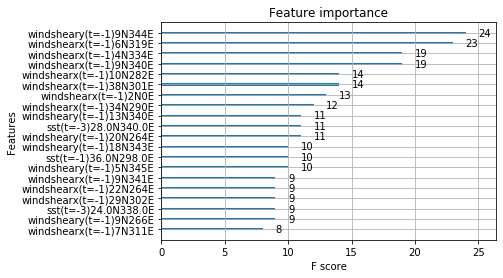

In [7]:
plot_importance(model, max_num_features=20)
plt.show()

In [11]:
x = 0
thesum = 0
for i, v in enumerate(predictions):
    if alldata['sshs(t=0)'][i] != v:
        thesum += v - alldata['sshs(t=0)'][i]
        x +=1
print (thesum/x)

0.21428571428571427


In [13]:
print(r2_score(model.predict(test_x), test_y))

0.9181126747734207


In [72]:
(288-x)/288

0.9513888888888888

In [10]:
import joblib

In [11]:
joblib.dump(model.feature_importances_, "f_importance.pkl")

['f_importance.pkl']

In [16]:
alldata = alldata.drop(columns=['month', 'sshs(t=0)', 'freq(t=0)'], axis=1)

In [18]:
joblib.dump(model.predict(alldata), "model_predictions_ssh.pkl")

['model_predictions_ssh.pkl']